In [1]:
import math

initial_coef = np.array([1.0, 1.0, 1.0],  dtype=np.float64)
print("Initial structure: a   = %f,   b = %f,   c = %f" % (initial_coef[0], initial_coef[1], initial_coef[2]))

parabola_arg = np.array([1.0, 2.0, 3.0],  dtype=np.float64)
print("Initial arguments: x_1 = %f, x_2 = %f, x_3 = %f" % (parabola_arg[0], parabola_arg[1], parabola_arg[2]))


def parabola(x):
    return initial_coef[0]*(x**2) + initial_coef[1]*x + initial_coef[2]


candidates = np.array([ parabola(parabola_arg[0]), parabola(parabola_arg[1]), parabola(parabola_arg[2])],  dtype=np.float64)    
print("Initial parabola value: d_1 = %f, d_2 = %f, d_3 = %f" % (candidates[0], candidates[1], candidates[2]))
parabola_coefficients = {'a': 0.0, 'b': 0.0, 'c': 0.0}
# print(parabola_arg)
denominator = \
    parabola_arg[0] * np.power(parabola_arg[1], 2) - np.power(parabola_arg[0], 2) * parabola_arg[1] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) + parabola_arg[1] * np.power(parabola_arg[2], 2) \
    + np.power(parabola_arg[0], 2) * parabola_arg[2] - np.power(parabola_arg[1], 2) * parabola_arg[2]

parabola_coefficients['a'] = \
    - parabola_arg[1] * candidates[0] + parabola_arg[2] * candidates[0] \
    + parabola_arg[0] * candidates[1] - parabola_arg[2] * candidates[1] \
    - parabola_arg[0] * candidates[2] + parabola_arg[1] * candidates[2]

parabola_coefficients['b'] = \
    np.power(parabola_arg[1], 2) * candidates[0] - np.power(parabola_arg[2], 2) * candidates[0] \
    - np.power(parabola_arg[0], 2) * candidates[1] + np.power(parabola_arg[2], 2) * candidates[1] \
    + np.power(parabola_arg[0], 2) * candidates[2] - np.power(parabola_arg[1], 2) * candidates[2]

parabola_coefficients['c'] = \
    parabola_arg[1] * np.power(parabola_arg[2], 2) * candidates[0] - np.power(parabola_arg[1], 2) * parabola_arg[2] * candidates[0] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) * candidates[1] + np.power(parabola_arg[0], 2) * parabola_arg[2] * candidates[1] \
    + parabola_arg[0] * np.power(parabola_arg[1], 2) * candidates[2] - np.power(parabola_arg[0], 2) * parabola_arg[1] * candidates[2]

print("Counted fraction value: a = %f/%f, b = %f/%f, c = %f/%f" % (parabola_coefficients['a'], denominator, parabola_coefficients['b'], denominator, parabola_coefficients['c'], denominator))
skip = False
for coef in parabola_coefficients:
    parabola_coefficients[coef] = parabola_coefficients[coef] / denominator
    if not math.isnan(parabola_coefficients[coef]):
        print("Resulting coefficients ", coef, ": ", parabola_coefficients[coef])
    else:
        skip = True


NameError: name 'np' is not defined

In [1]:
import numpy as np
import random as pyrandom
import sys, os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from parse_input import *

import logging

def setup_custom_logger(name):
    formatter = logging.Formatter(fmt='%(asctime)s [%(levelname)-8s] %(message)s',
                                  datefmt='%Y-%m-%d %H:%M:%S')
    handler = logging.FileHandler('log.txt', mode='w')
    handler.setFormatter(formatter)
    screen_handler = logging.StreamHandler(stream=sys.stdout)
    screen_handler.setFormatter(formatter)
    logger = logging.getLogger(name)
    logger.setLevel(logging.DEBUG)
    logger.addHandler(handler)
    logger.addHandler(screen_handler)
    return logger

logger = setup_custom_logger('parabola')

# atoms.txt Содержит информацию об атомах, в колонках следующие данные:
# ID, x, y, z, сигма, эпсилон, заряд, 
# радиус Ван-дер-Ваальса, объём и еще две колонки типа строки; 
# радиус и объем и эти две колонки не используются далее
atoms = rd('atoms.txt', 1, 9)  # вместо 9 можно было и 7 взять

# bonds.txt Содержит информацию о связях, структура файла:
# ID1, ID2, Kr, r0
bonds = rd('bonds.txt', 2)

# angles.txt Содержит информацию об углах, структура файла:
# ID1, ID2, ID3, Kt, theta0
angles = rd('angles.txt', 3)

# dihedrals.txt Содержит информацию о двугранных углах, структура:
# ID1, ID2, ID3, ID4, V1, V2, V3, V4
# Все константы V1, V2, V3, V4 разделены на два, 
# при вычислении энергии делить их на два НЕ НАДО.
dihedrals = rd('dihedrals.txt', 4)

# neighbours.txt, two_bonds_neigh.txt, three_bonds_neigh.txt
# Содержат информацию о соседях непосредственных, 
# второго и третьего порядка соответственно. 
# У всех одна и та же структура:
# ID    id_1 id_2 ... id_n
# ID – индекс атома, id_1 id_2 ... id_n – индексы его соседей.
neighbours = rd('neighbours.txt')
two_bonds_neigh = rd('two_bonds_neigh.txt')

three_bonds_neigh = rd('three_bonds_neigh.txt')


dt:  [  2.193  -5.412  24.408]
dt:  [  2.193  -5.412  24.408]
lbls:  [1 1 1 ..., 3 3 3]


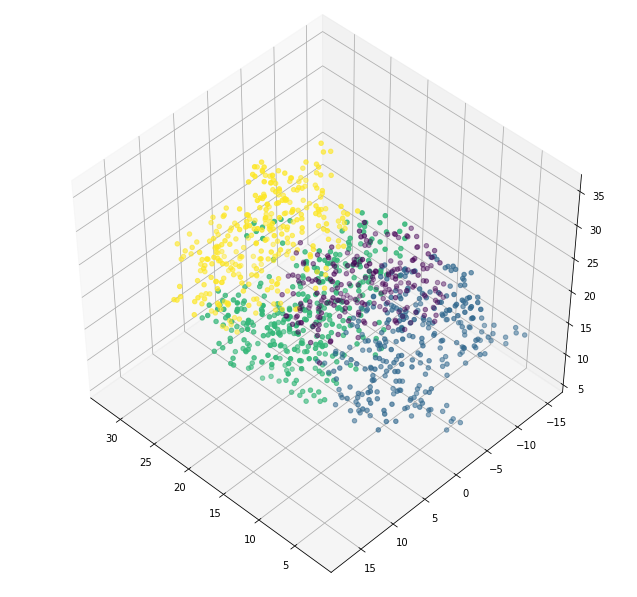

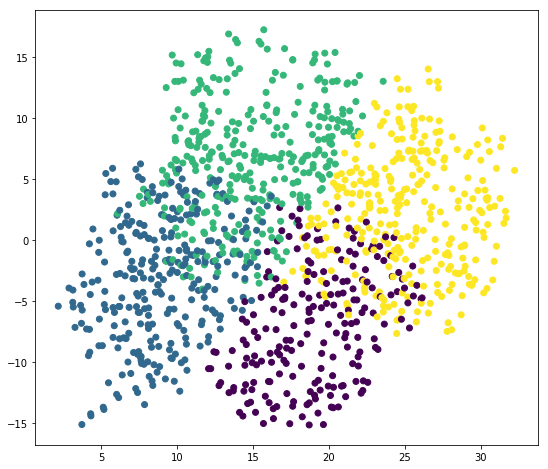

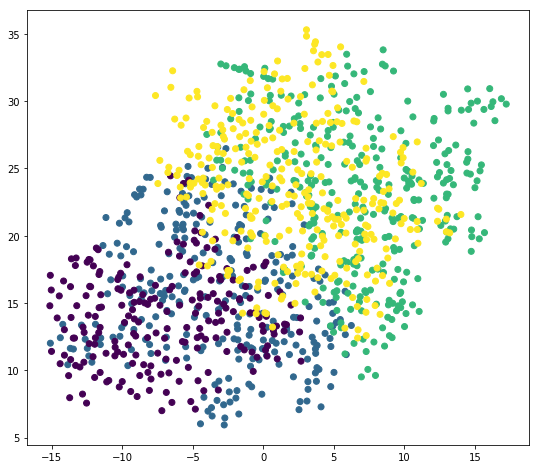

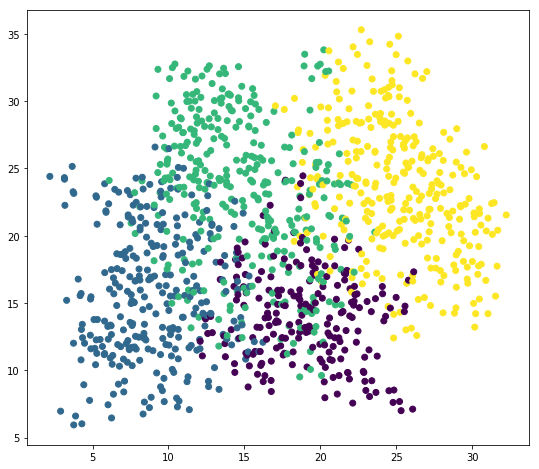

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from time import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
print("dt: ", dt[0])
ks = KMeans(n_clusters=4, init='random')
ks.fit(dt)
labels = ks.predict(dt)
print("dt: ", dt[0])
print("lbls: ", labels)
xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]

fig = plt.figure(figsize=(9, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=labels)
# fig.show()

plt.figure(figsize=(9, 8))
plt.scatter(xs, ys, c=labels)
plt.show()

plt.figure(figsize=(9, 8))
plt.scatter(ys, zs, c=labels)
plt.show()

plt.figure(figsize=(9, 8))
plt.scatter(xs, zs, c=labels)
plt.show()

Estimated number of clusters: 77
[ 0 -1  0 ..., -1 -1 -1]


<IPython.core.display.Javascript object>


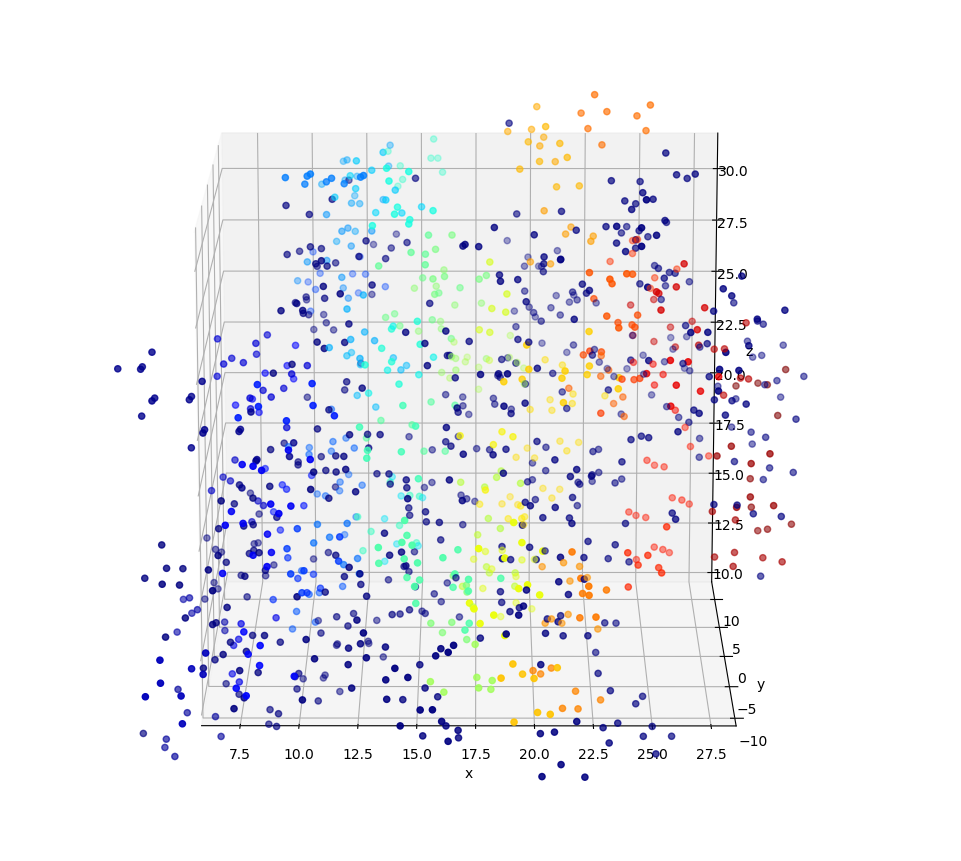

<IPython.core.display.Javascript object>


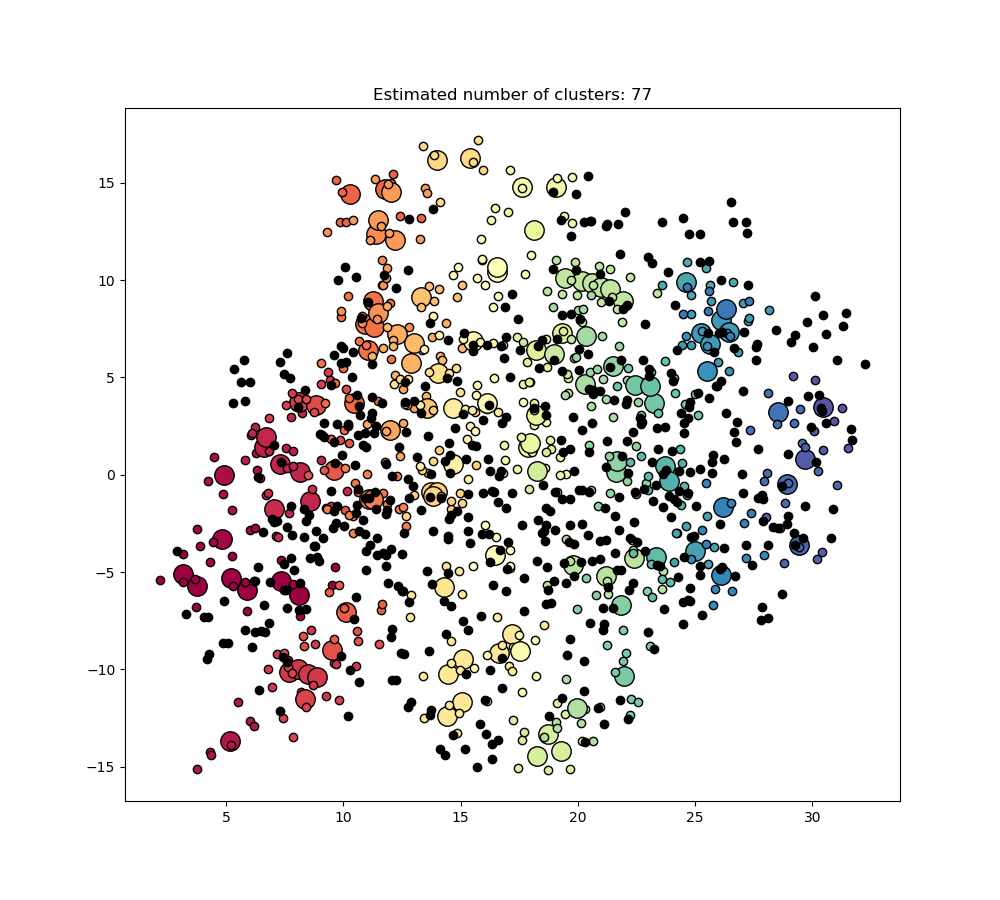

In [2]:
%matplotlib notebook
from sklearn.cluster import DBSCAN
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib

colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(cmap=cm)

dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
# Compute DBSCAN eps=1.6, min_samples=5 eucl
# manh eps=3, min_samples=5

db = DBSCAN(eps=2.165, min_samples=7, metric='euclidean', algorithm='kd_tree').fit(dt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]
print(labels)

#lbl = [0] * len(labels)
#lbl[684] = 1
fig = plt.figure(figsize=(9, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(xs, ys, zs, c=scalarMap.to_rgba(labels))
# fig.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, ys, c=labels)
# #plt.interactive(True)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(ys, zs, c=labels)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, zs, c=labels)
# plt.show()

# # #############################################################################

# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10, 9))
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dt[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dt[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
#ax.scatter(xy[:, 0], xy[:, 1], xy[:, 0], c = labels)
plt.show()

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.33s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.21s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


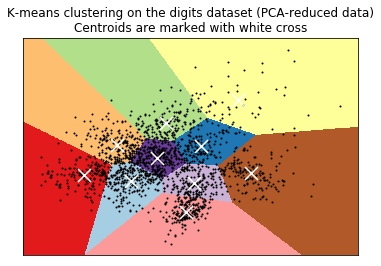

In [8]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

# print("digits: ", digits)
# print(" data: ", data)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
from output import *
from energy import *
from itertools import cycle
from colorama import Fore

N = 2000  # 10000 # число итераций
l = len(atoms)  # число атомов в изучаемом белке
h = [0.02, 0.02, 0.02]  # размеры шагов по ортам в ангстремах
# L = 3  # сколько шагов делаем вдоль каждого орта с учетом знака
S = 0
r = 10  # размер окрестности атома, по которой честно суммируем
M = 500  # параметр, отвечающий за частоту вывода и сохранения информации
mas = []
tt = []
tta = []
time_start = millis()
how_much = 0
edge_color = n_clusters_ + 1
lbl = np.zeros(len(labels))

for k in range(0, N):
	num = pyrandom.randrange(0, l)
	# это просто печать результатов в файлы и отображения хода работы метода
	if k/M == int(k/M):
		# prp_atm(atoms, k)
		# os.system('./to-pdb atoms_out' + str(k) + '.csv output' + str(k) + '.pdb')
		time_now = millis()
		tm = (time_now - time_start)/60000
		print(Fore.GREEN + "################################")
		print("Число итераций {}; Энергия {}; Время (мин) {}".format(k, S, tm))
		print("################################\n" + Fore.RESET)
	
	nghb_d = nghb_dihedrals(dihedrals, num)
	nghb_a = nghb_angles(angles, num)
	nghb_b = nghb_bonds(bonds, num)
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1]
	[Cx, Cy, Cz] = coef_nb(atoms, num, nghbc)
	DE_elst = E_elst(atoms, neighbours, two_bonds_neigh, three_bonds_neigh, num) - \
		  E_elst_m(atoms, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_nb)    
	E_old = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
			  three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
	E_record = E_old
	
	candidates = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	actual = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	parabola_arg = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	
	coefs = [Cx, Cy, Cz]
	coors = [1, 2, 3]
	
	possibilities = [[0, 0, 0], [0, 0, 0]]
	cands = [[], [], []]
	
	logger.info("num: %f"% num)
	for ort in range(3):
		c = coefs[ort]
		which_coor = coors[ort]
		
		prev = atoms[num][which_coor]
		
		print()
		for indent in [-1, 0, 1]:
			parabola_arg[1 + indent] = np.float64(prev + indent * h[ort])
			atoms[num][which_coor] = prev + indent * h[ort]
			actual[1 + indent] = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
									   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
			print("orig atom: ", prev, " observing point: ", atoms[num][which_coor], \
				  "\n\tenergy: ", actual[1 + indent], " DE_elst: ", DE_elst, " C: ", c)
		atoms[num][which_coor] = prev
		cands[ort] = [actual[0], actual[1], actual[2]]
		ret = suppose_parabola(parabola_arg, actual)
		
		if ((ret.grad_0 >= 0) and (ret.grad_1 >= 0) and (ret.grad_2 >= 0)) \
				 or ((ret.grad_0 < 0) and (ret.grad_1 < 0) and (ret.grad_2 < 0)):
			prev = atoms[num][which_coor]
			print(Fore.RED + "Recount!!!. Gradients: ", ret.grad_0, " ", ret.grad_1, " ", ret.grad_2, Fore.RESET)

			sign = 0
			if ret.grad_0 < 0:
				sign = -1
				change_point = np.argmin([ret.grad_0, ret.grad_1, ret.grad_2])
			else:
				sign = +1
				change_point = np.argmax([ret.grad_0, ret.grad_1, ret.grad_2])
			parabola_arg[change_point] = ret.arg + 0.01 * sign 
			atoms[num][which_coor] = parabola_arg[change_point]
			actual[change_point] = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
									   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
			print(Fore.GREEN + "New points: ", parabola_arg, " values of Energy: ", actual, " Chang point: ", change_point, Fore.RESET)
			ret = suppose_parabola(parabola_arg, actual)
			
			print("\nCalc Energy: ", ret.E, " Min_arg: ", ret.arg)
			print("Gradients: ", ret.grad_0, " ", ret.grad_1, " ", ret.grad_2)
			
			grads = [ret.grad_0, ret.grad_1, ret.grad_2]
			if grads[change_point] * sign > 0:
				logger.error(Fore.RED + "We will not use parabola." + Fore.RESET)
				possibilities[0][ort] = actual[2 - change_point]
				possibilities[1][ort] = parabola_arg[2 - change_point]
			else:
				possibilities[0][ort] = ret.E
				possibilities[1][ort] = ret.arg
		else:
			possibilities[0][ort] = ret.E
			possibilities[1][ort] = ret.arg
		atoms[num][which_coor] = prev
		
	
	where = int(np.argmin(possibilities[0]))
	E_new = possibilities[0][where]
	parabola_min_arg = possibilities[1][where]
	# print("E_new: ", E_new, " E_old: ", E_old)
	# print("Suppose minimum: ", E_new)
	ind = int(np.argmin(candidates))
	E_cand = candidates[ind]
	
	energies = np.array([E_new, E_cand, E_old])
	minimum_eng = np.argmin(energies)
	E_new = energies[minimum_eng]
	if minimum_eng == 2:
		# print("Parabola is not at minimum.")
		print(Fore.RED + "We will do nothing." + Fore.RESET)
		#lbl[num] = edge_color
		parabola_min_arg = 0
	elif minimum_eng == 1:
		# print("Parabola is not at minimum.")
		parabola_min_arg = parabola_arg[ind]
		lbl[num] = edge_color
		# print("Actual minimum: ", E_new)
		# atoms[num][coors[ind]] = parabola_min_arg
	else:
		orta = '\'\''
		if where == 0:
			orta = 'x'
		elif where == 1:
			orta = 'y'
		elif where == 2:
			orta = 'z'
		print("Ort: ", orta, " and num of atom: ", num)
		print("Prev value: ", atoms[num][coors[where]], " new: ", parabola_min_arg)
		print("Possibilities: \n\t eng:", possibilities[0], \
			  "\n\t cands: \n\t\t x: ", cands[0], "\n\t\t y: ", cands[1], "\n\t\t z: ", cands[2])
		tmp = atoms[num][coors[where]]
		atoms[num][coors[where]] = parabola_min_arg
		raw_E = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
				   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True)
		atoms[num][coors[where]] = tmp
		print("E_new: ", E_new, "\tE_old: ", E_old, "\tE_raw: ", raw_E, "\n")
	# print("Parabola works.!!")
	atoms[num][coors[where]] = parabola_min_arg
	
	
		# "-0.2" чтобы не учитвать погрешности в аппроксимации
	if np.float64((E_record - E_new)/ E_record) < 0.05:
		E_record = E_new
	
	S = S + E_old - E_record
	if S < 0:
		print(Fore.RED + "Problem: ", num, Fore.RESET)
	mas.append(S)
	time_now = millis()
	ttm = (time_now - time_start) / 60000
	tt.append(ttm)
	tta.append(time_now)
	
	logger.info("Resulting S: %f"% S)

################################
Число итераций 0; Энергия 0; Время (мин) 3.3333333333333335e-05
################################

2018-04-08 17:09:14 [INFO    ] num: 1086.000000

orig atom:  27.927  observing point:  27.907 
	energy:  -23.9218042292  DE_elst:  -16.4715352362  C:  0.895023356434
orig atom:  27.927  observing point:  27.927 
	energy:  -24.4012081178  DE_elst:  -16.4715352362  C:  0.895023356434
orig atom:  27.927  observing point:  27.947 
	energy:  -23.8623666498  DE_elst:  -16.4715352362  C:  0.895023356434
Calculated coefs: 
	a =  1272.80626493 
	b =  -71089.8351828 
	c =  992617.763451

orig atom:  -0.34  observing point:  -0.36000000000000004 
	energy:  -24.3645437112  DE_elst:  -16.4715352362  C:  -0.275843576628
orig atom:  -0.34  observing point:  -0.34 
	energy:  -24.4012081178  DE_elst:  -16.4715352362  C:  -0.275843576628
orig atom:  -0.34  observing point:  -0.32 
	energy:  -24.2579489492  DE_elst:  -16.4715352362  C:  -0.275843576628
Calculated coefs: 
	a =

orig atom:  22.005  observing point:  22.005 
	energy:  -9.74591123284  DE_elst:  19.2141941639  C:  -1.52266283709
orig atom:  22.005  observing point:  22.025 
	energy:  -9.4454935442  DE_elst:  19.2141941639  C:  -1.52266283709
Calculated coefs: 
	a =  819.906064863 
	b =  -36085.4431514 
	c =  397035.495411
Ort:  z  and num of atom:  798
Prev value:  22.005  new:  22.0058398747
Possibilities: 
	 eng: [-9.7459144497988746, -9.7461889827609411, -9.7464886200614274] 
	 cands: 
		 x:  [-9.4386859296205934, -9.7459112328382567, -9.4410714789278209] 
		 y:  [-9.6533642751027422, -9.7459112328382567, -9.63194216253234] 
		 z:  [-9.390404071238148, -9.7459112328382567, -9.4454935442048047]
E_new:  -9.74648862006 	E_old:  -9.74591123284 	E_raw:  -9.74660450907 

2018-04-08 17:09:17 [INFO    ] Resulting S: 0.017989
2018-04-08 17:09:17 [INFO    ] num: 447.000000

orig atom:  14.314  observing point:  14.294 
	energy:  -2.41655958694  DE_elst:  -1.47174939886  C:  -0.0537321105531
orig atom:  

2018-04-08 17:09:19 [INFO    ] num: 1062.000000

orig atom:  27.052  observing point:  27.032 
	energy:  -1.69703606646  DE_elst:  -9.86910526044  C:  -0.443969726257
orig atom:  27.052  observing point:  27.052 
	energy:  -1.87333194577  DE_elst:  -9.86910526044  C:  -0.443969726257
orig atom:  27.052  observing point:  27.072 
	energy:  -1.85062035135  DE_elst:  -9.86910526044  C:  -0.443969726257
Calculated coefs: 
	a =  248.759371081 
	b =  -13462.7166205 
	c =  182146.766209

orig atom:  8.827  observing point:  8.807 
	energy:  -1.55833683556  DE_elst:  -9.86910526044  C:  0.765784697474
orig atom:  8.827  observing point:  8.827 
	energy:  -1.87333194577  DE_elst:  -9.86910526044  C:  0.765784697474
orig atom:  8.827  observing point:  8.847 
	energy:  -1.53781736952  DE_elst:  -9.86910526044  C:  0.765784697474
Calculated coefs: 
	a =  813.137104349 
	b =  -14354.6094535 
	c =  63349.9314246

orig atom:  18.345  observing point:  18.325 
	energy:  -1.51742179817  DE_elst:  -9.8

	a =  1347.61235538 
	b =  -30985.2715374 
	c =  178104.898713

orig atom:  3.814  observing point:  3.794 
	energy:  -3.95114858985  DE_elst:  14.9294806334  C:  -0.208344012198
orig atom:  3.814  observing point:  3.814 
	energy:  -4.00727752237  DE_elst:  14.9294806334  C:  -0.208344012198
orig atom:  3.814  observing point:  3.834 
	energy:  -3.87769558863  DE_elst:  14.9294806334  C:  -0.208344012198
Calculated coefs: 
	a =  232.13858269 
	b =  -1768.91678373 
	c =  3365.81515721

orig atom:  11.855  observing point:  11.835 
	energy:  -3.86096920931  DE_elst:  14.9294806334  C:  0.990092499648
orig atom:  11.855  observing point:  11.855 
	energy:  -4.00727752237  DE_elst:  14.9294806334  C:  0.990092499648
orig atom:  11.855  observing point:  11.875 
	energy:  -3.91303446089  DE_elst:  14.9294806334  C:  0.990092499648
Calculated coefs: 
	a =  300.689223215 
	b =  -7130.64311374 
	c =  42270.5951988
Ort:  y  and num of atom:  297
Prev value:  3.814  new:  3.81004476557
Possibil

2018-04-08 17:09:26 [INFO    ] num: 786.000000

orig atom:  20.619  observing point:  20.599 
	energy:  -76.8029341347  DE_elst:  12.8101241189  C:  -1.4676554479
orig atom:  20.619  observing point:  20.619 
	energy:  -78.0363490665  DE_elst:  12.8101241189  C:  -1.4676554479
orig atom:  20.619  observing point:  20.639 
	energy:  -76.6292733105  DE_elst:  12.8101241189  C:  -1.4676554479
Calculated coefs: 
	a =  3300.61299278 
	b =  -136106.337076 
	c =  1403065.48683

orig atom:  -4.422  observing point:  -4.441999999999999 
	energy:  -76.751101287  DE_elst:  12.8101241189  C:  6.86038786415
orig atom:  -4.422  observing point:  -4.422 
	energy:  -78.0363490665  DE_elst:  12.8101241189  C:  6.86038786415
orig atom:  -4.422  observing point:  -4.402 
	energy:  -76.2379864751  DE_elst:  12.8101241189  C:  6.86038786415
Calculated coefs: 
	a =  3854.51296302 
	b =  34102.1405152 
	c =  75350.1587513

orig atom:  12.563  observing point:  12.543000000000001 
	energy:  -77.785204563  DE_

2018-04-08 17:09:29 [INFO    ] num: 874.000000

orig atom:  22.361  observing point:  22.341 
	energy:  -18.5397330759  DE_elst:  -2.07929161911  C:  -0.411418775524
orig atom:  22.361  observing point:  22.361 
	energy:  -19.021347521  DE_elst:  -2.07929161911  C:  -0.411418775524
orig atom:  22.361  observing point:  22.381 
	energy:  -18.5711900183  DE_elst:  -2.07929161911  C:  -0.411418775524
Calculated coefs: 
	a =  1164.71493777 
	b =  -52089.1678707 
	c =  582372.712641

orig atom:  -4.014  observing point:  -4.034 
	energy:  -18.887133874  DE_elst:  -2.07929161911  C:  -0.365660334523
orig atom:  -4.014  observing point:  -4.014 
	energy:  -19.021347521  DE_elst:  -2.07929161911  C:  -0.365660334523
orig atom:  -4.014  observing point:  -3.994 
	energy:  -18.9405294452  DE_elst:  -2.07929161911  C:  -0.365660334523
Calculated coefs: 
	a =  268.789653874 
	b =  2156.50845202 
	c =  4306.4119929

orig atom:  28.495  observing point:  28.475 
	energy:  -18.8345222471  DE_elst:  -

	energy:  -39.5112886078  DE_elst:  43.6530849372  C:  -0.617379485244
Calculated coefs: 
	a =  2415.02751481 
	b =  -31062.6296216 
	c =  99843.3563958

orig atom:  12.007  observing point:  11.987 
	energy:  -39.3473311059  DE_elst:  43.6530849372  C:  1.22557797094
orig atom:  12.007  observing point:  12.007 
	energy:  -40.2731828924  DE_elst:  43.6530849372  C:  1.22557797094
orig atom:  12.007  observing point:  12.027 
	energy:  -39.1641478969  DE_elst:  43.6530849372  C:  1.22557797094
Calculated coefs: 
	a =  2543.60848382 
	b =  -61077.6345502 
	c =  366611.812329
Ort:  y  and num of atom:  643
Prev value:  6.429  new:  6.43111298548
Possibilities: 
	 eng: [-40.279361239401624, -40.283965329552302, -40.275244817021303] 
	 cands: 
		 x:  [-39.07958483053919, -40.273182892357994, -39.39927763810968] 
		 y:  [-39.103055163044196, -40.273182892357994, -39.511288607835972] 
		 z:  [-39.347331105882091, -40.273182892357994, -39.164147896915004]
E_new:  -40.2839653296 	E_old:  -40.2

2018-04-08 17:09:36 [INFO    ] num: 794.000000

orig atom:  20.841  observing point:  20.821 
	energy:  -49.634386653  DE_elst:  -10.3844391661  C:  1.99303028322
orig atom:  20.841  observing point:  20.841 
	energy:  -50.225498516  DE_elst:  -10.3844391661  C:  1.99303028322
orig atom:  20.841  observing point:  20.861 
	energy:  -50.4980322915  DE_elst:  -10.3844391661  C:  1.99303028322
Calculated coefs: 
	a =  398.222610368 
	b =  -16620.3059861 
	c =  173366.663517
Recount!!!. Gradients:  -37.5200451324   -21.5911407177   -5.66223630298 
New points:  [ 20.85810939  20.841       20.861     ]  values of Energy:  [-50.47932328 -50.22549852 -50.49803229]  Chang point:  0 
Calculated coefs: 
	a =  418.154413266 
	b =  -17451.5020459 
	c =  182032.296149

Calc Energy:  -50.5146473864  Min_arg:  20.8672938659
Gradients:  -7.68106180292   -21.9897921222   -5.26361559157
2018-04-08 17:09:36 [ERROR   ] We will not use parabola.

orig atom:  -1.606  observing point:  -1.6260000000000001 
	e


orig atom:  14.734  observing point:  14.714 
	energy:  431.335398366  DE_elst:  14.9517815353  C:  -1.46221829739
orig atom:  14.734  observing point:  14.734 
	energy:  428.605577171  DE_elst:  14.9517815353  C:  -1.46221829739
orig atom:  14.734  observing point:  14.754 
	energy:  427.528334023  DE_elst:  14.9517815353  C:  -1.46221829739
Calculated coefs: 
	a =  2065.72256444 
	b =  -60967.8891362 
	c =  450280.210922
Recount!!!. Gradients:  -177.805509936   -95.1766073583   -12.5477047808 
New points:  [ 14.74703712  14.734       14.754     ]  values of Energy:  [ 427.71305739  428.60557717  427.52833402]  Chang point:  0 
Calculated coefs: 
	a =  2096.50746575 
	b =  -61875.6743423 
	c =  456972.400633

Calc Energy:  427.511351521  Min_arg:  14.7568456953
Gradients:  -41.12749241   -95.792341536   -11.9320429059
2018-04-08 17:09:39 [ERROR   ] We will not use parabola.

orig atom:  29.847  observing point:  29.827 
	energy:  435.96477394  DE_elst:  14.9517815353  C:  0.668882576

orig atom:  29.969  observing point:  29.989 
	energy:  -9.56056618055  DE_elst:  9.29455481052  C:  -0.821957929095
Calculated coefs: 
	a =  294.978147888 
	b =  -17681.7131358 
	c =  264961.65145
Ort:  y  and num of atom:  280
Prev value:  6.122  new:  6.1193271795
Possibilities: 
	 eng: [-9.6525950411160011, -9.6555854002544947, -9.6537594341789372] 
	 cands: 
		 x:  [-9.2024046309109089, -9.652299279543362, -9.2473750055448036] 
		 y:  [-9.5174802996318739, -9.652299279543362, -9.4191213247450811] 
		 z:  [-9.508049887644427, -9.652299279543362, -9.5605661805516853]
E_new:  -9.65558540025 	E_old:  -9.65229927954 	E_raw:  -9.65593938652 

2018-04-08 17:09:42 [INFO    ] Resulting S: 1.611007
2018-04-08 17:09:42 [INFO    ] num: 1117.000000

orig atom:  29.432  observing point:  29.412 
	energy:  1221498.80666  DE_elst:  69.8907444862  C:  -6.0232826156
orig atom:  29.432  observing point:  29.432 
	energy:  1221422.78351  DE_elst:  69.8907444862  C:  -6.0232826156
orig atom:  29.432  

2018-04-08 17:09:45 [INFO    ] num: 568.000000

orig atom:  16.572  observing point:  16.552 
	energy:  3.43710207912  DE_elst:  0.421210412921  C:  0.43908679892
orig atom:  16.572  observing point:  16.572 
	energy:  2.41052549597  DE_elst:  0.421210412921  C:  0.43908679892
orig atom:  16.572  observing point:  16.592 
	energy:  3.48886032555  DE_elst:  0.421210412921  C:  0.43908679892
Calculated coefs: 
	a =  2631.13927255 
	b =  -87205.1860932 
	c =  722573.860773

orig atom:  10.659  observing point:  10.639000000000001 
	energy:  3.44927680959  DE_elst:  0.421210412921  C:  1.10930530083
orig atom:  10.659  observing point:  10.659 
	energy:  2.41052549597  DE_elst:  0.421210412921  C:  1.10930530083
orig atom:  10.659  observing point:  10.679 
	energy:  3.66450968734  DE_elst:  0.421210412921  C:  1.10930530083
Calculated coefs: 
	a =  2865.91938846 
	b =  -61090.2887012 
	c =  325554.427068

orig atom:  21.292  observing point:  21.272000000000002 
	energy:  3.37280844914  D

2018-04-08 17:09:48 [INFO    ] num: 593.000000

orig atom:  17.009  observing point:  16.989 
	energy:  37.2574694951  DE_elst:  2.12075590127  C:  0.337709573974
orig atom:  17.009  observing point:  17.009 
	energy:  36.2222463102  DE_elst:  2.12075590127  C:  0.337709573974
orig atom:  17.009  observing point:  17.029 
	energy:  37.475624381  DE_elst:  2.12075590127  C:  0.337709573974
Calculated coefs: 
	a =  2860.75141424 
	b =  -97311.5877379 
	c =  827576.237709

orig atom:  13.501  observing point:  13.481 
	energy:  37.0205152111  DE_elst:  2.12075590127  C:  -0.403886766614
orig atom:  13.501  observing point:  13.501 
	energy:  36.2222463102  DE_elst:  2.12075590127  C:  -0.403886766614
orig atom:  13.501  observing point:  13.520999999999999 
	energy:  37.3122239668  DE_elst:  2.12075590127  C:  -0.403886766614
Calculated coefs: 
	a =  2360.30820283 
	b =  -63725.749374 
	c =  430167.663895

orig atom:  20.49  observing point:  20.47 
	energy:  37.5611016277  DE_elst:  2.12

Ort:  y  and num of atom:  176
Prev value:  4.868  new:  4.9675497201
Possibilities: 
	 eng: [-146.21914293574153, -148.7469298251217, -146.70633636416781] 
	 cands: 
		 x:  [-145.27197859053118, -145.90696667324812, -146.21914293574153] 
		 y:  [-144.67819561709081, -145.90696667324812, -146.93346168982592] 
		 z:  [-143.89898022999901, -145.90696667324812, -146.70633636416781]
E_new:  -148.746929825 	E_old:  -145.906966673 	E_raw:  -148.75155741 

2018-04-08 17:09:51 [INFO    ] Resulting S: 5.377633
2018-04-08 17:09:51 [INFO    ] num: 75.000000

orig atom:  6.858  observing point:  6.838 
	energy:  -11.9340158846  DE_elst:  -49.7511982413  C:  -0.0368366775691
orig atom:  6.858  observing point:  6.858 
	energy:  -13.0661920396  DE_elst:  -49.7511982413  C:  -0.0368366775691
orig atom:  6.858  observing point:  6.877999999999999 
	energy:  -12.0659598219  DE_elst:  -49.7511982413  C:  -0.0368366775691
Calculated coefs: 
	a =  2665.51046318 
	b =  -36563.4401114 
	c =  125374.280844



2018-04-08 17:09:54 [INFO    ] Resulting S: 5.689559
2018-04-08 17:09:54 [INFO    ] num: 90.000000

orig atom:  7.357  observing point:  7.337000000000001 
	energy:  11.8872625117  DE_elst:  -17.882650732  C:  -0.185817468946
orig atom:  7.357  observing point:  7.357 
	energy:  11.7809503588  DE_elst:  -17.882650732  C:  -0.185817468946
orig atom:  7.357  observing point:  7.377 
	energy:  11.8532753873  DE_elst:  -17.882650732  C:  -0.185817468946
Calculated coefs: 
	a =  223.296476559 
	b =  -3286.43403422 
	c =  12104.0540861

orig atom:  -4.37  observing point:  -4.39 
	energy:  12.3918093109  DE_elst:  -17.882650732  C:  -0.870947363681
orig atom:  -4.37  observing point:  -4.37 
	energy:  11.7809503588  DE_elst:  -17.882650732  C:  -0.870947363681
orig atom:  -4.37  observing point:  -4.3500000000000005 
	energy:  12.2944023901  DE_elst:  -17.882650732  C:  -0.870947363681
Calculated coefs: 
	a =  1405.38872912 
	b =  12280.6623195 
	c =  26839.7072653

orig atom:  21.386  obser

2018-04-08 17:09:57 [INFO    ] num: 487.000000

orig atom:  14.964  observing point:  14.944 
	energy:  55.1698735328  DE_elst:  -42.6743136796  C:  0.833776630988
orig atom:  14.964  observing point:  14.964 
	energy:  53.7869504215  DE_elst:  -42.6743136796  C:  0.833776630988
orig atom:  14.964  observing point:  14.984 
	energy:  55.1898649917  DE_elst:  -42.6743136796  C:  0.833776630988
Calculated coefs: 
	a =  3482.2971106 
	b =  -104217.688139 
	c =  779806.790207

orig atom:  3.332  observing point:  3.312 
	energy:  53.832604204  DE_elst:  -42.6743136796  C:  1.31061072794
orig atom:  3.332  observing point:  3.332 
	energy:  53.7869504215  DE_elst:  -42.6743136796  C:  1.31061072794
orig atom:  3.332  observing point:  3.352 
	energy:  54.1774768153  DE_elst:  -42.6743136796  C:  1.31061072794
Calculated coefs: 
	a =  545.225220256 
	b =  -3624.7590525 
	c =  6078.27158764

orig atom:  22.16  observing point:  22.14 
	energy:  55.1350191625  DE_elst:  -42.6743136796  C:  2.0

2018-04-08 17:10:00 [INFO    ] num: 849.000000

orig atom:  21.876  observing point:  21.856 
	energy:  -6.345103718  DE_elst:  -4.39194437691  C:  -0.588827498882
orig atom:  21.876  observing point:  21.876 
	energy:  -6.4828086988  DE_elst:  -4.39194437691  C:  -0.588827498882
orig atom:  21.876  observing point:  21.896 
	energy:  -6.44545370842  DE_elst:  -4.39194437691  C:  -0.588827498882
Calculated coefs: 
	a =  218.824964529 
	b =  -9576.53859782 
	c =  104769.137079

orig atom:  7.844  observing point:  7.824000000000001 
	energy:  -5.99480566782  DE_elst:  -4.39194437691  C:  0.286510418397
orig atom:  7.844  observing point:  7.844 
	energy:  -6.4828086988  DE_elst:  -4.39194437691  C:  0.286510418397
orig atom:  7.844  observing point:  7.864 
	energy:  -5.86726311594  DE_elst:  -4.39194437691  C:  0.286510418397
Calculated coefs: 
	a =  1379.43577079 
	b =  -21637.3998083 
	c =  84842.8936924

orig atom:  19.74  observing point:  19.72 
	energy:  -6.35029012839  DE_elst: 

orig atom:  21.076  observing point:  21.076 
	energy:  -26.2129136955  DE_elst:  -3.77169026553  C:  1.72902751254
orig atom:  21.076  observing point:  21.096 
	energy:  -25.2590027206  DE_elst:  -3.77169026553  C:  1.72902751254
Calculated coefs: 
	a =  2555.43233001 
	b =  -107719.996667 
	c =  1135163.07913
Ort:  z  and num of atom:  1000
Prev value:  21.076  new:  21.0766678112
Possibilities: 
	 eng: [-26.213525017723441, -26.21345445769839, -26.214058206183836] 
	 cands: 
		 x:  [-25.180146203497667, -26.212913695464831, -25.277634938894071] 
		 y:  [-25.21456898457577, -26.212913695464831, -25.305360602310113] 
		 z:  [-25.122479043924635, -26.212913695464831, -25.259002720571029]
E_new:  -26.2140582062 	E_old:  -26.2129136955 	E_raw:  -26.214139058 

2018-04-08 17:10:04 [INFO    ] Resulting S: 6.785970
2018-04-08 17:10:04 [INFO    ] num: 609.000000

orig atom:  17.433  observing point:  17.413 
	energy:  2.38414312289  DE_elst:  -7.91012960075  C:  -0.626311832813
orig atom:  

2018-04-08 17:10:07 [INFO    ] num: 653.000000

orig atom:  18.527  observing point:  18.507 
	energy:  -4.66155032193  DE_elst:  4.13686654592  C:  0.086345315766
orig atom:  18.527  observing point:  18.527 
	energy:  -5.03565175545  DE_elst:  4.13686654592  C:  0.086345315766
orig atom:  18.527  observing point:  18.547 
	energy:  -4.73170218603  DE_elst:  4.13686654592  C:  0.086345315766
Calculated coefs: 
	a =  847.563755819 
	b =  -31407.3812047 
	c =  290953.486433

orig atom:  -0.503  observing point:  -0.523 
	energy:  -4.72455131113  DE_elst:  4.13686654592  C:  0.0322732756486
orig atom:  -0.503  observing point:  -0.503 
	energy:  -5.03565175545  DE_elst:  4.13686654592  C:  0.0322732756486
orig atom:  -0.503  observing point:  -0.483 
	energy:  -4.70858450728  DE_elst:  4.13686654592  C:  0.0322732756486
Calculated coefs: 
	a =  797.709615622 
	b =  802.895043412 
	c =  196.992842942

orig atom:  27.662  observing point:  27.642 
	energy:  -4.98355463998  DE_elst:  4.1368

2018-04-08 17:10:10 [INFO    ] num: 713.000000

orig atom:  19.473  observing point:  19.453 
	energy:  779.53507744  DE_elst:  31.8716838754  C:  -0.339979397188
orig atom:  19.473  observing point:  19.473 
	energy:  686.133834377  DE_elst:  31.8716838754  C:  -0.339979397188
orig atom:  19.473  observing point:  19.493 
	energy:  604.780931654  DE_elst:  31.8716838754  C:  -0.339979397188
Calculated coefs: 
	a =  15060.426319 
	b =  -590912.217324 
	c =  5796640.28385
Recount!!!. Gradients:  -4971.27095834   -4368.85390559   -3766.43685283 
New points:  [ 19.60804416  19.473       19.493     ]  values of Energy:  [ 315.18675111  686.13383438  604.78093165]  Chang point:  0 
Calculated coefs: 
	a =  11480.7003928 
	b =  -451424.616645 
	c =  4437822.17749

Calc Energy:  284.014725758  Min_arg:  19.6601514368
Gradients:  -1196.45596252   -4297.25914788   -3838.03113217
2018-04-08 17:10:11 [ERROR   ] We will not use parabola.

orig atom:  0.057  observing point:  0.037000000000000005 


2018-04-08 17:10:15 [INFO    ] num: 178.000000

orig atom:  9.479  observing point:  9.459 
	energy:  -68.3959513247  DE_elst:  49.7168438757  C:  2.62989323801
orig atom:  9.479  observing point:  9.479 
	energy:  -68.89072288  DE_elst:  49.7168438757  C:  2.62989323801
orig atom:  9.479  observing point:  9.498999999999999 
	energy:  -68.9128222541  DE_elst:  49.7168438757  C:  2.62989323801
Calculated coefs: 
	a =  590.840227971 
	b =  -11214.0708152 
	c =  53141.4406505

orig atom:  1.85  observing point:  1.83 
	energy:  -68.570252161  DE_elst:  49.7168438757  C:  -2.19447004464
orig atom:  1.85  observing point:  1.85 
	energy:  -68.89072288  DE_elst:  49.7168438757  C:  -2.19447004464
orig atom:  1.85  observing point:  1.87 
	energy:  -68.7413630911  DE_elst:  49.7168438757  C:  -2.19447004464
Calculated coefs: 
	a =  587.288134825 
	b =  -2177.24387211 
	c =  1949.01679907

orig atom:  11.174  observing point:  11.154 
	energy:  -68.4717909161  DE_elst:  49.7168438757  C:  2.2

2018-04-08 17:10:18 [INFO    ] Resulting S: 7.628071
2018-04-08 17:10:18 [INFO    ] num: 980.000000

orig atom:  24.726  observing point:  24.706 
	energy:  4.52172410137  DE_elst:  -38.8642603212  C:  5.86637546846
orig atom:  24.726  observing point:  24.726 
	energy:  4.72610226973  DE_elst:  -38.8642603212  C:  5.86637546846
orig atom:  24.726  observing point:  24.746 
	energy:  5.06399664895  DE_elst:  -38.8642603212  C:  5.86637546846
Calculated coefs: 
	a =  166.89524503 
	b =  -8239.74684505 
	c =  101705.113479
Recount!!!. Gradients:  6.88100237716   13.5568121784   20.2326219796 
New points:  [ 24.706       24.726       24.69538527]  values of Energy:  [ 4.5217241   4.72610227  4.46289374]  Chang point:  2 
Calculated coefs: 
	a =  152.755758887 
	b =  -7540.80376745 
	c =  93067.5763579

Calc Energy:  4.43773442229  Min_arg:  24.6825514875
Gradients:  7.16379065115   13.2740210066   3.92086696124
2018-04-08 17:10:19 [ERROR   ] We will not use parabola.

orig atom:  3.476  o

	energy:  4.17330357107  DE_elst:  -22.2870433574  C:  -0.0397073492676
Calculated coefs: 
	a =  266.617352572 
	b =  -7926.47615926 
	c =  58917.1809132
2018-04-08 17:10:22 [INFO    ] Resulting S: 7.812549
2018-04-08 17:10:22 [INFO    ] num: 97.000000

orig atom:  7.539  observing point:  7.519 
	energy:  -99.7160426427  DE_elst:  -108.008015455  C:  -2.52666977482
orig atom:  7.539  observing point:  7.539 
	energy:  -100.32533011  DE_elst:  -108.008015455  C:  -2.52666977482
orig atom:  7.539  observing point:  7.558999999999999 
	energy:  -100.193642572  DE_elst:  -108.008015455  C:  -2.52666977482
Calculated coefs: 
	a =  926.218757635 
	b =  -13977.4664259 
	c =  52632.7421859

orig atom:  -5.947  observing point:  -5.967 
	energy:  -100.892406938  DE_elst:  -108.008015455  C:  5.59254801773
orig atom:  -5.947  observing point:  -5.947 
	energy:  -100.32533011  DE_elst:  -108.008015455  C:  5.59254801773
orig atom:  -5.947  observing point:  -5.927 
	energy:  -99.3912770114  DE_e


orig atom:  7.619  observing point:  7.599 
	energy:  307.315887515  DE_elst:  -1.46011020146  C:  0.812233214924
orig atom:  7.619  observing point:  7.619 
	energy:  307.746578367  DE_elst:  -1.46011020146  C:  0.812233214924
orig atom:  7.619  observing point:  7.638999999999999 
	energy:  309.575782267  DE_elst:  -1.46011020146  C:  0.812233214924
Calculated coefs: 
	a =  1748.14130872 
	b =  -26581.6798928 
	c =  101355.429404
2018-04-08 17:10:26 [INFO    ] Resulting S: 8.484870
2018-04-08 17:10:27 [INFO    ] num: 748.000000

orig atom:  20.028  observing point:  20.008 
	energy:  -9.47469845756  DE_elst:  7.54268002591  C:  -0.94140858504
orig atom:  20.028  observing point:  20.028 
	energy:  -9.67924699786  DE_elst:  7.54268002591  C:  -0.94140858504
orig atom:  20.028  observing point:  20.048 
	energy:  -9.55278812673  DE_elst:  7.54268002591  C:  -0.94140858504
Calculated coefs: 
	a =  413.759241819 
	b =  -16575.492432 
	c =  165996.851715

orig atom:  -0.799  observing po

2018-04-08 17:10:31 [INFO    ] num: 1082.000000

orig atom:  27.833  observing point:  27.813 
	energy:  -30.7566997972  DE_elst:  11.1210991994  C:  -0.379040031707
orig atom:  27.833  observing point:  27.833 
	energy:  -30.6403864692  DE_elst:  11.1210991994  C:  -0.379040031707
orig atom:  27.833  observing point:  27.852999999999998 
	energy:  -30.124315922  DE_elst:  11.1210991994  C:  -0.379040031707
Calculated coefs: 
	a =  499.696468569 
	b =  -27800.2940241 
	c =  386632.137175

orig atom:  -1.038  observing point:  -1.058 
	energy:  -29.4803149238  DE_elst:  11.1210991994  C:  -0.00686729153573
orig atom:  -1.038  observing point:  -1.038 
	energy:  -30.6403864692  DE_elst:  11.1210991994  C:  -0.00686729153573
orig atom:  -1.038  observing point:  -1.018 
	energy:  -30.8409069922  DE_elst:  11.1210991994  C:  -0.00686729153573
Calculated coefs: 
	a =  1199.4387781 
	b =  2456.02010162 
	c =  1226.38036418

orig atom:  26.104  observing point:  26.084 
	energy:  -31.72038040

2018-04-08 17:10:35 [INFO    ] num: 974.000000

orig atom:  24.65  observing point:  24.63 
	energy:  -19.6363476424  DE_elst:  4.5687984111  C:  -1.12484684536
orig atom:  24.65  observing point:  24.65 
	energy:  -20.0604205918  DE_elst:  4.5687984111  C:  -1.12484684536
orig atom:  24.65  observing point:  24.669999999999998 
	energy:  -19.86578493  DE_elst:  4.5687984111  C:  -1.12484684536
Calculated coefs: 
	a =  773.385678007 
	b =  -38133.6498572 
	c =  470047.869426

orig atom:  -1.056  observing point:  -1.076 
	energy:  -19.8532805657  DE_elst:  4.5687984111  C:  -0.38102056907
orig atom:  -1.056  observing point:  -1.056 
	energy:  -20.0604205918  DE_elst:  4.5687984111  C:  -0.38102056907
orig atom:  -1.056  observing point:  -1.036 
	energy:  -19.6191426215  DE_elst:  4.5687984111  C:  -0.38102056907
Calculated coefs: 
	a =  810.522495452 
	b =  1717.676959 
	c =  889.963634624

orig atom:  22.986  observing point:  22.966 
	energy:  -19.9216213336  DE_elst:  4.5687984111


orig atom:  -2.18  observing point:  -2.2 
	energy:  50.5758414882  DE_elst:  17.3771199312  C:  1.74522116828
orig atom:  -2.18  observing point:  -2.18 
	energy:  49.2639026439  DE_elst:  17.3771199312  C:  1.74522116828
orig atom:  -2.18  observing point:  -2.16 
	energy:  48.9290907469  DE_elst:  17.3771199312  C:  1.74522116828
Calculated coefs: 
	a =  1221.40868404 
	b =  5284.17309387 
	c =  5764.13861726

orig atom:  29.081  observing point:  29.061 
	energy:  49.8597909005  DE_elst:  17.3771199312  C:  -2.14811101215
orig atom:  29.081  observing point:  29.081 
	energy:  49.2639026439  DE_elst:  17.3771199312  C:  -2.14811101215
orig atom:  29.081  observing point:  29.101 
	energy:  49.6737013703  DE_elst:  17.3771199312  C:  -2.14811101215
Calculated coefs: 
	a =  1257.10858914 
	b =  -73120.6019986 
	c =  1063327.02312
2018-04-08 17:10:38 [INFO    ] Resulting S: 10.075067
2018-04-08 17:10:39 [INFO    ] num: 719.000000

orig atom:  19.566  observing point:  19.546 
	energy


orig atom:  -1.798  observing point:  -1.818 
	energy:  -105.840980787  DE_elst:  -4.93185141213  C:  -1.79370545958
orig atom:  -1.798  observing point:  -1.798 
	energy:  -105.667364614  DE_elst:  -4.93185141213  C:  -1.79370545958
orig atom:  -1.798  observing point:  -1.778 
	energy:  -104.15038312  DE_elst:  -4.93185141213  C:  -1.79370545958
Calculated coefs: 
	a =  1679.20665119 
	b =  6080.69205937 
	c =  5398.87097934

orig atom:  12.266  observing point:  12.246 
	energy:  -105.7650927  DE_elst:  -4.93185141213  C:  -0.849886546856
orig atom:  12.266  observing point:  12.266 
	energy:  -105.667364614  DE_elst:  -4.93185141213  C:  -0.849886546856
orig atom:  12.266  observing point:  12.286 
	energy:  -105.155865397  DE_elst:  -4.93185141213  C:  -0.849886546856
Calculated coefs: 
	a =  517.213915044 
	b =  -12673.0610816 
	c =  77524.8064721
Ort:  y  and num of atom:  31
Prev value:  -1.798  new:  -1.81058479463
Possibilities: 
	 eng: [-105.86021633366279, -105.93331243304

2018-04-08 17:10:44 [INFO    ] num: 1143.000000

orig atom:  26.606  observing point:  26.586 
	energy:  459143.708552  DE_elst:  -91.3136920988  C:  5.24866570868
orig atom:  26.606  observing point:  26.606 
	energy:  524640.841979  DE_elst:  -91.3136920988  C:  5.24866570868
orig atom:  26.606  observing point:  26.626 
	energy:  599549.744227  DE_elst:  -91.3136920988  C:  5.24866570868
Calculated coefs: 
	a =  11764709.7183 
	b =  -622513583.017 
	c =  8235127303.57
Recount!!!. Gradients:  3039562.12538   3510150.51412   3980738.90285 
New points:  [ 26.586       26.606       26.46681865]  values of Energy:  [ 459143.7085518   524640.84197924  210352.96095516]  Chang point:  2 
Calculated coefs: 
	a =  8531023.22614 
	b =  -450507330.815 
	c =  5947788480.89

Calc Energy:  176754.315701  Min_arg:  26.4040619087
Gradients:  3104236.16541   3445477.09445   1070758.46603
2018-04-08 17:10:44 [ERROR   ] We will not use parabola.

orig atom:  -3.267  observing point:  -3.287 
	energy:  

2018-04-08 17:10:47 [INFO    ] num: 255.000000

orig atom:  10.6681855246  observing point:  10.6481855246 
	energy:  -17.6265125077  DE_elst:  -4.24453810249  C:  -0.853885579984
orig atom:  10.6681855246  observing point:  10.6681855246 
	energy:  -17.787189035  DE_elst:  -4.24453810249  C:  -0.853885579984
orig atom:  10.6681855246  observing point:  10.6881855246 
	energy:  -17.6259076059  DE_elst:  -4.24453810249  C:  -0.853885579984
Calculated coefs: 
	a =  402.447446561 
	b =  -8586.75292512 
	c =  45784.6687756

orig atom:  3.555  observing point:  3.535 
	energy:  -17.2816096816  DE_elst:  -4.24453810249  C:  -0.905458348417
orig atom:  3.555  observing point:  3.555 
	energy:  -17.787189035  DE_elst:  -4.24453810249  C:  -0.905458348417
orig atom:  3.555  observing point:  3.575 
	energy:  -17.3717323753  DE_elst:  -4.24453810249  C:  -0.905458348417
Calculated coefs: 
	a =  1151.29501621 
	b =  -8187.96063261 
	c =  14540.3176626

orig atom:  28.058  observing point:  28.038

2018-04-08 17:10:50 [INFO    ] num: 705.000000

orig atom:  19.344  observing point:  19.324 
	energy:  10.6651668923  DE_elst:  -23.2477868062  C:  0.234194373618
orig atom:  19.344  observing point:  19.344 
	energy:  10.2879117327  DE_elst:  -23.2477868062  C:  0.234194373618
orig atom:  19.344  observing point:  19.364 
	energy:  10.6686409731  DE_elst:  -23.2477868062  C:  0.234194373618
Calculated coefs: 
	a =  947.48044849 
	b =  -36656.0367392 
	c =  354546.635221

orig atom:  9.289  observing point:  9.269 
	energy:  10.451926113  DE_elst:  -23.2477868062  C:  -0.0111240185426
orig atom:  9.289  observing point:  9.289 
	energy:  10.2879117327  DE_elst:  -23.2477868062  C:  -0.0111240185426
orig atom:  9.289  observing point:  9.309 
	energy:  10.6303261936  DE_elst:  -23.2477868062  C:  -0.0111240185426
Calculated coefs: 
	a =  633.036053025 
	b =  -11756.0837911 
	c =  54590.7046

orig atom:  16.766  observing point:  16.746 
	energy:  10.5078381824  DE_elst:  -23.2477868062

2018-04-08 17:10:53 [INFO    ] num: 383.000000

orig atom:  12.887  observing point:  12.867 
	energy:  -12.0715239752  DE_elst:  -26.3990822604  C:  0.0299408094324
orig atom:  12.887  observing point:  12.887 
	energy:  -12.6144651723  DE_elst:  -26.3990822604  C:  0.0299408094324
orig atom:  12.887  observing point:  12.907 
	energy:  -11.6087922763  DE_elst:  -26.3990822604  C:  0.0299408094324
Calculated coefs: 
	a =  1935.76762137 
	b =  -49880.9063808 
	c =  321320.465507

orig atom:  -11.673  observing point:  -11.693 
	energy:  -11.9620202068  DE_elst:  -26.3990822604  C:  0.867433191477
orig atom:  -11.673  observing point:  -11.673 
	energy:  -12.6144651723  DE_elst:  -26.3990822604  C:  0.867433191477
orig atom:  -11.673  observing point:  -11.653 
	energy:  -11.5369844619  DE_elst:  -26.3990822604  C:  0.867433191477
Calculated coefs: 
	a =  2162.40706967 
	b =  50494.1813421 
	c =  294758.692966

orig atom:  12.801  observing point:  12.781 
	energy:  -11.6038882483  DE_e


orig atom:  -2.179  observing point:  -2.199 
	energy:  162.86846398  DE_elst:  13.9464029004  C:  -1.02991975575
orig atom:  -2.179  observing point:  -2.179 
	energy:  160.252214162  DE_elst:  13.9464029004  C:  -1.02991975575
orig atom:  -2.179  observing point:  -2.159 
	energy:  160.003596396  DE_elst:  13.9464029004  C:  -1.02991975575
Calculated coefs: 
	a =  2959.54006528 
	b =  12826.0539149 
	c =  14056.2061236

orig atom:  17.008  observing point:  16.988 
	energy:  159.124559402  DE_elst:  13.9464029004  C:  0.871727374436
orig atom:  17.008  observing point:  17.008 
	energy:  160.252214162  DE_elst:  13.9464029004  C:  0.871727374436
orig atom:  17.008  observing point:  17.028 
	energy:  163.503870377  DE_elst:  13.9464029004  C:  0.871727374436
Calculated coefs: 
	a =  2655.00167415 
	b =  -90203.0541804 
	c =  766315.9835
Recount!!!. Gradients:  3.28270063932   109.482767605   215.682834571 
New points:  [ 16.988       17.008       16.99738179]  values of Energy:  [ 1

2018-04-08 17:10:59 [INFO    ] Resulting S: 10.811420
2018-04-08 17:10:59 [INFO    ] num: 403.000000

orig atom:  13.432  observing point:  13.412 
	energy:  -11.4895994298  DE_elst:  -48.9656577846  C:  0.913799819556
orig atom:  13.432  observing point:  13.432 
	energy:  -12.3804679153  DE_elst:  -48.9656577846  C:  0.913799819556
orig atom:  13.432  observing point:  13.452 
	energy:  -11.8930608179  DE_elst:  -48.9656577846  C:  0.913799819556
Calculated coefs: 
	a =  1722.84443406 
	b =  -46292.579411 
	c =  310956.324022

orig atom:  -12.494  observing point:  -12.514 
	energy:  -13.5117984347  DE_elst:  -48.9656577846  C:  0.173485861218
orig atom:  -12.494  observing point:  -12.494 
	energy:  -12.3804679153  DE_elst:  -48.9656577846  C:  0.173485861218
orig atom:  -12.494  observing point:  -12.474 
	energy:  -10.964262991  DE_elst:  -48.9656577846  C:  0.173485861218
Calculated coefs: 
	a =  356.093007012 
	b =  8961.7404454 
	c =  56369.4734433
Recount!!!. Gradients:  49.44

2018-04-08 17:11:02 [INFO    ] num: 186.000000

orig atom:  9.61  observing point:  9.59 
	energy:  31.5187202992  DE_elst:  186.281679704  C:  0.674862692029
orig atom:  9.61  observing point:  9.61 
	energy:  30.795926884  DE_elst:  186.281679704  C:  0.674862692029
orig atom:  9.61  observing point:  9.629999999999999 
	energy:  31.4238968813  DE_elst:  186.281679704  C:  0.674862692029
Calculated coefs: 
	a =  1688.45425785 
	b =  -32454.4614214 
	c =  155985.873719

orig atom:  -8.459  observing point:  -8.479 
	energy:  32.3000184142  DE_elst:  186.281679704  C:  8.17056022205
orig atom:  -8.459  observing point:  -8.459 
	energy:  30.795926884  DE_elst:  186.281679704  C:  8.17056022205
orig atom:  -8.459  observing point:  -8.439 
	energy:  32.0889249474  DE_elst:  186.281679704  C:  8.17056022205
Calculated coefs: 
	a =  3496.36200088 
	b =  59146.1749942 
	c =  250167.22257

orig atom:  15.759  observing point:  15.739 
	energy:  32.0286402082  DE_elst:  186.281679704  C:  -3

2018-04-08 17:11:05 [INFO    ] num: 853.000000

orig atom:  21.929  observing point:  21.909 
	energy:  5.24506720969  DE_elst:  -18.1941274741  C:  -1.32635990088
orig atom:  21.929  observing point:  21.929 
	energy:  4.16702376574  DE_elst:  -18.1941274741  C:  -1.32635990088
orig atom:  21.929  observing point:  21.948999999999998 
	energy:  5.22866490562  DE_elst:  -18.1941274741  C:  -1.32635990088
Calculated coefs: 
	a =  2674.60573655 
	b =  -117303.268451 
	c =  1286180.35003

orig atom:  8.913  observing point:  8.893 
	energy:  5.12359125521  DE_elst:  -18.1941274741  C:  0.634833963368
orig atom:  8.913  observing point:  8.913 
	energy:  4.16702376574  DE_elst:  -18.1941274741  C:  0.634833963368
orig atom:  8.913  observing point:  8.933 
	energy:  5.25784140808  DE_elst:  -18.1941274741  C:  0.634833963368
Calculated coefs: 
	a =  2559.23142124 
	b =  -45617.5030612 
	c =  203283.612271

orig atom:  19.953  observing point:  19.933 
	energy:  5.45743559673  DE_elst:  -18


orig atom:  -8.952  observing point:  -8.972 
	energy:  493132.94386  DE_elst:  10.9162578322  C:  -0.515938373662
orig atom:  -8.952  observing point:  -8.952 
	energy:  491939.190418  DE_elst:  10.9162578322  C:  -0.515938373662
orig atom:  -8.952  observing point:  -8.932 
	energy:  490746.883428  DE_elst:  10.9162578322  C:  -0.515938373662
Calculated coefs: 
	a =  1808.06576386 
	b =  -27279.9034436 
	c =  102834.173537
Recount!!!. Gradients:  -59723.8355103   -59651.5128797   -59579.1902492 
New points:  [ 7.53394668 -8.952      -8.932     ]  values of Energy:  [    848.81011878  491939.19041778  490746.88342814]  Chang point:  0 
Calculated coefs: 
	a =  1811.43091386 
	b =  -27219.7190188 
	c =  103103.264511

Calc Energy:  848.039402379  Min_arg:  7.5133196664
Gradients:  74.7288308629   -59651.5781005   -59579.120864

orig atom:  8.056  observing point:  8.036 
	energy:  491970.486998  DE_elst:  10.9162578322  C:  0.288022898911
orig atom:  8.056  observing point:  8.056 
	e

2018-04-08 17:11:12 [INFO    ] num: 810.000000

orig atom:  21.19  observing point:  21.17 
	energy:  23.2531226559  DE_elst:  -22.5515293281  C:  1.29869505135
orig atom:  21.19  observing point:  21.19 
	energy:  22.2033278385  DE_elst:  -22.5515293281  C:  1.29869505135
orig atom:  21.19  observing point:  21.21 
	energy:  23.0654905868  DE_elst:  -22.5515293281  C:  1.29869505135
Calculated coefs: 
	a =  2389.94696319 
	b =  -101290.643102 
	c =  1073246.26603

orig atom:  -5.189  observing point:  -5.209 
	energy:  23.0433854229  DE_elst:  -22.5515293281  C:  -0.492548921524
orig atom:  -5.189  observing point:  -5.189 
	energy:  22.2033278385  DE_elst:  -22.5515293281  C:  -0.492548921524
orig atom:  -5.189  observing point:  -5.1690000000000005 
	energy:  23.4243425193  DE_elst:  -22.5515293281  C:  -0.492548921524
Calculated coefs: 
	a =  2576.34032872 
	b =  26746.7838589 
	c =  69441.4438793

orig atom:  23.935  observing point:  23.915 
	energy:  22.9174304314  DE_elst:  -22

2018-04-08 17:11:15 [INFO    ] num: 358.000000

orig atom:  12.504  observing point:  12.484 
	energy:  20.9097509939  DE_elst:  -11.1138710382  C:  0.0939088615931
orig atom:  12.504  observing point:  12.504 
	energy:  20.0134981375  DE_elst:  -11.1138710382  C:  0.0939088615931
orig atom:  12.504  observing point:  12.524 
	energy:  20.9989381033  DE_elst:  -11.1138710382  C:  0.0939088615931
Calculated coefs: 
	a =  2352.11600016 
	b =  -58819.4872543 
	c =  367745.507867

orig atom:  -5.971  observing point:  -5.991 
	energy:  20.9414753375  DE_elst:  -11.1138710382  C:  -0.0281300319305
orig atom:  -5.971  observing point:  -5.971 
	energy:  20.0134981375  DE_elst:  -11.1138710382  C:  -0.0281300319305
orig atom:  -5.971  observing point:  -5.9510000000000005 
	energy:  21.0126961228  DE_elst:  -11.1138710382  C:  -0.0281300319305
Calculated coefs: 
	a =  2408.96898343 
	b =  28769.6881197 
	c =  85917.2331209

orig atom:  15.097  observing point:  15.077 
	energy:  21.1038201587


orig atom:  -1.691  observing point:  -1.711 
	energy:  -80.5116922492  DE_elst:  -21.1470885257  C:  0.0856210534405
orig atom:  -1.691  observing point:  -1.691 
	energy:  -82.7721339465  DE_elst:  -21.1470885257  C:  0.0856210534405
orig atom:  -1.691  observing point:  -1.671 
	energy:  -83.4074008722  DE_elst:  -21.1470885257  C:  0.0856210534405
Calculated coefs: 
	a =  2031.46846472 
	b =  6798.0336321 
	c =  5603.75726097

orig atom:  15.242  observing point:  15.222000000000001 
	energy:  -85.8048299587  DE_elst:  -21.1470885257  C:  -3.23500566261
orig atom:  15.242  observing point:  15.242 
	energy:  -82.7721339465  DE_elst:  -21.1470885257  C:  -3.23500566261
orig atom:  15.242  observing point:  15.262 
	energy:  -79.0587742417  DE_elst:  -21.1470885257  C:  -3.23500566261
Calculated coefs: 
	a =  850.829618047 
	b =  -25768.0386835 
	c =  195010.158398
Recount!!!. Gradients:  134.618208299   168.651393021   202.684577743 
New points:  [ 15.222       15.242       15.1528

2018-04-08 17:11:20 [INFO    ] num: 919.000000

orig atom:  23.384  observing point:  23.364 
	energy:  1.28553831066  DE_elst:  -21.1972573399  C:  -0.170965441416
orig atom:  23.384  observing point:  23.384 
	energy:  0.0328102640843  DE_elst:  -21.1972573399  C:  -0.170965441416
orig atom:  23.384  observing point:  23.404 
	energy:  0.821326356189  DE_elst:  -21.1972573399  C:  -0.170965441416
Calculated coefs: 
	a =  2551.5551798 
	b =  -119342.737948 
	c =  1395491.01405

orig atom:  -4.632  observing point:  -4.651999999999999 
	energy:  0.877991077257  DE_elst:  -21.1972573399  C:  0.533037979505
orig atom:  -4.632  observing point:  -4.632 
	energy:  0.0328102640843  DE_elst:  -21.1972573399  C:  0.533037979505
orig atom:  -4.632  observing point:  -4.612 
	energy:  1.84281354481  DE_elst:  -21.1972573399  C:  0.533037979505
Calculated coefs: 
	a =  3318.98011691 
	b =  30771.1523647 
	c =  71321.8849078

orig atom:  9.23  observing point:  9.21 
	energy:  0.267050117697  DE_

2018-04-08 17:11:24 [INFO    ] Resulting S: 17.571007
2018-04-08 17:11:24 [INFO    ] num: 772.000000

orig atom:  20.433  observing point:  20.413 
	energy:  -29.3362510041  DE_elst:  -1.59843968146  C:  -3.08383122484
orig atom:  20.433  observing point:  20.433 
	energy:  -29.3778835493  DE_elst:  -1.59843968146  C:  -3.08383122484
orig atom:  20.433  observing point:  20.453 
	energy:  -28.9745622218  DE_elst:  -1.59843968146  C:  -3.08383122484
Calculated coefs: 
	a =  556.192278918 
	b =  -22720.3114515 
	c =  232000.304233

orig atom:  6.225  observing point:  6.205 
	energy:  -28.9959656654  DE_elst:  -1.59843968146  C:  -6.90238481706
orig atom:  6.225  observing point:  6.225 
	energy:  -29.3778835493  DE_elst:  -1.59843968146  C:  -6.90238481706
orig atom:  6.225  observing point:  6.244999999999999 
	energy:  -28.9082455514  DE_elst:  -1.59843968146  C:  -6.90238481706
Calculated coefs: 
	a =  1064.44485307 
	b =  -13250.1454179 
	c =  41204.8740083

orig atom:  24.071  obse

2018-04-08 17:11:27 [INFO    ] num: 749.000000

orig atom:  20.052  observing point:  20.032 
	energy:  84.0845097115  DE_elst:  -131.952687564  C:  1.05668785619
orig atom:  20.052  observing point:  20.052 
	energy:  83.0183803438  DE_elst:  -131.952687564  C:  1.05668785619
orig atom:  20.052  observing point:  20.072 
	energy:  82.843888067  DE_elst:  -131.952687564  C:  1.05668785619
Calculated coefs: 
	a =  1114.54636652 
	b =  -44728.7830245 
	c =  448844.758799

orig atom:  5.372  observing point:  5.352 
	energy:  84.2508443736  DE_elst:  -131.952687564  C:  0.65078997011
orig atom:  5.372  observing point:  5.372 
	energy:  83.0183803438  DE_elst:  -131.952687564  C:  0.65078997011
orig atom:  5.372  observing point:  5.3919999999999995 
	energy:  84.8558668952  DE_elst:  -131.952687564  C:  0.65078997011
Calculated coefs: 
	a =  3837.43822951 
	b =  -41214.3107748 
	c =  110744.029859

orig atom:  16.636  observing point:  16.616 
	energy:  84.349561087  DE_elst:  -131.95268

2018-04-08 17:11:31 [INFO    ] num: 1094.000000

orig atom:  28.329  observing point:  28.309 
	energy:  28926.0248215  DE_elst:  30.9271397443  C:  -2.17797123713
orig atom:  28.329  observing point:  28.329 
	energy:  29146.3800906  DE_elst:  30.9271397443  C:  -2.17797123713
orig atom:  28.329  observing point:  28.349 
	energy:  29369.3847062  DE_elst:  30.9271397443  C:  -2.17797123713
Calculated coefs: 
	a =  3311.68345943 
	b =  -176549.363677 
	c =  2372880.54087
Recount!!!. Gradients:  10951.5304293   11083.9977677   11216.4651061 
New points:  [ 28.309       28.329       26.66553122]  values of Energy:  [ 28926.0248215   29146.38009061  19742.84321954]  Chang point:  2 
Calculated coefs: 
	a =  3264.31196437 
	b =  -173866.337582 
	c =  2334890.26136

Calc Energy:  19739.0385172  Min_arg:  26.6313911599
Gradients:  10952.4772165   11083.0496951   222.887602911
2018-04-08 17:11:31 [ERROR   ] We will not use parabola.

orig atom:  -2.69  observing point:  -2.71 
	energy:  29191

2018-04-08 17:11:33 [INFO    ] num: 607.000000

orig atom:  17.385  observing point:  17.365000000000002 
	energy:  1.75583263143  DE_elst:  -4.87478974215  C:  -0.141970689901
orig atom:  17.385  observing point:  17.385 
	energy:  1.61793299508  DE_elst:  -4.87478974215  C:  -0.141970689901
orig atom:  17.385  observing point:  17.405 
	energy:  1.86659176783  DE_elst:  -4.87478974215  C:  -0.141970689901
Calculated coefs: 
	a =  483.197985126 
	b =  -16798.0249646 
	c =  145994.380594

orig atom:  0.3  observing point:  0.27999999999999997 
	energy:  1.73818072619  DE_elst:  -4.87478974215  C:  0.173672337387
orig atom:  0.3  observing point:  0.3 
	energy:  1.61793299508  DE_elst:  -4.87478974215  C:  0.173672337387
orig atom:  0.3  observing point:  0.32 
	energy:  1.82816147879  DE_elst:  -4.87478974215  C:  0.173672337387
Calculated coefs: 
	a =  413.095268528 
	b =  -245.607642302 
	c =  38.1216515181

orig atom:  11.823  observing point:  11.803 
	energy:  1.98922891711  DE_el

2018-04-08 17:11:37 [INFO    ] num: 932.000000

orig atom:  23.701  observing point:  23.681 
	energy:  -1.47924105227  DE_elst:  -10.0517356858  C:  0.296656684899
orig atom:  23.701  observing point:  23.701 
	energy:  -1.64323758699  DE_elst:  -10.0517356858  C:  0.296656684899
orig atom:  23.701  observing point:  23.721 
	energy:  -1.48324277545  DE_elst:  -10.0517356858  C:  0.296656684899
Calculated coefs: 
	a =  404.989183848 
	b =  -19197.3973358 
	c =  227498.299451

orig atom:  5.858  observing point:  5.838 
	energy:  -1.26641884817  DE_elst:  -10.0517356858  C:  0.0143073472528
orig atom:  5.858  observing point:  5.858 
	energy:  -1.64323758699  DE_elst:  -10.0517356858  C:  0.0143073472528
orig atom:  5.858  observing point:  5.877999999999999 
	energy:  -1.22913125759  DE_elst:  -10.0517356858  C:  0.0143073472528
Calculated coefs: 
	a =  988.656334255 
	b =  -11582.1654224 
	c =  33919.7889007

orig atom:  20.201  observing point:  20.181 
	energy:  -1.45248870665  DE_


orig atom:  5.213  observing point:  5.1930000000000005 
	energy:  438.673682319  DE_elst:  21.9847393584  C:  -1.95164721965
orig atom:  5.213  observing point:  5.213 
	energy:  441.487467079  DE_elst:  21.9847393584  C:  -1.95164721965
orig atom:  5.213  observing point:  5.233 
	energy:  445.800963499  DE_elst:  21.9847393584  C:  -1.95164721965
Calculated coefs: 
	a =  1874.6395781 
	b =  -19366.8102118 
	c =  50456.6468244
Recount!!!. Gradients:  103.196446353   178.182029477   253.167612601 
New points:  [ 5.193       5.213       5.17547566]  values of Energy:  [ 438.67368232  441.48746708  437.4551741 ]  Chang point:  2 
Calculated coefs: 
	a =  1896.2868581 
	b =  -19592.0718075 
	c =  51042.662701

Calc Energy:  437.281443638  Min_arg:  5.16590402022
Gradients:  102.763500718   178.614975042   36.3011371976
2018-04-08 17:11:40 [ERROR   ] We will not use parabola.

orig atom:  15.914  observing point:  15.894 
	energy:  425.374010732  DE_elst:  21.9847393584  C:  -0.217284462

2018-04-08 17:11:42 [INFO    ] num: 393.000000

orig atom:  13.266  observing point:  13.246 
	energy:  282.22805871  DE_elst:  4.82355576117  C:  0.0605132124229
orig atom:  13.266  observing point:  13.266 
	energy:  280.664445365  DE_elst:  4.82355576117  C:  0.0605132124229
orig atom:  13.266  observing point:  13.286 
	energy:  281.810246821  DE_elst:  4.82355576117  C:  0.0605132124229
Calculated coefs: 
	a =  3386.76851086 
	b =  -89868.1874264 
	c =  596445.635303

orig atom:  3.563  observing point:  3.543 
	energy:  274.158793208  DE_elst:  4.82355576117  C:  -0.645732155146
orig atom:  3.563  observing point:  3.563 
	energy:  280.664445365  DE_elst:  4.82355576117  C:  -0.645732155146
orig atom:  3.563  observing point:  3.583 
	energy:  287.399757601  DE_elst:  4.82355576117  C:  -0.645732155146
Calculated coefs: 
	a =  287.075099538 
	b =  -1714.67304956 
	c =  2745.63503145
Recount!!!. Gradients:  319.541105763   331.024109744   342.507113726 
New points:  [ 3.543       

2018-04-08 17:11:46 [INFO    ] num: 1043.000000

orig atom:  26.321  observing point:  26.301000000000002 
	energy:  31.8809698636  DE_elst:  -8.86246894181  C:  -0.836834082239
orig atom:  26.321  observing point:  26.321 
	energy:  30.8384690683  DE_elst:  -8.86246894181  C:  -0.836834082239
orig atom:  26.321  observing point:  26.341 
	energy:  32.0530329509  DE_elst:  -8.86246894181  C:  -0.836834082239
Calculated coefs: 
	a =  2821.33181686 
	b =  -148516.247924 
	c =  1954522.30834

orig atom:  8.511  observing point:  8.491 
	energy:  32.0047462572  DE_elst:  -8.86246894181  C:  2.47150428084
orig atom:  8.511  observing point:  8.511 
	energy:  30.8384690683  DE_elst:  -8.86246894181  C:  2.47150428084
orig atom:  8.511  observing point:  8.530999999999999 
	energy:  31.8036497  DE_elst:  -8.86246894181  C:  2.47150428084
Calculated coefs: 
	a =  2664.32228255 
	b =  -45357.1213075 
	c =  193069.462353

orig atom:  23.29  observing point:  23.27 
	energy:  31.6519228565  DE_el

2018-04-08 17:11:49 [INFO    ] Resulting S: 18.763035
2018-04-08 17:11:49 [INFO    ] num: 1037.000000

orig atom:  26.143  observing point:  26.123 
	energy:  -147.442142278  DE_elst:  -71.5454922543  C:  3.63312939947
orig atom:  26.143  observing point:  26.143 
	energy:  -147.193634852  DE_elst:  -71.5454922543  C:  3.63312939947
orig atom:  26.143  observing point:  26.163 
	energy:  -146.696054124  DE_elst:  -71.5454922543  C:  3.63312939947
Calculated coefs: 
	a =  311.341594235 
	b =  -16260.1543949 
	c =  212153.602237
Recount!!!. Gradients:  6.19853750244   18.6522012718   31.1058650412 
New points:  [ 26.123       26.143       26.12304544]  values of Energy:  [-147.44214228 -147.19363485 -147.44183998]  Chang point:  2 
Calculated coefs: 
	a =  289.276178536 
	b =  -15106.8838516 
	c =  197084.360281

Calc Energy:  -147.521082206  Min_arg:  26.1115241636
Gradients:  6.63937221665   18.2104193581   6.66566131816
2018-04-08 17:11:49 [ERROR   ] We will not use parabola.

orig at


orig atom:  9.811  observing point:  9.791 
	energy:  688.309472855  DE_elst:  -1.07340263914  C:  -0.130710753865
orig atom:  9.811  observing point:  9.811 
	energy:  677.252937998  DE_elst:  -1.07340263914  C:  -0.130710753865
orig atom:  9.811  observing point:  9.831 
	energy:  667.775742735  DE_elst:  -1.07340263914  C:  -0.130710753865
Calculated coefs: 
	a =  1974.17449611 
	b =  -39250.5952181 
	c =  195739.253111
Recount!!!. Gradients:  -592.310235327   -513.343255483   -434.376275638 
New points:  [ 9.93101466  9.811       9.831     ]  values of Energy:  [ 644.9594753   677.252938    667.77574274]  Chang point:  0 
Calculated coefs: 
	a =  2047.50430372 
	b =  -40690.9392969 
	c =  202812.055375

Calc Energy:  644.892910898  Min_arg:  9.93671642667
Gradients:  -23.3487797663   -514.809849321   -432.909677172
2018-04-08 17:11:52 [ERROR   ] We will not use parabola.
2018-04-08 17:11:52 [INFO    ] Resulting S: 20.088917
2018-04-08 17:11:52 [INFO    ] num: 617.000000

orig atom

2018-04-08 17:11:55 [INFO    ] Resulting S: 20.129811
2018-04-08 17:11:55 [INFO    ] num: 761.000000

orig atom:  20.223  observing point:  20.203 
	energy:  -4.03591392785  DE_elst:  -13.2883572618  C:  -0.0199094271625
orig atom:  20.223  observing point:  20.223 
	energy:  -4.09161681909  DE_elst:  -13.2883572618  C:  -0.0199094271625
orig atom:  20.223  observing point:  20.243 
	energy:  -3.96436991447  DE_elst:  -13.2883572618  C:  -0.0199094271625
Calculated coefs: 
	a =  228.687271407 
	b =  -9247.69677875 
	c =  93485.9089273

orig atom:  8.494  observing point:  8.474 
	energy:  -4.04479029106  DE_elst:  -13.2883572618  C:  0.943859176777
orig atom:  8.494  observing point:  8.494 
	energy:  -4.09161681909  DE_elst:  -13.2883572618  C:  0.943859176777
orig atom:  8.494  observing point:  8.514 
	energy:  -3.98195918242  DE_elst:  -13.2883572618  C:  0.943859176777
Calculated coefs: 
	a =  195.605207768 
	b =  -3321.37049183 
	c =  14095.0977689

orig atom:  33.809  observing 

2018-04-08 17:11:58 [INFO    ] num: 315.000000

orig atom:  11.802  observing point:  11.782 
	energy:  44.66082474  DE_elst:  1.8167041604  C:  2.32093582624
orig atom:  11.802  observing point:  11.802 
	energy:  43.5967535664  DE_elst:  1.8167041604  C:  2.32093582624
orig atom:  11.802  observing point:  11.822 
	energy:  44.5666506061  DE_elst:  1.8167041604  C:  2.32093582624
Calculated coefs: 
	a =  2542.46027324 
	b =  -60014.586643 
	c =  354203.565573

orig atom:  -4.689  observing point:  -4.709 
	energy:  44.7787144863  DE_elst:  1.8167041604  C:  -3.45055818361
orig atom:  -4.689  observing point:  -4.689 
	energy:  43.5967535664  DE_elst:  1.8167041604  C:  -3.45055818361
orig atom:  -4.689  observing point:  -4.6690000000000005 
	energy:  44.3539070402  DE_elst:  1.8167041604  C:  -3.45055818361
Calculated coefs: 
	a =  2423.89299192 
	b =  22720.6482921 
	c =  53287.257648

orig atom:  14.623  observing point:  14.603 
	energy:  44.454893596  DE_elst:  1.8167041604  C: 


orig atom:  27.358  observing point:  27.338 
	energy:  3325.65825167  DE_elst:  16.6048946243  C:  -0.795897384925
orig atom:  27.358  observing point:  27.358 
	energy:  3203.16175544  DE_elst:  16.6048946243  C:  -0.795897384925
orig atom:  27.358  observing point:  27.378 
	energy:  3086.91862099  DE_elst:  16.6048946243  C:  -0.795897384925
Calculated coefs: 
	a =  7816.70136131 
	b =  -433667.121851 
	c =  6016978.69722
Recount!!!. Gradients:  -6281.15822021   -5968.49016576   -5655.82211131 
New points:  [ 27.72977806  27.358       27.378     ]  values of Energy:  [ 2059.96958624  3203.16175544  3086.91862099]  Chang point:  0 
Calculated coefs: 
	a =  7781.11332123 
	b =  -431719.175472 
	c =  5990323.0118

Calc Energy:  2058.90435588  Min_arg:  27.741478478
Gradients:  -182.08455385   -5967.77898737   -5656.53445452
2018-04-08 17:12:02 [ERROR   ] We will not use parabola.
2018-04-08 17:12:02 [INFO    ] Resulting S: 20.276297
2018-04-08 17:12:02 [INFO    ] num: 707.000000

ori

2018-04-08 17:12:05 [INFO    ] num: 361.000000

orig atom:  12.54  observing point:  12.52 
	energy:  -55.1049356407  DE_elst:  -80.0253383263  C:  11.9397612829
orig atom:  12.54  observing point:  12.54 
	energy:  -55.4908811041  DE_elst:  -80.0253383263  C:  11.9397612829
orig atom:  12.54  observing point:  12.559999999999999 
	energy:  -53.2276619166  DE_elst:  -80.0253383263  C:  11.9397612829
Calculated coefs: 
	a =  3311.45582186 
	b =  -83004.380169 
	c =  520087.710122

orig atom:  -1.678  observing point:  -1.698 
	energy:  -53.786508557  DE_elst:  -80.0253383263  C:  -1.90049906848
orig atom:  -1.678  observing point:  -1.678 
	energy:  -55.4908811041  DE_elst:  -80.0253383263  C:  -1.90049906848
orig atom:  -1.678  observing point:  -1.658 
	energy:  -54.7407837707  DE_elst:  -80.0253383263  C:  -1.90049906848
Calculated coefs: 
	a =  3068.08735066 
	b =  10272.6442685 
	c =  8543.24173755

orig atom:  32.37  observing point:  32.349999999999994 
	energy:  -54.9215003523  

Ort:  z  and num of atom:  618
Prev value:  11.271  new:  11.291
Possibilities: 
	 eng: [-95.076206290075788, -95.076159925927641, -95.15608988237193] 
	 cands: 
		 x:  [-94.649873098354831, -95.066936800519656, -94.86422692831654] 
		 y:  [-94.682163908707636, -95.066936800519656, -94.404137121556147] 
		 z:  [-94.906058007568788, -95.066936800519656, -95.15608988237193]
E_new:  -95.1560898824 	E_old:  -95.0669368005 	E_raw:  -95.1560898824 

2018-04-08 17:12:08 [INFO    ] Resulting S: 20.985814
2018-04-08 17:12:09 [INFO    ] num: 634.000000

orig atom:  18.058  observing point:  18.038 
	energy:  -67.5087554045  DE_elst:  67.3676008685  C:  7.01211877372
orig atom:  18.058  observing point:  18.058 
	energy:  -68.8490736234  DE_elst:  67.3676008685  C:  7.01211877372
orig atom:  18.058  observing point:  18.078 
	energy:  -69.099921338  DE_elst:  67.3676008685  C:  7.01211877372
Calculated coefs: 
	a =  1361.83805631 
	b =  -49223.9223876 
	c =  444733.112082

orig atom:  1.174  obse

2018-04-08 17:12:11 [INFO    ] num: 225.000000

orig atom:  10.217  observing point:  10.197000000000001 
	energy:  -50.3877747044  DE_elst:  4.84236748773  C:  1.54810883603
orig atom:  10.217  observing point:  10.217 
	energy:  -51.6081615694  DE_elst:  4.84236748773  C:  1.54810883603
orig atom:  10.217  observing point:  10.237 
	energy:  -50.7502985515  DE_elst:  4.84236748773  C:  1.54810883603
Calculated coefs: 
	a =  2597.8123602 
	b =  -53092.7608647 
	c =  271219.059542

orig atom:  2.602  observing point:  2.582 
	energy:  -50.6809953604  DE_elst:  4.84236748773  C:  1.98412664425
orig atom:  2.602  observing point:  2.602 
	energy:  -51.6081615694  DE_elst:  4.84236748773  C:  1.98412664425
orig atom:  2.602  observing point:  2.622 
	energy:  -50.6007137422  DE_elst:  4.84236748773  C:  1.98412664425
Calculated coefs: 
	a =  2418.26754478 
	b =  -12582.6572626 
	c =  16315.8177774

orig atom:  28.332  observing point:  28.312 
	energy:  -50.2525236804  DE_elst:  4.8423674


orig atom:  22.763  observing point:  22.743000000000002 
	energy:  66366.9914722  DE_elst:  2.80036692822  C:  0.266617933439
orig atom:  22.763  observing point:  22.763 
	energy:  66401.2279772  DE_elst:  2.80036692822  C:  0.266617933439
orig atom:  22.763  observing point:  22.783 
	energy:  66436.4243029  DE_elst:  2.80036692822  C:  0.266617933439
Calculated coefs: 
	a =  1199.7755913 
	b =  -52885.1632845 
	c =  648557.464209
Recount!!!. Gradients:  1687.82926145   1735.8202851   1783.81130876 
New points:  [ 22.743       22.763       22.04960627]  values of Energy:  [ 66366.99147219  66401.22797723  65776.12878183]  Chang point:  2 
Calculated coefs: 
	a =  1205.07602159 
	b =  -53126.3641879 
	c =  651301.491424

Calc Energy:  65776.0720208  Min_arg:  22.042743875
Gradients:  1687.72373031   1735.92677117   16.5394104024
2018-04-08 17:12:15 [ERROR   ] We will not use parabola.
2018-04-08 17:12:15 [INFO    ] Resulting S: 22.036626
2018-04-08 17:12:15 [INFO    ] num: 397.00000

2018-04-08 17:12:17 [INFO    ] num: 475.000000

orig atom:  14.695  observing point:  14.675 
	energy:  -54.8056086736  DE_elst:  -113.475329374  C:  3.22985198168
orig atom:  14.695  observing point:  14.695 
	energy:  -55.2643891402  DE_elst:  -113.475329374  C:  3.22985198168
orig atom:  14.695  observing point:  14.715 
	energy:  -54.3339339776  DE_elst:  -113.475329374  C:  3.22985198168
Calculated coefs: 
	a =  1736.54459015 
	b =  -51025.253637 
	c =  374766.145962

orig atom:  10.253  observing point:  10.233 
	energy:  -55.1794578463  DE_elst:  -113.475329374  C:  6.67961359799
orig atom:  10.253  observing point:  10.253 
	energy:  -55.2643891402  DE_elst:  -113.475329374  C:  6.67961359799
orig atom:  10.253  observing point:  10.273 
	energy:  -55.2443664685  DE_elst:  -113.475329374  C:  6.67961359799
Calculated coefs: 
	a =  131.192455422 
	b =  -2691.85520651 
	c =  13752.8501785

orig atom:  24.797  observing point:  24.777 
	energy:  -55.0984110313  DE_elst:  -113.4753

2018-04-08 17:12:20 [INFO    ] Resulting S: 22.213499
2018-04-08 17:12:20 [INFO    ] num: 1080.000000

orig atom:  27.678  observing point:  27.658 
	energy:  -12.6712327605  DE_elst:  6.93965270782  C:  -0.478151068781
orig atom:  27.678  observing point:  27.678 
	energy:  -12.6989037753  DE_elst:  6.93965270782  C:  -0.478151068781
orig atom:  27.678  observing point:  27.698 
	energy:  -12.4696433015  DE_elst:  6.93965270782  C:  -0.478151068781
Calculated coefs: 
	a =  321.164398192 
	b =  -17773.3366891 
	c =  245882.762612

orig atom:  1.312  observing point:  1.292 
	energy:  -12.2392391003  DE_elst:  6.93965270782  C:  0.250865989967
orig atom:  1.312  observing point:  1.312 
	energy:  -12.6989037753  DE_elst:  6.93965270782  C:  0.250865989967
orig atom:  1.312  observing point:  1.332 
	energy:  -12.1804948075  DE_elst:  6.93965270782  C:  0.250865989967
Calculated coefs: 
	a =  1222.59205354 
	b =  -3206.61294116 
	c =  2089.87577923

orig atom:  24.08  observing point:  2

2018-04-08 17:12:23 [INFO    ] num: 828.000000

orig atom:  21.489  observing point:  21.469 
	energy:  -52.7251542235  DE_elst:  -18.8307339426  C:  -3.33111187092
orig atom:  21.489  observing point:  21.489 
	energy:  -54.0685454379  DE_elst:  -18.8307339426  C:  -3.33111187092
orig atom:  21.489  observing point:  21.509 
	energy:  -54.0388491762  DE_elst:  -18.8307339426  C:  -3.33111187092
Calculated coefs: 
	a =  1716.35934947 
	b =  -73798.5344948 
	c =  793227.160213

orig atom:  -6.83909121949  observing point:  -6.85909121949 
	energy:  -52.8878212709  DE_elst:  -18.8307339426  C:  -2.17212663685
orig atom:  -6.83909121949  observing point:  -6.83909121949 
	energy:  -54.0685454379  DE_elst:  -18.8307339426  C:  -2.17212663685
orig atom:  -6.83909121949  observing point:  -6.81909121949 
	energy:  -52.8674438938  DE_elst:  -18.8307339426  C:  -2.17212663685
Calculated coefs: 
	a =  2977.28213573 
	b =  40724.3176593 
	c =  139206.33515

orig atom:  14.372  observing point:  

2018-04-08 17:12:26 [INFO    ] num: 143.000000

orig atom:  8.494  observing point:  8.474 
	energy:  1319626.48057  DE_elst:  -58.8165935918  C:  -0.711243032022
orig atom:  8.494  observing point:  8.494 
	energy:  1319640.04951  DE_elst:  -58.8165935918  C:  -0.711243032022
orig atom:  8.494  observing point:  8.514 
	energy:  1319656.71616  DE_elst:  -58.8165935918  C:  -0.711243032022
Calculated coefs: 
	a =  3872.13487647 
	b =  -65023.9378888 
	c =  1592586.45071
Recount!!!. Gradients:  601.003997693   755.889392752   910.774787811 
New points:  [ 8.474       8.494       8.40639372]  values of Energy:  [ 1319626.48057394  1319640.04951106  1319603.458031  ]  Chang point:  2 
Calculated coefs: 
	a =  3857.12455474 
	b =  -64769.2426876 
	c =  1591506.0368

Calc Energy:  1319603.04671  Min_arg:  8.39605278083
Gradients:  601.304266103   755.589248292   79.7725500866
2018-04-08 17:12:27 [ERROR   ] We will not use parabola.

orig atom:  -10.207  observing point:  -10.227 
	energy:  

Gradients:  4589414.8337   -74509.6868235   -65998.3387225

orig atom:  25.826  observing point:  25.806 
	energy:  859067.232332  DE_elst:  -113.776274658  C:  9.25490221791
orig atom:  25.826  observing point:  25.826 
	energy:  858888.210497  DE_elst:  -113.776274658  C:  9.25490221791
orig atom:  25.826  observing point:  25.846 
	energy:  858735.256762  DE_elst:  -113.776274658  C:  9.25490221791
Calculated coefs: 
	a =  32585.1213286 
	b =  -1691386.08698 
	c =  22806926.6954
Recount!!!. Gradients:  -9602.80496237   -8299.40010923   -6995.99525608 
New points:  [ 25.94334954  25.826       25.846     ]  values of Energy:  [ 858277.51120677  858888.21049656  858735.25676161]  Chang point:  0 
Calculated coefs: 
	a =  25101.1152859 
	b =  -1304672.51626 
	c =  17811361.6009

Calc Energy:  858226.697309  Min_arg:  25.9883375978
Gradients:  -2258.50109234   -8149.70951437   -7145.66490293
2018-04-08 17:12:30 [ERROR   ] We will not use parabola.
2018-04-08 17:12:30 [INFO    ] Resulting

2018-04-08 17:12:33 [INFO    ] num: 1148.000000

orig atom:  31.273  observing point:  31.253 
	energy:  -7.08184866707  DE_elst:  22.8280496168  C:  -1.64042421338
orig atom:  31.273  observing point:  31.273 
	energy:  -7.57678743145  DE_elst:  22.8280496168  C:  -1.64042421338
orig atom:  31.273  observing point:  31.293 
	energy:  -7.38086886861  DE_elst:  22.8280496168  C:  -1.64042421338
Calculated coefs: 
	a =  863.571759371 
	b =  -54020.4347676 
	c =  844799.842203

orig atom:  3.409  observing point:  3.389 
	energy:  -7.58591643931  DE_elst:  22.8280496168  C:  -0.505289860279
orig atom:  3.409  observing point:  3.409 
	energy:  -7.57678743145  DE_elst:  22.8280496168  C:  -0.505289860279
orig atom:  3.409  observing point:  3.429 
	energy:  -7.37997986672  DE_elst:  22.8280496168  C:  -0.505289860279
Calculated coefs: 
	a =  234.598196044 
	b =  -1594.34208632 
	c =  2701.2038265

orig atom:  22.392  observing point:  22.372 
	energy:  -7.31383313212  DE_elst:  22.82804961

2018-04-08 17:12:36 [INFO    ] num: 894.000000

orig atom:  22.822  observing point:  22.802 
	energy:  123811.74334  DE_elst:  -10.592304965  C:  -0.325031923896
orig atom:  22.822  observing point:  22.822 
	energy:  123807.145841  DE_elst:  -10.592304965  C:  -0.325031923896
orig atom:  22.822  observing point:  22.842 
	energy:  123803.48907  DE_elst:  -10.592304965  C:  -0.325031923896
Calculated coefs: 
	a =  1175.91051662 
	b =  -53879.6183869 
	c =  740982.216281
Recount!!!. Gradients:  -253.395186732   -206.358766067   -159.322345402 
New points:  [ 22.89974425  22.822       22.842     ]  values of Energy:  [ 123798.18407758  123807.14584074  123803.48906977]  Chang point:  0 
Calculated coefs: 
	a =  1170.0937654 
	b =  -53614.0005953 
	c =  737949.919478

Calc Energy:  123798.057288  Min_arg:  22.9101300172
Gradients:  -24.3046494518   -206.240767296   -159.43701668
2018-04-08 17:12:36 [ERROR   ] We will not use parabola.

orig atom:  9.904  observing point:  9.884 
	energy:

orig atom:  -10.508  observing point:  -10.527999999999999 
	energy:  6.86279492883  DE_elst:  -104.853837621  C:  -1.007493604
orig atom:  -10.508  observing point:  -10.508 
	energy:  5.56904455661  DE_elst:  -104.853837621  C:  -1.007493604
orig atom:  -10.508  observing point:  -10.488 
	energy:  7.24446089564  DE_elst:  -104.853837621  C:  -1.007493604
Calculated coefs: 
	a =  3711.45839842 
	b =  78009.5513505 
	c =  409917.883665

orig atom:  11.717  observing point:  11.697000000000001 
	energy:  5.50435732432  DE_elst:  -104.853837621  C:  -4.93815658336
orig atom:  11.717  observing point:  11.717 
	energy:  5.56904455661  DE_elst:  -104.853837621  C:  -4.93815658336
orig atom:  11.717  observing point:  11.737 
	energy:  6.20485466293  DE_elst:  -104.853837621  C:  -4.93815658336
Calculated coefs: 
	a =  713.903594321 
	b =  -16712.1043958 
	c =  97810.8360555
2018-04-08 17:12:39 [INFO    ] Resulting S: 25.052401
2018-04-08 17:12:39 [INFO    ] num: 181.000000

orig atom:  9.

2018-04-08 17:12:42 [INFO    ] num: 1118.000000

orig atom:  29.482  observing point:  29.462 
	energy:  4.97779265975  DE_elst:  24.320366289  C:  -0.797726236753
orig atom:  29.482  observing point:  29.482 
	energy:  4.04083366229  DE_elst:  24.320366289  C:  -0.797726236753
orig atom:  29.482  observing point:  29.502 
	energy:  5.10217999004  DE_elst:  24.320366289  C:  -0.797726236753
Calculated coefs: 
	a =  2497.88251475 
	b =  -147282.034915 
	c =  2171042.67767

orig atom:  3.385  observing point:  3.3649999999999998 
	energy:  4.98989923272  DE_elst:  24.320366289  C:  -0.944110141661
orig atom:  3.385  observing point:  3.385 
	energy:  4.04083366229  DE_elst:  24.320366289  C:  -0.944110141661
orig atom:  3.385  observing point:  3.405 
	energy:  5.1167366061  DE_elst:  24.320366289  C:  -0.944110141661
Calculated coefs: 
	a =  2531.21064243 
	b =  -17133.1251149 
	c =  28996.4882843

orig atom:  24.609  observing point:  24.589000000000002 
	energy:  5.05258049772  DE_els


orig atom:  -8.761  observing point:  -8.780999999999999 
	energy:  14.526178056  DE_elst:  -31.5400075018  C:  -0.662679738592
orig atom:  -8.761  observing point:  -8.761 
	energy:  12.7902446023  DE_elst:  -31.5400075018  C:  -0.662679738592
orig atom:  -8.761  observing point:  -8.741 
	energy:  11.7778723989  DE_elst:  -31.5400075018  C:  -0.662679738592
Calculated coefs: 
	a =  904.451571482 
	b =  15779.0927934 
	c =  68832.1323999
Recount!!!. Gradients:  -104.885704958   -68.7076420988   -32.5295792395 
New points:  [-8.73301696 -8.761      -8.741     ]  values of Energy:  [ 11.57203877  12.7902446   11.7778724 ]  Chang point:  0 
Calculated coefs: 
	a =  887.492832458 
	b =  15482.280943 
	c =  67533.4338446

Calc Energy:  11.4735446861  Min_arg:  -8.72248224256
Gradients:  -18.6989708072   -68.3684673002   -32.8687540019
2018-04-08 17:12:45 [ERROR   ] We will not use parabola.

orig atom:  9.616  observing point:  9.596 
	energy:  13.608118924  DE_elst:  -31.5400075018  C:  

	b =  -11417.811584 
	c =  142836.118253
Ort:  z  and num of atom:  269
Prev value:  25.011  new:  25.0233241864
Possibilities: 
	 eng: [-19.648941396771988, -19.648122825557948, -19.682128968037432] 
	 cands: 
		 x:  [-19.483219772939176, -19.647481625805018, -19.539601515052578] 
		 y:  [-19.160316974369024, -19.647481625805018, -19.087009653576896] 
		 z:  [-19.443756986498279, -19.647481625805018, -19.668691539759799]
E_new:  -19.682128968 	E_old:  -19.6474816258 	E_raw:  -19.6820675212 

2018-04-08 17:12:48 [INFO    ] Resulting S: 26.542820
2018-04-08 17:12:48 [INFO    ] num: 285.000000

orig atom:  11.288  observing point:  11.268 
	energy:  6.65751102308  DE_elst:  6.71415949942  C:  0.349699188077
orig atom:  11.288  observing point:  11.288 
	energy:  6.57776536005  DE_elst:  6.71415949942  C:  0.349699188077
orig atom:  11.288  observing point:  11.308 
	energy:  6.6865067758  DE_elst:  6.71415949942  C:  0.349699188077
Calculated coefs: 
	a =  235.608852404 
	b =  -5318.3805

2018-04-08 17:12:51 [INFO    ] num: 113.000000

orig atom:  7.802  observing point:  7.782 
	energy:  -38.0414783663  DE_elst:  4.58442788678  C:  3.46285946071
orig atom:  7.802  observing point:  7.802 
	energy:  -39.0249592572  DE_elst:  4.58442788678  C:  3.46285946071
orig atom:  7.802  observing point:  7.821999999999999 
	energy:  -37.9417181461  DE_elst:  4.58442788678  C:  3.46285946071
Calculated coefs: 
	a =  2583.402509 
	b =  -40308.9187449 
	c =  157196.337949

orig atom:  -3.106  observing point:  -3.126 
	energy:  -38.2090608566  DE_elst:  4.58442788678  C:  -0.0553134064398
orig atom:  -3.106  observing point:  -3.106 
	energy:  -39.0249592572  DE_elst:  4.58442788678  C:  -0.0553134064398
orig atom:  -3.106  observing point:  -3.086 
	energy:  -37.9546469175  DE_elst:  4.58442788678  C:  -0.0553134064398
Calculated coefs: 
	a =  2357.76342552 
	b =  14652.7867478 
	c =  22726.6304813

orig atom:  16.636  observing point:  16.616 
	energy:  -38.2494248793  DE_elst:  4.

Ort:  x  and num of atom:  1124
Prev value:  22.743  new:  22.3999219083
Possibilities: 
	 eng: [-4446957405.4375, 11787634232.851563, 5384086826.4159794] 
	 cands: 
		 x:  [7634780964.754302, 9176909125.7011662, 10776224729.93924] 
		 y:  [10214334434.470673, 9176909125.7011662, 8034277601.7396593] 
		 z:  [15972436640.998222, 9176909125.7011662, 5384086826.4159794]
E_new:  -4446957405.44 	E_old:  9176909125.7 	E_raw:  85461381.4474 

2018-04-08 17:12:54 [INFO    ] Resulting S: 26.677969
2018-04-08 17:12:54 [INFO    ] num: 702.000000

orig atom:  19.314  observing point:  19.294 
	energy:  -129.164525251  DE_elst:  125.545794153  C:  5.51574727382
orig atom:  19.314  observing point:  19.314 
	energy:  -129.969524463  DE_elst:  125.545794153  C:  5.51574727382
orig atom:  19.314  observing point:  19.334 
	energy:  -128.894369745  DE_elst:  125.545794153  C:  5.51574727382
Calculated coefs: 
	a =  2350.19242 
	b =  -90776.4789126 
	c =  876433.26504

orig atom:  5.309  observing point

2018-04-08 17:12:57 [INFO    ] num: 770.000000

orig atom:  20.413  observing point:  20.393 
	energy:  -191.966505528  DE_elst:  -83.7605808811  C:  5.33078846024
orig atom:  20.413  observing point:  20.413 
	energy:  -191.875660613  DE_elst:  -83.7605808811  C:  5.33078846024
orig atom:  20.413  observing point:  20.433 
	energy:  -191.279617768  DE_elst:  -83.7605808811  C:  5.33078846024
Calculated coefs: 
	a =  631.497414079 
	b =  -25764.3412338 
	c =  262596.60515

orig atom:  15.365  observing point:  15.345 
	energy:  -191.594420039  DE_elst:  -83.7605808811  C:  13.4110939961
orig atom:  15.365  observing point:  15.365 
	energy:  -191.875660613  DE_elst:  -83.7605808811  C:  13.4110939961
orig atom:  15.365  observing point:  15.385 
	energy:  -190.736835364  DE_elst:  -83.7605808811  C:  13.4110939961
Calculated coefs: 
	a =  1775.08228267 
	b =  -54526.8389291 
	c =  418545.854556

orig atom:  24.818  observing point:  24.798000000000002 
	energy:  -191.449447537  DE_elst


orig atom:  25.287  observing point:  25.267 
	energy:  -119.453135293  DE_elst:  81.5342054967  C:  -3.77723620436
orig atom:  25.287  observing point:  25.287 
	energy:  -120.16993239  DE_elst:  81.5342054967  C:  -3.77723620436
orig atom:  25.287  observing point:  25.307 
	energy:  -118.000213151  DE_elst:  81.5342054967  C:  -3.77723620436
Calculated coefs: 
	a =  3608.14542894 
	b =  -182442.023871 
	c =  2306126.30837
Ort:  y  and num of atom:  530
Prev value:  6.831  new:  6.811
Possibilities: 
	 eng: [-120.18984756909776, -120.32653846551896, -120.26135659730062] 
	 cands: 
		 x:  [-118.4550692962442, -120.16993238984837, -119.1188898415773] 
		 y:  [-120.32653846551896, -120.16993238984837, -119.71923006593924] 
		 z:  [-119.45313529266934, -120.16993238984837, -118.00021315112932]
E_new:  -120.326538466 	E_old:  -120.16993239 	E_raw:  -120.326538466 

2018-04-08 17:13:00 [INFO    ] Resulting S: 27.156977
2018-04-08 17:13:00 [INFO    ] num: 485.000000

orig atom:  14.955  ob

2018-04-08 17:13:02 [INFO    ] Resulting S: 27.163611
2018-04-08 17:13:03 [INFO    ] num: 264.000000

orig atom:  10.93  observing point:  10.91 
	energy:  -6.0405708449  DE_elst:  17.2566322582  C:  0.549144261471
orig atom:  10.93  observing point:  10.93 
	energy:  -6.07118672238  DE_elst:  17.2566322582  C:  0.549144261471
orig atom:  10.93  observing point:  10.95 
	energy:  -5.75988156756  DE_elst:  17.2566322582  C:  0.549144261471
Calculated coefs: 
	a =  427.401291448 
	b =  -9335.97499908 
	c =  50976.6830107

orig atom:  -1.206  observing point:  -1.226 
	energy:  -5.75630517657  DE_elst:  17.2566322582  C:  -0.41621812153
orig atom:  -1.206  observing point:  -1.206 
	energy:  -6.07118672238  DE_elst:  17.2566322582  C:  -0.41621812153
orig atom:  -1.206  observing point:  -1.186 
	energy:  -5.96091120988  DE_elst:  17.2566322582  C:  -0.41621812153
Calculated coefs: 
	a =  531.44632288 
	b =  1276.73337995 
	c =  760.714605438

orig atom:  18.707  observing point:  18.687 

2018-04-08 17:13:06 [INFO    ] num: 961.000000

orig atom:  24.3689768561  observing point:  24.3489768561 
	energy:  -149.066436625  DE_elst:  41.5952425273  C:  1.42984662506
orig atom:  24.3689768561  observing point:  24.3689768561 
	energy:  -148.832708855  DE_elst:  41.5952425273  C:  1.42984662506
orig atom:  24.3689768561  observing point:  24.3889768561 
	energy:  -148.549129611  DE_elst:  41.5952425273  C:  1.42984662506
Calculated coefs: 
	a =  62.3143483777 
	b =  -3024.14114905 
	c =  36541.2020738
Recount!!!. Gradients:  10.440103849   12.9326777841   15.4252517192 
New points:  [ 24.34897686  24.36897686  24.27520719]  values of Energy:  [-149.06643663 -148.83270885 -149.30067974]  Chang point:  2 
Calculated coefs: 
	a =  90.7655750669 
	b =  -4410.22669607 
	c =  53423.012129

Calc Energy:  -149.334810845  Min_arg:  24.2946000883
Gradients:  9.87107719326   13.5017001959   -3.52041446206

orig atom:  -7.648  observing point:  -7.667999999999999 
	energy:  -147.25637258


orig atom:  8.907  observing point:  8.887 
	energy:  969.120332198  DE_elst:  -15.4233250934  C:  0.890470759512
orig atom:  8.907  observing point:  8.907 
	energy:  919.613291494  DE_elst:  -15.4233250934  C:  0.890470759512
orig atom:  8.907  observing point:  8.927 
	energy:  874.085188712  DE_elst:  -15.4233250934  C:  0.890470759512
Calculated coefs: 
	a =  4973.67241592 
	b =  -90976.8790094 
	c =  416666.119276
Recount!!!. Gradients:  -2574.82548872   -2375.87859209   -2176.93169545 
New points:  [ 9.1358455  8.907      8.927    ]  values of Energy:  [ 633.52619818  919.61329149  874.08518871]  Chang point:  0 
Calculated coefs: 
	a =  4914.03020242 
	b =  -89913.2197692 
	c =  411923.800491

Calc Energy:  632.723908125  Min_arg:  9.14862303093
Gradients:  -125.578304287   -2374.68574321   -2178.12453511
2018-04-08 17:13:09 [ERROR   ] We will not use parabola.

orig atom:  23.788  observing point:  23.768 
	energy:  1017.99177724  DE_elst:  -15.4233250934  C:  -0.835055577206

2018-04-08 17:13:12 [INFO    ] Resulting S: 27.920752
2018-04-08 17:13:12 [INFO    ] num: 689.000000

orig atom:  19.084  observing point:  19.064 
	energy:  -3.50202654218  DE_elst:  -149.797611949  C:  -1.47355038696
orig atom:  19.084  observing point:  19.084 
	energy:  -3.65711670447  DE_elst:  -149.797611949  C:  -1.47355038696
orig atom:  19.084  observing point:  19.104 
	energy:  -3.48554382428  DE_elst:  -149.797611949  C:  -1.47355038696
Calculated coefs: 
	a =  408.328827348 
	b =  -15584.6826142 
	c =  148701.452436

orig atom:  11.049  observing point:  11.029 
	energy:  -3.08830831419  DE_elst:  -149.797611949  C:  5.74561517617
orig atom:  11.049  observing point:  11.049 
	energy:  -3.65711670447  DE_elst:  -149.797611949  C:  5.74561517617
orig atom:  11.049  observing point:  11.068999999999999 
	energy:  -2.95955544571  DE_elst:  -149.797611949  C:  5.74561517617
Calculated coefs: 
	a =  1582.96206531 
	b =  -34977.0768975 
	c =  193209.421823

orig atom:  14.378  o

2018-04-08 17:13:15 [INFO    ] num: 416.000000

orig atom:  13.69  observing point:  13.67 
	energy:  -123.373992474  DE_elst:  28.0055122981  C:  5.47540433165
orig atom:  13.69  observing point:  13.69 
	energy:  -124.524828656  DE_elst:  28.0055122981  C:  5.47540433165
orig atom:  13.69  observing point:  13.709999999999999 
	energy:  -124.544087599  DE_elst:  28.0055122981  C:  5.47540433165
Calculated coefs: 
	a =  1414.4715524 
	b =  -38757.4834832 
	c =  265370.682141

orig atom:  7.802  observing point:  7.782 
	energy:  -124.427799762  DE_elst:  28.0055122981  C:  9.15769201353
orig atom:  7.802  observing point:  7.802 
	energy:  -124.524828656  DE_elst:  28.0055122981  C:  9.15769201353
orig atom:  7.802  observing point:  7.821999999999999 
	energy:  -124.335315175  DE_elst:  28.0055122981  C:  9.15769201353
Calculated coefs: 
	a =  358.177970059 
	b =  -5586.69693005 
	c =  21660.1603362

orig atom:  27.233  observing point:  27.213 
	energy:  -124.439928034  DE_elst:  28

2018-04-08 17:13:18 [INFO    ] num: 467.000000

orig atom:  14.587  observing point:  14.567 
	energy:  -4.53808700462  DE_elst:  -0.919356342887  C:  0.138942891999
orig atom:  14.587  observing point:  14.587 
	energy:  -5.24493630592  DE_elst:  -0.919356342887  C:  0.138942891999
orig atom:  14.587  observing point:  14.607 
	energy:  -4.20699681656  DE_elst:  -0.919356342887  C:  0.138942891999
Calculated coefs: 
	a =  2180.9860558 
	b =  -63619.8099369 
	c =  463945.468679

orig atom:  -2.078  observing point:  -2.098 
	energy:  -4.24659396002  DE_elst:  -0.919356342887  C:  -0.0581405266028
orig atom:  -2.078  observing point:  -2.078 
	energy:  -5.24493630592  DE_elst:  -0.919356342887  C:  -0.0581405266028
orig atom:  -2.078  observing point:  -2.058 
	energy:  -4.33686203824  DE_elst:  -0.919356342887  C:  -0.0581405266028
Calculated coefs: 
	a =  2383.0207669 
	b =  9901.57760528 
	c =  10280.1494823

orig atom:  12.342  observing point:  12.322000000000001 
	energy:  -4.2445

Recount!!!. Gradients:  -172.154339042   -138.723447737   -105.292556431 
New points:  [-4.54100882 -4.614      -4.594     ]  values of Energy:  [-199.20711885 -193.83410016 -196.2742602 ]  Chang point:  0 
Calculated coefs: 
	a =  913.286170054 
	b =  8287.53105185 
	c =  18601.8885519

Calc Energy:  -199.22034126  Min_arg:  -4.53720384891
Gradients:  -6.95006386783   -140.273725411   -103.742278609
2018-04-08 17:13:21 [ERROR   ] We will not use parabola.

orig atom:  25.905  observing point:  25.885 
	energy:  -191.99404147  DE_elst:  22.2014853782  C:  -1.58647724601
orig atom:  25.905  observing point:  25.905 
	energy:  -193.83410016  DE_elst:  22.2014853782  C:  -1.58647724601
orig atom:  25.905  observing point:  25.925 
	energy:  -195.460423553  DE_elst:  22.2014853782  C:  -1.58647724601
Calculated coefs: 
	a =  267.169153188 
	b =  -13928.6933897 
	c =  181340.024955
Recount!!!. Gradients:  -97.3463292255   -86.659563098   -75.9727969705 
New points:  [ 26.05718108  25.905   


orig atom:  -10.311  observing point:  -10.331 
	energy:  85.9118813292  DE_elst:  -90.5544379541  C:  -2.45511701382
orig atom:  -10.311  observing point:  -10.311 
	energy:  84.1073974578  DE_elst:  -90.5544379541  C:  -2.45511701382
orig atom:  -10.311  observing point:  -10.291 
	energy:  85.1003716445  DE_elst:  -90.5544379541  C:  -2.45511701382
Calculated coefs: 
	a =  3496.82258136 
	b =  72091.1875306 
	c =  371645.631257

orig atom:  16.061  observing point:  16.041 
	energy:  84.8545627133  DE_elst:  -90.5544379541  C:  2.68572639477
orig atom:  16.061  observing point:  16.061 
	energy:  84.1073974578  DE_elst:  -90.5544379541  C:  2.68572639477
orig atom:  16.061  observing point:  16.081 
	energy:  86.3754403674  DE_elst:  -90.5544379541  C:  2.68572639477
Calculated coefs: 
	a =  3769.01000157 
	b =  -121030.117331 
	c =  971711.129443
2018-04-08 17:13:24 [INFO    ] Resulting S: 30.915097
2018-04-08 17:13:24 [INFO    ] num: 760.000000

orig atom:  20.197  observing poin

2018-04-08 17:13:27 [INFO    ] Resulting S: 31.008502
2018-04-08 17:13:27 [INFO    ] num: 1087.000000

orig atom:  27.945  observing point:  27.925 
	energy:  -115.465954392  DE_elst:  90.97582808  C:  -5.18254175233
orig atom:  27.945  observing point:  27.945 
	energy:  -114.201621718  DE_elst:  90.97582808  C:  -5.18254175233
orig atom:  27.945  observing point:  27.965 
	energy:  -112.049123451  DE_elst:  90.97582808  C:  -5.18254175233
Calculated coefs: 
	a =  1110.20712013 
	b =  -61964.0551609 
	c =  864485.017166
Recount!!!. Gradients:  41.0124986002   85.4207834056   129.829068211 
New points:  [ 27.925       27.945       27.91652935]  values of Energy:  [-115.46595439 -114.20162172 -115.73941874]  Chang point:  2 
Calculated coefs: 
	a =  1086.48299457 
	b =  -60638.588293 
	c =  845971.561572

Calc Energy:  -115.861919252  Min_arg:  27.9059076839
Gradients:  41.4869536443   84.946273427   23.0805150674
2018-04-08 17:13:27 [ERROR   ] We will not use parabola.

orig atom:  -4.


orig atom:  3.061  observing point:  3.041 
	energy:  64739721306.2  DE_elst:  35.4754035762  C:  0.222996611575
orig atom:  3.061  observing point:  3.061 
	energy:  52381081749.8  DE_elst:  35.4754035762  C:  0.222996611575
orig atom:  3.061  observing point:  3.081 
	energy:  41309924125.9  DE_elst:  35.4754035762  C:  0.222996611575
Calculated coefs: 
	a =  1.60935241527e+12 
	b =  -1.04382004157e+13 
	c =  1.69245294325e+13
Recount!!!. Gradients:  -650119026033.0   -585744929422.0   -521370832811.0 
New points:  [ 3.23298156  3.061       3.081     ]  values of Energy:  [  4.20094451e+09   5.23810817e+10   4.13099241e+10]  Chang point:  0 
Calculated coefs: 
	a =  1.79897330738e+12 
	b =  -1.16028519351e+13 
	c =  1.87128328786e+13

Calc Energy:  4082104427.16  Min_arg:  3.224853834
Gradients:  29243127820.2   -589537347339.0   -517578415044.0

orig atom:  22.944  observing point:  22.924 
	energy:  34867537080.6  DE_elst:  35.4754035762  C:  1.65064194091
orig atom:  22.944  obse

2018-04-08 17:13:32 [INFO    ] Resulting S: 32.272835
2018-04-08 17:13:32 [INFO    ] num: 155.000000

orig atom:  8.827  observing point:  8.807 
	energy:  5.25528482443  DE_elst:  12.9929664767  C:  0.330416109991
orig atom:  8.827  observing point:  8.827 
	energy:  4.69251491228  DE_elst:  12.9929664767  C:  0.330416109991
orig atom:  8.827  observing point:  8.847 
	energy:  5.17685657255  DE_elst:  12.9929664767  C:  0.330416109991
Calculated coefs: 
	a =  1308.88945953 
	b =  -23109.0952248 
	c =  102005.337867

orig atom:  -2.887  observing point:  -2.907 
	energy:  4.76045816352  DE_elst:  12.9929664767  C:  -0.942889222238
orig atom:  -2.887  observing point:  -2.887 
	energy:  4.69251491228  DE_elst:  12.9929664767  C:  -0.942889222238
orig atom:  -2.887  observing point:  -2.867 
	energy:  4.84335340521  DE_elst:  12.9929664767  C:  -0.942889222238
Calculated coefs: 
	a =  273.477180166 
	b =  1581.12961932 
	c =  2290.04460243

orig atom:  16.928  observing point:  16.908 


2018-04-08 17:13:35 [INFO    ] num: 296.000000

orig atom:  11.484  observing point:  11.464 
	energy:  67.6299908379  DE_elst:  -57.8815719421  C:  -1.23146387553
orig atom:  11.484  observing point:  11.484 
	energy:  68.3753848024  DE_elst:  -57.8815719421  C:  -1.23146387553
orig atom:  11.484  observing point:  11.504 
	energy:  69.6611151  DE_elst:  -57.8815719421  C:  -1.23146387553
Calculated coefs: 
	a =  675.420418005 
	b =  -15462.2780541 
	c =  88561.2080827
Recount!!!. Gradients:  23.7612898979   50.7781066181   77.7949233383 
New points:  [ 11.464    11.484    11.45641]  values of Energy:  [ 67.62999084  68.3753848   67.49341269]  Chang point:  2 
Calculated coefs: 
	a =  698.630381499 
	b =  -15994.9002953 
	c =  91616.8595548

Calc Energy:  67.4357711084  Min_arg:  11.4473265971
Gradients:  23.2970917172   51.2423069771   12.6918829476
2018-04-08 17:13:36 [ERROR   ] We will not use parabola.

orig atom:  8.455  observing point:  8.435 
	energy:  68.1133384843  DE_elst: 


orig atom:  29.8987681836  observing point:  29.8787681836 
	energy:  794.775531432  DE_elst:  21.0843293648  C:  0.0674826040459
orig atom:  29.8987681836  observing point:  29.8987681836 
	energy:  786.983509386  DE_elst:  21.0843293648  C:  0.0674826040459
orig atom:  29.8987681836  observing point:  29.9187681836 
	energy:  781.382600144  DE_elst:  21.0843293648  C:  0.0674826040459
Calculated coefs: 
	a =  2738.8900776 
	b =  -164113.702202 
	c =  2459191.15244
Recount!!!. Gradients:  -444.378784629   -334.823181525   -225.267578421 
New points:  [ 29.94989206  29.89876818  29.91876818]  values of Energy:  [ 777.1134669   786.98350939  781.38260014]  Chang point:  0 
Calculated coefs: 
	a =  2794.77206095 
	b =  -167456.424804 
	c =  2509179.50519

Calc Energy:  776.888051276  Min_arg:  29.9588698383
Gradients:  -50.1816631236   -335.940850814   -224.149968376
2018-04-08 17:13:38 [ERROR   ] We will not use parabola.
2018-04-08 17:13:38 [INFO    ] Resulting S: 32.508914
2018-04-08


orig atom:  14.1628659768  observing point:  14.1428659768 
	energy:  380909.303855  DE_elst:  -1.54435058875  C:  -0.263113003511
orig atom:  14.1628659768  observing point:  14.1628659768 
	energy:  425820.035339  DE_elst:  -1.54435058875  C:  -0.263113003511
orig atom:  14.1628659768  observing point:  14.1828659768 
	energy:  474610.864314  DE_elst:  -1.54435058875  C:  -0.263113003511
Calculated coefs: 
	a =  4850121.73741 
	b =  -135040709.325 
	c =  940119021.209
Recount!!!. Gradients:  2148534.08119   2342538.95069   2536543.82018 
New points:  [ 14.14286598  14.16286598  13.93137318]  values of Energy:  [ 380909.30385483  425820.03533943  102542.96729665]  Chang point:  2 
Calculated coefs: 
	a =  4014547.64143 
	b =  -111389172.879 
	c =  772750591.638

Calc Energy:  88953.0849967  Min_arg:  13.8731910577
Gradients:  2165245.62092   2325827.52658   467149.783655
2018-04-08 17:13:41 [ERROR   ] We will not use parabola.

orig atom:  13.968  observing point:  13.948 
	energy:  

2018-04-08 17:13:43 [INFO    ] num: 196.000000

orig atom:  9.721  observing point:  9.701 
	energy:  -0.449736176084  DE_elst:  7.42002254901  C:  0.524033730579
orig atom:  9.721  observing point:  9.721 
	energy:  -0.869189258911  DE_elst:  7.42002254901  C:  0.524033730579
orig atom:  9.721  observing point:  9.741 
	energy:  -0.349326267815  DE_elst:  7.42002254901  C:  0.524033730579
Calculated coefs: 
	a =  1174.14509537 
	b =  -22825.2186964 
	c =  110928.905226

orig atom:  2.607  observing point:  2.587 
	energy:  -0.686109836307  DE_elst:  7.42002254901  C:  0.233448229526
orig atom:  2.607  observing point:  2.607 
	energy:  -0.869189258911  DE_elst:  7.42002254901  C:  0.233448229526
orig atom:  2.607  observing point:  2.6270000000000002 
	energy:  -0.707919112119  DE_elst:  7.42002254901  C:  0.233448229526
Calculated coefs: 
	a =  430.43696178 
	b =  -2244.84355062 
	c =  2925.99508875

orig atom:  7.679  observing point:  7.659000000000001 
	energy:  -0.976160918693  D


orig atom:  9.356  observing point:  9.336 
	energy:  833757.790172  DE_elst:  2.69939580029  C:  -0.0108985294387
orig atom:  9.356  observing point:  9.356 
	energy:  833802.172692  DE_elst:  2.69939580029  C:  -0.0108985294387
orig atom:  9.356  observing point:  9.376 
	energy:  833849.693548  DE_elst:  2.69939580029  C:  -0.0108985294387
Calculated coefs: 
	a =  3922.92007404 
	b =  -71108.0968848 
	c =  1155697.75022
Recount!!!. Gradients:  2140.66673766   2297.58354062   2454.50034358 
New points:  [ 9.336       9.356       9.07315902]  values of Energy:  [ 833757.79017201  833802.17269198  833476.6964517 ]  Chang point:  2 
Calculated coefs: 
	a =  4064.76443276 
	b =  -73759.4507783 
	c =  1168087.51263

Calc Energy:  833476.696358  Min_arg:  9.07302895389
Gradients:  2137.83071018   2300.42128749   1.05735267076
2018-04-08 17:13:46 [ERROR   ] We will not use parabola.
2018-04-08 17:13:46 [INFO    ] Resulting S: 35.313082
2018-04-08 17:13:47 [INFO    ] num: 1147.000000

orig 


orig atom:  10.904  observing point:  10.884 
	energy:  15.5996429291  DE_elst:  -3.16667400483  C:  -2.17776404419
orig atom:  10.904  observing point:  10.904 
	energy:  20.1773375755  DE_elst:  -3.16667400483  C:  -2.17776404419
orig atom:  10.904  observing point:  10.924 
	energy:  25.1493351251  DE_elst:  -3.16667400483  C:  -2.17776404419
Calculated coefs: 
	a =  492.878630252 
	b =  -10509.9548631 
	c =  56018.8282013
Recount!!!. Gradients:  219.027160233   238.742305443   258.457450653 
New points:  [ 10.884       10.904       10.67180822]  values of Energy:  [ 15.59964293  20.17733758 -14.1616272 ]  Chang point:  2 
Calculated coefs: 
	a =  381.702839912 
	b =  -8087.65674365 
	c =  42824.5814655

Calc Energy:  -16.4618564242  Min_arg:  10.5941794218
Gradients:  221.250675551   236.518789148   59.262265585
2018-04-08 17:13:49 [ERROR   ] We will not use parabola.

orig atom:  21.057  observing point:  21.037 
	energy:  21.8932151559  DE_elst:  -3.16667400483  C:  1.6031450761

2018-04-08 17:13:52 [INFO    ] num: 568.000000

orig atom:  16.572  observing point:  16.552 
	energy:  468422.145125  DE_elst:  31.3307353087  C:  -2.30686753858
orig atom:  16.572  observing point:  16.572 
	energy:  468318.403537  DE_elst:  31.3307353087  C:  -2.30686753858
orig atom:  16.572  observing point:  16.592 
	energy:  468227.422771  DE_elst:  31.3307353087  C:  -2.30686753858
Calculated coefs: 
	a =  15951.0278429 
	b =  -533548.925488 
	c =  4929641.54236
Recount!!!. Gradients:  -5506.09977537   -4868.05866165   -4230.01754793 
New points:  [ 16.71459389  16.572       16.592     ]  values of Energy:  [ 467902.98055071  468318.40353704  468227.42277139]  Chang point:  0 
Calculated coefs: 
	a =  13342.4982176 
	b =  -447039.649246 
	c =  4212393.38644

Calc Energy:  467883.836206  Min_arg:  16.7524717619
Gradients:  -1010.77097314   -4815.88832372   -4282.18839502
2018-04-08 17:13:53 [ERROR   ] We will not use parabola.

orig atom:  21.272  observing point:  21.252 
	ener

Gradients:  23.13654971   44.4107726576   9.76151228565
2018-04-08 17:13:56 [ERROR   ] We will not use parabola.

orig atom:  22.82  observing point:  22.8 
	energy:  152.450665676  DE_elst:  -94.534023563  C:  9.71304892574
orig atom:  22.82  observing point:  22.82 
	energy:  151.749323426  DE_elst:  -94.534023563  C:  9.71304892574
orig atom:  22.82  observing point:  22.84 
	energy:  153.868696596  DE_elst:  -94.534023563  C:  9.71304892574
Calculated coefs: 
	a =  3525.89428358 
	b =  -160886.364329 
	c =  1835460.67299
2018-04-08 17:13:56 [INFO    ] Resulting S: 35.714631
2018-04-08 17:13:56 [INFO    ] num: 508.000000

orig atom:  15.326  observing point:  15.306000000000001 
	energy:  21332.4901007  DE_elst:  46.6968278703  C:  -2.85889193731
orig atom:  15.326  observing point:  15.326 
	energy:  21966.2344082  DE_elst:  46.6968278703  C:  -2.85889193731
orig atom:  15.326  observing point:  15.346 
	energy:  22587.655856  DE_elst:  46.6968278703  C:  -2.85889193731
Calculated 


orig atom:  21.504  observing point:  21.484 
	energy:  1185637.22521  DE_elst:  -6.13993417251  C:  1.12607332665
orig atom:  21.504  observing point:  21.504 
	energy:  1185653.95525  DE_elst:  -6.13993417251  C:  1.12607332665
orig atom:  21.504  observing point:  21.524 
	energy:  1185671.78169  DE_elst:  -6.13993417251  C:  1.12607332665
Calculated coefs: 
	a =  1370.50636459 
	b =  -58078.833071 
	c =  1800828.69984
Recount!!!. Gradients:  809.084402577   863.904657161   918.724911744 
New points:  [ 21.484       21.504       21.19882282]  values of Energy:  [ 1185637.22521074  1185653.9552497   1185517.75728649]  Chang point:  2 
Calculated coefs: 
	a =  1368.3090167 
	b =  -57984.3661321 
	c =  1799813.5507

Calc Energy:  1185517.60682  Min_arg:  21.1883300572
Gradients:  809.135697508   863.868058176   28.7146891615
2018-04-08 17:13:58 [ERROR   ] We will not use parabola.

orig atom:  2.945  observing point:  2.925 
	energy:  1187296.1146  DE_elst:  -6.13993417251  C:  0.1755

2018-04-08 17:14:01 [INFO    ] num: 245.000000

orig atom:  24.313  observing point:  24.293 
	energy:  293291.406645  DE_elst:  54.9240404324  C:  1.37750037078
orig atom:  24.313  observing point:  24.313 
	energy:  294211.99979  DE_elst:  54.9240404324  C:  1.37750037078
orig atom:  24.313  observing point:  24.333 
	energy:  295134.046044  DE_elst:  54.9240404324  C:  1.37750037078
Calculated coefs: 
	a =  1816.38534567 
	b =  -42257.5597399 
	c =  247914.819918
Recount!!!. Gradients:  45993.338665   46065.9940788   46138.6494926 
New points:  [ 24.293       24.313       11.64232236]  values of Energy:  [ 293291.4066451   294211.99979039     556.14854244]  Chang point:  2 
Calculated coefs: 
	a =  1806.51503876 
	b =  -41777.8127096 
	c =  242085.233459

Calc Energy:  544.809306475  Min_arg:  11.5630957432
Gradients:  45993.5269637   46065.7875652   286.248147513
2018-04-08 17:14:01 [ERROR   ] We will not use parabola.

orig atom:  -8.02  observing point:  -8.04 
	energy:  294178.7

	energy:  -98.2185827163  DE_elst:  73.2945873471  C:  -4.75487367224
Calculated coefs: 
	a =  2104.42871278 
	b =  -75777.6092622 
	c =  682063.430829
Ort:  y  and num of atom:  277
Prev value:  -3.586  new:  -3.6052673285
Possibilities: 
	 eng: [-98.813633867492314, -98.850009394198423, -98.672194112557918] 
	 cands: 
		 x:  [-98.813633867492314, -98.612665001999645, -98.222455451120794] 
		 y:  [-98.849666145998043, -98.612665001999645, -97.864187126772208] 
		 z:  [-97.323204321752542, -98.612665001999645, -98.218582716285667]
E_new:  -98.8500093942 	E_old:  -98.612665002 	E_raw:  -98.8501809135 

2018-04-08 17:14:04 [INFO    ] Resulting S: 36.340258
2018-04-08 17:14:04 [INFO    ] num: 188.000000

orig atom:  9.618  observing point:  9.598 
	energy:  -12.4430547989  DE_elst:  8.95920653108  C:  0.934506536915
orig atom:  9.618  observing point:  9.618 
	energy:  -12.7879422557  DE_elst:  8.95920653108  C:  0.934506536915
orig atom:  9.618  observing point:  9.638 
	energy:  -12.485

2018-04-08 17:14:07 [INFO    ] num: 943.000000

orig atom:  24.064  observing point:  24.044 
	energy:  50835.0127251  DE_elst:  4.69893912295  C:  -0.0339877938387
orig atom:  24.064  observing point:  24.064 
	energy:  51171.8175582  DE_elst:  4.69893912295  C:  -0.0339877938387
orig atom:  24.064  observing point:  24.084 
	energy:  51509.7607934  DE_elst:  4.69893912295  C:  -0.0339877938387
Calculated coefs: 
	a =  1423.00226623 
	b =  -51617.5540061 
	c =  469270.035614
Recount!!!. Gradients:  16811.7789725   16868.6990631   16925.6191538 
New points:  [ 24.044       24.064       18.14684884]  values of Energy:  [ 50835.01272505  51171.81755825  81798.60876419]  Chang point:  2 
Calculated coefs: 
	a =  3733.35807515 
	b =  -162764.14862 
	c =  1806029.87082

Calc Energy:  32012.5154859  Min_arg:  21.798625439
Gradients:  16765.5744981   16914.9088211   -27266.7793016

orig atom:  4.802  observing point:  4.782 
	energy:  51185.1719654  DE_elst:  4.69893912295  C:  -0.50555914369

2018-04-08 17:14:09 [INFO    ] num: 501.000000

orig atom:  15.242  observing point:  15.222000000000001 
	energy:  36855.645966  DE_elst:  -2.00086363116  C:  0.906608101699
orig atom:  15.242  observing point:  15.242 
	energy:  37140.1443501  DE_elst:  -2.00086363116  C:  0.906608101699
orig atom:  15.242  observing point:  15.262 
	energy:  37425.7777995  DE_elst:  -2.00086363116  C:  0.906608101699
Calculated coefs: 
	a =  1418.83167447 
	b =  -28998.3689586 
	c =  149512.344417
Recount!!!. Gradients:  14196.542539   14253.295806   14310.049073 
New points:  [ 15.222       15.242       10.22910121]  values of Energy:  [ 36855.645966    37140.14435008    901.01329897]  Chang point:  2 
Calculated coefs: 
	a =  1401.13845982 
	b =  -28459.3628355 
	c =  145407.277738

Calc Energy:  893.48480695  Min_arg:  10.1557996057
Gradients:  14196.8964352   14252.9419736   205.411389801
2018-04-08 17:14:10 [ERROR   ] We will not use parabola.

orig atom:  -10.216  observing point:  -10.2359999

2018-04-08 17:14:12 [INFO    ] num: 934.000000

orig atom:  23.723  observing point:  23.703 
	energy:  2111118.57641  DE_elst:  -0.0539161691225  C:  -1.14534592831
orig atom:  23.723  observing point:  23.723 
	energy:  2111253.76219  DE_elst:  -0.0539161691225  C:  -1.14534592831
orig atom:  23.723  observing point:  23.743 
	energy:  2111391.29274  DE_elst:  -0.0539161691225  C:  -1.14534592831
Calculated coefs: 
	a =  2930.95038081 
	b =  -132243.976331 
	c =  3598994.97941
Recount!!!. Gradients:  6700.65742188   6817.89543711   6935.13345234 
New points:  [ 23.703       23.723       22.56991388]  values of Energy:  [ 2111118.57640548  2111253.762193    2110934.51232771]  Chang point:  2 
Calculated coefs: 
	a =  5721.03360145 
	b =  -264566.450205 
	c =  5167876.19961

Calc Energy:  2109189.10519  Min_arg:  23.122259773
Gradients:  6644.86870528   6873.71004934   -6319.97887416

orig atom:  25.4456679995  observing point:  25.4256679995 
	energy:  2107938.66009  DE_elst:  -0.0539


orig atom:  -4.051  observing point:  -4.071 
	energy:  442329.681298  DE_elst:  -10.2861468385  C:  -0.135150703832
orig atom:  -4.051  observing point:  -4.051 
	energy:  441329.475772  DE_elst:  -10.2861468385  C:  -0.135150703832
orig atom:  -4.051  observing point:  -4.031000000000001 
	energy:  440330.414138  DE_elst:  -10.2861468385  C:  -0.135150703832
Calculated coefs: 
	a =  1429.86519602 
	b =  -38396.9110841 
	c =  262318.641376
Recount!!!. Gradients:  -50038.87351   -49981.6789022   -49924.4842944 
New points:  [ 13.41675911  -4.051       -4.031     ]  values of Energy:  [ 812263.38397416  441329.47577167  440330.41413783]  Chang point:  0 
Calculated coefs: 
	a =  4080.09001276 
	b =  -16977.7942088 
	c =  305595.702188

Calc Energy:  287933.990358  Min_arg:  2.08056613404
Gradients:  92505.3754609   -50034.6834922   -49871.4798917

orig atom:  14.082  observing point:  14.062000000000001 
	energy:  441357.952421  DE_elst:  -10.2861468385  C:  -0.15364323598
orig atom:  


orig atom:  30.024  observing point:  30.004 
	energy:  492.892752007  DE_elst:  -10.1125740901  C:  0.428148910836
orig atom:  30.024  observing point:  30.024 
	energy:  497.06856267  DE_elst:  -10.1125740901  C:  0.428148910836
orig atom:  30.024  observing point:  30.044 
	energy:  503.085662791  DE_elst:  -10.1125740901  C:  0.428148910836
Calculated coefs: 
	a =  2301.61209091 
	b =  -137952.380042 
	c =  2067612.79772
Recount!!!. Gradients:  162.758310122   254.822793759   346.887277395 
New points:  [ 30.004       30.024       29.97864254]  values of Energy:  [ 492.89275201  497.06856267  490.3354274 ]  Chang point:  2 
Calculated coefs: 
	a =  2379.75305653 
	b =  -142643.025951 
	c =  2138005.31366

Calc Energy:  490.163021257  Min_arg:  29.9701318923
Gradients:  161.195465458   256.38558772   40.5064844959
2018-04-08 17:14:18 [ERROR   ] We will not use parabola.
2018-04-08 17:14:18 [INFO    ] Resulting S: 37.750252
2018-04-08 17:14:18 [INFO    ] num: 927.000000

orig atom: 


orig atom:  18.04  observing point:  18.02 
	energy:  9412947.69044  DE_elst:  -24.3229947903  C:  1.46499038969
orig atom:  18.04  observing point:  18.04 
	energy:  12246907.7715  DE_elst:  -24.3229947903  C:  1.46499038969
orig atom:  18.04  observing point:  18.06 
	energy:  15980711.9191  DE_elst:  -24.3229947903  C:  1.46499038969
Calculated coefs: 
	a =  1124805086.09 
	b =  -40418773400.0 
	c =  363108552139.0
Recount!!!. Gradients:  119201902.681   164194106.124   209186309.568 
New points:  [ 18.02       18.04       17.9770122]  values of Energy:  [  9412947.69043804  12246907.77145384   5402082.74071783]  Chang point:  2 
Calculated coefs: 
	a =  768333060.143 
	b =  -27564392143.2 
	c =  247226340746.0

Calc Energy:  4220014.79761  Min_arg:  17.9377886838
Gradients:  126331344.344   157064666.749   60273442.4875
2018-04-08 17:14:21 [ERROR   ] We will not use parabola.
2018-04-08 17:14:21 [INFO    ] Resulting S: 38.249428
2018-04-08 17:14:21 [INFO    ] num: 996.000000

orig


orig atom:  21.648  observing point:  21.628 
	energy:  430120.825254  DE_elst:  17.3242275224  C:  -0.0695902729034
orig atom:  21.648  observing point:  21.648 
	energy:  430089.637503  DE_elst:  17.3242275224  C:  -0.0695902729034
orig atom:  21.648  observing point:  21.668 
	energy:  430061.76628  DE_elst:  17.3242275224  C:  -0.0695902729034
Calculated coefs: 
	a =  4145.66138508 
	b =  -180967.026 
	c =  2404858.03418
Recount!!!. Gradients:  -1642.29712722   -1476.47067181   -1310.64421641 
New points:  [ 21.8160742  21.648      21.668    ]  values of Energy:  [ 429958.81561942  430089.63750295  430061.76628048]  Chang point:  0 
Calculated coefs: 
	a =  4154.69549346 
	b =  -181358.35129 
	c =  2409095.74589

Calc Energy:  429958.427979  Min_arg:  21.8257091977
Gradients:  -80.0609600591   -1476.65520525   -1310.46738552
2018-04-08 17:14:23 [ERROR   ] We will not use parabola.
2018-04-08 17:14:23 [INFO    ] Resulting S: 38.907345
2018-04-08 17:14:23 [INFO    ] num: 857.000000


2018-04-08 17:14:26 [INFO    ] num: 294.000000

orig atom:  11.448  observing point:  11.428 
	energy:  -6.08642525994  DE_elst:  -8.43515516811  C:  1.07855599122
orig atom:  11.448  observing point:  11.448 
	energy:  -6.30853136856  DE_elst:  -8.43515516811  C:  1.07855599122
orig atom:  11.448  observing point:  11.468 
	energy:  -5.99646848542  DE_elst:  -8.43515516811  C:  1.07855599122
Calculated coefs: 
	a =  667.711250891 
	b =  -15285.667881 
	c =  87475.9816048

orig atom:  8.007  observing point:  7.987 
	energy:  -6.32113280169  DE_elst:  -8.43515516811  C:  1.49643737947
orig atom:  8.007  observing point:  8.007 
	energy:  -6.30853136856  DE_elst:  -8.43515516811  C:  1.49643737947
orig atom:  8.007  observing point:  8.027 
	energy:  -6.08345017737  DE_elst:  -8.43515516811  C:  1.49643737947
Calculated coefs: 
	a =  265.599698249 
	b =  -4247.37150215 
	c =  16974.2542177

orig atom:  25.787  observing point:  25.767 
	energy:  -5.85249388705  DE_elst:  -8.43515516811 

2018-04-08 17:14:28 [INFO    ] Resulting S: 39.053250
2018-04-08 17:14:29 [INFO    ] num: 662.000000

orig atom:  18.64  observing point:  18.62 
	energy:  57.6656306509  DE_elst:  -95.0327701588  C:  4.53581085366
orig atom:  18.64  observing point:  18.64 
	energy:  57.0779097849  DE_elst:  -95.0327701588  C:  4.53581085366
orig atom:  18.64  observing point:  18.66 
	energy:  57.2545572449  DE_elst:  -95.0327701588  C:  4.53581085366
Calculated coefs: 
	a =  955.460464277 
	b =  -35629.8429433 
	c =  332222.994252

orig atom:  6.95  observing point:  6.930000000000001 
	energy:  57.0193293149  DE_elst:  -95.0327701588  C:  0.152027944121
orig atom:  6.95  observing point:  6.95 
	energy:  57.0779097849  DE_elst:  -95.0327701588  C:  0.152027944121
orig atom:  6.95  observing point:  6.97 
	energy:  57.499496199  DE_elst:  -95.0327701588  C:  0.152027944121
Calculated coefs: 
	a =  453.757431396 
	b =  -6295.22412428 
	c =  21891.2672435

orig atom:  9.514  observing point:  9.494 
	

2018-04-08 17:14:31 [INFO    ] Resulting S: 39.384726
2018-04-08 17:14:31 [INFO    ] num: 854.000000

orig atom:  21.931  observing point:  21.911 
	energy:  44827.069973  DE_elst:  -0.121211895329  C:  -0.0796607641787
orig atom:  21.931  observing point:  21.931 
	energy:  45140.0953566  DE_elst:  -0.121211895329  C:  -0.0796607641787
orig atom:  21.931  observing point:  21.951 
	energy:  45454.2581863  DE_elst:  -0.121211895329  C:  -0.0796607641787
Calculated coefs: 
	a =  1421.80763573 
	b =  -46683.6217107 
	c =  385113.538284
Recount!!!. Gradients:  15622.8325023   15679.7048077   15736.5771132 
New points:  [ 21.911       21.931       16.42699641]  values of Energy:  [ 44827.06997299  45140.09535661  59831.60255479]  Chang point:  2 
Calculated coefs: 
	a =  3340.71796451 
	b =  -130812.487819 
	c =  1307207.78547

Calc Energy:  26651.6931022  Min_arg:  19.5784991742
Gradients:  15584.4548218   15718.0835404   -21056.5637813

orig atom:  -9.5559154663  observing point:  -9.575

2018-04-08 17:14:34 [INFO    ] num: 83.000000

orig atom:  7.192  observing point:  7.172000000000001 
	energy:  -23.7824064958  DE_elst:  -143.774841373  C:  2.73404949752
orig atom:  7.192  observing point:  7.192 
	energy:  -24.2041516698  DE_elst:  -143.774841373  C:  2.73404949752
orig atom:  7.192  observing point:  7.212 
	energy:  -24.394165876  DE_elst:  -143.774841373  C:  2.73404949752
Calculated coefs: 
	a =  289.663710651 
	b =  -4181.81679852 
	c =  15068.606224
Recount!!!. Gradients:  -26.8805329458   -15.2939845198   -3.70743609377 
New points:  [ 7.20839955  7.192       7.212     ]  values of Energy:  [-24.3782089  -24.20415167 -24.39416588]  Chang point:  0 
Calculated coefs: 
	a =  309.079659484 
	b =  -4461.48412455 
	c =  16075.6863232

Calc Energy:  -24.4030735587  Min_arg:  7.2173693539
Gradients:  -5.54476649042   -15.6823025314   -3.31911615201
2018-04-08 17:14:34 [ERROR   ] We will not use parabola.

orig atom:  -2.364  observing point:  -2.384 
	energy:  -24.

2018-04-08 17:14:37 [INFO    ] Resulting S: 39.574740
2018-04-08 17:14:37 [INFO    ] num: 884.000000

orig atom:  22.522  observing point:  22.502 
	energy:  -4.9023127366  DE_elst:  15.2401048278  C:  0.272508832877
orig atom:  22.522  observing point:  22.522 
	energy:  -5.41362527514  DE_elst:  15.2401048278  C:  0.272508832877
orig atom:  22.522  observing point:  22.541999999999998 
	energy:  -5.06599283659  DE_elst:  15.2401048278  C:  0.272508832877
Calculated coefs: 
	a =  1073.68110202 
	b =  -48366.9835614 
	c =  544701.268295

orig atom:  -3.432  observing point:  -3.452 
	energy:  -5.19132179852  DE_elst:  15.2401048278  C:  0.532009000093
orig atom:  -3.432  observing point:  -3.432 
	energy:  -5.41362527514  DE_elst:  15.2401048278  C:  0.532009000093
orig atom:  -3.432  observing point:  -3.412 
	energy:  -5.222458833  DE_elst:  15.2401048278  C:  0.532009000093
Calculated coefs: 
	a =  516.83739861 
	b =  3546.7934782 
	c =  6079.54820454

orig atom:  18.995  observing 


orig atom:  18.227  observing point:  18.207 
	energy:  756997.349694  DE_elst:  -78.7174895041  C:  0.32616476374
orig atom:  18.227  observing point:  18.227 
	energy:  718301.063674  DE_elst:  -78.7174895041  C:  0.32616476374
orig atom:  18.227  observing point:  18.247 
	energy:  682241.66354  DE_elst:  -78.7174895041  C:  0.32616476374
Calculated coefs: 
	a =  3296107.3665 
	b =  -122025190.097 
	c =  1129827019.62
Recount!!!. Gradients:  -2000736.4532   -1868892.15854   -1737047.86388 
New points:  [ 18.50049989  18.227       18.247     ]  values of Energy:  [ 383314.43594991  718301.06367371  682241.66354014]  Chang point:  0 
Calculated coefs: 
	a =  2280693.37938 
	b =  -84988980.3254 
	c =  792112442.391

Calc Energy:  343715.163265  Min_arg:  18.6322679528
Gradients:  -601045.092042   -1848583.87356   -1757356.13839
2018-04-08 17:14:40 [ERROR   ] We will not use parabola.
2018-04-08 17:14:40 [INFO    ] Resulting S: 39.581505
2018-04-08 17:14:40 [INFO    ] num: 1026.000000


2018-04-08 17:14:43 [INFO    ] num: 935.000000

orig atom:  23.739  observing point:  23.719 
	energy:  297.679807598  DE_elst:  -7.76825464193  C:  -0.299561468047
orig atom:  23.739  observing point:  23.739 
	energy:  290.3370169  DE_elst:  -7.76825464193  C:  -0.299561468047
orig atom:  23.739  observing point:  23.759 
	energy:  283.939910089  DE_elst:  -7.76825464193  C:  -0.299561468047
Calculated coefs: 
	a =  1182.10486349 
	b =  -56467.472147 
	c =  674608.14053
Recount!!!. Gradients:  -390.781632826   -343.497438287   -296.213243747 
New points:  [ 23.8742906  23.739      23.759    ]  values of Energy:  [ 265.7758775   290.3370169   283.93991009]  Chang point:  0 
Calculated coefs: 
	a =  1199.6794507 
	b =  -57302.2298912 
	c =  684520.469592

Calc Energy:  265.69874789  Min_arg:  23.8823086691
Gradients:  -19.2382370736   -343.848930817   -295.861752789
2018-04-08 17:14:43 [ERROR   ] We will not use parabola.

orig atom:  0.264  observing point:  0.24400000000000002 
	ener


orig atom:  5.946  observing point:  5.926 
	energy:  99208.7831856  DE_elst:  -8.97668217083  C:  -0.451777668285
orig atom:  5.946  observing point:  5.946 
	energy:  99177.1211005  DE_elst:  -8.97668217083  C:  -0.451777668285
orig atom:  5.946  observing point:  5.965999999999999 
	energy:  99146.4233385  DE_elst:  -8.97668217083  C:  -0.451777668285
Calculated coefs: 
	a =  1205.40380248 
	b =  -15893.6581111 
	c =  151063.862603
Recount!!!. Gradients:  -1607.21224414   -1558.99609204   -1510.77993994 
New points:  [ 6.58266964  5.946       5.966     ]  values of Energy:  [ 98670.00724256  99177.12110054  99146.42333853]  Chang point:  0 
Calculated coefs: 
	a =  1197.3638069 
	b =  -15797.8857688 
	c =  150778.653067

Calc Energy:  98669.7632448  Min_arg:  6.59694475388
Gradients:  -34.1850034107   -1558.83537717   -1510.94082489
2018-04-08 17:14:45 [ERROR   ] We will not use parabola.
2018-04-08 17:14:45 [INFO    ] Resulting S: 40.349297
2018-04-08 17:14:46 [INFO    ] num: 330.


orig atom:  26.256  observing point:  26.236 
	energy:  34790.1143188  DE_elst:  -0.546800825726  C:  4.42386264961
orig atom:  26.256  observing point:  26.256 
	energy:  37130.0533164  DE_elst:  -0.546800825726  C:  4.42386264961
orig atom:  26.256  observing point:  26.276 
	energy:  39748.8999528  DE_elst:  -0.546800825726  C:  4.42386264961
Calculated coefs: 
	a =  348634.430496 
	b =  -18183521.6156 
	c =  237122928.93
Recount!!!. Gradients:  110024.221398   123969.598618   137914.975838 
New points:  [ 26.236       26.256       26.08820689]  values of Energy:  [ 34790.11431876  37130.05331637  23996.08084428]  Chang point:  2 
Calculated coefs: 
	a =  262002.385204 
	b =  -13636032.2551 
	c =  177446234.206

Calc Energy:  22872.6611093  Min_arg:  26.0227254124
Gradients:  111756.901329   122236.996737   34312.6071695
2018-04-08 17:14:48 [ERROR   ] We will not use parabola.
2018-04-08 17:14:48 [INFO    ] Resulting S: 40.349297
2018-04-08 17:14:48 [INFO    ] num: 592.000000

orig


orig atom:  4.094  observing point:  4.074000000000001 
	energy:  64.3612936378  DE_elst:  0.244548413244  C:  -0.222701461744
orig atom:  4.094  observing point:  4.094 
	energy:  67.5022254135  DE_elst:  0.244548413244  C:  -0.222701461744
orig atom:  4.094  observing point:  4.114 
	energy:  70.9383674459  DE_elst:  0.244548413244  C:  -0.222701461744
Calculated coefs: 
	a =  369.012820732 
	b =  -2857.05013097 
	c =  5579.30209142
Recount!!!. Gradients:  149.666332356   164.426845185   179.187358014 
New points:  [ 4.074       4.094       3.88120714]  values of Energy:  [ 64.36129364  67.50222541  47.27683545]  Chang point:  2 
Calculated coefs: 
	a =  321.584908327 
	b =  -2469.65894243 
	c =  4788.25402717

Calc Energy:  46.7261025186  Min_arg:  3.83982406898
Gradients:  150.614890619   163.478286952   26.616340658
2018-04-08 17:14:51 [ERROR   ] We will not use parabola.

orig atom:  25.798  observing point:  25.778 
	energy:  66.9264328327  DE_elst:  0.244548413244  C:  1.10098

orig atom:  19.339  observing point:  19.358999999999998 
	energy:  135109.162083  DE_elst:  -202.9495054  C:  -0.888259802516
Calculated coefs: 
	a =  3860.71504546 
	b =  -116428.431516 
	c =  942163.605298
Recount!!!. Gradients:  32741.8764101   32896.3050119   33050.7336137 
New points:  [ 19.319       19.339       15.08860981]  values of Energy:  [ 133793.31001963  134449.69176546   74864.48347683]  Chang point:  2 
Calculated coefs: 
	a =  4444.11141573 
	b =  -138981.371818 
	c =  1160126.45529

Calc Energy:  73530.0637118  Min_arg:  15.636576001
Gradients:  32730.2050628   32907.9695194   -4870.44560969

orig atom:  7.29  observing point:  7.2700000000000005 
	energy:  134459.448186  DE_elst:  -202.9495054  C:  -3.17349078476
orig atom:  7.29  observing point:  7.29 
	energy:  134449.691765  DE_elst:  -202.9495054  C:  -3.17349078476
orig atom:  7.29  observing point:  7.31 
	energy:  134442.261813  DE_elst:  -202.9495054  C:  -3.17349078476
Calculated coefs: 
	a =  2908.084429

	c =  4048.202007

Calc Energy:  160.131842794  Min_arg:  9.46967377511
Gradients:  21.6203148657   23.3546141658   11.0209648839
2018-04-08 17:14:56 [ERROR   ] We will not use parabola.

orig atom:  14.661  observing point:  14.641 
	energy:  163.17760321  DE_elst:  -134.186176257  C:  -0.44693192049
orig atom:  14.661  observing point:  14.661 
	energy:  163.276847965  DE_elst:  -134.186176257  C:  -0.44693192049
orig atom:  14.661  observing point:  14.681 
	energy:  163.636874618  DE_elst:  -134.186176257  C:  -0.44693192049
Calculated coefs: 
	a =  325.977363189 
	b =  -9546.82645958 
	c =  70062.1209844
2018-04-08 17:14:56 [INFO    ] Resulting S: 43.878938
2018-04-08 17:14:56 [INFO    ] num: 592.000000

orig atom:  16.963  observing point:  16.943 
	energy:  3409465.34965  DE_elst:  28.0023000094  C:  -3.23870369119
orig atom:  16.963  observing point:  16.963 
	energy:  3404830.12501  DE_elst:  28.0023000094  C:  -3.23870369119
orig atom:  16.963  observing point:  16.983 
	ener

2018-04-08 17:14:59 [INFO    ] Resulting S: 43.878938
2018-04-08 17:14:59 [INFO    ] num: 818.000000

orig atom:  21.254  observing point:  21.234 
	energy:  8.43038013454  DE_elst:  -10.9066129367  C:  -0.527546862284
orig atom:  21.254  observing point:  21.254 
	energy:  8.74024206711  DE_elst:  -10.9066129367  C:  -0.527546862284
orig atom:  21.254  observing point:  21.274 
	energy:  9.28421991706  DE_elst:  -10.9066129367  C:  -0.527546862284
Calculated coefs: 
	a =  292.644930751 
	b =  -12418.4047193 
	c =  131752.283283
Recount!!!. Gradients:  9.6401998526   21.3459970826   33.0517943127 
New points:  [ 21.234       21.254       21.22752919]  values of Energy:  [ 8.43038013  8.74024207  8.37890499]  Chang point:  2 
Calculated coefs: 
	a =  284.771124557 
	b =  -12083.8624438 
	c =  128198.776043

Calc Energy:  8.34610820448  Min_arg:  21.2167972834
Gradients:  9.79767389583   21.1885188781   6.11227251302
2018-04-08 17:14:59 [ERROR   ] We will not use parabola.

orig atom:  -

2018-04-08 17:15:02 [INFO    ] num: 1136.000000

orig atom:  30.415  observing point:  30.395 
	energy:  -7.61189649869  DE_elst:  9.96942467929  C:  -0.912592332198
orig atom:  30.415  observing point:  30.415 
	energy:  -8.14748213662  DE_elst:  9.96942467929  C:  -0.912592332198
orig atom:  30.415  observing point:  30.435 
	energy:  -7.70388051085  DE_elst:  9.96942467929  C:  -0.912592332198
Calculated coefs: 
	a =  1223.98394358 
	b =  -74457.2428882 
	c =  1132335.34491

orig atom:  -3.961  observing point:  -3.981 
	energy:  -8.50286630014  DE_elst:  9.96942467929  C:  0.990847301091
orig atom:  -3.961  observing point:  -3.961 
	energy:  -8.14748213662  DE_elst:  9.96942467929  C:  0.990847301091
orig atom:  -3.961  observing point:  -3.941 
	energy:  -7.46756276698  DE_elst:  9.96942467929  C:  0.990847301091
Calculated coefs: 
	a =  405.669007596 
	b =  3239.5924665 
	c =  6459.12586395
Recount!!!. Gradients:  9.65582802217   25.882588326   42.1093486299 
New points:  [-3.98


orig atom:  12.585  observing point:  12.565000000000001 
	energy:  815.492323884  DE_elst:  5.03283412457  C:  2.17383362331
orig atom:  12.585  observing point:  12.585 
	energy:  818.994411383  DE_elst:  5.03283412457  C:  2.17383362331
orig atom:  12.585  observing point:  12.605 
	energy:  825.101255048  DE_elst:  5.03283412457  C:  2.17383362331
Calculated coefs: 
	a =  3255.94521409 
	b =  -81711.9177599 
	c =  513479.631919
Recount!!!. Gradients:  109.985470115   240.223278678   370.461087242 
New points:  [ 12.565       12.585       12.55811006]  values of Energy:  [ 815.49232388  818.99441138  814.8896432 ]  Chang point:  2 
Calculated coefs: 
	a =  3258.90863799 
	b =  -81786.4478787 
	c =  513948.239735

Calc Energy:  814.565270314  Min_arg:  12.5481345082
Gradients:  109.926193903   240.282539422   65.0187924149
2018-04-08 17:15:05 [ERROR   ] We will not use parabola.

orig atom:  20.749  observing point:  20.729 
	energy:  810.984613874  DE_elst:  5.03283412457  C:  -0.4

Ort:  z  and num of atom:  414
Prev value:  12.548  new:  12.528
Possibilities: 
	 eng: [-7.3079516169382259, -7.2851576024149836, -7.5152173264070496] 
	 cands: 
		 x:  [-7.016575851155471, -7.2647886850833174, -6.3953464713665884] 
		 y:  [-7.0859027641391652, -7.2647886850833174, -7.2592558420036877] 
		 z:  [-7.5152173264070496, -7.2647886850833174, -6.8036380337851181]
E_new:  -7.51521732641 	E_old:  -7.26478868508 	E_raw:  -7.51521732641 

2018-04-08 17:15:07 [INFO    ] Resulting S: 45.649062
2018-04-08 17:15:07 [INFO    ] num: 1014.000000

orig atom:  25.58  observing point:  25.56 
	energy:  103079.422675  DE_elst:  -4.94009086815  C:  -1.2521093442
orig atom:  25.58  observing point:  25.58 
	energy:  103096.753196  DE_elst:  -4.94009086815  C:  -1.2521093442
orig atom:  25.58  observing point:  25.599999999999998 
	energy:  103115.087619  DE_elst:  -4.94009086815  C:  -1.2521093442
Calculated coefs: 
	a =  1254.87768705 
	b =  -63307.9175834 
	c =  901401.162593
Recount!!!. G

2018-04-08 17:15:10 [INFO    ] num: 363.000000

orig atom:  12.584  observing point:  12.564 
	energy:  54.0903309131  DE_elst:  33.0821387193  C:  2.6896658951
orig atom:  12.584  observing point:  12.584 
	energy:  50.7669717946  DE_elst:  33.0821387193  C:  2.6896658951
orig atom:  12.584  observing point:  12.604 
	energy:  49.6290587329  DE_elst:  33.0821387193  C:  2.6896658951
Calculated coefs: 
	a =  2731.80757799 
	b =  -68865.6649275 
	c =  434055.288812
Recount!!!. Gradients:  -220.804107695   -111.531804575   -2.25950145558 
New points:  [ 12.59441355  12.584       12.604     ]  values of Energy:  [ 49.89958473  50.76697179  49.62905873]  Chang point:  0 
Calculated coefs: 
	a =  2753.72033151 
	b =  -69417.6033595 
	c =  437530.842895

Calc Energy:  49.6287496461  Min_arg:  12.6043306877
Gradients:  -54.6180237683   -111.97005608   -1.82124281993
2018-04-08 17:15:10 [ERROR   ] We will not use parabola.

orig atom:  -9.196  observing point:  -9.216 
	energy:  52.9242928637 


orig atom:  26.737  observing point:  26.717 
	energy:  -129.292581995  DE_elst:  38.7955102426  C:  4.8638304358
orig atom:  26.737  observing point:  26.737 
	energy:  -129.867835685  DE_elst:  38.7955102426  C:  4.8638304358
orig atom:  26.737  observing point:  26.756999999999998 
	energy:  -129.892687784  DE_elst:  38.7955102426  C:  4.8638304358
Calculated coefs: 
	a =  688.002068674 
	b =  -36805.2252678 
	c =  492101.349052
Ort:  y  and num of atom:  426
Prev value:  13.645  new:  13.625
Possibilities: 
	 eng: [-129.89240537438309, -130.13793905992065, -129.94962040160317] 
	 cands: 
		 x:  [-129.42517149798266, -129.86783568499428, -128.89832174581085] 
		 y:  [-130.13793905992065, -129.86783568499428, -129.19544147952635] 
		 z:  [-129.29258199498636, -129.86783568499428, -129.89268778400844]
E_new:  -130.13793906 	E_old:  -129.867835685 	E_raw:  -130.13793906 

2018-04-08 17:15:13 [INFO    ] Resulting S: 46.066166
2018-04-08 17:15:13 [INFO    ] num: 366.000000

orig atom:  


orig atom:  26.586  observing point:  26.566 
	energy:  116.925756153  DE_elst:  1.38151405348  C:  -0.00266813513705
orig atom:  26.586  observing point:  26.586 
	energy:  116.742061743  DE_elst:  1.38151405348  C:  -0.00266813513705
orig atom:  26.586  observing point:  26.605999999999998 
	energy:  118.549061496  DE_elst:  1.38151405348  C:  -0.00266813513705
Calculated coefs: 
	a =  2488.36742812 
	b =  -132270.89026 
	c =  1757854.22136
2018-04-08 17:15:16 [INFO    ] Resulting S: 46.721062
2018-04-08 17:15:16 [INFO    ] num: 575.000000

orig atom:  16.694  observing point:  16.674 
	energy:  260.545752675  DE_elst:  -25.8683039486  C:  -3.93811610578
orig atom:  16.694  observing point:  16.694 
	energy:  259.674056734  DE_elst:  -25.8683039486  C:  -3.93811610578
orig atom:  16.694  observing point:  16.714 
	energy:  259.053525973  DE_elst:  -25.8683039486  C:  -3.93811610578
Calculated coefs: 
	a =  313.956477154 
	b =  -10519.6845281 
	c =  88378.8711993
Recount!!!. Gradient

orig atom:  13.779  observing point:  13.779 
	energy:  2008.23176576  DE_elst:  -129.734402891  C:  1.93343021645
orig atom:  13.779  observing point:  13.799 
	energy:  2025.83836079  DE_elst:  -129.734402891  C:  1.93343021645
Calculated coefs: 
	a =  2429.21676423 
	b =  -66112.6101382 
	c =  451760.74911
Recount!!!. Gradients:  734.576779835   831.745450404   928.914120973 
New points:  [ 13.759       13.779       13.61780378]  values of Energy:  [ 1992.56854408  2008.23176576  1940.00248781]  Chang point:  2 
Calculated coefs: 
	a =  2548.88275829 
	b =  -69407.9723132 
	c =  474447.658171

Calc Energy:  1939.98741259  Min_arg:  13.6153716932
Gradients:  732.18342951   834.138739842   12.398213146
2018-04-08 17:15:19 [ERROR   ] We will not use parabola.
2018-04-08 17:15:19 [INFO    ] Resulting S: 46.721062
2018-04-08 17:15:19 [INFO    ] num: 1132.000000

orig atom:  30.198  observing point:  30.178 
	energy:  21311.7778747  DE_elst:  -62.8557204843  C:  -1.93035281535
orig atom: 


orig atom:  13.306  observing point:  13.286 
	energy:  275128.574484  DE_elst:  -0.612438565574  C:  -0.203373000706
orig atom:  13.306  observing point:  13.306 
	energy:  274012.981259  DE_elst:  -0.612438565574  C:  -0.203373000706
orig atom:  13.306  observing point:  13.325999999999999 
	energy:  272900.593071  DE_elst:  -0.612438565574  C:  -0.203373000706
Calculated coefs: 
	a =  4006.29658354 
	b =  -162315.098556 
	c =  1724464.32714
Recount!!!. Gradients:  -55859.7857384   -55699.533875   -55539.2820117 
New points:  [ 20.24749906  13.306       13.326     ]  values of Energy:  [  90994.32087472  274012.98125905  272900.59307095]  Chang point:  0 
Calculated coefs: 
	a =  4226.47454811 
	b =  -168178.87957 
	c =  1763505.37252

Calc Energy:  90471.7831975  Min_arg:  19.895882213
Gradients:  2972.19931568   -55703.9388961   -55534.8799142

orig atom:  24.846  observing point:  24.826 
	energy:  273970.579872  DE_elst:  -0.612438565574  C:  -0.0398034361137
orig atom:  24.846 

	energy:  630845.419541  DE_elst:  -5.17100655481  C:  0.566357410668
Calculated coefs: 
	a =  5780.4804092 
	b =  -116606.305648 
	c =  1218797.73895
Recount!!!. Gradients:  -2025.45348207   -1794.2342657   -1563.01504934 
New points:  [ 10.07621234   9.93101466   9.95101466]  values of Energy:  [ 630752.07064238  630878.99202124  630845.41954088]  Chang point:  0 
Calculated coefs: 
	a =  6425.80495861 
	b =  -129436.666627 
	c =  1282571.07658

Calc Energy:  630751.935801  Min_arg:  10.0716305164
Gradients:  58.8837858614   -1807.14012294   -1550.1079246
2018-04-08 17:15:24 [INFO    ] Resulting S: 47.016423
2018-04-08 17:15:24 [INFO    ] num: 700.000000

orig atom:  19.313  observing point:  19.293 
	energy:  5.64711203832  DE_elst:  -22.8669850913  C:  1.05860565159
orig atom:  19.313  observing point:  19.313 
	energy:  5.02841787508  DE_elst:  -22.8669850913  C:  1.05860565159
orig atom:  19.313  observing point:  19.333 
	energy:  5.09266553641  DE_elst:  -22.8669850913  C:  1.0

2018-04-08 17:15:26 [INFO    ] num: 910.000000

orig atom:  23.163  observing point:  23.143 
	energy:  -151.31605669  DE_elst:  73.4273314495  C:  -2.06319064218
orig atom:  23.163  observing point:  23.163 
	energy:  -150.312607688  DE_elst:  73.4273314495  C:  -2.06319064218
orig atom:  23.163  observing point:  23.183 
	energy:  -148.675448069  DE_elst:  73.4273314495  C:  -2.06319064218
Calculated coefs: 
	a =  792.138273635 
	b =  -36630.5824488 
	c =  423322.222799
Recount!!!. Gradients:  34.329684633   66.0152155784   97.7007465238 
New points:  [ 23.143     23.163     23.131331]  values of Energy:  [-151.31605669 -150.31260769 -151.59855993]  Chang point:  2 
Calculated coefs: 
	a =  819.815199184 
	b =  -37912.1901597 
	c =  438158.751646

Calc Energy:  -151.663961964  Min_arg:  23.1224001442
Gradients:  33.7761497343   66.5687577016   14.6433066207
2018-04-08 17:15:26 [ERROR   ] We will not use parabola.

orig atom:  21.0986748305  observing point:  21.0786748305 
	energy:  

2018-04-08 17:15:30 [INFO    ] num: 307.000000

orig atom:  11.676  observing point:  11.656 
	energy:  915528119.227  DE_elst:  1.97767632448  C:  -1.66668662888
orig atom:  11.676  observing point:  11.676 
	energy:  994038139.093  DE_elst:  1.97767632448  C:  -1.66668662888
orig atom:  11.676  observing point:  11.696 
	energy:  1067311731.83  DE_elst:  1.97767632448  C:  -1.66668662888
Calculated coefs: 
	a =  -6545533924.77 
	b =  156645898532.0 
	c =  -935657535810.0
Recount!!!. Gradients:  4056411677.3   3794590320.31   3532768963.32 
New points:  [ 11.97586102  11.676       11.696     ]  values of Energy:  [  8.34153741e+08   9.94038139e+08   1.06731173e+09]  Chang point:  0 
Calculated coefs: 
	a =  -14996281334.1 
	b =  354156766979.0 
	c =  -2.08971269502e+12

Calc Energy:  1255939178.79  Min_arg:  11.8081529376
Gradients:  -5029995262.95   3963605264.1   3363754010.73

orig atom:  14.168  observing point:  14.148 
	energy:  762897198.243  DE_elst:  1.97767632448  C:  2.6658

New points:  [ 28.76948454  28.179       28.199     ]  values of Energy:  [ 1804021.67327115  1805094.24994265  1805015.1228457 ]  Chang point:  0 
Calculated coefs: 
	a =  3751.05702241 
	b =  -215433.447712 
	c =  4897243.88323

Calc Energy:  1804011.08805  Min_arg:  28.7163653372
Gradients:  398.50631147   -4031.37604335   -3881.33376246
2018-04-08 17:15:32 [INFO    ] Resulting S: 48.046972
2018-04-08 17:15:33 [INFO    ] num: 721.000000

orig atom:  19.632  observing point:  19.612000000000002 
	energy:  -10.2373591347  DE_elst:  -24.8554460429  C:  -0.129432710863
orig atom:  19.632  observing point:  19.632 
	energy:  -10.2958880106  DE_elst:  -24.8554460429  C:  -0.129432710863
orig atom:  19.632  observing point:  19.652 
	energy:  -10.1990802399  DE_elst:  -24.8554460429  C:  -0.129432710863
Calculated coefs: 
	a =  194.170808712 
	b =  -7622.96566092 
	c =  74807.3413994

orig atom:  -3.42369580245  observing point:  -3.44369580245 
	energy:  -10.2682236719  DE_elst:  -24.8554

2018-04-08 17:15:35 [INFO    ] Resulting S: 48.057317
2018-04-08 17:15:35 [INFO    ] num: 128.000000

orig atom:  8.134  observing point:  8.114 
	energy:  0.942982200705  DE_elst:  7.33678399904  C:  0.0345049208139
orig atom:  8.134  observing point:  8.134 
	energy:  0.766805923539  DE_elst:  7.33678399904  C:  0.0345049208139
orig atom:  8.134  observing point:  8.154 
	energy:  0.767730941827  DE_elst:  7.33678399904  C:  0.0345049208139
Calculated coefs: 
	a =  221.376619876 
	b =  -3605.73613362 
	c =  14683.1143332

orig atom:  -7.237  observing point:  -7.257 
	energy:  0.962667518935  DE_elst:  7.33678399904  C:  1.46682111798
orig atom:  -7.237  observing point:  -7.237 
	energy:  0.766805923539  DE_elst:  7.33678399904  C:  1.46682111798
orig atom:  -7.237  observing point:  -7.2170000000000005 
	energy:  1.69762209142  DE_elst:  7.33678399904  C:  1.46682111798
Calculated coefs: 
	a =  1408.34720265 
	b =  20402.7912755 
	c =  73894.7528642

orig atom:  20.589  observing p


orig atom:  18.84  observing point:  18.82 
	energy:  853091.71994  DE_elst:  19.1834313356  C:  0.341975987731
orig atom:  18.84  observing point:  18.84 
	energy:  853038.032963  DE_elst:  19.1834313356  C:  0.341975987731
orig atom:  18.84  observing point:  18.86 
	energy:  852985.457648  DE_elst:  19.1834313356  C:  0.341975987731
Calculated coefs: 
	a =  1389.57872424 
	b =  -55015.8813514 
	c =  1396312.33975
Recount!!!. Gradients:  -2712.13817114   -2656.55502217   -2600.9718732 
New points:  [ 19.78588504  18.84        18.86      ]  values of Energy:  [ 851749.86591504  853038.03296261  852985.45764824]  Chang point:  0 
Calculated coefs: 
	a =  1368.31397555 
	b =  -54214.2025971 
	c =  1388756.58491

Calc Energy:  851749.031135  Min_arg:  19.8105857156
Gradients:  -67.596565882   -2656.13199834   -2601.39943932
2018-04-08 17:15:38 [ERROR   ] We will not use parabola.
2018-04-08 17:15:38 [INFO    ] Resulting S: 48.057317
2018-04-08 17:15:38 [INFO    ] num: 186.000000

orig a

Gradients:  -6499.90347021   -19627.6855731   -17212.5495967
2018-04-08 17:15:41 [ERROR   ] We will not use parabola.
2018-04-08 17:15:41 [INFO    ] Resulting S: 48.057317
2018-04-08 17:15:41 [INFO    ] num: 1075.000000

orig atom:  27.434  observing point:  27.414 
	energy:  -215.778227651  DE_elst:  19.7789520699  C:  -2.16328129435
orig atom:  27.434  observing point:  27.434 
	energy:  -212.816044224  DE_elst:  19.7789520699  C:  -2.16328129435
orig atom:  27.434  observing point:  27.454 
	energy:  -208.668909757  DE_elst:  19.7789520699  C:  -2.16328129435
Calculated coefs: 
	a =  1481.18863452 
	b =  -81092.1250692 
	c =  1109689.90093
Recount!!!. Gradients:  118.485384502   177.732929883   236.980475264 
New points:  [ 27.414       27.434       27.38400328]  values of Energy:  [-215.77822765 -212.81604422 -218.07327373]  Chang point:  2 
Calculated coefs: 
	a =  1432.07947086 
	b =  -78398.5856413 
	c =  1072756.09295

Calc Energy:  -218.269792381  Min_arg:  27.3722887718
Gradi

2018-04-08 17:15:43 [INFO    ] num: 1055.000000

orig atom:  26.682  observing point:  26.662 
	energy:  783.560831639  DE_elst:  -128.048021033  C:  0.00332008846349
orig atom:  26.682  observing point:  26.682 
	energy:  778.026011598  DE_elst:  -128.048021033  C:  0.00332008846349
orig atom:  26.682  observing point:  26.701999999999998 
	energy:  773.498716729  DE_elst:  -128.048021033  C:  0.00332008846349
Calculated coefs: 
	a =  1259.40632422 
	b =  -67458.5119368 
	c =  904098.000226
Recount!!!. Gradients:  -301.929104272   -251.552851303   -201.176598335 
New points:  [ 26.77186962  26.682       26.702     ]  values of Energy:  [ 765.0161249   778.0260116   773.49871673]  Chang point:  0 
Calculated coefs: 
	a =  1167.89999734 
	b =  -62573.5381982 
	c =  838903.150185

Calc Energy:  764.676954919  Min_arg:  26.7889110114
Gradients:  -39.8052919691   -249.722739922   -203.006740028
2018-04-08 17:15:43 [ERROR   ] We will not use parabola.

orig atom:  -5.18  observing point:  -

2018-04-08 17:15:45 [INFO    ] Resulting S: 51.144791
2018-04-08 17:15:45 [INFO    ] num: 1028.000000

orig atom:  25.945  observing point:  25.925 
	energy:  9.47004662817  DE_elst:  2.281173497  C:  -0.435047031199
orig atom:  25.945  observing point:  25.945 
	energy:  9.1411280185  DE_elst:  2.281173497  C:  -0.435047031199
orig atom:  25.945  observing point:  25.965 
	energy:  9.53773185436  DE_elst:  2.281173497  C:  -0.435047031199
Calculated coefs: 
	a =  906.902956104 
	b =  -47057.5022617 
	c =  610440.638054

orig atom:  4.578  observing point:  4.558000000000001 
	energy:  9.37465131775  DE_elst:  2.281173497  C:  -0.304299440707
orig atom:  4.578  observing point:  4.578 
	energy:  9.1411280185  DE_elst:  2.281173497  C:  -0.304299440707
orig atom:  4.578  observing point:  4.598 
	energy:  9.20246096348  DE_elst:  2.281173497  C:  -0.304299440707
Calculated coefs: 
	a =  368.570305252 
	b =  -3378.93447374 
	c =  7753.37573143

orig atom:  29.089  observing point:  29.06

2018-04-08 17:15:48 [INFO    ] Resulting S: 51.144791
2018-04-08 17:15:48 [INFO    ] num: 28.000000

orig atom:  5.15214715835  observing point:  5.13214715835 
	energy:  3.32427613628  DE_elst:  -51.5576558369  C:  0.444213036428
orig atom:  5.15214715835  observing point:  5.15214715835 
	energy:  2.73023068847  DE_elst:  -51.5576558369  C:  0.444213036428
orig atom:  5.15214715835  observing point:  5.17214715835 
	energy:  3.63123433686  DE_elst:  -51.5576558369  C:  0.444213036428
Calculated coefs: 
	a =  1868.81136501 
	b =  -19249.1083725 
	c =  49570.081059

orig atom:  -13.687  observing point:  -13.706999999999999 
	energy:  3.61713111585  DE_elst:  -51.5576558369  C:  -8.26309240886
orig atom:  -13.687  observing point:  -13.687 
	energy:  2.73023068847  DE_elst:  -51.5576558369  C:  -8.26309240886
orig atom:  -13.687  observing point:  -13.667 
	energy:  3.39193932588  DE_elst:  -51.5576558369  C:  -8.26309240886
Calculated coefs: 
	a =  1935.76128086 
	b =  52983.8995078 


2018-04-08 17:15:51 [INFO    ] num: 1003.000000

orig atom:  25.279  observing point:  25.259 
	energy:  11.2525569072  DE_elst:  -6.38347870717  C:  0.0471703628996
orig atom:  25.279  observing point:  25.279 
	energy:  11.0922301904  DE_elst:  -6.38347870717  C:  0.0471703628996
orig atom:  25.279  observing point:  25.299 
	energy:  11.6290826363  DE_elst:  -6.38347870717  C:  0.0471703628996
Calculated coefs: 
	a =  871.473955731 
	b =  -44050.5671105 
	c =  556669.257799

orig atom:  7.375  observing point:  7.355 
	energy:  11.1512400046  DE_elst:  -6.38347870717  C:  -1.01332654554
orig atom:  7.375  observing point:  7.375 
	energy:  11.0922301904  DE_elst:  -6.38347870717  C:  -1.01332654554
orig atom:  7.375  observing point:  7.395 
	energy:  11.4607829621  DE_elst:  -6.38347870717  C:  -1.01332654554
Calculated coefs: 
	a =  534.453231782 
	b =  -7875.44659486 
	c =  29023.2655573

orig atom:  17.069  observing point:  17.049 
	energy:  11.6230899597  DE_elst:  -6.38347870


orig atom:  23.702  observing point:  23.682000000000002 
	energy:  665.417071201  DE_elst:  -12.8523212744  C:  -1.39078825578
orig atom:  23.702  observing point:  23.702 
	energy:  650.183349425  DE_elst:  -12.8523212744  C:  -1.39078825578
orig atom:  23.702  observing point:  23.722 
	energy:  635.141781024  DE_elst:  -12.8523212744  C:  -1.39078825578
Calculated coefs: 
	a =  240.191719324 
	b =  -12142.9305197 
	c =  153525.864744
Recount!!!. Gradients:  -766.489925679   -756.882256906   -747.274588133 
New points:  [ 25.26757941  23.702       23.722     ]  values of Energy:  [ 69185.16840418    650.18334943    635.14178102]  Chang point:  0 
Calculated coefs: 
	a =  28810.0329078 
	b =  -1367039.07904 
	c =  16217171.7444

Calc Energy:  634.873356469  Min_arg:  23.72505237
Gradients:  88880.5098136   -1328.27907826   -175.877761946
2018-04-08 17:15:54 [INFO    ] Resulting S: 51.147331
2018-04-08 17:15:54 [INFO    ] num: 796.000000

orig atom:  20.924  observing point:  20.904 

2018-04-08 17:15:57 [INFO    ] num: 636.000000

orig atom:  18.115  observing point:  18.095 
	energy:  700930.657049  DE_elst:  10.4189600996  C:  -0.975280357946
orig atom:  18.115  observing point:  18.115 
	energy:  700955.098298  DE_elst:  10.4189600996  C:  -0.975280357946
orig atom:  18.115  observing point:  18.134999999999998 
	energy:  700980.621127  DE_elst:  10.4189600996  C:  -0.975280357946
Calculated coefs: 
	a =  1351.97475197 
	b =  -47732.9390522 
	c =  1121982.46226
Recount!!!. Gradients:  1195.02722163   1249.1062117   1303.18520178 
New points:  [ 18.095       18.115       17.66304381]  values of Energy:  [ 700930.6570492   700955.09829823  700669.64743547]  Chang point:  2 
Calculated coefs: 
	a =  1366.97376111 
	b =  -48276.0574194 
	c =  1126899.03042

Calc Energy:  700669.612881  Min_arg:  17.6580044156
Gradients:  1194.72299518   1249.40194562   13.7774388963
2018-04-08 17:15:57 [ERROR   ] We will not use parabola.

orig atom:  3.32362351311  observing point:


orig atom:  25.561  observing point:  25.541 
	energy:  4891.3357812  DE_elst:  8.60109869486  C:  -0.117101680377
orig atom:  25.561  observing point:  25.561 
	energy:  4867.32187571  DE_elst:  8.60109869486  C:  -0.117101680377
orig atom:  25.561  observing point:  25.581 
	energy:  4868.9607135  DE_elst:  8.60109869486  C:  -0.117101680377
Calculated coefs: 
	a =  32065.9255265 
	b =  -1639833.62141 
	c =  20969910.0331
2018-04-08 17:16:00 [INFO    ] Resulting S: 54.446763
2018-04-08 17:16:00 [INFO    ] num: 365.000000

orig atom:  12.616  observing point:  12.596 
	energy:  356754.996553  DE_elst:  -19.5058489178  C:  3.15626253033
orig atom:  12.616  observing point:  12.616 
	energy:  356717.983279  DE_elst:  -19.5058489178  C:  3.15626253033
orig atom:  12.616  observing point:  12.636 
	energy:  356682.115837  DE_elst:  -19.5058489178  C:  3.15626253033
Calculated coefs: 
	a =  1432.28987654 
	b =  -37961.5556669 
	c =  607672.7662
Recount!!!. Gradients:  -1879.30909723   -18

2018-04-08 17:16:02 [INFO    ] num: 1129.000000

orig atom:  30.105  observing point:  30.085 
	energy:  72321.7511818  DE_elst:  2.51231756833  C:  -0.748552093305
orig atom:  30.105  observing point:  30.105 
	energy:  72722.5200806  DE_elst:  2.51231756833  C:  -0.748552093305
orig atom:  30.105  observing point:  30.125 
	energy:  73124.4243014  DE_elst:  2.51231756833  C:  -0.748552093305
Calculated coefs: 
	a =  1419.15217914 
	b =  -65380.325258 
	c =  754803.975958
Recount!!!. Gradients:  20010.0613607   20066.8274479   20123.593535 
New points:  [ 30.085       30.105       23.04499449]  values of Energy:  [ 72321.75118176  72722.52008062   7647.28183249]  Chang point:  2 
Calculated coefs: 
	a =  1537.07213435 
	b =  -72477.9268232 
	c =  861605.085508

Calc Energy:  7212.86812613  Min_arg:  23.5766185605
Gradients:  20007.7035008   20069.1863862   -1634.28908485

orig atom:  9.183  observing point:  9.163 
	energy:  72676.7775288  DE_elst:  2.51231756833  C:  -0.137195284719


2018-04-08 17:16:04 [INFO    ] Resulting S: 54.446763
2018-04-08 17:16:05 [INFO    ] num: 1048.000000

orig atom:  26.509  observing point:  26.489 
	energy:  559.730777043  DE_elst:  -1.90869904041  C:  -0.542097992007
orig atom:  26.509  observing point:  26.509 
	energy:  534.809705385  DE_elst:  -1.90869904041  C:  -0.542097992007
orig atom:  26.509  observing point:  26.529 
	energy:  510.709915281  DE_elst:  -1.90869904041  C:  -0.542097992007
Calculated coefs: 
	a =  1026.60206339 
	b =  -55653.9098827 
	c =  754443.235477
Recount!!!. Gradients:  -1266.58576824   -1225.5216857   -1184.45760317 
New points:  [ 27.09588254  26.509       26.529     ]  values of Energy:  [ 138.37033709  534.80970538  510.70991528]  Chang point:  0 
Calculated coefs: 
	a =  934.036779355 
	b =  -50744.4322082 
	c =  689346.023609

Calc Energy:  134.030825212  Min_arg:  27.1640439273
Gradients:  -127.330493139   -1223.67024033   -1186.30876916
2018-04-08 17:16:05 [ERROR   ] We will not use parabola.



New points:  [ 11.779       11.799       11.64369062]  values of Energy:  [ 1705750.15889404  1705771.55004779  1705680.46667865]  Chang point:  2 
Calculated coefs: 
	a =  3570.28929619 
	b =  -83110.7232784 
	c =  2189352.14745

Calc Energy:  1705680.39491  Min_arg:  11.6392141342
Gradients:  998.151961179   1140.96353303   31.9646698643
2018-04-08 17:16:07 [ERROR   ] We will not use parabola.

orig atom:  -4.13  observing point:  -4.1499999999999995 
	energy:  1708848.70815  DE_elst:  -115.351245195  C:  13.1538491053
orig atom:  -4.13  observing point:  -4.13 
	energy:  1705771.55005  DE_elst:  -115.351245195  C:  13.1538491053
orig atom:  -4.13  observing point:  -4.11 
	energy:  1702697.48338  DE_elst:  -115.351245195  C:  13.1538491053
Calculated coefs: 
	a =  3864.29851588 
	b =  -121861.512756 
	c =  1136570.54848
Recount!!!. Gradients:  -153935.190437   -153780.618497   -153626.046556 
New points:  [ 15.75761115  -4.13        -4.11      ]  values of Energy:  [  650013.1960955

2018-04-08 17:16:10 [INFO    ] num: 420.000000

orig atom:  13.765  observing point:  13.745 
	energy:  2298.29638181  DE_elst:  -31.6573763943  C:  1.70262987467
orig atom:  13.765  observing point:  13.765 
	energy:  2367.42505426  DE_elst:  -31.6573763943  C:  1.70262987467
orig atom:  13.765  observing point:  13.785 
	energy:  2437.79659448  DE_elst:  -31.6573763943  C:  1.70262987467
Calculated coefs: 
	a =  1553.5846717 
	b =  -39282.6807924 
	c =  248727.720891
Recount!!!. Gradients:  3425.36183249   3487.50521936   3549.64860622 
New points:  [ 13.745       13.765       12.65259409]  values of Energy:  [ 2298.29638181  2367.42505426   188.51384428]  Chang point:  2 
Calculated coefs: 
	a =  1371.00694163 
	b =  -34259.9673418 
	c =  214184.026772

Calc Energy:  154.227465407  Min_arg:  12.4944543684
Gradients:  3429.01348362   3483.85376129   433.621325518
2018-04-08 17:16:10 [ERROR   ] We will not use parabola.

orig atom:  -12.076  observing point:  -12.096 
	energy:  2359.4


orig atom:  9.289  observing point:  9.269 
	energy:  56837.3948018  DE_elst:  -29.870639816  C:  -0.562187308217
orig atom:  9.289  observing point:  9.289 
	energy:  56483.9948737  DE_elst:  -29.870639816  C:  -0.562187308217
orig atom:  9.289  observing point:  9.309 
	energy:  56131.764783  DE_elst:  -29.870639816  C:  -0.562187308217
Calculated coefs: 
	a =  1462.29681564 
	b =  -44807.3006668 
	c =  346523.968446
Recount!!!. Gradients:  -17699.2422984   -17640.7504258   -17582.2585531 
New points:  [ 15.31086379   9.289        9.309     ]  values of Energy:  [   950.04709701  56483.99487371  56131.76478304]  Chang point:  0 
Calculated coefs: 
	a =  1397.80769827 
	b =  -43607.932106 
	c =  340947.510704

Calc Energy:  834.248894346  Min_arg:  15.5986879168
Gradients:  -804.645559609   -17639.4606875   -17583.5483796
2018-04-08 17:16:13 [ERROR   ] We will not use parabola.

orig atom:  16.746  observing point:  16.726 
	energy:  56475.9849553  DE_elst:  -29.870639816  C:  0.5546

2018-04-08 17:16:15 [INFO    ] num: 479.000000

orig atom:  14.846  observing point:  14.826 
	energy:  30.9626582115  DE_elst:  16.1621863778  C:  -0.524401525332
orig atom:  14.846  observing point:  14.846 
	energy:  31.3098562841  DE_elst:  16.1621863778  C:  -0.524401525332
orig atom:  14.846  observing point:  14.866 
	energy:  31.7764224426  DE_elst:  16.1621863778  C:  -0.524401525332
Calculated coefs: 
	a =  149.210111874 
	b =  -4410.00253522 
	c =  32615.7443722
Recount!!!. Gradients:  14.3757020702   20.3441065451   26.3125110201 
New points:  [ 14.826       14.846       14.78782732]  values of Energy:  [ 30.96265821  31.30985628  30.58786083]  Chang point:  2 
Calculated coefs: 
	a =  129.638723446 
	b =  -3829.28029827 
	c =  28307.9487795

Calc Energy:  30.5421278827  Min_arg:  14.769045068
Gradients:  14.7671293492   19.9526782871   4.86981422831
2018-04-08 17:16:15 [ERROR   ] We will not use parabola.

orig atom:  -1.851  observing point:  -1.871 
	energy:  28.88799796


orig atom:  21.197  observing point:  21.177 
	energy:  96.8929537168  DE_elst:  26.3207230033  C:  -2.05357041364
orig atom:  21.197  observing point:  21.197 
	energy:  94.644988044  DE_elst:  26.3207230033  C:  -2.05357041364
orig atom:  21.197  observing point:  21.217 
	energy:  94.3589943912  DE_elst:  26.3207230033  C:  -2.05357041364
Calculated coefs: 
	a =  2452.46503116 
	b =  -104033.151514 
	c =  1103361.4055
2018-04-08 17:16:18 [INFO    ] Resulting S: 57.966952
2018-04-08 17:16:18 [INFO    ] num: 748.000000

orig atom:  20.0303591517  observing point:  20.0103591517 
	energy:  1138908.20076  DE_elst:  14.4589995443  C:  -0.615623277588
orig atom:  20.0303591517  observing point:  20.0303591517 
	energy:  1138884.34369  DE_elst:  14.4589995443  C:  -0.615623277588
orig atom:  20.0303591517  observing point:  20.0503591517 
	energy:  1138861.58077  DE_elst:  14.4589995443  C:  -0.615623277588
Calculated coefs: 
	a =  1367.69493456 
	b =  -55956.3489181 
	c =  1710969.81004


2018-04-08 17:16:20 [INFO    ] num: 293.000000

orig atom:  11.436  observing point:  11.416 
	energy:  1657683.71363  DE_elst:  54.4507259345  C:  -1.47545117254
orig atom:  11.436  observing point:  11.436 
	energy:  1666776.47266  DE_elst:  54.4507259345  C:  -1.47545117254
orig atom:  11.436  observing point:  11.456 
	energy:  1677473.14372  DE_elst:  54.4507259345  C:  -1.47545117254
Calculated coefs: 
	a =  2004890.02577 
	b =  -45361108.9131 
	c =  258212698.217
Recount!!!. Gradients:  414540.155224   494735.756255   574931.357286 
New points:  [ 11.416       11.436       11.32261773]  values of Energy:  [ 1657683.7136286   1666776.47266373  1630196.13682441]  Chang point:  2 
Calculated coefs: 
	a =  1413647.24411 
	b =  -31850028.8698 
	c =  181023957.043

Calc Energy:  1625535.11864  Min_arg:  11.2651968171
Gradients:  426365.007723   482910.897487   162345.836592
2018-04-08 17:16:21 [ERROR   ] We will not use parabola.

orig atom:  19.119  observing point:  19.099 
	energy:


orig atom:  3.47275793768  observing point:  3.45275793768 
	energy:  317053.163441  DE_elst:  21.847407255  C:  -0.564040440123
orig atom:  3.47275793768  observing point:  3.47275793768 
	energy:  316233.719119  DE_elst:  21.847407255  C:  -0.564040440123
orig atom:  3.47275793768  observing point:  3.49275793768 
	energy:  315417.037552  DE_elst:  21.847407255  C:  -0.564040440123
Calculated coefs: 
	a =  3453.44451594 
	b =  -64889.1010112 
	c =  499929.153978
Recount!!!. Gradients:  -41041.2850817   -40903.1473011   -40765.0095204 
New points:  [ 9.38483763  3.47275794  3.49275794]  values of Energy:  [ 205762.72519883  316233.71911891  315417.03755223]  Chang point:  0 
Calculated coefs: 
	a =  3759.01876688 
	b =  -67017.5832307 
	c =  503635.617637

Calc Energy:  204930.241272  Min_arg:  8.91423897924
Gradients:  3537.9783505   -40909.2587097   -40758.897959

orig atom:  21.656  observing point:  21.636 
	energy:  316176.345287  DE_elst:  21.847407255  C:  1.81577049602
orig a

2018-04-08 17:16:26 [INFO    ] num: 469.000000

orig atom:  30.8929769219  observing point:  30.8729769219 
	energy:  355733.266673  DE_elst:  5.8450017815  C:  -0.0258479928882
orig atom:  30.8929769219  observing point:  30.8929769219 
	energy:  356633.084899  DE_elst:  5.8450017815  C:  -0.0258479928882
orig atom:  30.8929769219  observing point:  30.9129769219 
	energy:  357534.041286  DE_elst:  5.8450017815  C:  -0.0258479928882
Calculated coefs: 
	a =  1422.70252592 
	b =  -42883.678229 
	c =  323644.244457
Recount!!!. Gradients:  44962.4462698   45019.3543708   45076.2624718 
New points:  [ 30.87297692  30.89297692  15.08120338]  values of Energy:  [  3.55733267e+05   3.56633085e+05   3.11800727e+02]  Chang point:  2 
Calculated coefs: 
	a =  1421.98870482 
	b =  -42839.5774322 
	c =  322963.236859

Calc Energy:  311.34300984  Min_arg:  15.063262207
Gradients:  44962.4715022   45019.3510504   51.0242850796
2018-04-08 17:16:26 [ERROR   ] We will not use parabola.

orig atom:  30.

2018-04-08 17:16:28 [INFO    ] num: 268.000000

orig atom:  10.981  observing point:  10.961 
	energy:  -7.2930602395  DE_elst:  -30.1424574314  C:  -0.910675958583
orig atom:  10.981  observing point:  10.981 
	energy:  -8.36671008324  DE_elst:  -30.1424574314  C:  -0.910675958583
orig atom:  10.981  observing point:  11.001 
	energy:  -7.25266968795  DE_elst:  -30.1424574314  C:  -0.910675958583
Calculated coefs: 
	a =  2734.61272796 
	b =  -60056.5549677 
	c =  329726.604232

orig atom:  1.433  observing point:  1.413 
	energy:  -8.04913299448  DE_elst:  -30.1424574314  C:  -0.0308534070956
orig atom:  1.433  observing point:  1.433 
	energy:  -8.36671008324  DE_elst:  -30.1424574314  C:  -0.0308534070956
orig atom:  1.433  observing point:  1.453 
	energy:  -6.68786309098  DE_elst:  -30.1424574314  C:  -0.0308534070956
Calculated coefs: 
	a =  2495.53010141 
	b =  -7118.15752307 
	c =  5067.40940805

orig atom:  27.67  observing point:  27.650000000000002 
	energy:  -6.53756125283 


orig atom:  17.664  observing point:  17.644000000000002 
	energy:  1434.91023709  DE_elst:  16.3954224837  C:  0.891225627617
orig atom:  17.664  observing point:  17.664 
	energy:  1475.37011475  DE_elst:  16.3954224837  C:  0.891225627617
orig atom:  17.664  observing point:  17.684 
	energy:  1517.01449913  DE_elst:  16.3954224837  C:  0.891225627617
Calculated coefs: 
	a =  1480.63340053 
	b =  -50255.2102112 
	c =  427200.765613
Recount!!!. Gradients:  1993.38122686   2052.60656288   2111.8318989 
New points:  [ 17.644       17.664       16.98084849]  values of Energy:  [ 1434.91023709  1475.37011475  1001.49372344]  Chang point:  2 
Calculated coefs: 
	a =  2004.56704453 
	b =  -68754.2593258 
	c =  590491.819786

Calc Energy:  944.542192247  Min_arg:  17.149403786
Gradients:  1982.90254177   2063.08522355   -675.760794306
2018-04-08 17:16:31 [INFO    ] Resulting S: 58.463767
2018-04-08 17:16:32 [INFO    ] num: 820.000000

orig atom:  21.305  observing point:  21.285 
	energy: 

2018-04-08 17:16:34 [INFO    ] num: 658.000000

orig atom:  18.584  observing point:  18.564 
	energy:  543454.342422  DE_elst:  23.0690831391  C:  -2.8977179803
orig atom:  18.584  observing point:  18.584 
	energy:  543201.722195  DE_elst:  23.0690831391  C:  -2.8977179803
orig atom:  18.584  observing point:  18.604 
	energy:  542950.265335  DE_elst:  23.0690831391  C:  -2.8977179803
Calculated coefs: 
	a =  1454.20913136 
	b =  -66651.9721156 
	c =  1279628.92257
Recount!!!. Gradients:  -12660.0954864   -12601.9271212   -12543.7587559 
New points:  [ 22.90691431  18.584       18.604     ]  values of Energy:  [ 9775841.0071577    543201.72219482   542950.26533474]  Chang point:  0 
Calculated coefs: 
	a =  499270.24157 
	b =  -18579434.5865 
	c =  173392919.139

Calc Energy:  542946.91303  Min_arg:  18.6065912201
Gradients:  4294046.69968   -22558.2478368   -2587.43817394

orig atom:  3.551  observing point:  3.531 
	energy:  544327.694121  DE_elst:  23.0690831391  C:  0.60110126003

2018-04-08 17:16:37 [INFO    ] num: 1129.000000

orig atom:  21.9588621997  observing point:  21.9388621997 
	energy:  95817257.1836  DE_elst:  1.00973968556  C:  -0.841333785662
orig atom:  21.9588621997  observing point:  21.9588621997 
	energy:  70919425.3234  DE_elst:  1.00973968556  C:  -0.841333785662
orig atom:  21.9588621997  observing point:  21.9788621997 
	energy:  52725045.8307  DE_elst:  1.00973968556  C:  -0.841333785662
Calculated coefs: 
	a =  8379314527.88 
	b =  -369077731255.0 
	c =  4.06416263806e+12
Recount!!!. Gradients:  -1412477744.41   -1077305163.29   -742132582.177 
New points:  [ 22.01314581  21.9588622   21.9788622 ]  values of Energy:  [ 32086183.53644707  70919425.3234369   52725045.83071217]  Chang point:  0 
Calculated coefs: 
	a =  5668657616.12 
	b =  -249977635018.0 
	c =  2.75591610905e+12

Calc Energy:  24756932.5791  Min_arg:  22.0491033281
Gradients:  -407661727.986   -1023092119.02   -796345814.371
2018-04-08 17:16:37 [ERROR   ] We will not use 

2018-04-08 17:16:39 [INFO    ] Resulting S: 58.546904
2018-04-08 17:16:39 [INFO    ] num: 512.000000

orig atom:  15.473  observing point:  15.453000000000001 
	energy:  -222.396457849  DE_elst:  72.8320185544  C:  3.98489689124
orig atom:  15.473  observing point:  15.473 
	energy:  -221.540888058  DE_elst:  72.8320185544  C:  3.98489689124
orig atom:  15.473  observing point:  15.493 
	energy:  -220.560857682  DE_elst:  72.8320185544  C:  3.98489689124
Calculated coefs: 
	a =  155.575728605 
	b =  -4768.55649524 
	c =  36315.3684211
Recount!!!. Gradients:  39.666973042   45.8900021862   52.1130313304 
New points:  [ 15.453       15.473       15.33551555]  values of Energy:  [-222.39645785 -221.54088806 -224.28922424]  Chang point:  2 
Calculated coefs: 
	a =  193.96889688 
	b =  -5955.90361554 
	c =  45495.3388427

Calc Energy:  -224.346694703  Min_arg:  15.3527284821
Gradients:  38.899111432   46.6578673072   -6.67754771591

orig atom:  1.553  observing point:  1.533 
	energy:  -221


orig atom:  10.837  observing point:  10.817 
	energy:  52.125116784  DE_elst:  1.1010931566  C:  0.139466937926
orig atom:  10.837  observing point:  10.837 
	energy:  51.8299069041  DE_elst:  1.1010931566  C:  0.139466937926
orig atom:  10.837  observing point:  10.857 
	energy:  51.501124417  DE_elst:  1.1010931566  C:  0.139466937926
Calculated coefs: 
	a =  -41.96575962 
	b =  893.966064507 
	c =  -4707.59764687
Recount!!!. Gradients:  -13.9211791124   -15.5998094972   -17.278439882 
New points:  [ 10.817       10.837       10.64113646]  values of Energy:  [ 52.12511678  51.8299069   52.78274324]  Chang point:  2 
Calculated coefs: 
	a =  -56.2691791966 
	b =  1203.69231233 
	c =  -6384.29925979

Calc Energy:  52.9511295357  Min_arg:  10.6958403296
Gradients:  -13.6351104097   -15.8858775776   6.15628396967
2018-04-08 17:16:42 [INFO    ] Resulting S: 61.466535
2018-04-08 17:16:42 [INFO    ] num: 1092.000000

orig atom:  28.119  observing point:  28.099 
	energy:  658.64357616  DE

2018-04-08 17:16:44 [INFO    ] Resulting S: 61.466535
2018-04-08 17:16:44 [INFO    ] num: 618.000000

orig atom:  17.628  observing point:  17.608 
	energy:  -93.2684249721  DE_elst:  -4.87281655869  C:  -1.26860935656
orig atom:  17.628  observing point:  17.628 
	energy:  -93.8898798714  DE_elst:  -4.87281655869  C:  -1.26860935656
orig atom:  17.628  observing point:  17.648 
	energy:  -93.8891366884  DE_elst:  -4.87281655869  C:  -1.26860935656
Calculated coefs: 
	a =  777.747604803 
	b =  -27435.7873479 
	c =  241861.913629

orig atom:  -11.1592591786  observing point:  -11.1792591786 
	energy:  -92.8880889877  DE_elst:  -4.87281655869  C:  -1.99398303504
orig atom:  -11.1592591786  observing point:  -11.1592591786 
	energy:  -93.8898798714  DE_elst:  -4.87281655869  C:  -1.99398303504
orig atom:  -11.1592591786  observing point:  -11.1392591786 
	energy:  -93.8365596559  DE_elst:  -4.87281655869  C:  -1.99398303504
Calculated coefs: 
	a =  1318.8888585 
	b =  29411.9334329 
	c = 


orig atom:  -0.05  observing point:  -0.07 
	energy:  246584.557331  DE_elst:  11.4451932702  C:  0.287994973391
orig atom:  -0.05  observing point:  -0.05 
	energy:  245838.769134  DE_elst:  11.4451932702  C:  0.287994973391
orig atom:  -0.05  observing point:  -0.030000000000000002 
	energy:  245094.308476  DE_elst:  11.4451932702  C:  0.287994973391
Calculated coefs: 
	a =  1659.42444528 
	b =  -37090.278928 
	c =  243980.106626
Recount!!!. Gradients:  -37322.5983504   -37256.2213725   -37189.8443947 
New points:  [ 11.16564558  -0.05        -0.03      ]  values of Energy:  [   5723.4377389   245838.7691335   245094.30847583]  Chang point:  0 
Calculated coefs: 
	a =  1412.51977367 
	b =  -37110.0313017 
	c =  243979.736269

Calc Energy:  239.002708397  Min_arg:  13.1361103729
Gradients:  -5566.64097207   -37251.2832791   -37194.7824882
2018-04-08 17:16:47 [ERROR   ] We will not use parabola.

orig atom:  14.238  observing point:  14.218 
	energy:  245838.853155  DE_elst:  11.44519

2018-04-08 17:16:49 [INFO    ] Resulting S: 61.573110
2018-04-08 17:16:49 [INFO    ] num: 408.000000

orig atom:  13.546  observing point:  13.526 
	energy:  30.8608204212  DE_elst:  -1.20329034048  C:  -0.00100513680809
orig atom:  13.546  observing point:  13.546 
	energy:  30.6946000144  DE_elst:  -1.20329034048  C:  -0.00100513680809
orig atom:  13.546  observing point:  13.565999999999999 
	energy:  30.6203839377  DE_elst:  -1.20329034048  C:  -0.00100513680809
Calculated coefs: 
	a =  115.005412975 
	b =  -3121.73756059 
	c =  21214.9350053
Recount!!!. Gradients:  -10.6111287862   -6.01091226723   -1.41069574823 
New points:  [ 13.56213317  13.546       13.566     ]  values of Energy:  [ 30.62729117  30.69460001  30.62038394]  Chang point:  0 
Calculated coefs: 
	a =  119.289971396 
	b =  -3237.90050687 
	c =  22002.2870306

Calc Energy:  30.616718073  Min_arg:  13.5715537064
Gradients:  -2.24755077224   -6.09660180808   -1.32500295223
2018-04-08 17:16:50 [ERROR   ] We will not u

2018-04-08 17:16:52 [INFO    ] num: 1051.000000

orig atom:  26.615  observing point:  26.595 
	energy:  163.014472977  DE_elst:  16.0593512829  C:  2.16793533667
orig atom:  26.615  observing point:  26.615 
	energy:  160.246133966  DE_elst:  16.0593512829  C:  2.16793533667
orig atom:  26.615  observing point:  26.634999999999998 
	energy:  159.451773073  DE_elst:  16.0593512829  C:  2.16793533667
Calculated coefs: 
	a =  2467.47293525 
	b =  -131432.651849 
	c =  1750385.52649

orig atom:  12.976  observing point:  12.956000000000001 
	energy:  156.898456225  DE_elst:  16.0593512829  C:  3.30604021629
orig atom:  12.976  observing point:  12.976 
	energy:  160.246133966  DE_elst:  16.0593512829  C:  3.30604021629
orig atom:  12.976  observing point:  12.996 
	energy:  165.580641108  DE_elst:  16.0593512829  C:  3.30604021629
Calculated coefs: 
	a =  2483.53682773 
	b =  -64235.6931234 
	c =  415513.17269
Recount!!!. Gradients:  117.713156724   217.054629833   316.396102943 
New poin

2018-04-08 17:16:55 [INFO    ] num: 405.000000

orig atom:  13.468  observing point:  13.448 
	energy:  746.199425139  DE_elst:  8.226845165  C:  0.208571066987
orig atom:  13.468  observing point:  13.468 
	energy:  750.837850017  DE_elst:  8.226845165  C:  0.208571066987
orig atom:  13.468  observing point:  13.488 
	energy:  757.27094356  DE_elst:  8.226845165  C:  0.208571066987
Calculated coefs: 
	a =  2243.3358382 
	b =  -60149.706177 
	c =  403935.069118
Recount!!!. Gradients:  187.054527055   276.787960583   366.521394111 
New points:  [ 13.448       13.468       13.41630884]  values of Energy:  [ 746.19942514  750.83785002  742.59925486]  Chang point:  2 
Calculated coefs: 
	a =  2288.97007487 
	b =  -61377.9972928 
	c =  412200.235467

Calc Energy:  742.415088326  Min_arg:  13.4073393896
Gradients:  186.141840947   277.700643942   41.0616272638
2018-04-08 17:16:55 [ERROR   ] We will not use parabola.

orig atom:  14.734  observing point:  14.714 
	energy:  754.438013512  DE_e

New points:  [ 14.86463822   3.739        3.759     ]  values of Energy:  [  768147.00338804  1489596.19922371  1486991.79758337]  Chang point:  0 
Calculated coefs: 
	a =  5886.59875959 
	b =  -174357.799516 
	c =  2059224.64868

Calc Energy:  768129.251582  Min_arg:  14.8097234615
Gradients:  646.522263174   -130337.813992   -130102.350042

orig atom:  22.138  observing point:  22.118000000000002 
	energy:  1489597.85083  DE_elst:  -50.4922220964  C:  11.7391477054
orig atom:  22.138  observing point:  22.138 
	energy:  1489596.19922  DE_elst:  -50.4922220964  C:  11.7391477054
orig atom:  22.138  observing point:  22.158 
	energy:  1489598.96391  DE_elst:  -50.4922220964  C:  11.7391477054
Calculated coefs: 
	a =  5520.36405072 
	b =  -244391.814491 
	c =  4194461.11784
2018-04-08 17:16:58 [INFO    ] Resulting S: 61.922165
2018-04-08 17:16:58 [INFO    ] num: 107.000000

orig atom:  18.6708679509  observing point:  18.6508679509 
	energy:  330027.609217  DE_elst:  14.7257254101  C:  


orig atom:  -14.47  observing point:  -14.49 
	energy:  1288160.10072  DE_elst:  -3.96923630972  C:  0.00188960419281
orig atom:  -14.47  observing point:  -14.47 
	energy:  1286453.50226  DE_elst:  -3.96923630972  C:  0.00188960419281
orig atom:  -14.47  observing point:  -14.450000000000001 
	energy:  1284749.70701  DE_elst:  -3.96923630972  C:  0.00188960419281
Calculated coefs: 
	a =  3504.00862883 
	b =  16146.1648871 
	c =  786416.048306
Recount!!!. Gradients:  -85400.0051764   -85259.8448312   -85119.6844861 
New points:  [ -2.31395621 -14.47       -14.45      ]  values of Energy:  [ 31812603.4705885    1286453.50226227   1284749.70700813]  Chang point:  0 
Calculated coefs: 
	a =  213939.64867 
	b =  6101944.87683 
	c =  44786719.6858

Calc Energy:  1277099.66987  Min_arg:  -14.2609023497
Gradients:  5111850.91922   -89468.5556803   -80910.9697335

orig atom:  15.53  observing point:  15.51 
	energy:  1286438.70987  DE_elst:  -3.96923630972  C:  0.15715389102
orig atom:  15.53


orig atom:  8.451  observing point:  8.431000000000001 
	energy:  129434.996012  DE_elst:  1.53005522761  C:  -0.758705083985
orig atom:  8.451  observing point:  8.451 
	energy:  129452.870369  DE_elst:  1.53005522761  C:  -0.758705083985
orig atom:  8.451  observing point:  8.471 
	energy:  129471.74948  DE_elst:  1.53005522761  C:  -0.758705083985
Calculated coefs: 
	a =  1255.94226437 
	b =  -20309.0992803 
	c =  211386.425023
Recount!!!. Gradients:  868.599181423   918.836871998   969.074562572 
New points:  [ 8.431       8.451       8.09520418]  values of Energy:  [ 129434.99601236  129452.87036929  129285.26358107]  Chang point:  2 
Calculated coefs: 
	a =  1258.62817926 
	b =  -20354.4430747 
	c =  211577.798149

Calc Energy:  129285.156107  Min_arg:  8.08596351569
Gradients:  868.545284056   918.890411226   23.2611099056
2018-04-08 17:17:03 [ERROR   ] We will not use parabola.

orig atom:  17.041  observing point:  17.021 
	energy:  129481.148793  DE_elst:  1.53005522761  C: 

Ort:  z  and num of atom:  118
Prev value:  11.582  new:  11.562
Possibilities: 
	 eng: [-16.390786742405908, -16.390283243119484, -16.53920155585757] 
	 cands: 
		 x:  [-16.185022607299011, -16.390276064766358, -16.223972701780603] 
		 y:  [-15.909367151758129, -16.390276064766358, -15.901931791101061] 
		 z:  [-16.53920155585757, -16.390276064766358, -16.082971031976772]
E_new:  -16.5392015559 	E_old:  -16.3902760648 	E_raw:  -16.5392015559 

2018-04-08 17:17:06 [INFO    ] Resulting S: 97.537213
2018-04-08 17:17:06 [INFO    ] num: 257.000000

orig atom:  10.732  observing point:  10.712 
	energy:  -50.640787786  DE_elst:  -110.365035479  C:  -2.15899119982
orig atom:  10.732  observing point:  10.732 
	energy:  -50.6224268116  DE_elst:  -110.365035479  C:  -2.15899119982
orig atom:  10.732  observing point:  10.751999999999999 
	energy:  -50.3659980393  DE_elst:  -110.365035479  C:  -2.15899119982
Calculated coefs: 
	a =  297.584744037 
	b =  -6380.4892023 
	c =  34150.2195881

orig 

2018-04-08 17:17:09 [INFO    ] num: 121.000000

orig atom:  8.046  observing point:  8.026 
	energy:  -98.4842745725  DE_elst:  -1.31924525069  C:  0.149602993975
orig atom:  8.046  observing point:  8.046 
	energy:  -98.7488549438  DE_elst:  -1.31924525069  C:  0.149602993975
orig atom:  8.046  observing point:  8.065999999999999 
	energy:  -98.6695771322  DE_elst:  -1.31924525069  C:  0.149602993975
Calculated coefs: 
	a =  429.822729755 
	b =  -6921.33993109 
	c =  27764.4384929

orig atom:  3.466  observing point:  3.446 
	energy:  -97.0949079141  DE_elst:  -1.31924525069  C:  5.3996059673
orig atom:  3.466  observing point:  3.466 
	energy:  -98.7488549438  DE_elst:  -1.31924525069  C:  5.3996059673
orig atom:  3.466  observing point:  3.486 
	energy:  -99.2155033741  DE_elst:  -1.31924525069  C:  5.3996059673
Calculated coefs: 
	a =  1484.12324969 
	b =  -10340.9572534 
	c =  17914.0048635

orig atom:  12.446  observing point:  12.426 
	energy:  -98.7631067509  DE_elst:  -1.31924

2018-04-08 17:17:11 [INFO    ] Resulting S: 102.449866
2018-04-08 17:17:11 [INFO    ] num: 247.000000

orig atom:  10.589  observing point:  10.569 
	energy:  -4.04986775036  DE_elst:  14.7575256392  C:  0.384968881811
orig atom:  10.589  observing point:  10.589 
	energy:  -4.06456946805  DE_elst:  14.7575256392  C:  0.384968881811
orig atom:  10.589  observing point:  10.609 
	energy:  -3.9296166253  DE_elst:  14.7575256392  C:  0.384968881811
Calculated coefs: 
	a =  187.068201006 
	b =  -3958.72408278 
	c =  20939.4833473

orig atom:  4.091  observing point:  4.071000000000001 
	energy:  -3.1882588871  DE_elst:  14.7575256392  C:  1.09064640787
orig atom:  4.091  observing point:  4.091 
	energy:  -4.06456946805  DE_elst:  14.7575256392  C:  1.09064640787
orig atom:  4.091  observing point:  4.111 
	energy:  -3.95623639552  DE_elst:  14.7575256392  C:  1.09064640787
Calculated coefs: 
	a =  1230.80456558 
	b =  -10089.6423933 
	c =  20673.5713958

orig atom:  7.29  observing point:


orig atom:  17.74  observing point:  17.72 
	energy:  298447.846636  DE_elst:  11.664170228  C:  0.435398259897
orig atom:  17.74  observing point:  17.74 
	energy:  298439.845969  DE_elst:  11.664170228  C:  0.435398259897
orig atom:  17.74  observing point:  17.759999999999998 
	energy:  298432.896649  DE_elst:  11.664170228  C:  0.435398259897
Calculated coefs: 
	a =  1314.18358401 
	b =  -47000.981986 
	c =  718653.69561
Recount!!!. Gradients:  -426.315768767   -373.748425407   -321.181082046 
New points:  [ 17.87219795  17.74        17.76      ]  values of Energy:  [ 298413.37369537  298439.84596911  298432.89664888]  Chang point:  0 
Calculated coefs: 
	a =  1312.13430192 
	b =  -46928.2337368 
	c =  718008.075528

Calc Energy:  298413.237098  Min_arg:  17.8824048986
Gradients:  -26.785772584   -373.708704526   -321.223332449
2018-04-08 17:17:14 [ERROR   ] We will not use parabola.
2018-04-08 17:17:14 [INFO    ] Resulting S: 102.669853
2018-04-08 17:17:14 [INFO    ] num: 213.000

	energy:  36.0337325367  DE_elst:  -24.8037153945  C:  7.95762542059
Calculated coefs: 
	a =  1483.57765106 
	b =  23767.1316603 
	c =  95223.0138802

orig atom:  16.483  observing point:  16.463 
	energy:  33.0570495864  DE_elst:  -24.8037153945  C:  2.90206674275
orig atom:  16.483  observing point:  16.483 
	energy:  34.9018597132  DE_elst:  -24.8037153945  C:  2.90206674275
orig atom:  16.483  observing point:  16.503 
	energy:  37.1635744994  DE_elst:  -24.8037153945  C:  2.90206674275
Calculated coefs: 
	a =  521.130796067 
	b =  -17076.9347055 
	c =  139928.361154
Recount!!!. Gradients:  81.8178858092   102.663117652   123.508349495 
New points:  [ 16.463       16.483       16.39449966]  values of Energy:  [ 33.05704959  34.90185971  29.43091337]  Chang point:  2 
Calculated coefs: 
	a =  444.11663291 
	b =  -14539.6260812 
	c =  119029.826328

Calc Energy:  29.1455854317  Min_arg:  16.3691528349
Gradients:  83.3581739831   101.122839299   22.513896294
2018-04-08 17:17:17 [ERROR


orig atom:  23.704  observing point:  23.684 
	energy:  -2.17854793882  DE_elst:  0.753318904969  C:  0.184731893544
orig atom:  23.704  observing point:  23.704 
	energy:  -2.75720606604  DE_elst:  0.753318904969  C:  0.184731893544
orig atom:  23.704  observing point:  23.724 
	energy:  -2.32452950911  DE_elst:  0.753318904969  C:  0.184731893544
Calculated coefs: 
	a =  1264.16835839 
	b =  -59935.3430736 
	c =  710394.183242

orig atom:  2.435  observing point:  2.415 
	energy:  -2.53013870497  DE_elst:  0.753318904969  C:  -0.655139419424
orig atom:  2.435  observing point:  2.435 
	energy:  -2.75720606604  DE_elst:  0.753318904969  C:  -0.655139419424
orig atom:  2.435  observing point:  2.455 
	energy:  -2.8057681394  DE_elst:  0.753318904969  C:  -0.655139419424
Calculated coefs: 
	a =  223.131609666 
	b =  -1093.54167494 
	c =  1337.01925408

orig atom:  17.217  observing point:  17.197 
	energy:  -2.56949689  DE_elst:  0.753318904969  C:  0.123325443086
orig atom:  17.217  o

2018-04-08 17:17:22 [INFO    ] num: 689.000000

orig atom:  19.084  observing point:  19.064 
	energy:  9751.75157522  DE_elst:  -216.503225458  C:  -0.476202144311
orig atom:  19.084  observing point:  19.084 
	energy:  9735.05188835  DE_elst:  -216.503225458  C:  -0.476202144311
orig atom:  19.084  observing point:  19.104 
	energy:  9719.3101569  DE_elst:  -216.503225458  C:  -0.476202144311
Calculated coefs: 
	a =  1197.44434065 
	b =  -46515.0911153 
	c =  461320.952892
Recount!!!. Gradients:  -858.933294807   -811.03552118   -763.137747554 
New points:  [ 19.4126527  19.084      19.104    ]  values of Energy:  [ 9597.80584412  9735.05188835  9719.3101569 ]  Chang point:  0 
Calculated coefs: 
	a =  1197.08822863 
	b =  -46501.4918482 
	c =  461191.1195

Calc Energy:  9597.68378236  Min_arg:  19.4227504439
Gradients:  -24.1757776602   -811.028337672   -763.144808527
2018-04-08 17:17:22 [ERROR   ] We will not use parabola.

orig atom:  11.049  observing point:  11.029 
	energy:  98

2018-04-08 17:17:25 [INFO    ] num: 769.000000

orig atom:  20.349  observing point:  20.329 
	energy:  613.221376238  DE_elst:  140.830103287  C:  -0.632712807336
orig atom:  20.349  observing point:  20.349 
	energy:  603.028012363  DE_elst:  140.830103287  C:  -0.632712807336
orig atom:  20.349  observing point:  20.369 
	energy:  594.286339614  DE_elst:  140.830103287  C:  -0.632712807336
Calculated coefs: 
	a =  1814.6139129 
	b =  -74324.5329489 
	c =  761634.351746
Recount!!!. Gradients:  -545.960478027   -473.375921511   -400.791364995 
New points:  [ 20.46943434  20.349       20.369     ]  values of Energy:  [ 572.42078087  603.02801236  594.28633961]  Chang point:  0 
Calculated coefs: 
	a =  1821.52072813 
	b =  -74605.7646384 
	c =  764497.148972

Calc Energy:  572.254882474  Min_arg:  20.4789776713
Gradients:  -34.7667662545   -473.514044918   -400.653215793
2018-04-08 17:17:25 [ERROR   ] We will not use parabola.

orig atom:  7.146  observing point:  7.126 
	energy:  596.

2018-04-08 17:17:27 [INFO    ] Resulting S: 103.312994
2018-04-08 17:17:28 [INFO    ] num: 265.000000

orig atom:  10.94  observing point:  10.92 
	energy:  5965866.73919  DE_elst:  -59.3769035813  C:  -9.38516529545
orig atom:  10.94  observing point:  10.94 
	energy:  5965881.24207  DE_elst:  -59.3769035813  C:  -9.38516529545
orig atom:  10.94  observing point:  10.959999999999999 
	energy:  5965905.52074  DE_elst:  -59.3769035813  C:  -9.38516529545
Calculated coefs: 
	a =  12219.7442997 
	b =  -266398.467796 
	c =  7417777.49742
Recount!!!. Gradients:  480.747708402   969.537480388   1458.32725237 
New points:  [ 10.92        10.94        10.91032906]  values of Energy:  [ 5965866.73918998  5965881.2420677   5965863.07772767]  Chang point:  2 
Calculated coefs: 
	a =  11679.4171416 
	b =  -254586.928031 
	c =  7353227.17706

Calc Energy:  5965861.19941  Min_arg:  10.8989568975
Gradients:  491.542342975   958.719028641   265.640463376
2018-04-08 17:17:28 [ERROR   ] We will not use 

2018-04-08 17:17:30 [INFO    ] Resulting S: 104.096352
2018-04-08 17:17:30 [INFO    ] num: 154.000000

orig atom:  8.808  observing point:  8.788 
	energy:  1301587.24457  DE_elst:  -65.1541864153  C:  2.03632724032
orig atom:  8.808  observing point:  8.808 
	energy:  1300499.2756  DE_elst:  -65.1541864153  C:  2.03632724032
orig atom:  8.808  observing point:  8.828 
	energy:  1299414.77689  DE_elst:  -65.1541864153  C:  2.03632724032
Calculated coefs: 
	a =  4337.81092219 
	b =  -130726.565937 
	c =  2115407.7777
Recount!!!. Gradients:  -54485.2011685   -54311.6887316   -54138.1762948 
New points:  [ 15.05826465   8.808        8.828     ]  values of Energy:  [ 1487728.34125354  1300499.2756047   1299414.77689197]  Chang point:  0 
Calculated coefs: 
	a =  13511.5155576 
	b =  -292514.024011 
	c =  2828727.74818

Calc Energy:  1245551.27405  Min_arg:  10.8246192947
Gradients:  114405.930113   -54495.1659476   -53954.7053253

orig atom:  -8.708  observing point:  -8.728 
	energy:  130

2018-04-08 17:17:33 [INFO    ] num: 320.000000

orig atom:  11.846  observing point:  11.826 
	energy:  95.9375247486  DE_elst:  -103.783111362  C:  1.13921971955
orig atom:  11.846  observing point:  11.846 
	energy:  95.5824080273  DE_elst:  -103.783111362  C:  1.13921971955
orig atom:  11.846  observing point:  11.866 
	energy:  96.5807831233  DE_elst:  -103.783111362  C:  1.13921971955
Calculated coefs: 
	a =  1691.86477587 
	b =  -40067.5788105 
	c =  237320.601219

orig atom:  8.667  observing point:  8.647 
	energy:  97.046300961  DE_elst:  -103.783111362  C:  9.93927432853
orig atom:  8.667  observing point:  8.667 
	energy:  95.5824080273  DE_elst:  -103.783111362  C:  9.93927432853
orig atom:  8.667  observing point:  8.687 
	energy:  97.0420711195  DE_elst:  -103.783111362  C:  9.93927432853
Calculated coefs: 
	a =  3654.44501555 
	b =  -63346.2556455 
	c =  274607.039499

orig atom:  22.021  observing point:  22.001 
	energy:  97.0719170523  DE_elst:  -103.783111362  C:  -2

2018-04-08 17:17:36 [INFO    ] num: 495.000000

orig atom:  15.0871437614  observing point:  15.0671437614 
	energy:  -4.15332532232  DE_elst:  4.36309594899  C:  0.463514218165
orig atom:  15.0871437614  observing point:  15.0871437614 
	energy:  -4.25374426049  DE_elst:  4.36309594899  C:  0.463514218165
orig atom:  15.0871437614  observing point:  15.1071437614 
	energy:  -4.14499236696  DE_elst:  4.36309594899  C:  0.463514218165
Calculated coefs: 
	a =  261.463540281 
	b =  -7889.2677173 
	c =  59507.4328609

orig atom:  -7.491  observing point:  -7.510999999999999 
	energy:  -4.18237597871  DE_elst:  4.36309594899  C:  0.646654161771
orig atom:  -7.491  observing point:  -7.491 
	energy:  -4.25374426049  DE_elst:  4.36309594899  C:  0.646654161771
orig atom:  -7.491  observing point:  -7.471 
	energy:  -3.97546146549  DE_elst:  4.36309594899  C:  0.646654161771
Calculated coefs: 
	a =  437.063845527 
	b =  6553.26339651 
	c =  24560.3692651

orig atom:  11.28  observing point:  1

2018-04-08 17:17:39 [INFO    ] Resulting S: 104.134477
2018-04-08 17:17:39 [INFO    ] num: 192.000000

orig atom:  9.66  observing point:  9.64 
	energy:  405.159632372  DE_elst:  47.4141665144  C:  6.02560519036
orig atom:  9.66  observing point:  9.66 
	energy:  403.344313869  DE_elst:  47.4141665144  C:  6.02560519036
orig atom:  9.66  observing point:  9.68 
	energy:  401.192852287  DE_elst:  47.4141665144  C:  6.02560519036
Calculated coefs: 
	a =  -420.178853186 
	b =  8018.68594036 
	c =  -37847.9200742
Recount!!!. Gradients:  -82.3623490779   -99.1695032054   -115.976657333 
New points:  [ 9.64        9.66        9.53199132]  values of Energy:  [ 405.15963237  403.34431387  408.03103576]  Chang point:  2 
Calculated coefs: 
	a =  -501.380012122 
	b =  9585.8683088 
	c =  -45409.5668899

Calc Energy:  408.409999925  Min_arg:  9.55948390147
Gradients:  -80.7383249151   -100.7935254   27.5684611215

orig atom:  -4.753  observing point:  -4.773 
	energy:  400.100152764  DE_elst:  4

2018-04-08 17:17:41 [INFO    ] Resulting S: 104.134491
2018-04-08 17:17:41 [INFO    ] num: 201.000000

orig atom:  9.851  observing point:  9.831000000000001 
	energy:  171.97114663  DE_elst:  8.64160316941  C:  0.445268913562
orig atom:  9.851  observing point:  9.851 
	energy:  175.434153405  DE_elst:  8.64160316941  C:  0.445268913562
orig atom:  9.851  observing point:  9.871 
	energy:  179.470907245  DE_elst:  8.64160316941  C:  0.445268913562
Calculated coefs: 
	a =  717.18383237 
	b =  -13942.4618494 
	c =  67925.528218
Recount!!!. Gradients:  158.806662695   187.49401599   216.181369284 
New points:  [ 9.831       9.851       9.73028455]  values of Energy:  [ 171.97114663  175.43415341  162.6334307 ]  Chang point:  2 
Calculated coefs: 
	a =  666.331450303 
	b =  -12941.5852661 
	c =  63000.720077

Calc Energy:  162.387470646  Min_arg:  9.71107191493
Gradients:  159.823709719   186.476967731   25.6039648452
2018-04-08 17:17:42 [ERROR   ] We will not use parabola.

orig atom:  1

2018-04-08 17:17:44 [INFO    ] num: 107.000000

orig atom:  18.6415874647  observing point:  18.6215874647 
	energy:  251134.063732  DE_elst:  22.4208422009  C:  2.13108106947
orig atom:  18.6415874647  observing point:  18.6415874647 
	energy:  252036.376157  DE_elst:  22.4208422009  C:  2.13108106947
orig atom:  18.6415874647  observing point:  18.6615874647 
	energy:  252948.834517  DE_elst:  22.4208422009  C:  2.13108106947
Calculated coefs: 
	a =  12682.4198844 
	b =  -427471.609934 
	c =  3813533.47966
Recount!!!. Gradients:  44861.9723467   45369.269142   45876.5659374 
New points:  [ 18.62158746  18.64158746  16.86291978]  values of Energy:  [ 251134.06373239  252036.37615666  254705.39723196]  Chang point:  2 
Calculated coefs: 
	a =  26506.5395321 
	b =  -942602.198142 
	c =  8612382.3975

Calc Energy:  232385.238059  Min_arg:  17.7805593408
Gradients:  44585.4904231   45645.7520044   -48646.8984266

orig atom:  -10.106  observing point:  -10.126 
	energy:  252101.230828  DE_


orig atom:  11.655  observing point:  11.635 
	energy:  567930.659066  DE_elst:  2.51102465325  C:  2.09078537645
orig atom:  11.655  observing point:  11.655 
	energy:  570240.457545  DE_elst:  2.51102465325  C:  2.09078537645
orig atom:  11.655  observing point:  11.675 
	energy:  572583.069767  DE_elst:  2.51102465325  C:  2.09078537645
Calculated coefs: 
	a =  41017.1809361 
	b =  -839800.218378 
	c =  4786378.14985
Recount!!!. Gradients:  114669.582006   116310.269243   117950.956481 
New points:  [ 11.635       11.655       10.24717622]  values of Energy:  [ 567930.65906646  570240.45754455  439838.62266415]  Chang point:  2 
Calculated coefs: 
	a =  16474.2757844 
	b =  -268195.959114 
	c =  1458214.80088

Calc Energy:  366678.617045  Min_arg:  8.13984064075
Gradients:  115160.43839   115819.409421   69433.6549241
2018-04-08 17:17:46 [ERROR   ] We will not use parabola.

orig atom:  11.675  observing point:  11.655000000000001 
	energy:  569971.546874  DE_elst:  2.51102465325  

2018-04-08 17:17:49 [INFO    ] num: 468.000000

orig atom:  14.591  observing point:  14.571 
	energy:  256.402459702  DE_elst:  2.73172095066  C:  -1.37642048792
orig atom:  14.591  observing point:  14.591 
	energy:  257.273821095  DE_elst:  2.73172095066  C:  -1.37642048792
orig atom:  14.591  observing point:  14.610999999999999 
	energy:  258.19076818  DE_elst:  2.73172095066  C:  -1.37642048792
Calculated coefs: 
	a =  56.9821153261 
	b =  -1618.1443753 
	c =  11736.2809973
Recount!!!. Gradients:  42.428429538   44.707714151   46.9869987641 
New points:  [ 14.571       14.591       14.20870398]  values of Energy:  [ 256.4024597   257.2738211   239.14681143]  Chang point:  2 
Calculated coefs: 
	a =  -10.6214011189 
	b =  353.309369124 
	c =  -2636.5957651

Calc Energy:  301.517317011  Min_arg:  16.6319567998
Gradients:  43.7804977179   43.3556416731   51.4766804304
2018-04-08 17:17:49 [ERROR   ] We will not use parabola.

orig atom:  -9.668  observing point:  -9.687999999999999 


2018-04-08 17:17:52 [INFO    ] num: 2.000000

orig atom:  3.149  observing point:  3.129 
	energy:  1103902.79372  DE_elst:  4.25080614131  C:  -3.13594579169
orig atom:  3.149  observing point:  3.149 
	energy:  1103865.24398  DE_elst:  4.25080614131  C:  -3.13594579169
orig atom:  3.149  observing point:  3.169 
	energy:  1103828.58422  DE_elst:  4.25080614131  C:  -3.13594579169
Calculated coefs: 
	a =  1112.47264415 
	b =  -8861.590292 
	c =  1120738.88893
Recount!!!. Gradients:  -1899.73648489   -1855.23757912   -1810.73867336 
New points:  [ 3.97283515  3.149       3.169     ]  values of Energy:  [ 1104710.09837432  1103865.24398093  1103828.58422064]  Chang point:  0 
Calculated coefs: 
	a =  3556.07978693 
	b =  -24300.3001081 
	c =  1145124.08708

Calc Energy:  1103610.35421  Min_arg:  3.41672594038
Gradients:  3955.13741023   -1904.10961004   -1761.86641857

orig atom:  -5.095  observing point:  -5.114999999999999 
	energy:  1105511.26104  DE_elst:  4.25080614131  C:  -0.2096


orig atom:  20.671  observing point:  20.651 
	energy:  3350714.80741  DE_elst:  -12.8641688177  C:  1.40885253902
orig atom:  20.671  observing point:  20.671 
	energy:  3356512.14414  DE_elst:  -12.8641688177  C:  1.40885253902
orig atom:  20.671  observing point:  20.691 
	energy:  3362826.99156  DE_elst:  -12.8641688177  C:  1.40885253902
Calculated coefs: 
	a =  646888.368534 
	b =  -26440854.3032 
	c =  273506324.505
Recount!!!. Gradients:  276929.093935   302804.628677   328680.163418 
New points:  [ 20.651       20.671       20.44695295]  values of Energy:  [ 3350714.807407    3356512.14413719  3317824.07521424]  Chang point:  2 
Calculated coefs: 
	a =  574321.035243 
	b =  -23442226.9822 
	c =  242529012.538

Calc Energy:  3316981.21547  Min_arg:  20.4086438975
Gradients:  278380.415379   301353.256789   44003.3893844
2018-04-08 17:17:54 [ERROR   ] We will not use parabola.

orig atom:  20.691  observing point:  20.671 
	energy:  3358671.31204  DE_elst:  -12.8641688177  C:  

2018-04-08 17:17:57 [INFO    ] num: 534.000000

orig atom:  15.916  observing point:  15.896 
	energy:  230954258.334  DE_elst:  -5.35179444141  C:  -0.0566074592168
orig atom:  15.916  observing point:  15.916 
	energy:  187995828.155  DE_elst:  -5.35179444141  C:  -0.0566074592168
orig atom:  15.916  observing point:  15.936 
	energy:  152128284.457  DE_elst:  -5.35179444141  C:  -0.0566074592168
Calculated coefs: 
	a =  8863607872.07 
	b =  -284117015079.0 
	c =  2.27687362893e+12
Recount!!!. Gradients:  -2325193610.61   -1970649295.73   -1616104980.85 
New points:  [ 16.01716519  15.916       15.936     ]  values of Energy:  [  6.27350333e+07   1.87995828e+08   1.52128284e+08]  Chang point:  0 
Calculated coefs: 
	a =  6840326369.93 
	b =  -219671452713.0 
	c =  1.76369381844e+12

Calc Energy:  51832400.5925  Min_arg:  16.0570885681
Gradients:  -546177879.772   -1930183705.31   -1656570650.52
2018-04-08 17:17:57 [ERROR   ] We will not use parabola.

orig atom:  22.639  observing po

Gradients:  252.956169477   328.358789046   -6.30888188969

orig atom:  15.009  observing point:  14.989 
	energy:  1023.79017964  DE_elst:  -72.6073986443  C:  0.457366639555
orig atom:  15.009  observing point:  15.009 
	energy:  1036.95312856  DE_elst:  -72.6073986443  C:  0.457366639555
orig atom:  15.009  observing point:  15.029 
	energy:  1050.87290008  DE_elst:  -72.6073986443  C:  0.457366639555
Calculated coefs: 
	a =  946.028240435 
	b =  -27720.8077284 
	c =  203986.697961
Recount!!!. Gradients:  639.226863399   677.067993016   714.909122634 
New points:  [ 14.989       15.009       14.66115234]  values of Energy:  [ 1023.79017964  1036.95312856   943.81080504]  Chang point:  2 
Calculated coefs: 
	a =  1190.73557246 
	b =  -35061.5382571 
	c =  259038.481972

Calc Energy:  939.309202417  Min_arg:  14.7226382868
Gradients:  634.332734061   681.96215696   -146.427019169
2018-04-08 17:18:00 [INFO    ] Resulting S: 104.854189
2018-04-08 17:18:00 [INFO    ] num: 424.000000

ori


orig atom:  13.21  observing point:  13.190000000000001 
	energy:  2179.38729375  DE_elst:  -19.4584522958  C:  1.76743656319
orig atom:  13.21  observing point:  13.21 
	energy:  2161.35628428  DE_elst:  -19.4584522958  C:  1.76743656319
orig atom:  13.21  observing point:  13.23 
	energy:  2145.09511575  DE_elst:  -19.4584522958  C:  1.76743656319
Calculated coefs: 
	a =  2212.30118713 
	b =  -59306.3018174 
	c =  399541.975659
Recount!!!. Gradients:  -945.796500937   -857.304453452   -768.812405967 
New points:  [ 13.39375853  13.21        13.23      ]  values of Energy:  [ 2083.98446796  2161.35628428  2145.09511575]  Chang point:  0 
Calculated coefs: 
	a =  2393.81034415 
	b =  -64105.4039258 
	c =  431264.022467

Calc Energy:  2083.94743244  Min_arg:  13.3898251552
Gradients:  18.8315082196   -860.93463337   -765.182219604
2018-04-08 17:18:02 [INFO    ] Resulting S: 104.878984
2018-04-08 17:18:03 [INFO    ] num: 711.000000

orig atom:  19.434  observing point:  19.414 
	energy:


orig atom:  1.415  observing point:  1.395 
	energy:  834.986652957  DE_elst:  -89.9753334373  C:  -8.64651242927
orig atom:  1.415  observing point:  1.415 
	energy:  843.103002427  DE_elst:  -89.9753334373  C:  -8.64651242927
orig atom:  1.415  observing point:  1.435 
	energy:  853.338563234  DE_elst:  -89.9753334373  C:  -8.64651242927
Calculated coefs: 
	a =  2649.01417174 
	b =  -7037.91234909 
	c =  5497.82657638
Recount!!!. Gradients:  352.837190053   458.797756922   564.758323792 
New points:  [ 1.395       1.415       1.33840217]  values of Energy:  [ 834.98665296  843.10300243  823.48913364]  Chang point:  2 
Calculated coefs: 
	a =  2645.94050865 
	b =  -7029.27535583 
	c =  5491.75939599

Calc Energy:  823.219809924  Min_arg:  1.32831319012
Gradients:  352.898663311   458.736283657   53.3896820135
2018-04-08 17:18:05 [ERROR   ] We will not use parabola.

orig atom:  28.122  observing point:  28.102 
	energy:  845.353780268  DE_elst:  -89.9753334373  C:  -4.22936416359
ori

2018-04-08 17:18:08 [INFO    ] num: 595.000000

orig atom:  17.046  observing point:  17.026 
	energy:  -155.353811573  DE_elst:  79.2499357534  C:  -5.84849623542
orig atom:  17.046  observing point:  17.046 
	energy:  -154.791118272  DE_elst:  79.2499357534  C:  -5.84849623542
orig atom:  17.046  observing point:  17.066 
	energy:  -154.129240333  DE_elst:  79.2499357534  C:  -5.84849623542
Calculated coefs: 
	a =  123.980813525 
	b =  -4196.13960973 
	c =  35347.9812371
Recount!!!. Gradients:  25.6550524237   30.6142849647   35.5735175057 
New points:  [ 17.026      17.046      16.9325362]  values of Energy:  [-155.35381157 -154.79111827 -156.20054642]  Chang point:  2 
Calculated coefs: 
	a =  168.116789489 
	b =  -5699.94058647 
	c =  48157.3535629

Calc Energy:  -156.266373592  Min_arg:  16.9523240474
Gradients:  24.7723292147   31.4970007943   -6.65333908284

orig atom:  -9.844  observing point:  -9.863999999999999 
	energy:  -154.041186109  DE_elst:  79.2499357534  C:  2.155312

2018-04-08 17:18:11 [INFO    ] Resulting S: 107.078285
2018-04-08 17:18:11 [INFO    ] num: 22.000000

orig atom:  4.808  observing point:  4.788 
	energy:  96051.7229712  DE_elst:  -18.5238968645  C:  -4.02491745713
orig atom:  4.808  observing point:  4.808 
	energy:  96091.8988204  DE_elst:  -18.5238968645  C:  -4.02491745713
orig atom:  4.808  observing point:  4.827999999999999 
	energy:  96134.8359326  DE_elst:  -18.5238968645  C:  -4.02491745713
Calculated coefs: 
	a =  3451.5786418 
	b =  -31112.5562235 
	c =  165891.395075
Recount!!!. Gradients:  1939.76085033   2077.823996   2215.88714168 
New points:  [ 4.788       4.808       4.51700382]  values of Energy:  [ 96051.7229712   96091.89882043  95772.77221685]  Chang point:  2 
Calculated coefs: 
	a =  3365.81523588 
	b =  -30289.5705423 
	c =  163917.06093

Calc Energy:  95771.7514477  Min_arg:  4.49958901775
Gradients:  1941.47615652   2076.10876595   117.229990383
2018-04-08 17:18:11 [ERROR   ] We will not use parabola.

orig

2018-04-08 17:18:14 [INFO    ] num: 555.000000

orig atom:  16.346  observing point:  16.326 
	energy:  210.190532321  DE_elst:  -59.3529790286  C:  4.67069528559
orig atom:  16.346  observing point:  16.346 
	energy:  206.782496273  DE_elst:  -59.3529790286  C:  4.67069528559
orig atom:  16.346  observing point:  16.366 
	energy:  203.327582025  DE_elst:  -59.3529790286  C:  4.67069528559
Calculated coefs: 
	a =  -58.5977513255 
	b =  1744.10392841 
	c =  -12645.5065793
Recount!!!. Gradients:  -169.229847866   -171.573757919   -173.917667972 
New points:  [ 16.326       16.346       14.87200391]  values of Energy:  [ 210.19053232  206.78249627  657.27139599]  Chang point:  2 
Calculated coefs: 
	a =  93.0005342406 
	b =  -3208.91525708 
	c =  27810.7389558

Calc Energy:  130.421817872  Min_arg:  17.2521334597
Gradients:  -172.261813052   -168.541791683   -442.706639792
2018-04-08 17:18:14 [ERROR   ] We will not use parabola.

orig atom:  10.344317454  observing point:  10.324317454 
	


orig atom:  1.573  observing point:  1.553 
	energy:  -246.182293054  DE_elst:  -58.9386215852  C:  -0.266498018272
orig atom:  1.573  observing point:  1.573 
	energy:  -246.826669332  DE_elst:  -58.9386215852  C:  -0.266498018272
orig atom:  1.573  observing point:  1.593 
	energy:  -246.644227471  DE_elst:  -58.9386215852  C:  -0.266498018272
Calculated coefs: 
	a =  1033.52267154 
	b =  -3263.01068509 
	c =  2328.61401996

orig atom:  25.91  observing point:  25.89 
	energy:  -245.526597508  DE_elst:  -58.9386215852  C:  -0.606620699777
orig atom:  25.91  observing point:  25.91 
	energy:  -246.826669332  DE_elst:  -58.9386215852  C:  -0.606620699777
orig atom:  25.91  observing point:  25.93 
	energy:  -246.713596039  DE_elst:  -58.9386215852  C:  -0.606620699777
Calculated coefs: 
	a =  1766.43119764 
	b =  -91566.1396197 
	c =  1186376.95119
Ort:  x  and num of atom:  512
Prev value:  15.3527284821  new:  15.3327284821
Possibilities: 
	 eng: [-246.96451912240448, -246.858929049


orig atom:  22.924  observing point:  22.904 
	energy:  8686553115.69  DE_elst:  -49.5610762846  C:  3.30376759517
orig atom:  22.924  observing point:  22.924 
	energy:  12008114613.8  DE_elst:  -49.5610762846  C:  3.30376759517
orig atom:  22.924  observing point:  22.944 
	energy:  16433230129.2  DE_elst:  -49.5610762846  C:  3.30376759517
Calculated coefs: 
	a =  1.37944252498e+12 
	b =  -6.30510139595e+13 
	c =  7.20482919815e+14
Recount!!!. Gradients:  138489224676.0   193666925675.0   248844626674.0 
New points:  [ 22.904       22.924       22.86380247]  values of Energy:  [  8.68655312e+09   1.20081146e+10   4.43627625e+09]  Chang point:  2 
Calculated coefs: 
	a =  1.00242156903e+12 
	b =  -4.5772897594e+13 
	c =  5.22527578362e+14

Calc Energy:  3368268637.19  Min_arg:  22.8311615632
Gradients:  146029640125.0   186126502887.0   65439890951.4
2018-04-08 17:18:19 [ERROR   ] We will not use parabola.

orig atom:  22.944  observing point:  22.924 
	energy:  8686554647.57  DE_el

2018-04-08 17:18:21 [INFO    ] Resulting S: 107.801537
2018-04-08 17:18:21 [INFO    ] num: 305.000000

orig atom:  11.662  observing point:  11.642000000000001 
	energy:  295136.844279  DE_elst:  -177.001008837  C:  5.09019292002
orig atom:  11.662  observing point:  11.662 
	energy:  295151.438505  DE_elst:  -177.001008837  C:  5.09019292002
orig atom:  11.662  observing point:  11.682 
	energy:  295169.700901  DE_elst:  -177.001008837  C:  5.09019292002
Calculated coefs: 
	a =  4585.21356334 
	b =  -106124.1052 
	c =  909171.419651
Recount!!!. Gradients:  638.00740892   821.415951454   1004.82449399 
New points:  [ 11.642       11.662       11.58242773]  values of Energy:  [ 295136.84427892  295151.43850473  295115.18762223]  Chang point:  2 
Calculated coefs: 
	a =  4601.79685639 
	b =  -106510.562762 
	c =  911422.922217

Calc Energy:  295114.753158  Min_arg:  11.572714538
Gradients:  637.675242715   821.747116971   89.3962963225
2018-04-08 17:18:21 [ERROR   ] We will not use parab

2018-04-08 17:18:24 [INFO    ] num: 1103.000000

orig atom:  28.8329740593  observing point:  28.8129740593 
	energy:  -5.52345842413  DE_elst:  4.85561906364  C:  -0.286862892828
orig atom:  28.8329740593  observing point:  28.8329740593 
	energy:  -5.57197719813  DE_elst:  4.85561906364  C:  -0.286862892828
orig atom:  28.8329740593  observing point:  28.8529740593 
	energy:  -5.4625705137  DE_elst:  4.85561906364  C:  -0.286862892828
Calculated coefs: 
	a =  197.406801102 
	b =  -11382.1281531 
	c =  164062.786171

orig atom:  -1.47708448659  observing point:  -1.49708448659 
	energy:  -5.39088264652  DE_elst:  4.85561906364  C:  -0.799399780378
orig atom:  -1.47708448659  observing point:  -1.47708448659 
	energy:  -5.57197719813  DE_elst:  4.85561906364  C:  -0.799399780378
orig atom:  -1.47708448659  observing point:  -1.45708448659 
	energy:  -4.74011554144  DE_elst:  4.85561906364  C:  -0.799399780378
Calculated coefs: 
	a =  1266.19526043 
	b =  3756.82392997 
	c =  2781.01667


orig atom:  19.119  observing point:  19.099 
	energy:  1771528.51331  DE_elst:  -2.12621704664  C:  -7.10736364799
orig atom:  19.119  observing point:  19.119 
	energy:  1793060.42828  DE_elst:  -2.12621704664  C:  -7.10736364799
orig atom:  19.119  observing point:  19.139 
	energy:  1816417.86717  DE_elst:  -2.12621704664  C:  -7.10736364799
Calculated coefs: 
	a =  2281904.909 
	b =  -86133246.073 
	c =  814455831.796
Recount!!!. Gradients:  1030957.64101   1122233.83737   1213510.03373 
New points:  [ 19.099       19.119       18.88310153]  values of Energy:  [ 1771528.51330676  1793060.42827726  1622584.9619086 ]  Chang point:  2 
Calculated coefs: 
	a =  1639340.81584 
	b =  -61575731.5519 
	c =  579821123.578

Calc Energy:  1605373.76141  Min_arg:  18.7806376065
Gradients:  1043808.93172   1109382.56435   335946.594054
2018-04-08 17:18:27 [ERROR   ] We will not use parabola.

orig atom:  19.139  observing point:  19.119 
	energy:  1784638.86264  DE_elst:  -2.12621704664  C:  


orig atom:  20.4011702511  observing point:  20.3811702511 
	energy:  90.648617298  DE_elst:  10.8054354287  C:  -1.30765482029
orig atom:  20.4011702511  observing point:  20.4011702511 
	energy:  89.6982121255  DE_elst:  10.8054354287  C:  -1.30765482029
orig atom:  20.4011702511  observing point:  20.4211702511 
	energy:  89.0309781678  DE_elst:  10.8054354287  C:  -1.30765482029
Calculated coefs: 
	a =  353.964059522 
	b =  -14483.0030655 
	c =  148237.325547
Recount!!!. Gradients:  -54.5995456975   -40.4409833166   -26.2824209357 
New points:  [ 20.44829608  20.40117025  20.42117025]  values of Energy:  [ 88.57585277  89.69821213  89.03097817]  Chang point:  0 
Calculated coefs: 
	a =  351.896096508 
	b =  -14398.5839713 
	c =  147375.779463

Calc Energy:  88.5386871015  Min_arg:  20.4585730193
Gradients:  -7.23282700646   -40.3996201745   -26.3237763141
2018-04-08 17:18:29 [ERROR   ] We will not use parabola.

orig atom:  19.44  observing point:  19.42 
	energy:  83.4632211545  

2018-04-08 17:18:32 [INFO    ] Resulting S: 107.925120
2018-04-08 17:18:32 [INFO    ] num: 871.000000

orig atom:  22.242  observing point:  22.222 
	energy:  55910.8547246  DE_elst:  -92.2154807112  C:  3.26429084623
orig atom:  22.242  observing point:  22.242 
	energy:  56306.9950726  DE_elst:  -92.2154807112  C:  3.26429084623
orig atom:  22.242  observing point:  22.262 
	energy:  56704.5853777  DE_elst:  -92.2154807112  C:  3.26429084623
Calculated coefs: 
	a =  1812.44663653 
	b =  -60781.6077158 
	c =  511582.270112
Recount!!!. Gradients:  19770.7705981   19843.2684636   19915.766329 
New points:  [ 22.222       22.242       16.77783374]  values of Energy:  [ 55910.85472458  56306.99507258    640.60975783]  Chang point:  2 
Calculated coefs: 
	a =  1766.93397802 
	b =  -58757.9349984 
	c =  489087.148223

Calc Energy:  600.457688499  Min_arg:  16.6270884281
Gradients:  19771.678721   19842.3560801   532.714015566
2018-04-08 17:18:32 [ERROR   ] We will not use parabola.

orig at

	energy:  1136655.10416  DE_elst:  -19.1161150429  C:  -0.88890856999
orig atom:  20.56  observing point:  20.56 
	energy:  1136620.45791  DE_elst:  -19.1161150429  C:  -0.88890856999
orig atom:  20.56  observing point:  20.58 
	energy:  1136586.92525  DE_elst:  -19.1161150429  C:  -0.88890856999
Calculated coefs: 
	a =  1391.99453757 
	b =  -58943.2792364 
	c =  1760079.38829
Recount!!!. Gradients:  -1760.14363279   -1704.46385128   -1648.78406978 
New points:  [ 21.16223798  20.56        20.58      ]  values of Energy:  [ 1136118.53256406  1136620.45790847  1136586.92524791]  Chang point:  0 
Calculated coefs: 
	a =  1448.20416325 
	b =  -61255.7523123 
	c =  1783863.13014

Calc Energy:  1136118.27369  Min_arg:  21.1488662533
Gradients:  38.7299842911   -1705.59711924   -1647.66895271

orig atom:  3.556  observing point:  3.536 
	energy:  1138227.80776  DE_elst:  -19.1161150429  C:  0.51903413744
orig atom:  3.556  observing point:  3.556 
	energy:  1136620.45791  DE_elst:  -19.11611

2018-04-08 17:18:36 [INFO    ] Resulting S: 107.925120
2018-04-08 17:18:36 [INFO    ] num: 606.000000

orig atom:  17.243  observing point:  17.223 
	energy:  3846.6475946  DE_elst:  -9.35564408276  C:  0.990435058469
orig atom:  17.243  observing point:  17.243 
	energy:  3877.17145437  DE_elst:  -9.35564408276  C:  0.990435058469
orig atom:  17.243  observing point:  17.262999999999998 
	energy:  3913.1414114  DE_elst:  -9.35564408276  C:  0.990435058469
Calculated coefs: 
	a =  6807.62160928 
	b =  -233105.293394 
	c =  1999262.54751
Recount!!!. Gradients:  1390.04055888   1662.34542325   1934.65028762 
New points:  [ 17.223       17.243       17.13090557]  values of Energy:  [ 3846.6475946   3877.17145437  3791.59973647]  Chang point:  2 
Calculated coefs: 
	a =  8282.83988655 
	b =  -283950.166541 
	c =  2437367.24937

Calc Energy:  3790.77731752  Min_arg:  17.1408701865
Gradients:  1360.53619097   1691.84978643   -165.070722157

orig atom:  -12.57  observing point:  -12.59 
	ener

2018-04-08 17:18:39 [INFO    ] Resulting S: 108.541830
2018-04-08 17:18:39 [INFO    ] num: 465.000000

orig atom:  14.571  observing point:  14.551 
	energy:  61715.4494602  DE_elst:  5.41649150589  C:  -0.557522222768
orig atom:  14.571  observing point:  14.571 
	energy:  71273.3055307  DE_elst:  5.41649150589  C:  -0.557522222768
orig atom:  14.571  observing point:  14.591 
	energy:  82296.4228668  DE_elst:  5.41649150589  C:  -0.557522222768
Calculated coefs: 
	a =  1831576.63852 
	b =  -52861282.0492 
	c =  381443576.514
Recount!!!. Gradients:  441261.285037   514524.350578   587787.416119 
New points:  [ 14.551       14.571       14.44054059]  values of Energy:  [ 61715.44946017  71273.30553074  27882.37863185]  Chang point:  2 
Calculated coefs: 
	a =  1315341.35495 
	b =  -37827478.1348 
	c =  271990018.844

Calc Energy:  22955.569119  Min_arg:  14.3793388661
Gradients:  451585.976862   504199.631059   161002.315002
2018-04-08 17:18:40 [ERROR   ] We will not use parabola.

ori


orig atom:  4.922  observing point:  4.902 
	energy:  151486.828565  DE_elst:  -136.917281063  C:  -19.72889102
orig atom:  4.922  observing point:  4.922 
	energy:  150822.5249  DE_elst:  -136.917281063  C:  -19.72889102
orig atom:  4.922  observing point:  4.941999999999999 
	energy:  150159.937068  DE_elst:  -136.917281063  C:  -19.72889102
Calculated coefs: 
	a =  2144.79041621 
	b =  -54285.6041981 
	c =  366056.396434
Recount!!!. Gradients:  -33258.0789576   -33172.2873409   -33086.4957243 
New points:  [ 12.64522351   4.922        4.942     ]  values of Energy:  [ 173476.517829    150822.52490013  150159.93706773]  Chang point:  0 
Calculated coefs: 
	a =  4681.49753631 
	b =  -79307.6833182 
	c =  427760.589632

Calc Energy:  91879.358011  Min_arg:  8.47033269837
Gradients:  39089.4820972   -33223.0215708   -33035.7616693

orig atom:  14.236  observing point:  14.216000000000001 
	energy:  150879.981955  DE_elst:  -136.917281063  C:  -13.2489719797
orig atom:  14.236  observin


orig atom:  1.423  observing point:  1.403 
	energy:  370130.61084  DE_elst:  43.074172178  C:  1.14970482434
orig atom:  1.423  observing point:  1.423 
	energy:  369212.794274  DE_elst:  43.074172178  C:  1.14970482434
orig atom:  1.423  observing point:  1.443 
	energy:  368297.892944  DE_elst:  43.074172178  C:  1.14970482434
Calculated coefs: 
	a =  3644.04698474 
	b =  -56188.9051153 
	c =  441790.669831
Recount!!!. Gradients:  -45963.7092761   -45817.9473967   -45672.1855173 
New points:  [ 7.6996845  1.423      1.443    ]  values of Energy:  [ 244503.35983099  369212.7942736   368297.89294443]  Chang point:  0 
Calculated coefs: 
	a =  4135.79854837 
	b =  -57598.265098 
	c =  442800.427089

Calc Energy:  242261.153748  Min_arg:  6.96337894899
Gradients:  6090.4228628   -45827.7824294   -45662.3504874

orig atom:  17.5688759106  observing point:  17.5488759106 
	energy:  369271.328995  DE_elst:  43.074172178  C:  -2.4532086168
orig atom:  17.5688759106  observing point:  17.56


orig atom:  14.1628659768  observing point:  14.1428659768 
	energy:  721979.75434  DE_elst:  -21.4989082595  C:  0.385871161102
orig atom:  14.1628659768  observing point:  14.1628659768 
	energy:  830101.739754  DE_elst:  -21.4989082595  C:  0.385871161102
orig atom:  14.1628659768  observing point:  14.1828659768 
	energy:  952394.755203  DE_elst:  -21.4989082595  C:  0.385871161102
Calculated coefs: 
	a =  17713787.0847 
	b =  -495995609.969 
	c =  3472398067.64
Recount!!!. Gradients:  5051823.3917   5760374.87509   6468926.35848 
New points:  [ 14.14286598  14.16286598  14.01027017]  values of Energy:  [ 721979.75433966  830101.73975376  276753.13815273]  Chang point:  2 
Calculated coefs: 
	a =  13423214.5409 
	b =  -374547813.487 
	c =  2612981302.35

Calc Energy:  230381.914224  Min_arg:  13.9514947163
Gradients:  5137634.972   5674563.55364   1577911.14668
2018-04-08 17:18:47 [ERROR   ] We will not use parabola.

orig atom:  13.4254795267  observing point:  13.4054795267 
	en

Ort:  y  and num of atom:  350
Prev value:  19.7858850376  new:  19.5149209014
Possibilities: 
	 eng: [1845502569.7592549, -910712724.58203125, 2002371348.0860317] 
	 cands: 
		 x:  [1845502569.7592549, 2947374906.5993319, 4721705815.0110788] 
		 y:  [2398858932.0721731, 2947374906.5993319, 3523106219.1238623] 
		 z:  [2002371348.0860317, 2947374906.5993319, 4297966049.2103596]
E_new:  -910712724.582 	E_old:  2947374906.6 	E_raw:  53757214.1125 

2018-04-08 17:18:49 [INFO    ] Resulting S: 108.551933
2018-04-08 17:18:49 [INFO    ] num: 867.000000

orig atom:  22.186  observing point:  22.166 
	energy:  -228.881727938  DE_elst:  -8.60688500336  C:  -4.18616354141
orig atom:  22.186  observing point:  22.186 
	energy:  -228.31876702  DE_elst:  -8.60688500336  C:  -4.18616354141
orig atom:  22.186  observing point:  22.206 
	energy:  -227.11435364  DE_elst:  -8.60688500336  C:  -4.18616354141
Calculated coefs: 
	a =  801.815670698 
	b =  -35533.9805786 
	c =  393459.990623
Recount!!!. Gra

2018-04-08 17:18:52 [INFO    ] num: 687.000000

orig atom:  19.061  observing point:  19.041 
	energy:  93.6062371883  DE_elst:  -1.57996929356  C:  0.00971202598028
orig atom:  19.061  observing point:  19.061 
	energy:  92.8493491493  DE_elst:  -1.57996929356  C:  0.00971202598028
orig atom:  19.061  observing point:  19.081 
	energy:  93.9958384497  DE_elst:  -1.57996929356  C:  0.00971202598028
Calculated coefs: 
	a =  2379.22154505 
	b =  -90690.9437095 
	c =  864330.061001

orig atom:  14.759  observing point:  14.739 
	energy:  92.630788989  DE_elst:  -1.57996929356  C:  2.99633461574
orig atom:  14.759  observing point:  14.759 
	energy:  92.8493491493  DE_elst:  -1.57996929356  C:  2.99633461574
orig atom:  14.759  observing point:  14.779 
	energy:  95.0534512065  DE_elst:  -1.57996929356  C:  2.99633461574
Calculated coefs: 
	a =  2481.92737753 
	b =  -73200.9657747 
	c =  539832.425386

orig atom:  20.427  observing point:  20.407 
	energy:  93.7073695988  DE_elst:  -1.5799


orig atom:  12.139  observing point:  12.119 
	energy:  7370826.83048  DE_elst:  -3.27172843401  C:  1.77629159986
orig atom:  12.139  observing point:  12.139 
	energy:  6502043.38028  DE_elst:  -3.27172843401  C:  1.77629159986
orig atom:  12.139  observing point:  12.158999999999999 
	energy:  5757317.11499  DE_elst:  -3.27172843401  C:  1.77629159986
Calculated coefs: 
	a =  155071481.539 
	b =  -3805163171.82 
	c =  23346769845.9
Recount!!!. Gradients:  -46540602.2741   -40337743.0126   -34134883.751 
New points:  [ 12.25906177  12.139       12.159     ]  values of Energy:  [ 3377742.27335669  6502043.38027792  5757317.11498991]  Chang point:  0 
Calculated coefs: 
	a =  112069433.396 
	b =  -2760299405.96 
	c =  16999749200.0

Calc Energy:  3025428.68707  Min_arg:  12.3151305504
Gradients:  -12567192.6963   -39477701.9725   -34994924.6367
2018-04-08 17:18:54 [ERROR   ] We will not use parabola.
2018-04-08 17:18:54 [INFO    ] Resulting S: 109.358150
2018-04-08 17:18:55 [INFO    ]


orig atom:  17.0349986202  observing point:  17.0149986202 
	energy:  2568.59671257  DE_elst:  7.80054878365  C:  -0.836015229881
orig atom:  17.0349986202  observing point:  17.0349986202 
	energy:  2742.9798714  DE_elst:  7.80054878365  C:  -0.836015229881
orig atom:  17.0349986202  observing point:  17.0549986202 
	energy:  2933.98302239  DE_elst:  7.80054878365  C:  -0.836015229881
Calculated coefs: 
	a =  20774.9902403 
	b =  -698669.202374 
	c =  5875852.98792
Recount!!!. Gradients:  8303.65817197   9134.65778158   9965.6573912 
New points:  [ 17.01499862  17.03499862  16.82515116]  values of Energy:  [ 2568.59671257  2742.9798714   1551.50532851]  Chang point:  2 
Calculated coefs: 
	a =  16019.9426212 
	b =  -536759.844102 
	c =  4497600.16295

Calc Energy:  1467.79448496  Min_arg:  16.7528641267
Gradients:  8398.75908769   9039.55679254   2316.06817101
2018-04-08 17:18:57 [ERROR   ] We will not use parabola.
Ort:  x  and num of atom:  484
Prev value:  14.939  new:  14.9490023

2018-04-08 17:18:59 [INFO    ] num: 716.000000

orig atom:  19.514  observing point:  19.494 
	energy:  100.334996085  DE_elst:  10.410058123  C:  6.18807296942
orig atom:  19.514  observing point:  19.514 
	energy:  100.395430069  DE_elst:  10.410058123  C:  6.18807296942
orig atom:  19.514  observing point:  19.534 
	energy:  100.794608966  DE_elst:  10.410058123  C:  6.18807296942
Calculated coefs: 
	a =  423.431117845 
	b =  -16514.1793461 
	c =  161117.132245

orig atom:  -5.542  observing point:  -5.561999999999999 
	energy:  100.493300423  DE_elst:  10.410058123  C:  8.88210466217
orig atom:  -5.542  observing point:  -5.542 
	energy:  100.395430069  DE_elst:  10.410058123  C:  8.88210466217
orig atom:  -5.542  observing point:  -5.522 
	energy:  100.606479581  DE_elst:  10.410058123  C:  8.88210466217
Calculated coefs: 
	a =  386.149830935 
	b =  4282.91420501 
	c =  11976.1911782

orig atom:  17.25  observing point:  17.23 
	energy:  98.9349616087  DE_elst:  10.410058123  C:  

2018-04-08 17:19:02 [INFO    ] Resulting S: 112.576821
2018-04-08 17:19:02 [INFO    ] num: 940.000000

orig atom:  29.061  observing point:  29.041 
	energy:  52528.4433104  DE_elst:  91.4189276922  C:  4.75985795714
orig atom:  29.061  observing point:  29.061 
	energy:  52652.5258236  DE_elst:  91.4189276922  C:  4.75985795714
orig atom:  29.061  observing point:  29.081 
	energy:  52725.602312  DE_elst:  91.4189276922  C:  4.75985795714
Calculated coefs: 
	a =  -63757.5382886 
	b =  3710644.61583 
	c =  -53936489.5618
Recount!!!. Gradients:  7479.27695352   4928.97542198   2378.67389043 
New points:  [ 29.10965406  29.061       29.081     ]  values of Energy:  [ 52747.19912044  52652.52582356  52725.60231204]  Chang point:  0 
Calculated coefs: 
	a =  -59606.861231 
	b =  3469315.95018 
	c =  -50428657.1324

Calc Energy:  52751.0211241  Min_arg:  29.1016493617
Gradients:  -954.269886928   4845.96171954   2461.68727031

orig atom:  -2.18  observing point:  -2.2 
	energy:  52456.98780


orig atom:  32.36  observing point:  32.339999999999996 
	energy:  -39.6830520793  DE_elst:  52.095116338  C:  -3.65089290473
orig atom:  32.36  observing point:  32.36 
	energy:  -39.2337271156  DE_elst:  52.095116338  C:  -3.65089290473
orig atom:  32.36  observing point:  32.38 
	energy:  -38.7222949196  DE_elst:  52.095116338  C:  -3.65089290473
Calculated coefs: 
	a =  77.6340846209 
	b =  -5000.45901405 
	c =  80479.5666146
Recount!!!. Gradients:  20.9135792281   24.0189426129   27.1243059977 
New points:  [ 32.34        32.36        32.21530672]  values of Energy:  [-39.68305208 -39.23372712 -40.36486819]  Chang point:  2 
Calculated coefs: 
	a =  117.478172296 
	b =  -7578.37149944 
	c =  122177.297302

Calc Energy:  -40.5442360592  Min_arg:  32.2543811813
Gradients:  20.116684664   24.8158115558   -9.18079295302
Ort:  z  and num of atom:  173
Prev value:  32.36  new:  32.2543811813
Possibilities: 
	 eng: [-39.234853095025755, -39.517352788174883, -40.54423605921329] 
	 cands:

2018-04-08 17:19:07 [INFO    ] num: 452.000000

orig atom:  14.414  observing point:  14.394 
	energy:  1208522.11059  DE_elst:  36.6871788021  C:  3.19106297142
orig atom:  14.414  observing point:  14.414 
	energy:  1208487.86668  DE_elst:  36.6871788021  C:  3.19106297142
orig atom:  14.414  observing point:  14.434 
	energy:  1208456.87075  DE_elst:  36.6871788021  C:  3.19106297142
Calculated coefs: 
	a =  4059.95863015 
	b =  -118671.484239 
	c =  2075507.85408
Recount!!!. Gradients:  -1793.39519384   -1630.99684864   -1468.59850343 
New points:  [ 14.60486373  14.414       14.434     ]  values of Energy:  [ 1208319.13127116  1208487.86668403  1208456.87074542]  Chang point:  0 
Calculated coefs: 
	a =  3896.29038754 
	b =  -113949.981963 
	c =  2041456.38405

Calc Energy:  1208317.86653  Min_arg:  14.6228810777
Gradients:  -140.401656287   -1627.72267058   -1471.87105507
2018-04-08 17:19:07 [ERROR   ] We will not use parabola.

orig atom:  -12.371  observing point:  -12.391 
	en


orig atom:  -5.624  observing point:  -5.643999999999999 
	energy:  109.123498426  DE_elst:  -12.2896404448  C:  0.00411711500258
orig atom:  -5.624  observing point:  -5.624 
	energy:  109.481749122  DE_elst:  -12.2896404448  C:  0.00411711500258
orig atom:  -5.624  observing point:  -5.604 
	energy:  109.955895978  DE_elst:  -12.2896404448  C:  0.00411711500258
Calculated coefs: 
	a =  144.870199458 
	b =  1650.30994223 
	c =  4808.67085499
Recount!!!. Gradients:  15.0151307516   20.8099387299   26.6047467083 
New points:  [-5.644     -5.624     -5.6858227]  values of Energy:  [ 109.12349843  109.48174912  108.78915975]  Chang point:  2 
Calculated coefs: 
	a =  160.432063623 
	b =  1825.66102773 
	c =  5302.63330628

Calc Energy:  108.786588685  Min_arg:  -5.68982591916
Gradients:  14.7038935578   21.1211761027   1.28448833717
2018-04-08 17:19:10 [ERROR   ] We will not use parabola.

orig atom:  22.484  observing point:  22.464000000000002 
	energy:  112.59534895  DE_elst:  -12.289


orig atom:  17.52  observing point:  17.5 
	energy:  0.474125166169  DE_elst:  -4.18683743449  C:  -0.69453499657
orig atom:  17.52  observing point:  17.52 
	energy:  0.406547262166  DE_elst:  -4.18683743449  C:  -0.69453499657
orig atom:  17.52  observing point:  17.54 
	energy:  0.477656778247  DE_elst:  -4.18683743449  C:  -0.69453499657
Calculated coefs: 
	a =  173.359275543 
	b =  -6074.42072472 
	c =  53211.5586727
Ort:  y  and num of atom:  207
Prev value:  8.128  new:  8.108
Possibilities: 
	 eng: [0.33858195519133005, -0.22906578207935641, 0.40653605023544515] 
	 cands: 
		 x:  [0.54518336835083536, 0.40654726216594034, 1.2910355964423785] 
		 y:  [-0.22906578207935641, 0.40654726216594034, 1.3501850626689613] 
		 z:  [0.47412516616905098, 0.40654726216594034, 0.47765677824694097]
E_new:  -0.229065782079 	E_old:  0.406547262166 	E_raw:  -0.229065782079 

2018-04-08 17:19:13 [INFO    ] Resulting S: 155.055511
2018-04-08 17:19:13 [INFO    ] num: 568.000000

orig atom:  16.572 

2018-04-08 17:19:15 [INFO    ] Resulting S: 155.055511
2018-04-08 17:19:15 [INFO    ] num: 664.000000

orig atom:  22.924  observing point:  22.904 
	energy:  16933729644.0  DE_elst:  -39.1539968983  C:  0.868831408745
orig atom:  22.924  observing point:  22.924 
	energy:  12008114633.7  DE_elst:  -39.1539968983  C:  0.868831408745
orig atom:  22.924  observing point:  22.944 
	energy:  8456434347.9  DE_elst:  -39.1539968983  C:  0.868831408745
Calculated coefs: 
	a =  1.71741840993e+12 
	b =  -7.89521316413e+13 
	c =  9.07390509958e+14
Recount!!!. Gradients:  -280629119395.0   -211932382998.0   -143235646601.0 
New points:  [ 22.97570086  22.924       22.944     ]  values of Energy:  [  4.80782320e+09   1.20081146e+10   8.45643435e+09]  Chang point:  0 
Calculated coefs: 
	a =  1.20866444981e+12 
	b =  -5.56166049981e+13 
	c =  6.39802076814e+14

Calc Energy:  3588489520.88  Min_arg:  23.0074629095
Gradients:  -76779322219.5   -201757303299.0   -153410725307.0
2018-04-08 17:19:15 [ER

2018-04-08 17:19:17 [INFO    ] Resulting S: 155.055511
2018-04-08 17:19:17 [INFO    ] num: 705.000000

orig atom:  19.344  observing point:  19.324 
	energy:  979.094849578  DE_elst:  7.53375270068  C:  0.91056363287
orig atom:  19.344  observing point:  19.344 
	energy:  1091.47024383  DE_elst:  7.53375270068  C:  0.91056363287
orig atom:  19.344  observing point:  19.364 
	energy:  1219.09956446  DE_elst:  7.53375270068  C:  0.91056363287
Calculated coefs: 
	a =  19067.4069345 
	b =  -731679.721937 
	c =  7019864.60383
Recount!!!. Gradients:  5237.42126619   6000.11754357   6762.81382095 
New points:  [ 19.324       19.344       19.19666037]  values of Energy:  [  979.09484958  1091.47024383   531.57619932]  Chang point:  2 
Calculated coefs: 
	a =  14282.6416718 
	b =  -546662.418453 
	c =  5231302.80665

Calc Energy:  481.250403242  Min_arg:  19.1373007534
Gradients:  5333.11687991   5904.42254679   1695.62423864
2018-04-08 17:19:18 [ERROR   ] We will not use parabola.

orig atom: 


orig atom:  16.744  observing point:  16.724 
	energy:  1.79035413456e+15  DE_elst:  -20.766975189  C:  -0.885686739103
orig atom:  16.744  observing point:  16.744 
	energy:  3.29320345055e+15  DE_elst:  -20.766975189  C:  -0.885686739103
orig atom:  16.744  observing point:  16.764 
	energy:  5.09154979022e+15  DE_elst:  -20.766975189  C:  -0.885686739103
Calculated coefs: 
	a =  3.69371280541e+17 
	b =  -1.22869755511e+19 
	c =  1.02178912265e+20
Recount!!!. Gradients:  6.77550404034e+16   8.25298916251e+16   9.73047428467e+16 
New points:  [ 16.724       16.744       16.64228329]  values of Energy:  [  1.79035413e+15   3.29320345e+15   6.43617278e+13]  Chang point:  2 
Calculated coefs: 
	a =  5.31090778271e+17 
	b =  -1.76994037012e+19 
	c =  1.47464682425e+20

Calc Energy:  -1.69251681698e+14  Min_arg:  16.6632564765
Gradients:  6.45206503859e+16   8.57642815168e+16   -2.22773363868e+16

orig atom:  -8.738  observing point:  -8.758 
	energy:  2.14902484664e+15  DE_elst:  -20.766


orig atom:  -7.31  observing point:  -7.329999999999999 
	energy:  643161.386797  DE_elst:  6.56923931365  C:  -2.78291604273
orig atom:  -7.31  observing point:  -7.31 
	energy:  638237.878752  DE_elst:  6.56923931365  C:  -2.78291604273
orig atom:  -7.31  observing point:  -7.29 
	energy:  634089.592365  DE_elst:  6.56923931365  C:  -2.78291604273
Calculated coefs: 
	a =  969027.07137 
	b =  13940380.9222 
	c =  50761394.9328
Recount!!!. Gradients:  -265555.944122   -226794.861267   -188033.778412 
New points:  [-7.20297806 -7.31       -7.29      ]  values of Energy:  [ 621603.61260178  638237.87875201  634089.59236513]  Chang point:  0 
Calculated coefs: 
	a =  597386.827369 
	b =  8514433.3602 
	c =  30956723.4961

Calc Energy:  618100.294251  Min_arg:  -7.12639865001
Gradients:  -91495.0580581   -219362.055938   -195466.582843
2018-04-08 17:19:22 [ERROR   ] We will not use parabola.

orig atom:  15.707  observing point:  15.687000000000001 
	energy:  643667.886859  DE_elst:  6.56

2018-04-08 17:19:25 [INFO    ] Resulting S: 155.506796
2018-04-08 17:19:25 [INFO    ] num: 710.000000

orig atom:  19.431  observing point:  19.411 
	energy:  64522.8938781  DE_elst:  21.6292935423  C:  -1.84181964717
orig atom:  19.431  observing point:  19.431 
	energy:  64448.8388847  DE_elst:  21.6292935423  C:  -1.84181964717
orig atom:  19.431  observing point:  19.451 
	energy:  64379.6073201  DE_elst:  21.6292935423  C:  -1.84181964717
Calculated coefs: 
	a =  6029.2860296 
	b =  -237892.277907 
	c =  2410493.77111
Recount!!!. Gradients:  -3823.33566527   -3582.16422408   -3340.9927829 
New points:  [ 19.71806372  19.431       19.451     ]  values of Energy:  [ 63923.71745221  64448.83888469  64379.6073201 ]  Chang point:  0 
Calculated coefs: 
	a =  6111.99816283 
	b =  -241108.290799 
	c =  2441755.02378

Calc Energy:  63923.4888536  Min_arg:  19.7241789326
Gradients:  -74.7523868845   -3583.818195   -3339.33826849
2018-04-08 17:19:25 [ERROR   ] We will not use parabola.

ori

2018-04-08 17:19:27 [INFO    ] num: 69.000000

orig atom:  23.219  observing point:  23.199 
	energy:  639149.796179  DE_elst:  41.2330377352  C:  0.456857132365
orig atom:  23.219  observing point:  23.219 
	energy:  642039.445498  DE_elst:  41.2330377352  C:  0.456857132365
orig atom:  23.219  observing point:  23.239 
	energy:  644938.855511  DE_elst:  41.2330377352  C:  0.456857132365
Calculated coefs: 
	a =  12200.8675651 
	b =  -421857.414439 
	c =  3859391.20068
Recount!!!. Gradients:  144238.438846   144726.473548   145214.508251 
New points:  [ 23.199       23.219       17.29800891]  values of Energy:  [ 639149.79617918  642039.44549776  295533.18712753]  Chang point:  2 
Calculated coefs: 
	a =  14567.1802261 
	b =  -531696.905808 
	c =  5134023.1317

Calc Energy:  282336.064313  Min_arg:  18.2498224623
Gradients:  144191.122325   144773.809534   -27730.4790109

orig atom:  1.964  observing point:  1.944 
	energy:  638583.428817  DE_elst:  41.2330377352  C:  -0.711945281141
o

2018-04-08 17:19:30 [INFO    ] Resulting S: 156.463857
2018-04-08 17:19:30 [INFO    ] num: 963.000000

orig atom:  24.497  observing point:  24.477 
	energy:  5531769.89241  DE_elst:  -5.83280511202  C:  -0.498365343519
orig atom:  24.497  observing point:  24.497 
	energy:  4172363.05352  DE_elst:  -5.83280511202  C:  -0.498365343519
orig atom:  24.497  observing point:  24.517 
	energy:  3153992.29739  DE_elst:  -5.83280511202  C:  -0.498365343519
Calculated coefs: 
	a =  426295104.535 
	b =  -20945346791.6 
	c =  257281357763.0
Recount!!!. Gradients:  -76496244.1726   -59444439.9912   -42392635.8098 
New points:  [ 24.55672217  24.497       24.517     ]  values of Energy:  [ 1823093.43690663  4172363.05351956  3153992.29739184]  Chang point:  0 
Calculated coefs: 
	a =  291572593.579 
	b =  -14342057639.7 
	c =  176367967614.0

Calc Energy:  1410991.76227  Min_arg:  24.5943170852
Gradients:  -21923293.4999   -56749989.8401   -45087086.0969
2018-04-08 17:19:30 [ERROR   ] We will not 

2018-04-08 17:19:32 [INFO    ] Resulting S: 157.044688
2018-04-08 17:19:33 [INFO    ] num: 791.000000

orig atom:  20.778  observing point:  20.758 
	energy:  1050203.15892  DE_elst:  -28.0340379324  C:  -1.47548324809
orig atom:  20.778  observing point:  20.778 
	energy:  1050546.16535  DE_elst:  -28.0340379324  C:  -1.47548324809
orig atom:  20.778  observing point:  20.798 
	energy:  1050892.08837  DE_elst:  -28.0340379324  C:  -1.47548324809
Calculated coefs: 
	a =  3645.73603485 
	b =  -134278.968316 
	c =  2266638.28468
Recount!!!. Gradients:  17077.4089073   17223.2383487   17369.0677901 
New points:  [ 20.758       20.778       18.42589284]  values of Energy:  [ 1050203.15892098  1050546.16535152  1031341.19965856]  Chang point:  2 
Calculated coefs: 
	a =  3852.87482522 
	b =  -142882.687213 
	c =  2355979.16214

Calc Energy:  1031288.94824  Min_arg:  18.5423474282
Gradients:  17073.2640305   17227.3790235   -897.369866444

orig atom:  -6.165  observing point:  -6.185 
	energ

2018-04-08 17:19:35 [INFO    ] num: 759.000000

orig atom:  20.162  observing point:  20.142 
	energy:  138060.130791  DE_elst:  142.840567305  C:  -10.5032176111
orig atom:  20.162  observing point:  20.162 
	energy:  138780.600618  DE_elst:  142.840567305  C:  -10.5032176111
orig atom:  20.162  observing point:  20.182 
	energy:  139502.989348  DE_elst:  142.840567305  C:  -10.5032176111
Calculated coefs: 
	a =  2398.62784534 
	b =  -60650.8051645 
	c =  386564.956091
Recount!!!. Gradients:  35975.5189572   36071.464071   36167.4091848 
New points:  [ 20.142      20.162      12.6528127]  values of Energy:  [ 138060.13079063  138780.60061815    5665.52434005]  Chang point:  2 
Calculated coefs: 
	a =  2443.05942166 
	b =  -62441.5755551 
	c =  404608.737591

Calc Energy:  5626.38750659  Min_arg:  12.7793812548
Gradients:  35974.6301871   36072.352564   -618.429007463

orig atom:  7.881  observing point:  7.861 
	energy:  138737.190854  DE_elst:  142.840567305  C:  0.743927665732
orig 

2018-04-08 17:19:37 [INFO    ] Resulting S: 157.044688
2018-04-08 17:19:37 [INFO    ] num: 902.000000

orig atom:  23.005  observing point:  22.985 
	energy:  2064.64014455  DE_elst:  36.3738730701  C:  1.80381848966
orig atom:  23.005  observing point:  23.005 
	energy:  2097.91591878  DE_elst:  36.3738730701  C:  1.80381848966
orig atom:  23.005  observing point:  23.025 
	energy:  2133.13168085  DE_elst:  36.3738730701  C:  1.80381848966
Calculated coefs: 
	a =  2424.98479223 
	b =  -109861.261882 
	c =  1246081.48297
Recount!!!. Gradients:  1615.28901699   1712.28840868   1809.28780037 
New points:  [ 22.985       23.005       22.66194863]  values of Energy:  [ 2064.64014455  2097.91591878  1794.45699546]  Chang point:  2 
Calculated coefs: 
	a =  2412.00432093 
	b =  -109264.290009 
	c =  1239217.8005

Calc Energy:  1794.11851133  Min_arg:  22.6501024605
Gradients:  1615.54862461   1712.02879745   57.14602155
2018-04-08 17:19:38 [ERROR   ] We will not use parabola.

orig atom:  11

2018-04-08 17:19:40 [INFO    ] Resulting S: 157.044688
2018-04-08 17:19:40 [INFO    ] num: 1071.000000

orig atom:  17.576  observing point:  17.556 
	energy:  163979.167782  DE_elst:  39.1603315761  C:  0.34601215419
orig atom:  17.576  observing point:  17.576 
	energy:  162969.321995  DE_elst:  39.1603315761  C:  0.34601215419
orig atom:  17.576  observing point:  17.596 
	energy:  161967.736206  DE_elst:  39.1603315761  C:  0.34601215419
Calculated coefs: 
	a =  10324.9988139 
	b =  -413230.148256 
	c =  4236347.38055
Recount!!!. Gradients:  -50698.7899022   -50285.7899497   -49872.7899971 
New points:  [ 20.00114749  17.576       17.596     ]  values of Energy:  [  88235.33708226  162969.32199456  161967.73620581]  Chang point:  0 
Calculated coefs: 
	a =  8009.08288875 
	b =  -331774.752801 
	c =  3520110.3216

Calc Energy:  84183.6329509  Min_arg:  20.7124059901
Gradients:  -11393.0565211   -50239.4710957   -49919.1077801
2018-04-08 17:19:41 [ERROR   ] We will not use parabola.


Recount!!!. Gradients:  -3179.50010869   -2986.41988976   -2793.33967084 
New points:  [ 20.55034499  20.251       20.271     ]  values of Energy:  [ 262.84004633  809.65504905  751.85745373]  Chang point:  0 
Calculated coefs: 
	a =  3805.9559092 
	b =  -157114.825117 
	c =  1621708.03845

Calc Energy:  231.800917147  Min_arg:  20.6406522915
Gradients:  -687.411238821   -2965.99888244   -2813.76064607
2018-04-08 17:19:43 [ERROR   ] We will not use parabola.
2018-04-08 17:19:43 [INFO    ] Resulting S: 157.044688
2018-04-08 17:19:43 [INFO    ] num: 936.000000

orig atom:  23.826  observing point:  23.806 
	energy:  4381.04684708  DE_elst:  -118.977758317  C:  8.46131316156
orig atom:  23.826  observing point:  23.826 
	energy:  4356.51804628  DE_elst:  -118.977758317  C:  8.46131316156
orig atom:  23.826  observing point:  23.846 
	energy:  4352.61816632  DE_elst:  -118.977758317  C:  8.46131316156
Calculated coefs: 
	a =  25786.148199 
	b =  -1229472.25088 
	c =  14659526.2128

orig at

2018-04-08 17:19:45 [INFO    ] num: 135.000000

orig atom:  8.329  observing point:  8.309000000000001 
	energy:  540.678919267  DE_elst:  -1.94792560899  C:  0.631910057223
orig atom:  8.329  observing point:  8.329 
	energy:  542.012262974  DE_elst:  -1.94792560899  C:  0.631910057223
orig atom:  8.329  observing point:  8.349 
	energy:  543.287907867  DE_elst:  -1.94792560899  C:  0.631910057223
Calculated coefs: 
	a =  -72.1235173389 
	b =  1266.65826657 
	c =  -5004.61441142
Recount!!!. Gradients:  68.1096554359   65.2247147423   62.3397740488 
New points:  [ 8.7911737  8.329      8.349    ]  values of Energy:  [ 557.18328002  542.01226297  543.28790787]  Chang point:  0 
Calculated coefs: 
	a =  -70.0106924131 
	b =  1231.42057272 
	c =  -4857.69106056

Calc Energy:  557.184062969  Min_arg:  8.79451788201
Gradients:  0.468257619617   65.1824585007   62.3820308042
2018-04-08 17:19:45 [ERROR   ] We will not use parabola.

orig atom:  6.77598553924  observing point:  6.75598553924 



orig atom:  19.932  observing point:  19.912 
	energy:  24.4742004721  DE_elst:  -38.6940424268  C:  -0.525024113236
orig atom:  19.932  observing point:  19.932 
	energy:  24.1288188691  DE_elst:  -38.6940424268  C:  -0.525024113236
orig atom:  19.932  observing point:  19.951999999999998 
	energy:  25.1577135111  DE_elst:  -38.6940424268  C:  -0.525024113236
Calculated coefs: 
	a =  1717.84521295 
	b =  -68463.0937439 
	c =  682157.023809

orig atom:  10.4945631344  observing point:  10.4745631344 
	energy:  27.3678534829  DE_elst:  -38.6940424268  C:  1.84861940118
orig atom:  10.4945631344  observing point:  10.4945631344 
	energy:  24.1288188691  DE_elst:  -38.6940424268  C:  1.84861940118
orig atom:  10.4945631344  observing point:  10.5145631344 
	energy:  21.2040085092  DE_elst:  -38.6940424268  C:  1.84861940118
Calculated coefs: 
	a =  392.78031281 
	b =  -8398.21170399 
	c =  44900.4960336
Recount!!!. Gradients:  -169.807335072   -154.09612256   -138.384910047 
New points: 

2018-04-08 17:19:50 [INFO    ] num: 1133.000000

orig atom:  30.218  observing point:  30.198 
	energy:  41.5141121953  DE_elst:  11.1723020807  C:  -1.36685470432
orig atom:  30.218  observing point:  30.218 
	energy:  40.059455163  DE_elst:  11.1723020807  C:  -1.36685470432
orig atom:  30.218  observing point:  30.238 
	energy:  40.4986469839  DE_elst:  11.1723020807  C:  -1.36685470432
Calculated coefs: 
	a =  2367.31134156 
	b =  -143096.214871 
	c =  2162464.33659

orig atom:  0.22  observing point:  0.2 
	energy:  40.9215283879  DE_elst:  11.1723020807  C:  0.63637798493
orig atom:  0.22  observing point:  0.22 
	energy:  40.059455163  DE_elst:  11.1723020807  C:  0.63637798493
orig atom:  0.22  observing point:  0.24 
	energy:  41.0698585176  DE_elst:  11.1723020807  C:  0.63637798493
Calculated coefs: 
	a =  2340.59572439 
	b =  -1026.15386549 
	c =  152.528472511

orig atom:  14.212  observing point:  14.192 
	energy:  40.870291421  DE_elst:  11.1723020807  C:  -0.35306847805

2018-04-08 17:19:53 [INFO    ] num: 966.000000

orig atom:  24.555  observing point:  24.535 
	energy:  33.5742735022  DE_elst:  -110.044358038  C:  2.5442043569
orig atom:  24.555  observing point:  24.555 
	energy:  32.4652302001  DE_elst:  -110.044358038  C:  2.5442043569
orig atom:  24.555  observing point:  24.575 
	energy:  31.4186326652  DE_elst:  -110.044358038  C:  2.5442043569
Calculated coefs: 
	a =  78.0572180094 
	b =  -3887.28100365 
	c =  48420.2048346
Recount!!!. Gradients:  -57.0133159321   -53.8910272117   -50.7687384913 
New points:  [ 24.89020207  24.555       24.575     ]  values of Energy:  [ 21.65502818  32.4652302   31.41863267]  Chang point:  0 
Calculated coefs: 
	a =  63.7053875733 
	b =  -3182.17556823 
	c =  39759.748689

Calc Energy:  21.1891542332  Min_arg:  24.9757178274
Gradients:  -10.8956283332   -53.6039845075   -51.0557690046
2018-04-08 17:19:54 [ERROR   ] We will not use parabola.

orig atom:  2.162  observing point:  2.142 
	energy:  32.629780489 

2018-04-08 17:19:56 [INFO    ] Resulting S: 157.044688
2018-04-08 17:19:56 [INFO    ] num: 109.000000

orig atom:  7.721  observing point:  7.7010000000000005 
	energy:  -111.262170959  DE_elst:  -98.0150465577  C:  3.79938535978
orig atom:  7.721  observing point:  7.721 
	energy:  -112.268108268  DE_elst:  -98.0150465577  C:  3.79938535978
orig atom:  7.721  observing point:  7.741 
	energy:  -112.105980236  DE_elst:  -98.0150465577  C:  3.79938535978
Calculated coefs: 
	a =  1460.08167367 
	b =  -22567.6764367 
	c =  87091.6849177

orig atom:  4.962  observing point:  4.942 
	energy:  -110.723314823  DE_elst:  -98.0150465577  C:  6.96395208888
orig atom:  4.962  observing point:  4.962 
	energy:  -112.268108268  DE_elst:  -98.0150465577  C:  6.96395208888
orig atom:  4.962  observing point:  4.981999999999999 
	energy:  -111.249936965  DE_elst:  -98.0150465577  C:  6.96395208888
Calculated coefs: 
	a =  3203.70593322 
	b =  -31806.7432347 
	c =  78832.9255954

orig atom:  15.071  ob

2018-04-08 17:19:59 [INFO    ] num: 933.000000

orig atom:  23.704  observing point:  23.684 
	energy:  -1.59598473363  DE_elst:  -25.1926798583  C:  1.38297960383
orig atom:  23.704  observing point:  23.704 
	energy:  -2.22667688164  DE_elst:  -25.1926798583  C:  1.38297960383
orig atom:  23.704  observing point:  23.724 
	energy:  -1.84286405628  DE_elst:  -25.1926798583  C:  1.38297960383
Calculated coefs: 
	a =  1268.13121991 
	b =  -60125.7368564 
	c =  712681.156889

orig atom:  2.45044096749  observing point:  2.43044096749 
	energy:  -2.1424983631  DE_elst:  -25.1926798583  C:  -0.0308980889051
orig atom:  2.45044096749  observing point:  2.45044096749 
	energy:  -2.22667688164  DE_elst:  -25.1926798583  C:  -0.0308980889051
orig atom:  2.45044096749  observing point:  2.47044096749 
	energy:  -2.13750011666  DE_elst:  -25.1926798583  C:  -0.0308980889051
Calculated coefs: 
	a =  216.69410441 
	b =  -1061.86726556 
	c =  1298.64174905

orig atom:  17.217  observing point:  17.

2018-04-08 17:20:02 [INFO    ] num: 571.000000

orig atom:  16.588  observing point:  16.568 
	energy:  191287.727596  DE_elst:  -130.7288224  C:  -11.7662176858
orig atom:  16.588  observing point:  16.588 
	energy:  191037.811276  DE_elst:  -130.7288224  C:  -11.7662176858
orig atom:  16.588  observing point:  16.608 
	energy:  190789.24849  DE_elst:  -130.7288224  C:  -11.7662176858
Calculated coefs: 
	a =  1691.918708 
	b =  -68593.0742751 
	c =  863308.416997
Recount!!!. Gradients:  -12529.6559669   -12461.9792186   -12394.3024702 
New points:  [ 20.26079491  16.588       16.608     ]  values of Energy:  [ 581015.69573397  191037.81127567  190789.24849011]  Chang point:  0 
Calculated coefs: 
	a =  32470.55581 
	b =  -1090320.70995 
	c =  9342622.98255

Calc Energy:  189721.061991  Min_arg:  16.7893755242
Gradients:  225437.833941   -13077.550394   -11778.7281616

orig atom:  9.22501664807  observing point:  9.20501664807 
	energy:  191640.096148  DE_elst:  -130.7288224  C:  1.350

2018-04-08 17:20:04 [INFO    ] num: 25.000000

orig atom:  4.893  observing point:  4.873 
	energy:  -53.0782223243  DE_elst:  11.5061906509  C:  -0.120908149743
orig atom:  4.893  observing point:  4.893 
	energy:  -54.1345366175  DE_elst:  11.5061906509  C:  -0.120908149743
orig atom:  4.893  observing point:  4.912999999999999 
	energy:  -53.3044010849  DE_elst:  11.5061906509  C:  -0.120908149743
Calculated coefs: 
	a =  2358.06228178 
	b =  -23081.6519585 
	c =  56428.9606381

orig atom:  -0.011  observing point:  -0.031 
	energy:  -53.145114171  DE_elst:  11.5061906509  C:  0.609434788048
orig atom:  -0.011  observing point:  -0.011 
	energy:  -54.1345366175  DE_elst:  11.5061906509  C:  0.609434788048
orig atom:  -0.011  observing point:  0.009000000000000001 
	energy:  -53.1064383275  DE_elst:  11.5061906509  C:  0.609434788048
Calculated coefs: 
	a =  2521.90092054 
	b =  56.4487163409 
	c =  -53.8187507491

orig atom:  11.603  observing point:  11.583 
	energy:  -53.146270089


orig atom:  15.602  observing point:  15.582 
	energy:  1.10264789135e+13  DE_elst:  -21.1492011785  C:  0.828954045981
orig atom:  15.602  observing point:  15.602 
	energy:  2.00106032565e+13  DE_elst:  -21.1492011785  C:  0.828954045981
orig atom:  15.602  observing point:  15.622 
	energy:  3.52891337036e+13  DE_elst:  -21.1492011785  C:  0.828954045981
Calculated coefs: 
	a =  7.86800742645e+15 
	b =  -2.44906737381e+17 
	c =  1.90580564478e+18
Recount!!!. Gradients:  2.91846056842e+14   6.065663539e+14   9.21286650958e+14 
New points:  [ 15.582       15.602       15.57345362]  values of Energy:  [  1.10264789e+13   2.00106033e+13   8.49994682e+12]  Chang point:  2 
Calculated coefs: 
	a =  5.38002080107e+15 
	b =  -1.67321362454e+17 
	c =  1.30095031063e+18

Calc Energy:  5.60388534886e+12  Min_arg:  15.5502523727
Gradients:  3.41605790807e+14   5.5680662285e+14   2.49646423592e+14
2018-04-08 17:20:07 [ERROR   ] We will not use parabola.

orig atom:  15.622  observing point:  15

2018-04-08 17:20:10 [INFO    ] num: 342.000000

orig atom:  12.173  observing point:  12.153 
	energy:  3402.65170346  DE_elst:  -37.353262222  C:  -0.587981547682
orig atom:  12.173  observing point:  12.173 
	energy:  2773.80847588  DE_elst:  -37.353262222  C:  -0.587981547682
orig atom:  12.173  observing point:  12.193 
	energy:  2250.18404849  DE_elst:  -37.353262222  C:  -0.587981547682
Calculated coefs: 
	a =  131523.500571 
	b =  -3230882.83633 
	c =  19842904.5518
Recount!!!. Gradients:  -34072.6314553   -28811.6914325   -23550.7514097 
New points:  [ 12.27253058  12.173       12.193     ]  values of Energy:  [  942.8282439   2773.80847588  2250.18404849]  Chang point:  0 
Calculated coefs: 
	a =  97887.6815392 
	b =  -2411312.46978 
	c =  14850495.0272

Calc Energy:  751.587947149  Min_arg:  12.3167309301
Gradients:  -8653.33896628   -28138.9750211   -24223.4677595
2018-04-08 17:20:10 [ERROR   ] We will not use parabola.

orig atom:  14.993  observing point:  14.973 
	energy:


orig atom:  2.5  observing point:  2.48 
	energy:  -12.1269314912  DE_elst:  -65.6167764052  C:  2.00355097693
orig atom:  2.5  observing point:  2.5 
	energy:  -12.8196928882  DE_elst:  -65.6167764052  C:  2.00355097693
orig atom:  2.5  observing point:  2.52 
	energy:  -12.7931379664  DE_elst:  -65.6167764052  C:  2.00355097693
Calculated coefs: 
	a =  899.145398516 
	b =  -4512.38215446 
	c =  5648.47695253

orig atom:  28.9  observing point:  28.88 
	energy:  -12.4582819095  DE_elst:  -65.6167764052  C:  1.40182675913
orig atom:  28.9  observing point:  28.9 
	energy:  -12.8196928882  DE_elst:  -65.6167764052  C:  1.40182675913
orig atom:  28.9  observing point:  28.919999999999998 
	energy:  -12.2657672539  DE_elst:  -65.6167764052  C:  1.40182675913
Calculated coefs: 
	a =  1144.17063903 
	b =  -66128.2500701 
	c =  955470.847907
Ort:  x  and num of atom:  511
Prev value:  15.417  new:  15.437
Possibilities: 
	 eng: [-12.947642163504334, -12.896820127996762, -12.824759681825526]


orig atom:  24.089  observing point:  24.069 
	energy:  1313695.19231  DE_elst:  -12.1365993918  C:  1.59860468032
orig atom:  24.089  observing point:  24.089 
	energy:  1313617.89106  DE_elst:  -12.1365993918  C:  1.59860468032
orig atom:  24.089  observing point:  24.108999999999998 
	energy:  1313537.44225  DE_elst:  -12.1365993918  C:  1.59860468032
Calculated coefs: 
	a =  -3934.44114427 
	b =  185609.750918 
	c =  -874458.553615
Recount!!!. Gradients:  -3786.37688445   -3943.75453022   -4101.13217599 
New points:  [ 24.069       24.089       23.57781643]  values of Energy:  [ 1313695.19231173  1313617.8910592   1316445.701995  ]  Chang point:  2 
Calculated coefs: 
	a =  3393.4902972 
	b =  -167288.768329 
	c =  3374262.7499

Calc Energy:  1312555.66086  Min_arg:  24.6484818989
Gradients:  -3932.93240285   -3797.19279096   -7266.58577189
2018-04-08 17:20:15 [ERROR   ] We will not use parabola.
2018-04-08 17:20:15 [INFO    ] Resulting S: 157.284199
2018-04-08 17:20:15 [INFO    ]


orig atom:  26.18  observing point:  26.16 
	energy:  558824.826375  DE_elst:  5.43422505514  C:  -0.148670026691
orig atom:  26.18  observing point:  26.18 
	energy:  546525.83881  DE_elst:  5.43422505514  C:  -0.148670026691
orig atom:  26.18  observing point:  26.2 
	energy:  534378.475595  DE_elst:  5.43422505514  C:  -0.148670026691
Calculated coefs: 
	a =  189530.417209 
	b =  -10534971.3476 
	c =  146449368.171
Recount!!!. Gradients:  -618739.919204   -611158.702516   -603577.485827 
New points:  [ 27.78229715  26.18        26.2       ]  values of Energy:  [ 402714.726989    546525.83880976  534378.4755953 ]  Chang point:  0 
Calculated coefs: 
	a =  327128.868545 
	b =  -17742378.2951 
	c =  240830349.284

Calc Energy:  258499.902724  Min_arg:  27.1183316441
Gradients:  434404.568551   -613910.738102   -600825.58336

orig atom:  26.2  observing point:  26.18 
	energy:  566749.08062  DE_elst:  5.43422505514  C:  -0.0220120906738
orig atom:  26.2  observing point:  26.2 
	energy


orig atom:  7.942  observing point:  7.922000000000001 
	energy:  -1.40711582752  DE_elst:  22.6236181421  C:  0.738302146063
orig atom:  7.942  observing point:  7.942 
	energy:  -1.61826519783  DE_elst:  22.6236181421  C:  0.738302146063
orig atom:  7.942  observing point:  7.962 
	energy:  -1.48830270822  DE_elst:  22.6236181421  C:  0.738302146063
Calculated coefs: 
	a =  426.389825969 
	b =  -6774.80566772 
	c =  26909.1948689
Ort:  y  and num of atom:  242
Prev value:  -1.947  new:  -1.967
Possibilities: 
	 eng: [-2.0026711635873653, -2.6316384768175238, -1.6206805646106659] 
	 cands: 
		 x:  [-0.27469403685236493, -1.6182651978278848, -1.9971185920876788] 
		 y:  [-2.6316384768175238, -1.6182651978278848, -0.36831108011302138] 
		 z:  [-1.4071158275219116, -1.6182651978278848, -1.4883027082196003]
E_new:  -2.63163847682 	E_old:  -1.61826519783 	E_raw:  -2.63163847682 

2018-04-08 17:20:20 [INFO    ] Resulting S: 158.305900
2018-04-08 17:20:20 [INFO    ] num: 28.000000

orig ato

2018-04-08 17:20:24 [INFO    ] num: 117.000000

orig atom:  7.86  observing point:  7.840000000000001 
	energy:  734595.718972  DE_elst:  1.06894310634  C:  0.254327336925
orig atom:  7.86  observing point:  7.86 
	energy:  734649.221809  DE_elst:  1.06894310634  C:  0.254327336925
orig atom:  7.86  observing point:  7.88 
	energy:  734707.675556  DE_elst:  1.06894310634  C:  0.254327336925
Calculated coefs: 
	a =  6188.63794187 
	b =  -94486.4733668 
	c =  1094981.32669
Recount!!!. Gradients:  2551.36956174   2798.91507941   3046.46059709 
New points:  [ 7.84        7.86        7.64386663]  values of Energy:  [ 734595.71897221  734649.22180875  734245.16862076]  Chang point:  2 
Calculated coefs: 
	a =  4107.81455884 
	b =  -61817.5467288 
	c =  966755.998878

Calc Energy:  734186.524962  Min_arg:  7.52438381082
Gradients:  2592.98555384   2757.29813619   981.626546634
2018-04-08 17:20:25 [ERROR   ] We will not use parabola.

orig atom:  24.3237200416  observing point:  24.3037200416 


orig atom:  -9.609  observing point:  -9.629 
	energy:  709.291628871  DE_elst:  -126.499574811  C:  -1.79129431559
orig atom:  -9.609  observing point:  -9.609 
	energy:  693.713288574  DE_elst:  -126.499574811  C:  -1.79129431559
orig atom:  -9.609  observing point:  -9.589 
	energy:  678.188438809  DE_elst:  -126.499574811  C:  -1.79129431559
Calculated coefs: 
	a =  66.8631666355 
	b =  507.396583006 
	c =  -604.381757219
Recount!!!. Gradients:  -780.25428006   -777.579753395   -774.905226729 
New points:  [-3.8042907 -9.609     -9.589    ]  values of Energy:  [ 97135.43596523    693.71328857    678.18843881]  Chang point:  0 
Calculated coefs: 
	a =  3006.31108549 
	b =  56938.917731 
	c =  270238.410061

Calc Energy:  635.542943021  Min_arg:  -9.46989784355
Gradients:  34065.1551085   -836.368709927   -716.116266507

orig atom:  10.35  observing point:  10.33 
	energy:  744.820548139  DE_elst:  -126.499574811  C:  -5.71844219768
orig atom:  10.35  observing point:  10.35 
	energ

2018-04-08 17:20:32 [INFO    ] num: 955.000000

orig atom:  24.299  observing point:  24.279 
	energy:  -0.916780142126  DE_elst:  0.738449892547  C:  0.0724367373017
orig atom:  24.299  observing point:  24.299 
	energy:  -2.09929098629  DE_elst:  0.738449892547  C:  0.0724367373017
orig atom:  24.299  observing point:  24.319 
	energy:  -1.46778706386  DE_elst:  0.738449892547  C:  0.0724367373017
Calculated coefs: 
	a =  2267.51820619 
	b =  -110210.624956 
	c =  1339169.25006

orig atom:  -0.84  observing point:  -0.86 
	energy:  -1.11738506995  DE_elst:  0.738449892547  C:  -0.203018983174
orig atom:  -0.84  observing point:  -0.84 
	energy:  -2.09929098629  DE_elst:  0.738449892547  C:  -0.203018983174
orig atom:  -0.84  observing point:  -0.82 
	energy:  -1.19205232478  DE_elst:  0.738449892547  C:  -0.203018983174
Calculated coefs: 
	a =  2361.43072232 
	b =  3965.33693212 
	c =  1662.55821433

orig atom:  20.072  observing point:  20.052 
	energy:  -1.42397926165  DE_elst:  0.

2018-04-08 17:20:36 [INFO    ] num: 301.000000

orig atom:  11.602  observing point:  11.582 
	energy:  0.499142433202  DE_elst:  8.77453931233  C:  -0.443483885901
orig atom:  11.602  observing point:  11.602 
	energy:  0.478325767963  DE_elst:  8.77453931233  C:  -0.443483885901
orig atom:  11.602  observing point:  11.622 
	energy:  0.626448765679  DE_elst:  8.77453931233  C:  -0.443483885901
Calculated coefs: 
	a =  211.174579227 
	b =  -4896.91227806 
	c =  28389.0038499

orig atom:  12.77  observing point:  12.75 
	energy:  0.796654798017  DE_elst:  8.77453931233  C:  -1.68363843006
orig atom:  12.77  observing point:  12.77 
	energy:  0.478325767963  DE_elst:  8.77453931233  C:  -1.68363843006
orig atom:  12.77  observing point:  12.79 
	energy:  0.45592406227  DE_elst:  8.77453931233  C:  -1.68363843006
Calculated coefs: 
	a =  369.909135358 
	b =  -9455.99758497 
	c =  60431.4120466

orig atom:  30.506  observing point:  30.486 
	energy:  -0.060804893078  DE_elst:  8.774539312


orig atom:  11.877  observing point:  11.857000000000001 
	energy:  82.1331039165  DE_elst:  -84.8860194799  C:  -1.76639691701
orig atom:  11.877  observing point:  11.877 
	energy:  78.9044680611  DE_elst:  -84.8860194799  C:  -1.76639691701
orig atom:  11.877  observing point:  11.897 
	energy:  78.2150650051  DE_elst:  -84.8860194799  C:  -1.76639691701
Calculated coefs: 
	a =  3174.04100729 
	b =  -75494.1210602 
	c =  448982.424237
2018-04-08 17:20:40 [INFO    ] Resulting S: 159.184264
2018-04-08 17:20:40 [INFO    ] num: 407.000000

orig atom:  13.5147439696  observing point:  13.4947439696 
	energy:  86.4377576449  DE_elst:  -2.6814229651  C:  0.0286541202833
orig atom:  13.5147439696  observing point:  13.5147439696 
	energy:  89.2158590978  DE_elst:  -2.6814229651  C:  0.0286541202833
orig atom:  13.5147439696  observing point:  13.5347439696 
	energy:  92.388655806  DE_elst:  -2.6814229651  C:  0.0286541202833
Calculated coefs: 
	a =  493.369070322 
	b =  -13186.7408814 
	c 


orig atom:  7.249  observing point:  7.229 
	energy:  341666.184433  DE_elst:  -24.3914267744  C:  1.45596470147
orig atom:  7.249  observing point:  7.249 
	energy:  341017.549904  DE_elst:  -24.3914267744  C:  1.45596470147
orig atom:  7.249  observing point:  7.268999999999999 
	energy:  340371.605952  DE_elst:  -24.3914267744  C:  1.45596470147
Calculated coefs: 
	a =  3363.22081542 
	b =  -81124.4372464 
	c =  752358.065024
Recount!!!. Gradients:  -32498.990697   -32364.4618644   -32229.9330318 
New points:  [ 12.05052794   7.249        7.269     ]  values of Energy:  [ 284789.86082677  341017.54990424  340371.60595248]  Chang point:  0 
Calculated coefs: 
	a =  4305.49054727 
	b =  -94804.3093532 
	c =  802009.066822

Calc Energy:  280125.615142  Min_arg:  11.0096989312
Gradients:  8962.55894391   -32383.3073989   -32211.087777

orig atom:  20.792  observing point:  20.772000000000002 
	energy:  341061.543981  DE_elst:  -24.3914267744  C:  -1.23671224303
orig atom:  20.792  obse

2018-04-08 17:20:47 [INFO    ] Resulting S: 159.191521
2018-04-08 17:20:48 [INFO    ] num: 570.000000

orig atom:  13.9771739763  observing point:  13.9571739763 
	energy:  80350.9946297  DE_elst:  -29.3118159546  C:  -0.149119052431
orig atom:  13.9771739763  observing point:  13.9771739763 
	energy:  82643.8646514  DE_elst:  -29.3118159546  C:  -0.149119052431
orig atom:  13.9771739763  observing point:  13.9971739763 
	energy:  84713.7831242  DE_elst:  -29.3118159546  C:  -0.149119052431
Calculated coefs: 
	a =  -278689.436663 
	b =  7899651.19612 
	c =  -55886998.869
Recount!!!. Gradients:  120217.290374   109069.712908   97922.1354413 
New points:  [ 14.18285723  13.97717398  13.99717398]  values of Energy:  [ 89175.44203826  82643.86465137  84713.78312422]  Chang point:  0 
Calculated coefs: 
	a =  -386359.070379 
	b =  10911638.993 
	c =  -76951586.7661

Calc Energy:  90648.4516447  Min_arg:  14.1211114603
Gradients:  -47712.0783589   111223.10501   95768.7421946

orig atom:  -1


orig atom:  0.89  observing point:  0.87 
	energy:  52.8655094298  DE_elst:  5.0719703056  C:  2.71584733042
orig atom:  0.89  observing point:  0.89 
	energy:  51.9193099643  DE_elst:  5.0719703056  C:  2.71584733042
orig atom:  0.89  observing point:  0.91 
	energy:  51.808513155  DE_elst:  5.0719703056  C:  2.71584733042
Calculated coefs: 
	a =  1044.25332037 
	b =  -1885.19581712 
	c =  902.590532141

orig atom:  18.035  observing point:  18.015 
	energy:  51.8395026171  DE_elst:  5.0719703056  C:  0.575974486731
orig atom:  18.035  observing point:  18.035 
	energy:  51.9193099643  DE_elst:  5.0719703056  C:  0.575974486731
orig atom:  18.035  observing point:  18.055 
	energy:  52.1657719962  DE_elst:  5.0719703056  C:  0.575974486731
Calculated coefs: 
	a =  208.318380239 
	b =  -7505.88723992 
	c =  67662.7041336
2018-04-08 17:20:52 [INFO    ] Resulting S: 159.272128
2018-04-08 17:20:52 [INFO    ] num: 520.000000

orig atom:  15.611  observing point:  15.591000000000001 
	ener

2018-04-08 17:20:55 [INFO    ] Resulting S: 159.278332
2018-04-08 17:20:55 [INFO    ] num: 562.000000

orig atom:  16.4366345983  observing point:  16.4166345983 
	energy:  -45.1861626734  DE_elst:  -13.7077637897  C:  -1.33987945442
orig atom:  16.4366345983  observing point:  16.4366345983 
	energy:  -41.0972277593  DE_elst:  -13.7077637897  C:  -1.33987945442
orig atom:  16.4366345983  observing point:  16.4566345983 
	energy:  -36.220398518  DE_elst:  -13.7077637897  C:  -1.33987945442
Calculated coefs: 
	a =  984.867855536 
	b =  -32151.6820465 
	c =  262349.540265
Recount!!!. Gradients:  184.749377438   224.14409166   263.538805881 
New points:  [ 16.4166346   16.4366346   16.33284061]  values of Energy:  [-45.18616267 -41.09722776 -54.25262667]  Chang point:  2 
Calculated coefs: 
	a =  927.291569719 
	b =  -30260.112819 
	c =  246813.487681

Calc Energy:  -54.5033913869  Min_arg:  16.3163959466
Gradients:  185.900913295   222.992576084   30.4979867456
2018-04-08 17:20:55 [ERROR


orig atom:  -10.661  observing point:  -10.681 
	energy:  722.533774482  DE_elst:  -9.13970331719  C:  -0.486152048794
orig atom:  -10.661  observing point:  -10.661 
	energy:  762.87804423  DE_elst:  -9.13970331719  C:  -0.486152048794
orig atom:  -10.661  observing point:  -10.641 
	energy:  807.114819384  DE_elst:  -9.13970331719  C:  -0.486152048794
Calculated coefs: 
	a =  4865.63169976 
	b =  105859.525201 
	c =  576318.558483
Recount!!!. Gradients:  1919.90083034   2114.52609833   2309.15136632 
New points:  [-10.681      -10.661      -10.86829204]  values of Energy:  [ 722.53377448  762.87804423  536.8860472 ]  Chang point:  2 
Calculated coefs: 
	a =  4949.50454248 
	b =  107649.539433 
	c =  585869.171169

Calc Energy:  536.677747328  Min_arg:  -10.8747793349
Gradients:  1918.22339683   2116.20357853   64.217768468
2018-04-08 17:20:59 [ERROR   ] We will not use parabola.

orig atom:  12.6057287563  observing point:  12.5857287563 
	energy:  827.115426303  DE_elst:  -9.139703


orig atom:  14.045  observing point:  14.025 
	energy:  59511.0929763  DE_elst:  -17.0359317997  C:  0.654135407278
orig atom:  14.045  observing point:  14.045 
	energy:  74111.9779449  DE_elst:  -17.0359317997  C:  0.654135407278
orig atom:  14.045  observing point:  14.065 
	energy:  92533.9842864  DE_elst:  -17.0359317997  C:  0.654135407278
Calculated coefs: 
	a =  4776401.72823 
	b =  -133343552.261 
	c =  930681626.364
Recount!!!. Gradients:  634516.215663   825572.284792   1016628.35392 
New points:  [ 14.025       14.045       13.96857801]  values of Energy:  [ 59511.09297634  74111.97794488  32502.99327902]  Chang point:  2 
Calculated coefs: 
	a =  3289156.24681 
	b =  -91596571.6029 
	c =  637722338.354

Calc Energy:  25973.401312  Min_arg:  13.9240225653
Gradients:  664261.12018   795827.370052   293099.638443
2018-04-08 17:21:02 [ERROR   ] We will not use parabola.
2018-04-08 17:21:02 [INFO    ] Resulting S: 164.371857
2018-04-08 17:21:03 [INFO    ] num: 21.000000

orig 

2018-04-08 17:21:05 [INFO    ] Resulting S: 164.387617
2018-04-08 17:21:06 [INFO    ] num: 851.000000

orig atom:  21.91  observing point:  21.89 
	energy:  1624.70348365  DE_elst:  20.706003442  C:  -0.506030208554
orig atom:  21.91  observing point:  21.91 
	energy:  1612.5881951  DE_elst:  20.706003442  C:  -0.506030208554
orig atom:  21.91  observing point:  21.93 
	energy:  1601.27513971  DE_elst:  20.706003442  C:  -0.506030208554
Calculated coefs: 
	a =  1002.79146798 
	b =  -44528.0307136 
	c =  495833.602356
Recount!!!. Gradients:  -625.820245266   -585.708586546   -545.596927827 
New points:  [ 22.19203908  21.91        21.93      ]  values of Energy:  [ 1555.11841394  1612.5881951   1601.27513971]  Chang point:  0 
Calculated coefs: 
	a =  1381.04384802 
	b =  -61110.6150649 
	c =  677578.68901

Calc Energy:  1548.87305211  Min_arg:  22.1247917482
Gradients:  185.743015468   -593.27364489   -538.03189097

orig atom:  9.336  observing point:  9.316 
	energy:  1583.43310432  D


orig atom:  22.16  observing point:  22.14 
	energy:  565861250.182  DE_elst:  4.34161548068  C:  0.25128399789
orig atom:  22.16  observing point:  22.16 
	energy:  442268757.444  DE_elst:  4.34161548068  C:  0.25128399789
orig atom:  22.16  observing point:  22.18 
	energy:  345726082.383  DE_elst:  4.34161548068  C:  0.25128399789
Calculated coefs: 
	a =  33812272182.5 
	b =  -1.50406328234e+12 
	c =  1.67264408787e+13
Recount!!!. Gradients:  -6855870096.9   -5503379209.6   -4150888322.3 
New points:  [ 22.23138139  22.16        22.18      ]  values of Energy:  [  1.84365100e+08   4.42268757e+08   3.45726082e+08]  Chang point:  0 
Calculated coefs: 
	a =  23629097731.4 
	b =  -1.05254132709e+12 
	c =  1.1721321022e+13

Calc Energy:  145103503.16  Min_arg:  22.2721438425
Gradients:  -1926360095.04   -5299715630.06   -4354551720.8
2018-04-08 17:21:10 [ERROR   ] We will not use parabola.
2018-04-08 17:21:10 [INFO    ] Resulting S: 164.387617
2018-04-08 17:21:10 [INFO    ] num: 612.000

2018-04-08 17:21:13 [INFO    ] num: 814.000000

orig atom:  12.5335381403  observing point:  12.5135381403 
	energy:  120187.090136  DE_elst:  -193.157111903  C:  -11.2908744253
orig atom:  12.5335381403  observing point:  12.5335381403 
	energy:  120132.925991  DE_elst:  -193.157111903  C:  -11.2908744253
orig atom:  12.5335381403  observing point:  12.5535381403 
	energy:  120193.033694  DE_elst:  -193.157111903  C:  -11.2908744253
Calculated coefs: 
	a =  142839.810109 
	b =  -3580427.82751 
	c =  22556916.1206

orig atom:  -3.356  observing point:  -3.376 
	energy:  119770.998266  DE_elst:  -193.157111903  C:  17.294559625
orig atom:  -3.356  observing point:  -3.356 
	energy:  120132.925991  DE_elst:  -193.157111903  C:  17.294559625
orig atom:  -3.356  observing point:  -3.336 
	energy:  120508.559339  DE_elst:  -193.157111903  C:  17.294559625
Calculated coefs: 
	a =  17132.0281859 
	b =  133429.200051 
	c =  374967.810637
Recount!!!. Gradients:  17753.7457399   18439.0268673   

2018-04-08 17:21:17 [INFO    ] Resulting S: 164.389201
2018-04-08 17:21:17 [INFO    ] num: 1080.000000

orig atom:  27.6701539602  observing point:  27.6501539602 
	energy:  650759.276004  DE_elst:  -0.500327122341  C:  0.266998561854
orig atom:  27.6701539602  observing point:  27.6701539602 
	energy:  650776.343036  DE_elst:  -0.500327122341  C:  0.266998561854
orig atom:  27.6701539602  observing point:  27.6901539602 
	energy:  650794.488175  DE_elst:  -0.500327122341  C:  0.266998561854
Calculated coefs: 
	a =  1347.6345587 
	b =  -73698.2107194 
	c =  1658217.60341
Recount!!!. Gradients:  826.395341128   880.300723476   934.206105824 
New points:  [ 27.65015396  27.67015396  27.35354438]  values of Energy:  [ 650759.27600358  650776.34303555  650632.68648426]  Chang point:  2 
Calculated coefs: 
	a =  1347.28465043 
	b =  -73678.850214 
	c =  1657949.92741

Calc Energy:  650632.54887  Min_arg:  27.3434608606
Gradients:  826.405811122   880.297197139   27.1707334651
2018-04-08 17:

Recount!!!. Gradients:  1730.37522472   1786.88124768   1843.38727063 
New points:  [ 24.63763456  24.65763456  24.03517764]  values of Energy:  [ 813260.76420358  813295.93673659  812759.5765105 ]  Chang point:  2 
Calculated coefs: 
	a =  1488.81046209 
	b =  -71632.6857262 
	c =  1674393.33792

Calc Energy:  812758.866142  Min_arg:  24.0570198659
Gradients:  1728.85045042   1788.4028689   -65.0378654697
2018-04-08 17:21:21 [INFO    ] Resulting S: 164.389201
2018-04-08 17:21:21 [INFO    ] num: 642.000000

orig atom:  18.206  observing point:  18.186 
	energy:  1468193.27596  DE_elst:  -12.8471791211  C:  -0.541341591128
orig atom:  18.206  observing point:  18.206 
	energy:  1467793.77023  DE_elst:  -12.8471791211  C:  -0.541341591128
orig atom:  18.206  observing point:  18.226 
	energy:  1467397.46046  DE_elst:  -12.8471791211  C:  -0.541341591128
Calculated coefs: 
	a =  3994.94917209 
	b =  -165359.478861 
	c =  3154168.85219
Recount!!!. Gradients:  -20055.187574   -19895.3896071

2018-04-08 17:21:24 [INFO    ] num: 786.000000

orig atom:  20.6164909504  observing point:  20.5964909504 
	energy:  1113090.31063  DE_elst:  164.288975101  C:  4.88254983488
orig atom:  20.6164909504  observing point:  20.6164909504 
	energy:  1114219.22649  DE_elst:  164.288975101  C:  4.88254983488
orig atom:  20.6164909504  observing point:  20.6364909504 
	energy:  1115352.26324  DE_elst:  164.288975101  C:  4.88254983488
Calculated coefs: 
	a =  5151.12491694 
	b =  -155847.430623 
	c =  2137813.81193
Recount!!!. Gradients:  56342.7648498   56548.8098465   56754.8548432 
New points:  [ 20.59649095  20.61649095  15.1375142 ]  values of Energy:  [  1.11309031e+06   1.11421923e+06   2.30096805e+09]  Chang point:  2 
Calculated coefs: 
	a =  76903822.8074 
	b =  -3169379411.68 
	c =  32655418472.1

Calc Energy:  1105954.02506  Min_arg:  20.6061239609
Gradients:  -1481630.66341   1594522.24888   -841113992.58

orig atom:  -4.422  observing point:  -4.441999999999999 
	energy:  111653


orig atom:  30.9829091022  observing point:  30.9629091022 
	energy:  2953642.6376  DE_elst:  7.21587756721  C:  -0.120017000552
orig atom:  30.9829091022  observing point:  30.9829091022 
	energy:  2958803.05397  DE_elst:  7.21587756721  C:  -0.120017000552
orig atom:  30.9829091022  observing point:  31.0029091022 
	energy:  2964064.17932  DE_elst:  7.21587756721  C:  -0.120017000552
Calculated coefs: 
	a =  125886.202766 
	b =  -7540103.13378 
	c =  115729847.441
Recount!!!. Gradients:  255502.973149   260538.421259   265573.86937 
New points:  [ 30.9629091   30.9829091   29.95809188]  values of Energy:  [ 2953642.63760484  2958803.05397363  2774604.25496137]  Chang point:  2 
Calculated coefs: 
	a =  77907.3252576 
	b =  -4568012.18879 
	c =  69702700.5288

Calc Energy:  2742580.64304  Min_arg:  29.3169620038
Gradients:  256462.671913   259578.964923   99897.4276412
2018-04-08 17:21:28 [ERROR   ] We will not use parabola.

orig atom:  30.531  observing point:  30.511 
	energy:  29

2018-04-08 17:21:31 [INFO    ] Resulting S: 168.993706
2018-04-08 17:21:32 [INFO    ] num: 606.000000

orig atom:  17.243  observing point:  17.223 
	energy:  3823.49154993  DE_elst:  0.914435497967  C:  0.500734893618
orig atom:  17.243  observing point:  17.243 
	energy:  3853.69176126  DE_elst:  0.914435497967  C:  0.500734893618
orig atom:  17.243  observing point:  17.262999999999998 
	energy:  3889.3465435  DE_elst:  0.914435497967  C:  0.500734893618
Calculated coefs: 
	a =  6818.21366009 
	b =  -233486.541452 
	c =  2002663.68844
Recount!!!. Gradients:  1373.64628294   1646.37482934   1919.10337574 
New points:  [ 17.223       17.243       17.13226641]  values of Energy:  [ 3823.49154993  3853.69176126  3769.59016515]  Chang point:  2 
Calculated coefs: 
	a =  8271.64091295 
	b =  -283580.365133 
	c =  2434296.97456

Calc Energy:  3768.85035859  Min_arg:  17.1417236385
Gradients:  1344.5777545   1675.44339102   -156.453601038

orig atom:  -12.57  observing point:  -12.59 
	ener


orig atom:  20.833  observing point:  20.813 
	energy:  57.2474564707  DE_elst:  -127.697720918  C:  6.13135628392
orig atom:  20.833  observing point:  20.833 
	energy:  55.9954629491  DE_elst:  -127.697720918  C:  6.13135628392
orig atom:  20.833  observing point:  20.852999999999998 
	energy:  57.47727206  DE_elst:  -127.697720918  C:  6.13135628392
Calculated coefs: 
	a =  3417.25368773 
	b =  -142377.546762 
	c =  1483071.86445
2018-04-08 17:21:36 [INFO    ] Resulting S: 168.993706
2018-04-08 17:21:36 [INFO    ] num: 1067.000000

orig atom:  27.166  observing point:  27.146 
	energy:  8308.71480804  DE_elst:  -78.8122933293  C:  2.32698944848
orig atom:  27.166  observing point:  27.166 
	energy:  8431.04644028  DE_elst:  -78.8122933293  C:  2.32698944848
orig atom:  27.166  observing point:  27.186 
	energy:  8555.74303703  DE_elst:  -78.8122933293  C:  2.32698944848
Calculated coefs: 
	a =  2956.20529931 
	b =  -154440.84135 
	c =  2022316.39122
Recount!!!. Gradients:  6057.456

2018-04-08 17:21:39 [INFO    ] num: 436.000000

orig atom:  14.065  observing point:  14.045 
	energy:  19108.0545997  DE_elst:  -45.6695911849  C:  2.20046899136
orig atom:  14.065  observing point:  14.065 
	energy:  19141.8169719  DE_elst:  -45.6695911849  C:  2.20046899136
orig atom:  14.065  observing point:  14.084999999999999 
	energy:  19179.2954194  DE_elst:  -45.6695911849  C:  2.20046899136
Calculated coefs: 
	a =  4645.09420822 
	b =  -128885.479616 
	c =  913003.925083
Recount!!!. Gradients:  1595.21669277   1781.0204611   1966.82422942 
New points:  [ 14.045       14.065       13.88329017]  values of Energy:  [ 19108.05459966  19141.81697188  18960.8244628 ]  Chang point:  2 
Calculated coefs: 
	a =  4279.67941457 
	b =  -118613.669734 
	c =  840818.818331

Calc Energy:  18958.038299  Min_arg:  13.8577751093
Gradients:  1602.52502123   1773.71219781   218.392542451
2018-04-08 17:21:39 [ERROR   ] We will not use parabola.

orig atom:  9.556  observing point:  9.536 
	energ

2018-04-08 17:21:43 [INFO    ] Resulting S: 169.050886
2018-04-08 17:21:43 [INFO    ] num: 28.000000

orig atom:  11.6053651318  observing point:  11.5853651318 
	energy:  230010.429243  DE_elst:  20.5461574057  C:  3.17359738678
orig atom:  11.6053651318  observing point:  11.6053651318 
	energy:  233805.714849  DE_elst:  20.5461574057  C:  3.17359738678
orig atom:  11.6053651318  observing point:  11.6253651318 
	energy:  237824.237769  DE_elst:  20.5461574057  C:  3.17359738678
Calculated coefs: 
	a =  279046.640148 
	b =  -6281531.08357 
	c =  35550010.3775
Recount!!!. Gradients:  184183.346287   195345.211892   206507.077498 
New points:  [ 11.58536513  11.60536513  11.26534262]  values of Energy:  [ 230010.42924314  233805.71484885  202736.0841303 ]  Chang point:  2 
Calculated coefs: 
	a =  307444.195008 
	b =  -6940091.11727 
	c =  39368129.5446

Calc Energy:  202595.19888  Min_arg:  11.286749319
Gradients:  183615.396399   195913.164199   -13162.730766

orig atom:  -13.687  ob

2018-04-08 17:21:47 [INFO    ] num: 986.000000

orig atom:  24.818  observing point:  24.798000000000002 
	energy:  20.283060583  DE_elst:  -75.6057138591  C:  1.1116645806
orig atom:  24.818  observing point:  24.818 
	energy:  20.1576713158  DE_elst:  -75.6057138591  C:  1.1116645806
orig atom:  24.818  observing point:  24.838 
	energy:  21.0369302173  DE_elst:  -75.6057138591  C:  1.1116645806
Calculated coefs: 
	a =  1255.81021406 
	b =  -62314.5490435 
	c =  773047.527544

orig atom:  6.684  observing point:  6.664000000000001 
	energy:  19.8640143399  DE_elst:  -75.6057138591  C:  0.483969348844
orig atom:  6.684  observing point:  6.684 
	energy:  20.1576713158  DE_elst:  -75.6057138591  C:  0.483969348844
orig atom:  6.684  observing point:  6.704 
	energy:  20.6190715801  DE_elst:  -75.6057138591  C:  0.483969348844
Calculated coefs: 
	a =  209.679110282 
	b =  -2784.11391526 
	c =  9261.58134374
Recount!!!. Gradients:  10.4892665824   18.8764309937   27.263595405 
New points


orig atom:  -13.275  observing point:  -13.295 
	energy:  1690752.95686  DE_elst:  26.2760343718  C:  4.38968670746
orig atom:  -13.275  observing point:  -13.275 
	energy:  1688537.74387  DE_elst:  26.2760343718  C:  4.38968670746
orig atom:  -13.275  observing point:  -13.255 
	energy:  1686323.98103  DE_elst:  26.2760343718  C:  4.38968670746
Calculated coefs: 
	a =  1812.67778351 
	b =  -62597.7946998 
	c =  538111.732376
Recount!!!. Gradients:  -110796.896963   -110724.389852   -110651.882741 
New points:  [ 17.25666352 -13.275      -13.255     ]  values of Energy:  [  7.52474784e+02   1.68853774e+06   1.68632398e+06]  Chang point:  0 
Calculated coefs: 
	a =  1815.97141178 
	b =  -62510.4204018 
	c =  538691.216018

Calc Energy:  748.736105908  Min_arg:  17.2112897803
Gradients:  164.794811818   -110724.461385   -110651.822528

orig atom:  18.347  observing point:  18.327 
	energy:  1688530.29113  DE_elst:  26.2760343718  C:  5.12543181005
orig atom:  18.347  observing point:  1


orig atom:  29.382  observing point:  29.362000000000002 
	energy:  1090604.5802  DE_elst:  0.697390058469  C:  0.130893267218
orig atom:  29.382  observing point:  29.382 
	energy:  1090599.42448  DE_elst:  0.697390058469  C:  0.130893267218
orig atom:  29.382  observing point:  29.402 
	energy:  1090597.32449  DE_elst:  0.697390058469  C:  0.130893267218
Calculated coefs: 
	a =  3819.65496958 
	b =  -224639.606836 
	c =  4393444.52657
Recount!!!. Gradients:  -334.188402734   -181.402203951   -28.6160051677 
New points:  [ 29.39574589  29.382       29.402     ]  values of Energy:  [ 1090597.65296666  1090599.42448499  1090597.32449026]  Chang point:  0 
Calculated coefs: 
	a =  3817.73694022 
	b =  -224526.684054 
	c =  4391787.68071

Calc Energy:  1090602.14583  Min_arg:  29.4057300921
Gradients:  -76.2341242637   -181.190498787   -28.4810211779
2018-04-08 17:21:54 [ERROR   ] We will not use parabola.
2018-04-08 17:21:54 [INFO    ] Resulting S: 169.050886
2018-04-08 17:21:54 [INFO  


orig atom:  9.356  observing point:  9.336 
	energy:  744157.847251  DE_elst:  -13.1532002746  C:  -0.380955316534
orig atom:  9.356  observing point:  9.356 
	energy:  744555.349427  DE_elst:  -13.1532002746  C:  -0.380955316534
orig atom:  9.356  observing point:  9.376 
	energy:  744983.061503  DE_elst:  -13.1532002746  C:  -0.380955316534
Calculated coefs: 
	a =  37762.3747352 
	b =  -685979.200179 
	c =  3857057.24082
Recount!!!. Gradients:  19119.8608772   20630.3558667   22140.8508561 
New points:  [ 9.336      9.356      9.0928398]  values of Energy:  [ 744157.84725144  744555.34942708  741333.73039861]  Chang point:  2 
Calculated coefs: 
	a =  31391.0901228 
	b =  -566887.14779 
	c =  3300540.71773

Calc Energy:  741207.503491  Min_arg:  9.02942754732
Gradients:  19247.2869825   20502.9305875   3981.15931438
2018-04-08 17:21:57 [ERROR   ] We will not use parabola.
2018-04-08 17:21:57 [INFO    ] Resulting S: 169.569980
2018-04-08 17:21:57 [INFO    ] num: 652.000000

orig atom


orig atom:  14.34  observing point:  14.32 
	energy:  350.158467662  DE_elst:  46.2580704249  C:  9.29337906847
orig atom:  14.34  observing point:  14.34 
	energy:  354.351204879  DE_elst:  46.2580704249  C:  9.29337906847
orig atom:  14.34  observing point:  14.36 
	energy:  359.952210491  DE_elst:  46.2580704249  C:  9.29337906847
Calculated coefs: 
	a =  1760.33549947 
	b =  -50241.5785545 
	c =  358830.941044
Recount!!!. Gradients:  174.430150213   244.843570192   315.256990171 
New points:  [ 14.32        14.34        14.28045542]  values of Energy:  [ 350.15846766  354.35120488  345.92830773]  Chang point:  2 
Calculated coefs: 
	a =  1724.16917606 
	b =  -49205.0517246 
	c =  351404.22991

Calc Energy:  345.710126442  Min_arg:  14.2692064119
Gradients:  175.153477848   244.12024489   38.7904014382
2018-04-08 17:22:01 [ERROR   ] We will not use parabola.
2018-04-08 17:22:01 [INFO    ] Resulting S: 169.569977
2018-04-08 17:22:01 [INFO    ] num: 214.000000

orig atom:  11.857  ob


orig atom:  31.647  observing point:  31.627 
	energy:  1142174.46887  DE_elst:  -4.71080622989  C:  -0.390396183393
orig atom:  31.647  observing point:  31.647 
	energy:  1142222.28687  DE_elst:  -4.71080622989  C:  -0.390396183393
orig atom:  31.647  observing point:  31.666999999999998 
	energy:  1142271.19884  DE_elst:  -4.71080622989  C:  -0.390396183393
Calculated coefs: 
	a =  1367.44246877 
	b =  -84132.6364299 
	c =  2435230.53813
Recount!!!. Gradients:  2363.56948961   2418.26718837   2472.96488712 
New points:  [ 31.627       31.647       30.77277004]  values of Energy:  [ 1142174.46886636  1142222.28687494  1141152.89759273]  Chang point:  2 
Calculated coefs: 
	a =  1366.92085342 
	b =  -84099.6496692 
	c =  2434708.09124

Calc Energy:  1141152.75173  Min_arg:  30.762442997
Gradients:  2363.56199276   2418.2388269   28.2325114434
2018-04-08 17:22:04 [ERROR   ] We will not use parabola.
2018-04-08 17:22:04 [INFO    ] Resulting S: 169.569977
2018-04-08 17:22:04 [INFO    ] 

2018-04-08 17:22:07 [INFO    ] Resulting S: 169.569977
2018-04-08 17:22:07 [INFO    ] num: 550.000000

orig atom:  12.5051976347  observing point:  12.4851976347 
	energy:  387667999321.0  DE_elst:  -21.4694045247  C:  -1.59761159337
orig atom:  12.5051976347  observing point:  12.5051976347 
	energy:  278988251287.0  DE_elst:  -21.4694045247  C:  -1.59761159337
orig atom:  12.5051976347  observing point:  12.5251976347 
	energy:  214582757613.0  DE_elst:  -21.4694045247  C:  -1.59761159337
Calculated coefs: 
	a =  5.53428180885e+13 
	b =  -1.38847288677e+15 
	c =  8.70889873252e+15
Recount!!!. Gradients:  -6.5408437775e+12   -4.32713105396e+12   -2.11341833042e+12 
New points:  [ 12.53429152  12.50519763  12.52519763]  values of Energy:  [  1.93983177e+11   2.78988251e+11   2.14582758e+11]  Chang point:  0 
Calculated coefs: 
	a =  3.28268758402e+13 
	b =  -8.24889952374e+14 
	c =  5.18222508001e+15

Calc Energy:  164526631270.0  Min_arg:  12.5642469967
Gradients:  -1.96668973335e+12 

2018-04-08 17:22:12 [INFO    ] num: 47.000000

orig atom:  6.036  observing point:  6.016 
	energy:  908971.077416  DE_elst:  11.7441430229  C:  1.90628871091
orig atom:  6.036  observing point:  6.036 
	energy:  908735.011222  DE_elst:  11.7441430229  C:  1.90628871091
orig atom:  6.036  observing point:  6.055999999999999 
	energy:  908502.265796  DE_elst:  11.7441430229  C:  1.90628871091
Calculated coefs: 
	a =  4150.9602409 
	b =  -61830.6826165 
	c =  1130711.84862
Recount!!!. Gradients:  -11886.3289979   -11720.2905883   -11554.2521786 
New points:  [ 7.43775655  6.036       6.056     ]  values of Energy:  [ 900799.58134391  908735.01122199  908502.26579575]  Chang point:  0 
Calculated coefs: 
	a =  4325.08167002 
	b =  -63936.1588656 
	c =  1137076.68543

Calc Energy:  900790.256501  Min_arg:  7.39132388051
Gradients:  401.650144705   -11723.772945   -11550.7696782

orig atom:  -12.634  observing point:  -12.654 
	energy:  910117.041577  DE_elst:  11.7441430229  C:  -0.1603857

2018-04-08 17:22:15 [INFO    ] Resulting S: 169.791916
2018-04-08 17:22:15 [INFO    ] num: 793.000000

orig atom:  20.837573691  observing point:  20.817573691 
	energy:  257073.289695  DE_elst:  -1.83383203719  C:  -1.50686652246
orig atom:  20.837573691  observing point:  20.837573691 
	energy:  258046.945248  DE_elst:  -1.83383203719  C:  -1.50686652246
orig atom:  20.837573691  observing point:  20.857573691 
	energy:  259023.548206  DE_elst:  -1.83383203719  C:  -1.50686652246
Calculated coefs: 
	a =  3684.25715505 
	b =  -104785.501485 
	c =  841801.6094
Recount!!!. Gradients:  48609.0881593   48756.4584455   48903.8287317 
New points:  [ 20.81757369  20.83757369  14.2307095 ]  values of Energy:  [ 257073.28969543  258046.94524779  136338.80437295]  Chang point:  2 
Calculated coefs: 
	a =  4594.19052891 
	b =  -142688.905965 
	c =  1236519.44083

Calc Energy:  128591.73532  Min_arg:  15.5292760571
Gradients:  48590.8938076   48774.6614287   -11931.7243133

orig atom:  -11.962  o


orig atom:  17.4843147186  observing point:  17.4643147186 
	energy:  1092990182.78  DE_elst:  -37.9464408688  C:  -1.39385266149
orig atom:  17.4843147186  observing point:  17.4843147186 
	energy:  924635292.671  DE_elst:  -37.9464408688  C:  -1.39385266149
orig atom:  17.4843147186  observing point:  17.5043147186 
	energy:  777607003.586  DE_elst:  -37.9464408688  C:  -1.39385266149
Calculated coefs: 
	a =  26658252859.3 
	b =  -940087145638.0 
	c =  8.28824263241e+12
Recount!!!. Gradients:  -8950910074.94   -7884579960.57   -6818249846.2 
New points:  [ 17.62219725  17.48431472  17.50431472]  values of Energy:  [  2.56858549e+08   9.24635293e+08   7.77607004e+08]  Chang point:  0 
Calculated coefs: 
	a =  21278216583.1 
	b =  -751847049555.0 
	c =  6.64167742488e+12

Calc Energy:  214032990.314  Min_arg:  17.6670597984
Gradients:  -1909189942.1   -7776978777.78   -6925850114.46
2018-04-08 17:22:19 [ERROR   ] We will not use parabola.

orig atom:  17.38  observing point:  17.36 
	


orig atom:  9.249  observing point:  9.229000000000001 
	energy:  62334.2079259  DE_elst:  -2.24030823547  C:  0.516451484132
orig atom:  9.249  observing point:  9.249 
	energy:  62337.9469966  DE_elst:  -2.24030823547  C:  0.516451484132
orig atom:  9.249  observing point:  9.269 
	energy:  62342.6623146  DE_elst:  -2.24030823547  C:  0.516451484132
Calculated coefs: 
	a =  1220.30919906 
	b =  -22361.9199963 
	c =  164773.212922
Recount!!!. Gradients:  162.547199999   211.359567962   260.171935924 
New points:  [ 9.229       9.249       9.17239917]  values of Energy:  [ 62334.20792587  62337.94699656  62328.90661334]  Chang point:  2 
Calculated coefs: 
	a =  1217.89986124 
	b =  -22317.4000683 
	c =  164567.553542

Calc Energy:  62328.781361  Min_arg:  9.16224756181
Gradients:  162.595570428   211.311564877   24.7272954297
2018-04-08 17:22:22 [ERROR   ] We will not use parabola.
2018-04-08 17:22:22 [INFO    ] Resulting S: 170.657496
2018-04-08 17:22:23 [INFO    ] num: 239.000000



2018-04-08 17:22:26 [INFO    ] num: 524.000000

orig atom:  15.672  observing point:  15.652000000000001 
	energy:  11388529.5372  DE_elst:  -6.21782749181  C:  0.165388086581
orig atom:  15.672  observing point:  15.672 
	energy:  15740316.6783  DE_elst:  -6.21782749181  C:  0.165388086581
orig atom:  15.672  observing point:  15.692 
	energy:  22148925.6406  DE_elst:  -6.21782749181  C:  0.165388086581
Calculated coefs: 
	a =  2571027282.98 
	b =  -80317269254.6 
	c =  627273900593.0
Recount!!!. Gradients:  166168811.985   269009903.305   371850994.624 
New points:  [ 15.652       15.672       15.62968435]  values of Energy:  [ 11388529.53721203  15740316.67832679   8137139.00494243]  Chang point:  2 
Calculated coefs: 
	a =  1698882587.0 
	b =  -52998208795.9 
	c =  413338425342.0

Calc Energy:  6427436.61322  Min_arg:  15.5979610367
Gradients:  183611707.675   251567011.155   107788384.897
2018-04-08 17:22:26 [ERROR   ] We will not use parabola.

orig atom:  25.778  observing point


orig atom:  8.633  observing point:  8.613 
	energy:  260962.31879  DE_elst:  79.427827659  C:  -1.24671419387
orig atom:  8.633  observing point:  8.633 
	energy:  260035.567489  DE_elst:  79.427827659  C:  -1.24671419387
orig atom:  8.633  observing point:  8.652999999999999 
	energy:  259112.178986  DE_elst:  79.427827659  C:  -1.24671419387
Calculated coefs: 
	a =  4203.49811141 
	b =  -118831.093344 
	c =  972623.192907
Recount!!!. Gradients:  -46421.6348773   -46253.4949528   -46085.3550284 
New points:  [ 14.1247861   8.633       8.653    ]  values of Energy:  [ 45831009.55198456    260035.56748879    259112.17898631]  Chang point:  0 
Calculated coefs: 
	a =  1524948.79741 
	b =  -26406434.3372 
	c =  114574348.537

Calc Energy:  259071.921406  Min_arg:  8.6581380247
Gradients:  16672716.8135   -76668.4010724   -15670.4491759

orig atom:  19.87  observing point:  19.85 
	energy:  260149.021963  DE_elst:  79.427827659  C:  11.285552633
orig atom:  19.87  observing point:  19.87


orig atom:  -8.483  observing point:  -8.503 
	energy:  -11.7833241628  DE_elst:  -2.73171087608  C:  -0.620085127999
orig atom:  -8.483  observing point:  -8.483 
	energy:  -11.0475624976  DE_elst:  -2.73171087608  C:  -0.620085127999
orig atom:  -8.483  observing point:  -8.463000000000001 
	energy:  -9.87732505141  DE_elst:  -2.73171087608  C:  -0.620085127999
Calculated coefs: 
	a =  543.094723636 
	b =  9261.79505878 
	c =  39474.9635591
Recount!!!. Gradients:  25.9261886306   47.649977576   69.3737665215 
New points:  [-8.503      -8.483      -8.51686894]  values of Energy:  [-11.78332416 -11.0475625  -12.04666865]  Chang point:  2 
Calculated coefs: 
	a =  525.555437511 
	b =  8963.87274468 
	c =  38209.8382063

Calc Energy:  -12.1117764201  Min_arg:  -8.52799924126
Gradients:  26.2769743608   47.2991918613   11.6991827484
2018-04-08 17:22:33 [ERROR   ] We will not use parabola.

orig atom:  10.421  observing point:  10.401 
	energy:  -8.85549897144  DE_elst:  -2.73171087608  C

Ort:  x  and num of atom:  1060
Prev value:  27.032  new:  27.0219999933
Possibilities: 
	 eng: [-83575638.125, 22894.345478794057, 23026.338666934746] 
	 cands: 
		 x:  [22824.356865454949, 23047.896353626686, 23272.573863322104] 
		 y:  [23031.891314828921, 23047.896353626686, 23064.740190498327] 
		 z:  [23070.344638827679, 23047.896353626686, 23026.338666934746]
E_new:  -83575638.125 	E_old:  23047.8963536 	E_raw:  22935.9842351 

2018-04-08 17:22:36 [INFO    ] Resulting S: 172.343619
2018-04-08 17:22:37 [INFO    ] num: 264.000000

orig atom:  10.9217908157  observing point:  10.9017908157 
	energy:  103.152577623  DE_elst:  9.39743939607  C:  -0.291508587951
orig atom:  10.9217908157  observing point:  10.9217908157 
	energy:  104.632052246  DE_elst:  9.39743939607  C:  -0.291508587951
orig atom:  10.9217908157  observing point:  10.9417908157 
	energy:  106.430302431  DE_elst:  9.39743939607  C:  -0.291508587951
Calculated coefs: 
	a =  398.46945835 
	b =  -8622.05701904 
	c =  4


orig atom:  11.409  observing point:  11.389000000000001 
	energy:  10895.4409568  DE_elst:  -4.05536851075  C:  0.461681463504
orig atom:  11.409  observing point:  11.409 
	energy:  11033.8589148  DE_elst:  -4.05536851075  C:  0.461681463504
orig atom:  11.409  observing point:  11.429 
	energy:  11164.9861026  DE_elst:  -4.05536851075  C:  0.461681463504
Calculated coefs: 
	a =  -9113.46261082 
	b =  214689.618422 
	c =  -1252103.57612
Recount!!!. Gradients:  7103.16707239   6738.62856795   6374.09006352 
New points:  [ 11.78870737  11.409       11.429     ]  values of Energy:  [ 11681.96001455  11033.85891477  11164.98610256]  Chang point:  0 
Calculated coefs: 
	a =  -13481.8360372 
	b =  314454.530805 
	c =  -1821710.90687

Calc Energy:  11897.8774146  Min_arg:  11.6621552858
Gradients:  -3412.30887154   6825.99610934   6286.72266786
2018-04-08 17:22:40 [INFO    ] Resulting S: 172.355376
2018-04-08 17:22:41 [INFO    ] num: 19.000000

orig atom:  4.345  observing point:  4.325 
	


orig atom:  30.204  observing point:  30.184 
	energy:  164.30236253  DE_elst:  8.98672443129  C:  -0.0826635398196
orig atom:  30.204  observing point:  30.204 
	energy:  170.597340029  DE_elst:  8.98672443129  C:  -0.0826635398196
orig atom:  30.204  observing point:  30.224 
	energy:  177.500561547  DE_elst:  8.98672443129  C:  -0.0826635398196
Calculated coefs: 
	a =  760.305112827 
	b =  -45598.5562388 
	c =  683817.013064
Recount!!!. Gradients:  299.542812324   329.955016837   360.367221351 
New points:  [ 30.184       30.204       29.99701144]  values of Energy:  [ 164.30236253  170.59734003  131.4677534 ]  Chang point:  2 
Calculated coefs: 
	a =  672.268968959 
	b =  -40282.2296238 
	c =  603556.439506

Calc Energy:  130.542139661  Min_arg:  29.9599055466
Gradients:  301.303494337   328.194253096   49.8902870743
2018-04-08 17:22:44 [ERROR   ] We will not use parabola.
2018-04-08 17:22:44 [INFO    ] Resulting S: 172.355376
2018-04-08 17:22:44 [INFO    ] num: 507.000000

orig a


orig atom:  -4.687  observing point:  -4.707 
	energy:  983478.82222  DE_elst:  22.279792384  C:  -2.86643986199
orig atom:  -4.687  observing point:  -4.687 
	energy:  981926.547243  DE_elst:  22.279792384  C:  -2.86643986199
orig atom:  -4.687  observing point:  -4.667000000000001 
	energy:  980375.518649  DE_elst:  22.279792384  C:  -2.86643986199
Calculated coefs: 
	a =  1557.97758023 
	b =  -62978.1070637 
	c =  652522.555109
Recount!!!. Gradients:  -77644.908004   -77582.5889008   -77520.2697976 
New points:  [ 20.20149337  -4.687       -4.667     ]  values of Energy:  [   1010.00573669  981926.54724341  980375.51864911]  Chang point:  0 
Calculated coefs: 
	a =  1533.62640434 
	b =  -63205.888329 
	c =  651989.891337

Calc Energy:  758.224329176  Min_arg:  20.606677138
Gradients:  -1242.80105374   -77582.1022433   -77520.7571871
2018-04-08 17:22:48 [ERROR   ] We will not use parabola.

orig atom:  22.565  observing point:  22.545 
	energy:  981874.904824  DE_elst:  22.279792384

Ort:  z  and num of atom:  1084
Prev value:  17.41  new:  17.39
Possibilities: 
	 eng: [-136.90533058601432, -136.92465794469263, -137.51082637235203] 
	 cands: 
		 x:  [-136.19794829115961, -136.90529599423562, -136.21947099651402] 
		 y:  [-136.88294197688342, -136.90529599423562, -136.69181366169832] 
		 z:  [-137.51082637235203, -136.90529599423562, -136.14770731144296]
E_new:  -137.510826372 	E_old:  -136.905295994 	E_raw:  -137.510826372 

2018-04-08 17:22:51 [INFO    ] Resulting S: 241.483506
2018-04-08 17:22:51 [INFO    ] num: 1070.000000

orig atom:  27.269  observing point:  27.249 
	energy:  -137.031497627  DE_elst:  -118.524107004  C:  3.2376913765
orig atom:  27.269  observing point:  27.269 
	energy:  -136.659494445  DE_elst:  -118.524107004  C:  3.2376913765
orig atom:  27.269  observing point:  27.288999999999998 
	energy:  -134.624795325  DE_elst:  -118.524107004  C:  3.2376913765
Calculated coefs: 
	a =  2078.36969159 
	b =  -113289.958688 
	c =  1543694.92776

orig a

Gradients:  800.617167137   848.952203858   -157.948513455

orig atom:  -13.674  observing point:  -13.693999999999999 
	energy:  549.661399967  DE_elst:  -3.55821816127  C:  -0.861586300943
orig atom:  -13.674  observing point:  -13.674 
	energy:  553.192064026  DE_elst:  -3.55821816127  C:  -0.861586300943
orig atom:  -13.674  observing point:  -13.654 
	energy:  558.217995206  DE_elst:  -3.55821816127  C:  -0.861586300943
Calculated coefs: 
	a =  1869.08390509 
	b =  51329.6215172 
	c =  352956.350416
Recount!!!. Gradients:  139.151524506   213.91488071   288.678236914 
New points:  [-13.694      -13.674      -13.72122453]  values of Energy:  [ 549.66139997  553.19206403  546.95603306]  Chang point:  2 
Calculated coefs: 
	a =  1633.91343923 
	b =  44893.4762091 
	c =  308920.267742

Calc Energy:  546.495033144  Min_arg:  -13.7380215902
Gradients:  143.854935531   209.2114731   54.8898980091
2018-04-08 17:22:56 [ERROR   ] We will not use parabola.

orig atom:  16.219  observing poin


orig atom:  3.711  observing point:  3.691 
	energy:  -156.590988325  DE_elst:  15.0309786409  C:  -6.58551168706
orig atom:  3.711  observing point:  3.711 
	energy:  -156.912726818  DE_elst:  15.0309786409  C:  -6.58551168706
orig atom:  3.711  observing point:  3.731 
	energy:  -155.529737028  DE_elst:  15.0309786409  C:  -6.58551168706
Calculated coefs: 
	a =  2130.91035529 
	b =  -15789.0853746 
	c =  29090.5063911

orig atom:  11.262  observing point:  11.242 
	energy:  -156.198908239  DE_elst:  15.0309786409  C:  5.65520125095
orig atom:  11.262  observing point:  11.262 
	energy:  -156.912726818  DE_elst:  15.0309786409  C:  5.65520125095
orig atom:  11.262  observing point:  11.282 
	energy:  -156.985091556  DE_elst:  15.0309786409  C:  5.65520125095
Calculated coefs: 
	a =  801.817303404 
	b =  -18079.7875248 
	c =  101761.045782
Ort:  x  and num of atom:  33
Prev value:  5.282  new:  5.302
Possibilities: 
	 eng: [-157.38678691131582, -156.99531009879138, -157.03317161969608

2018-04-08 17:23:03 [INFO    ] num: 1110.000000

orig atom:  29.076  observing point:  29.056 
	energy:  114187.491397  DE_elst:  129.579760288  C:  -2.68319213316
orig atom:  29.076  observing point:  29.076 
	energy:  114677.012481  DE_elst:  129.579760288  C:  -2.68319213316
orig atom:  29.076  observing point:  29.096 
	energy:  115169.385565  DE_elst:  129.579760288  C:  -2.68319213316
Calculated coefs: 
	a =  3564.99964939 
	b =  -182764.502061 
	c =  2414837.90924
Recount!!!. Gradients:  24404.7575642   24547.3575502   24689.9575361 
New points:  [ 29.056       29.076       25.64317252]  values of Energy:  [ 114187.4913966   114677.01248123   85411.03425914]  Chang point:  2 
Calculated coefs: 
	a =  4673.7571417 
	b =  -247218.79593 
	c =  3351552.04966

Calc Energy:  82387.0498599  Min_arg:  26.4475440672
Gradients:  24382.5790891   24569.5293748   -7518.87456888

orig atom:  6.832  observing point:  6.812 
	energy:  114673.484904  DE_elst:  129.579760288  C:  1.80068563565
or


orig atom:  15.181  observing point:  15.161 
	energy:  378.036794749  DE_elst:  0.214786927806  C:  -1.01534285851
orig atom:  15.181  observing point:  15.181 
	energy:  368.633678637  DE_elst:  0.214786927806  C:  -1.01534285851
orig atom:  15.181  observing point:  15.200999999999999 
	energy:  359.902729083  DE_elst:  0.214786927806  C:  -1.01534285851
Calculated coefs: 
	a =  840.208200107 
	b =  -25963.7530135 
	c =  200887.666562
Recount!!!. Gradients:  -486.959969894   -453.35164189   -419.743313885 
New points:  [ 15.4407853  15.181      15.201    ]  values of Energy:  [ 312.99399917  368.63367864  359.90272908]  Chang point:  0 
Calculated coefs: 
	a =  927.378996349 
	b =  -28612.1761446 
	c =  221003.755738

Calc Energy:  312.8011893  Min_arg:  15.4263662738
Gradients:  26.7438032213   -455.095057493   -417.999897639

orig atom:  29.998  observing point:  29.978 
	energy:  366.581166373  DE_elst:  0.214786927806  C:  -0.350188460559
orig atom:  29.998  observing point:  2

2018-04-08 17:23:10 [INFO    ] Resulting S: 253.431602
2018-04-08 17:23:10 [INFO    ] num: 285.000000

orig atom:  11.288  observing point:  11.268 
	energy:  -9.20303014287  DE_elst:  7.42653595776  C:  0.675521739833
orig atom:  11.288  observing point:  11.288 
	energy:  -9.17177047388  DE_elst:  7.42653595776  C:  0.675521739833
orig atom:  11.288  observing point:  11.308 
	energy:  -8.96424264406  DE_elst:  7.42653595776  C:  0.675521739833
Calculated coefs: 
	a =  220.335204727 
	b =  -4968.31789435 
	c =  27998.3215087

orig atom:  2.132  observing point:  2.112 
	energy:  -8.74756770957  DE_elst:  7.42653595776  C:  1.14769566189
orig atom:  2.132  observing point:  2.132 
	energy:  -9.17177047388  DE_elst:  7.42653595776  C:  1.14769566189
orig atom:  2.132  observing point:  2.152 
	energy:  -8.56382903214  DE_elst:  7.42653595776  C:  1.14769566189
Calculated coefs: 
	a =  1290.18025739 
	b =  -5496.73515057 
	c =  5845.45126428

orig atom:  9.479  observing point:  9.459 



orig atom:  0.492  observing point:  0.472 
	energy:  41.9937062487  DE_elst:  8.68097792771  C:  1.32340925811
orig atom:  0.492  observing point:  0.492 
	energy:  36.8501278066  DE_elst:  8.68097792771  C:  1.32340925811
orig atom:  0.492  observing point:  0.512 
	energy:  32.5206081909  DE_elst:  8.68097792771  C:  1.32340925811
Calculated coefs: 
	a =  1017.57353289 
	b =  -1238.11980781 
	c =  399.687153583
Recount!!!. Gradients:  -277.530392761   -236.827451445   -196.12451013 
New points:  [ 0.59836872  0.492       0.512     ]  values of Energy:  [ 22.92213168  36.85012781  32.52060819]  Chang point:  0 
Calculated coefs: 
	a =  990.350049084 
	b =  -1210.78743007 
	c =  392.829449119

Calc Energy:  22.7567151983  Min_arg:  0.611292659191
Gradients:  -25.5984550307   -236.282981769   -196.668979806
2018-04-08 17:23:14 [ERROR   ] We will not use parabola.

orig atom:  28.2082087201  observing point:  28.1882087201 
	energy:  35.6423817748  DE_elst:  8.68097792771  C:  1.106492


orig atom:  -14.203  observing point:  -14.223 
	energy:  92830.7884447  DE_elst:  -10.9805564011  C:  -3.74155636352
orig atom:  -14.203  observing point:  -14.203 
	energy:  92842.3100739  DE_elst:  -10.9805564011  C:  -3.74155636352
orig atom:  -14.203  observing point:  -14.183 
	energy:  92855.0948183  DE_elst:  -10.9805564011  C:  -3.74155636352
Calculated coefs: 
	a =  1578.89411554 
	b =  45457.7253179 
	c =  419975.637246
Recount!!!. Gradients:  544.503307253   607.659071874   670.814836496 
New points:  [-14.223      -14.203      -14.38543186]  values of Energy:  [ 92830.78844466  92842.31007387  92783.96521713]  Chang point:  2 
Calculated coefs: 
	a =  1577.67205286 
	b =  45422.9872276 
	c =  419728.773061

Calc Energy:  92783.802949  Min_arg:  -14.3955732578
Gradients:  544.528011953   607.634894067   31.9995908465
2018-04-08 17:23:17 [ERROR   ] We will not use parabola.

orig atom:  13.419  observing point:  13.399000000000001 
	energy:  92780.7196603  DE_elst:  -10.980

Calc Energy:  157.29630007  Min_arg:  -0.976508175762
Gradients:  -13.3492489717   -108.427122855   -81.1470537671
2018-04-08 17:23:21 [ERROR   ] We will not use parabola.

orig atom:  22.986  observing point:  22.966 
	energy:  159.781191897  DE_elst:  -1.82790214656  C:  -0.96647701704
orig atom:  22.986  observing point:  22.986 
	energy:  161.605834967  DE_elst:  -1.82790214656  C:  -0.96647701704
orig atom:  22.986  observing point:  23.006 
	energy:  163.420607279  DE_elst:  -1.82790214656  C:  -0.96647701704
Calculated coefs: 
	a =  -12.3384458589 
	b =  658.20841776 
	c =  -8448.87854278
Recount!!!. Gradients:  91.4789225709   90.9853847365   90.4918469021 
New points:  [ 26.68306828  22.986       23.006     ]  values of Energy:  [  4.60683377e+05   1.61605835e+02   1.63420607e+02]  Chang point:  0 
Calculated coefs: 
	a =  33851.2354396 
	b =  -1556795.28172 
	c =  17899147.9647

Calc Energy:  159.067289907  Min_arg:  22.9946597444
Gradients:  249714.371568   -586.286092914   

2018-04-08 17:23:24 [INFO    ] num: 838.000000

orig atom:  21.658  observing point:  21.638 
	energy:  863208.535242  DE_elst:  -31.5521539087  C:  -2.16285012903
orig atom:  21.658  observing point:  21.658 
	energy:  855719.044086  DE_elst:  -31.5521539087  C:  -2.16285012903
orig atom:  21.658  observing point:  21.678 
	energy:  848074.966863  DE_elst:  -31.5521539087  C:  -2.16285012903
Calculated coefs: 
	a =  -193232.584767 
	b =  7991723.43469 
	c =  -81589618.7696
Recount!!!. Gradients:  -370609.903685   -378339.207075   -386068.510466 
New points:  [ 21.638       21.658       20.66902638]  values of Energy:  [ 863208.53524224  855719.04408637  735431.07289595]  Chang point:  2 
Calculated coefs: 
	a =  -511988.815514 
	b =  21792593.1987 
	c =  -230970201.18

Calc Energy:  927988.747388  Min_arg:  21.2822942009
Gradients:  -364234.781508   -384714.334129   627972.533218

orig atom:  4.557  observing point:  4.537000000000001 
	energy:  827138.452987  DE_elst:  -31.5521539087

2018-04-08 17:23:27 [INFO    ] Resulting S: 256.000000
2018-04-08 17:23:28 [INFO    ] num: 264.000000

orig atom:  10.9217908157  observing point:  10.9017908157 
	energy:  1258819.49394  DE_elst:  5.79652837202  C:  1.16308511383
orig atom:  10.9217908157  observing point:  10.9217908157 
	energy:  1310069.1719  DE_elst:  5.79652837202  C:  1.16308511383
orig atom:  10.9217908157  observing point:  10.9417908157 
	energy:  1360137.91313  DE_elst:  5.79652837202  C:  1.16308511383
Calculated coefs: 
	a =  -1476170.94279 
	b =  34777821.0127 
	c =  -202440206.369
Recount!!!. Gradients:  2592007.35972   2532960.52201   2473913.68429 
New points:  [ 11.78974041  10.92179082  10.94179082]  values of Energy:  [  795172.01241433  1310069.17190213  1360137.91312641]  Chang point:  0 
Calculated coefs: 
	a =  -3651951.75014 
	b =  82348182.2642 
	c =  -462454607.681

Calc Energy:  1764499.4005  Min_arg:  11.2745441203
Gradients:  -3762943.98121   2576476.09627   2430398.02627

orig atom:  18.6

2018-04-08 17:23:31 [INFO    ] Resulting S: 256.000000
2018-04-08 17:23:31 [INFO    ] num: 407.000000

orig atom:  30.219  observing point:  30.199 
	energy:  330137.135344  DE_elst:  -10.0211215768  C:  0.407830063794
orig atom:  30.219  observing point:  30.219 
	energy:  331001.843558  DE_elst:  -10.0211215768  C:  0.407830063794
orig atom:  30.219  observing point:  30.239 
	energy:  331867.689725  DE_elst:  -10.0211215768  C:  0.407830063794
Calculated coefs: 
	a =  1422.4400094 
	b =  -42705.5795702 
	c =  322566.592599
Recount!!!. Gradients:  43206.9521172   43263.8497176   43320.747318 
New points:  [ 30.199      30.219      15.0213816]  values of Energy:  [ 330137.13534398  331001.8435583      609.53548942]  Chang point:  2 
Calculated coefs: 
	a =  1416.27413587 
	b =  -42333.0400254 
	c =  316939.489734

Calc Energy:  601.318965499  Min_arg:  14.9452139784
Gradients:  43207.0852328   43263.7361983   215.748466729
2018-04-08 17:23:31 [ERROR   ] We will not use parabola.

orig


orig atom:  -8.413  observing point:  -8.433 
	energy:  1143.46366172  DE_elst:  -127.013602469  C:  -3.43482351169
orig atom:  -8.413  observing point:  -8.413 
	energy:  1145.5828909  DE_elst:  -127.013602469  C:  -3.43482351169
orig atom:  -8.413  observing point:  -8.393 
	energy:  1149.08926428  DE_elst:  -127.013602469  C:  -3.43482351169
Calculated coefs: 
	a =  1733.93024876 
	b =  29315.7504287 
	c =  125053.889491
Recount!!!. Gradients:  71.2828530841   140.640063035   209.997272985 
New points:  [-8.433      -8.413      -8.44355528]  values of Energy:  [ 1143.46366172  1145.5828909   1142.93487216]  Chang point:  2 
Calculated coefs: 
	a =  1828.30285703 
	b =  30905.5513868 
	c =  131749.326784

Calc Energy:  1142.80516018  Min_arg:  -8.45197809214
Gradients:  69.395400151   142.527514432   30.7988929128
2018-04-08 17:23:35 [ERROR   ] We will not use parabola.

orig atom:  14.969  observing point:  14.949 
	energy:  1133.92905835  DE_elst:  -127.013602469  C:  -6.840698827


orig atom:  25.541  observing point:  25.521 
	energy:  -95.081589831  DE_elst:  -111.184981567  C:  -5.30260781334
orig atom:  25.541  observing point:  25.541 
	energy:  -95.1762064297  DE_elst:  -111.184981567  C:  -5.30260781334
orig atom:  25.541  observing point:  25.561 
	energy:  -94.5231693952  DE_elst:  -111.184981567  C:  -5.30260781334
Calculated coefs: 
	a =  934.567150219 
	b =  -47725.5986545 
	c =  609206.298688
Ort:  y  and num of atom:  208
Prev value:  0.993  new:  1.013
Possibilities: 
	 eng: [-95.178286980953999, -95.4681101265992, -95.228333576233126] 
	 cands: 
		 x:  [-94.52025548111061, -95.176206429731053, -94.659972478521411] 
		 y:  [-94.42355208872543, -95.176206429731053, -95.4681101265992] 
		 z:  [-95.081589830998368, -95.176206429731053, -94.523169395179821]
E_new:  -95.4681101266 	E_old:  -95.1762064297 	E_raw:  -95.4681101266 

2018-04-08 17:23:38 [INFO    ] Resulting S: 256.291904
2018-04-08 17:23:38 [INFO    ] num: 846.000000

orig atom:  21.823  o

2018-04-08 17:23:42 [INFO    ] Resulting S: 256.291904
2018-04-08 17:23:42 [INFO    ] num: 820.000000

orig atom:  24.457  observing point:  24.437 
	energy:  10151.5990907  DE_elst:  -12.6814168256  C:  0.00220924461886
orig atom:  24.457  observing point:  24.457 
	energy:  10206.2815223  DE_elst:  -12.6814168256  C:  0.00220924461886
orig atom:  24.457  observing point:  24.477 
	energy:  10274.9700201  DE_elst:  -12.6814168256  C:  0.00220924461886
Calculated coefs: 
	a =  17507.5828198 
	b =  -853281.632765 
	c =  10406844.6944
Recount!!!. Gradients:  2383.96996909   3084.27328188   3784.57659467 
New points:  [ 24.437       24.457       24.37891607]  values of Energy:  [ 10151.59909071  10206.28152231  10068.06031416]  Chang point:  2 
Calculated coefs: 
	a =  16595.9766799 
	b =  -808709.562165 
	c =  9862018.07817

Calc Energy:  10064.6717507  Min_arg:  24.3646269745
Gradients:  2402.20208753   3066.04115473   474.283103171
2018-04-08 17:23:42 [ERROR   ] We will not use parabol

2018-04-08 17:23:45 [INFO    ] num: 496.000000

orig atom:  15.108  observing point:  15.088000000000001 
	energy:  -23.2106466116  DE_elst:  -41.0909545573  C:  8.04216807365
orig atom:  15.108  observing point:  15.108 
	energy:  -23.0166252237  DE_elst:  -41.0909545573  C:  8.04216807365
orig atom:  15.108  observing point:  15.128 
	energy:  -21.9819422873  DE_elst:  -41.0909545573  C:  8.04216807365
Calculated coefs: 
	a =  1050.82690841 
	b =  -31721.0682573 
	c =  239365.892184

orig atom:  6.996  observing point:  6.976 
	energy:  -23.5455889912  DE_elst:  -41.0909545573  C:  11.8916247333
orig atom:  6.996  observing point:  6.996 
	energy:  -23.0166252237  DE_elst:  -41.0909545573  C:  11.8916247333
orig atom:  6.996  observing point:  7.016 
	energy:  -22.3744931903  DE_elst:  -41.0909545573  C:  11.8916247333
Calculated coefs: 
	a =  141.460332721 
	b =  -1950.03558034 
	c =  6695.79550677
Recount!!!. Gradients:  23.6189817763   29.2773950852   34.935808394 
New points:  [ 


orig atom:  12.981  observing point:  12.961 
	energy:  27746.1759381  DE_elst:  -3.88321929012  C:  0.105992415858
orig atom:  12.981  observing point:  12.981 
	energy:  33396.4139712  DE_elst:  -3.88321929012  C:  0.105992415858
orig atom:  12.981  observing point:  13.001 
	energy:  40303.8276529  DE_elst:  -3.88321929012  C:  0.105992415858
Calculated coefs: 
	a =  1571469.51996 
	b =  -40484550.3926 
	c =  260760734.828
Recount!!!. Gradients:  251082.503809   313941.284607   376800.065406 
New points:  [ 12.961       12.981       12.89111219]  values of Energy:  [ 27746.17593808  33396.41397123  14836.71258598]  Chang point:  2 
Calculated coefs: 
	a =  1087966.67246 
	b =  -27941519.5158 
	c =  179412956.382

Calc Energy:  12122.5581557  Min_arg:  12.8411651859
Gradients:  260752.567832   304271.23473   108681.360686
2018-04-08 17:23:49 [ERROR   ] We will not use parabola.
2018-04-08 17:23:49 [INFO    ] Resulting S: 256.820867
2018-04-08 17:23:49 [INFO    ] num: 974.000000

ori

2018-04-08 17:23:53 [INFO    ] num: 375.000000

orig atom:  12.775  observing point:  12.755 
	energy:  1344070.49051  DE_elst:  72.4609149064  C:  -4.78045539626
orig atom:  12.775  observing point:  12.775 
	energy:  1348010.58279  DE_elst:  72.4609149064  C:  -4.78045539626
orig atom:  12.775  observing point:  12.795 
	energy:  1352634.07953  DE_elst:  72.4609149064  C:  -4.78045539626
Calculated coefs: 
	a =  854255.573885 
	b =  -21612140.1811 
	c =  138028057.894
Recount!!!. Gradients:  179919.508724   214089.731679   248259.954635 
New points:  [ 12.755       12.775       12.65969222]  values of Energy:  [ 1344070.49050578  1348010.58279121  1331859.88275798]  Chang point:  2 
Calculated coefs: 
	a =  597418.249984 
	b =  -15055083.3077 
	c =  96177668.0534

Calc Energy:  1329739.73496  Min_arg:  12.6001200232
Gradients:  185056.249369   208952.979368   71179.0402361
2018-04-08 17:23:53 [ERROR   ] We will not use parabola.

orig atom:  -11.917  observing point:  -11.937 
	energ


orig atom:  -0.804  observing point:  -0.8240000000000001 
	energy:  529750.746191  DE_elst:  220.380684112  C:  1.20970185357
orig atom:  -0.804  observing point:  -0.804 
	energy:  496309.257614  DE_elst:  220.380684112  C:  1.20970185357
orig atom:  -0.804  observing point:  -0.784 
	energy:  463970.373376  DE_elst:  220.380684112  C:  1.20970185357
Calculated coefs: 
	a =  1378255.42289 
	b =  571725.399633 
	c =  65050.1214717
Recount!!!. Gradients:  -1699639.53729   -1644509.32037   -1589379.10346 
New points:  [-0.21740909 -0.804      -0.784     ]  values of Energy:  [  38397.63047345  496309.257614    463970.37337579]  Chang point:  0 
Calculated coefs: 
	a =  1476042.43316 
	b =  727011.171949 
	c =  126688.794387

Calc Energy:  37168.1220362  Min_arg:  -0.246270417305
Gradients:  85201.094483   -1646465.06057   -1587423.36325

orig atom:  21.302  observing point:  21.282 
	energy:  445950.031292  DE_elst:  220.380684112  C:  8.50348015317
orig atom:  21.302  observing point:

2018-04-08 17:23:59 [INFO    ] num: 518.000000

orig atom:  15.548  observing point:  15.528 
	energy:  -0.38549269172  DE_elst:  18.2916672468  C:  -0.399009579262
orig atom:  15.548  observing point:  15.548 
	energy:  0.325236479959  DE_elst:  18.2916672468  C:  -0.399009579262
orig atom:  15.548  observing point:  15.568 
	energy:  1.93701483804  DE_elst:  18.2916672468  C:  -0.399009579262
Calculated coefs: 
	a =  1126.31148585 
	b =  -34965.7192756 
	c =  271372.447546
Recount!!!. Gradients:  13.0102289543   58.0626883884   103.115147822 
New points:  [ 15.528       15.548       15.53222441]  values of Energy:  [-0.38549269  0.32523648 -0.31083404]  Chang point:  2 
Calculated coefs: 
	a =  1132.33798868 
	b =  -35152.9988742 
	c =  272827.422119

Calc Energy:  -0.422173968225  Min_arg:  15.522308368
Gradients:  12.8897022684   58.1832218156   22.4566198567
2018-04-08 17:23:59 [ERROR   ] We will not use parabola.

orig atom:  -4.688  observing point:  -4.707999999999999 
	energy:

2018-04-08 17:24:01 [INFO    ] Resulting S: 256.000000
2018-04-08 17:24:01 [INFO    ] num: 926.000000

orig atom:  23.592  observing point:  23.572 
	energy:  394442.668189  DE_elst:  6.11530711556  C:  0.720931675548
orig atom:  23.592  observing point:  23.592 
	energy:  403099.213486  DE_elst:  6.11530711556  C:  0.720931675548
orig atom:  23.592  observing point:  23.612 
	energy:  413418.102134  DE_elst:  6.11530711556  C:  0.720931675548
Calculated coefs: 
	a =  2077929.19398 
	b =  -97570625.2367 
	c =  1145750339.0
Recount!!!. Gradients:  391268.684095   474385.851854   557503.019614 
New points:  [ 23.572      23.592      23.4878513]  values of Energy:  [ 394442.66818933  403099.21348641  370753.08118555]  Chang point:  2 
Calculated coefs: 
	a =  1452795.28506 
	b =  -68086809.5565 
	c =  798106730.827

Calc Energy:  366387.910865  Min_arg:  23.4330363873
Gradients:  403771.36261   461883.174013   159269.679778
2018-04-08 17:24:02 [ERROR   ] We will not use parabola.

orig at

2018-04-08 17:24:04 [INFO    ] num: 494.000000

orig atom:  15.081  observing point:  15.061 
	energy:  141.463618437  DE_elst:  -5.42333586616  C:  0.224842098222
orig atom:  15.081  observing point:  15.081 
	energy:  142.591534393  DE_elst:  -5.42333586616  C:  0.224842098222
orig atom:  15.081  observing point:  15.100999999999999 
	energy:  144.522274117  DE_elst:  -5.42333586616  C:  0.224842098222
Calculated coefs: 
	a =  1003.52971291 
	b =  -30191.996809 
	c =  227228.748644
Recount!!!. Gradients:  36.3252031699   76.4663916862   116.607580202 
New points:  [ 15.061       15.081       15.05290128]  values of Energy:  [ 141.46361844  142.59153439  141.23923575]  Chang point:  2 
Calculated coefs: 
	a =  1021.03761278 
	b =  -30719.7199259 
	c =  231205.40443

Calc Energy:  141.146728822  Min_arg:  15.0433830945
Gradients:  35.9750462748   76.8165507861   19.4368542647
2018-04-08 17:24:04 [ERROR   ] We will not use parabola.

orig atom:  3.134  observing point:  3.114 
	energy: 

2018-04-08 17:24:06 [INFO    ] num: 1042.000000

orig atom:  26.3  observing point:  26.28 
	energy:  823228.837447  DE_elst:  8.22769956258  C:  0.583497652165
orig atom:  26.3  observing point:  26.3 
	energy:  821838.161543  DE_elst:  8.22769956258  C:  0.583497652165
orig atom:  26.3  observing point:  26.32 
	energy:  819889.66271  DE_elst:  8.22769956258  C:  0.583497652165
Calculated coefs: 
	a =  -697278.58391 
	b =  36593374.1706 
	c =  -479283278.474
Recount!!!. Gradients:  -55588.1997058   -83479.3430622   -111370.486419 
New points:  [ 26.28        26.3         26.23013917]  values of Energy:  [ 823228.83744676  821838.16154328  824132.94268855]  Chang point:  2 
Calculated coefs: 
	a =  -735765.957364 
	b =  38617040.2488 
	c =  -505884365.283

Calc Energy:  824249.953213  Min_arg:  26.2427473453
Gradients:  -54818.4702992   -84249.1085938   18553.3254968

orig atom:  26.971  observing point:  26.951 
	energy:  844686.857151  DE_elst:  8.22769956258  C:  -0.689736318101
or

2018-04-08 17:24:09 [INFO    ] Resulting S: 258.283503
2018-04-08 17:24:09 [INFO    ] num: 1094.000000

orig atom:  28.329  observing point:  28.309 
	energy:  1317102.06386  DE_elst:  -26.5019339118  C:  0.921868264318
orig atom:  28.329  observing point:  28.329 
	energy:  1317094.71553  DE_elst:  -26.5019339118  C:  0.921868264318
orig atom:  28.329  observing point:  28.349 
	energy:  1317141.10852  DE_elst:  -26.5019339118  C:  0.921868264318
Calculated coefs: 
	a =  67176.6562223 
	b =  -3805118.89123 
	c =  55200875.0215

orig atom:  21.7047407689  observing point:  21.6847407689 
	energy:  1314917.15248  DE_elst:  -26.5019339118  C:  0.072249417018
orig atom:  21.7047407689  observing point:  21.7047407689 
	energy:  1317094.71553  DE_elst:  -26.5019339118  C:  0.072249417018
orig atom:  21.7047407689  observing point:  21.7247407689 
	energy:  1319275.44588  DE_elst:  -26.5019339118  C:  0.072249417018
Calculated coefs: 
	a =  3959.11884869 
	b =  -62905.9521942 
	c =  817327.


orig atom:  -12.725  observing point:  -12.745 
	energy:  142480013.622  DE_elst:  3.94925423424  C:  0.797576058099
orig atom:  -12.725  observing point:  -12.725 
	energy:  169275495.684  DE_elst:  3.94925423424  C:  0.797576058099
orig atom:  -12.725  observing point:  -12.705 
	energy:  200138649.11  DE_elst:  3.94925423424  C:  0.797576058099
Calculated coefs: 
	a =  5084589218.46 
	b =  130844261500.0 
	c =  841837216019.0
Recount!!!. Gradients:  1238082321.24   1441465889.98   1644849458.71 
New points:  [-12.745      -12.725      -12.85674851]  values of Energy:  [  1.42480014e+08   1.69275496e+08   5.09996641e+07]  Chang point:  2 
Calculated coefs: 
	a =  3955620329.16 
	b =  102089423886.0 
	c =  658740900380.0

Calc Energy:  42036354.9735  Min_arg:  -12.9043506948
Gradients:  1260661695.46   1418886508.63   376592340.719
2018-04-08 17:24:12 [ERROR   ] We will not use parabola.

orig atom:  10.606  observing point:  10.586 
	energy:  134924307.444  DE_elst:  3.94925423424  

orig atom:  -6.881  observing point:  -6.861000000000001 
	energy:  704773.014372  DE_elst:  -14.3551880702  C:  -1.00152331753
Calculated coefs: 
	a =  4432.70768692 
	b =  -42346.0426878 
	c =  205574.542803
Recount!!!. Gradients:  -103526.274183   -103348.965875   -103171.657568 
New points:  [ 4.76654356 -6.881      -6.861     ]  values of Energy:  [ 186674.94166709  706838.22060316  704773.01437214]  Chang point:  0 
Calculated coefs: 
	a =  5039.90256796 
	b =  -34001.9704623 
	c =  234240.54364

Calc Energy:  176891.518549  Min_arg:  3.37327656674
Gradients:  14043.8597684   -103361.109603   -103159.5135

orig atom:  8.362  observing point:  8.342 
	energy:  706784.916347  DE_elst:  -14.3551880702  C:  -1.60336355074
orig atom:  8.362  observing point:  8.362 
	energy:  706838.220603  DE_elst:  -14.3551880702  C:  -1.60336355074
orig atom:  8.362  observing point:  8.382 
	energy:  706895.099889  DE_elst:  -14.3551880702  C:  -1.60336355074
Calculated coefs: 
	a =  4468.78761567


orig atom:  -2.248  observing point:  -2.2680000000000002 
	energy:  1305606.29365  DE_elst:  -53.4900834026  C:  -0.411171311502
orig atom:  -2.248  observing point:  -2.248 
	energy:  1187537.63326  DE_elst:  -53.4900834026  C:  -0.411171311502
orig atom:  -2.248  observing point:  -2.228 
	energy:  1075776.8425  DE_elst:  -53.4900834026  C:  -0.411171311502
Calculated coefs: 
	a =  7884837.02799 
	b =  29704490.9994 
	c =  28117177.9394
Recount!!!. Gradients:  -6061129.75962   -5745736.2785   -5430342.79738 
New points:  [-1.89364648 -2.248      -2.228     ]  values of Energy:  [  162138.20000029  1187537.63326104  1075776.84249944]  Chang point:  0 
Calculated coefs: 
	a =  8058299.38569 
	b =  30480908.5123 
	c =  28985971.7901

Calc Energy:  162092.852798  Min_arg:  -1.89127426603
Gradients:  -38231.9931869   -5749205.5258   -5426873.55037
2018-04-08 17:24:16 [ERROR   ] We will not use parabola.

orig atom:  18.156  observing point:  18.136 
	energy:  1411311.18688  DE_elst:  -5


orig atom:  13.101  observing point:  13.081000000000001 
	energy:  139906.720554  DE_elst:  111.778295679  C:  -1.61790267618
orig atom:  13.101  observing point:  13.101 
	energy:  139274.593518  DE_elst:  111.778295679  C:  -1.61790267618
orig atom:  13.101  observing point:  13.121 
	energy:  138643.909293  DE_elst:  111.778295679  C:  -1.61790267618
Calculated coefs: 
	a =  1803.51261679 
	b =  -78825.9189238 
	c =  862424.90107
Recount!!!. Gradients:  -31642.4218432   -31570.2813385   -31498.1408338 
New points:  [ 21.84344261  13.101       13.121     ]  values of Energy:  [    539.18207901  139274.59351847  138643.90929268]  Chang point:  0 
Calculated coefs: 
	a =  1795.94525953 
	b =  -78627.487885 
	c =  861124.09075

Calc Energy:  535.242301004  Min_arg:  21.8902796363
Gradients:  -168.233481816   -31570.1301948   -31498.2923844
2018-04-08 17:24:19 [ERROR   ] We will not use parabola.

orig atom:  23.081  observing point:  23.061 
	energy:  139258.19533  DE_elst:  111.77829

Recount!!!. Gradients:  1381.20782788   1542.19644528   1703.18506267 
New points:  [-5.469      -5.449      -5.63059074]  values of Energy:  [ 472191.25857917  472220.49261239  472072.26515066]  Chang point:  2 
Calculated coefs: 
	a =  3994.22345506 
	b =  45070.6333446 
	c =  599215.484607

Calc Energy:  472071.747349  Min_arg:  -5.64197695142
Gradients:  1381.81719312   1541.58613132   90.9581173277
2018-04-08 17:24:21 [ERROR   ] We will not use parabola.

orig atom:  21.548  observing point:  21.528 
	energy:  472283.945639  DE_elst:  29.2771101195  C:  -3.09422246478
orig atom:  21.548  observing point:  21.548 
	energy:  472220.492612  DE_elst:  29.2771101195  C:  -3.09422246478
orig atom:  21.548  observing point:  21.567999999999998 
	energy:  472159.712378  DE_elst:  29.2771101195  C:  -3.09422246478
Calculated coefs: 
	a =  3340.99055444 
	b =  -147089.157583 
	c =  2090421.26392
Recount!!!. Gradients:  -3239.46827112   -3105.82864894   -2972.18902677 
New points:  [ 22.0028

2018-04-08 17:24:24 [INFO    ] Resulting S: 258.846073
2018-04-08 17:24:24 [INFO    ] num: 395.000000

orig atom:  13.313  observing point:  13.293000000000001 
	energy:  97.0728170784  DE_elst:  49.1629587751  C:  -0.107985086557
orig atom:  13.313  observing point:  13.313 
	energy:  98.7518884424  DE_elst:  49.1629587751  C:  -0.107985086557
orig atom:  13.313  observing point:  13.333 
	energy:  100.859524823  DE_elst:  49.1629587751  C:  -0.107985086557
Calculated coefs: 
	a =  535.706272091 
	b =  -14169.0475067 
	c =  93784.8611123
Recount!!!. Gradients:  73.2394431641   94.6676940478   116.095944931 
New points:  [ 13.293       13.313       13.23464216]  values of Energy:  [ 97.07281708  98.75188844  94.8656822 ]  Chang point:  2 
Calculated coefs: 
	a =  588.745928067 
	b =  -15580.2205936 
	c =  103171.273596

Calc Energy:  94.8605914168  Min_arg:  13.2317013595
Gradients:  72.1786499818   95.7284871045   3.46277315172
2018-04-08 17:24:24 [ERROR   ] We will not use parabola.


2018-04-08 17:24:26 [INFO    ] num: 359.000000

orig atom:  12.527  observing point:  12.507 
	energy:  944133.012993  DE_elst:  15.4596302279  C:  0.369802006763
orig atom:  12.527  observing point:  12.527 
	energy:  944113.850939  DE_elst:  15.4596302279  C:  0.369802006763
orig atom:  12.527  observing point:  12.546999999999999 
	energy:  944095.774546  DE_elst:  15.4596302279  C:  0.369802006763
Calculated coefs: 
	a =  1357.075626 
	b =  -34931.1321617 
	c =  1168736.08654
Recount!!!. Gradients:  -985.242452833   -930.959427793   -876.676402753 
New points:  [ 12.86000204  12.527       12.547     ]  values of Energy:  [ 943954.28045609  944113.85093949  944095.77454616]  Chang point:  0 
Calculated coefs: 
	a =  1356.64279326 
	b =  -34920.2810617 
	c =  1168668.0524

Calc Energy:  943954.141803  Min_arg:  12.8701089319
Gradients:  -27.4228725214   -930.952519415   -876.686807685
2018-04-08 17:24:26 [ERROR   ] We will not use parabola.

orig atom:  -5.979  observing point:  -5.9

2018-04-08 17:24:28 [INFO    ] Resulting S: 258.846073
2018-04-08 17:24:29 [INFO    ] num: 393.000000

orig atom:  13.266  observing point:  13.246 
	energy:  723284.484388  DE_elst:  -9.79647441871  C:  -1.35002751398
orig atom:  13.266  observing point:  13.266 
	energy:  692140.267059  DE_elst:  -9.79647441871  C:  -1.35002751398
orig atom:  13.266  observing point:  13.286 
	energy:  665749.101697  DE_elst:  -9.79647441871  C:  -1.35002751398
Calculated coefs: 
	a =  5941314.97548 
	b =  -159073353.504 
	c =  1065366498.92
Recount!!!. Gradients:  -1676037.17361   -1438384.57459   -1200731.97557 
New points:  [ 13.37704935  13.266       13.286     ]  values of Energy:  [ 586733.78231024  692140.26705857  665749.10169725]  Chang point:  0 
Calculated coefs: 
	a =  4067819.03523 
	b =  -109328289.293 
	c =  735158950.021

Calc Energy:  571525.148598  Min_arg:  13.4381948098
Gradients:  -497457.369982   -1400914.65033   -1238201.88893
2018-04-08 17:24:29 [ERROR   ] We will not use para

2018-04-08 17:24:31 [INFO    ] Resulting S: 258.846073
2018-04-08 17:24:31 [INFO    ] num: 1046.000000

orig atom:  26.462  observing point:  26.442 
	energy:  1302329.40003  DE_elst:  16.1984672391  C:  -6.03317113488
orig atom:  26.462  observing point:  26.462 
	energy:  1260356.46365  DE_elst:  16.1984672391  C:  -6.03317113488
orig atom:  26.462  observing point:  26.482 
	energy:  1224978.59937  DE_elst:  16.1984672391  C:  -6.03317113488
Calculated coefs: 
	a =  8243839.21946 
	b =  -438230716.658 
	c =  5825076676.86
Recount!!!. Gradients:  -2263523.37572   -1933769.80694   -1604016.23816 
New points:  [ 26.56928575  26.462       26.482     ]  values of Energy:  [ 1125374.48653829  1260356.46364609  1224978.59937288]  Chang point:  0 
Calculated coefs: 
	a =  5851349.34266 
	b =  -311562732.825 
	c =  4148499484.82

Calc Energy:  1108395.99006  Min_arg:  26.6231525909
Gradients:  -630387.354968   -1885920.21402   -1651866.24031
2018-04-08 17:24:31 [ERROR   ] We will not use par


orig atom:  14.798  observing point:  14.778 
	energy:  480254.448656  DE_elst:  -1.99653312828  C:  0.339638843818
orig atom:  14.798  observing point:  14.798 
	energy:  501068.884065  DE_elst:  -1.99653312828  C:  0.339638843818
orig atom:  14.798  observing point:  14.818 
	energy:  524321.185247  DE_elst:  -1.99653312828  C:  0.339638843818
Calculated coefs: 
	a =  3047332.22398 
	b =  -89087176.0831 
	c =  651505840.099
Recount!!!. Gradients:  979775.128846   1101668.41781   1223561.70676 
New points:  [ 14.778       14.798       14.62724051]  values of Energy:  [ 480254.44865586  501068.88406509  361292.30865748]  Chang point:  2 
Calculated coefs: 
	a =  1473629.23104 
	b =  -42543336.3661 
	c =  307360846.619

Calc Energy:  306766.962791  Min_arg:  14.4348847967
Gradients:  1011249.18635   1070194.35559   566922.013154
2018-04-08 17:24:34 [ERROR   ] We will not use parabola.
2018-04-08 17:24:34 [INFO    ] Resulting S: 256.808382
2018-04-08 17:24:34 [INFO    ] num: 325.000000


2018-04-08 17:24:36 [INFO    ] Resulting S: 256.808382
2018-04-08 17:24:36 [INFO    ] num: 514.000000

orig atom:  15.512  observing point:  15.492 
	energy:  40787.6757909  DE_elst:  -16.5159437911  C:  -0.696874481937
orig atom:  15.512  observing point:  15.512 
	energy:  45564.092419  DE_elst:  -16.5159437911  C:  -0.696874481937
orig atom:  15.512  observing point:  15.532 
	energy:  50920.5839163  DE_elst:  -16.5159437911  C:  -0.696874481937
Calculated coefs: 
	a =  725093.567709 
	b =  -22241980.1483 
	c =  170589591.289
Recount!!!. Gradients:  224318.953627   253322.696336   282326.439044 
New points:  [ 15.492       15.512       15.34731724]  values of Energy:  [ 40787.67579087  45564.09241898  18669.57752492]  Chang point:  2 
Calculated coefs: 
	a =  521898.949003 
	b =  -15942134.1834 
	c =  121759505.484

Calc Energy:  15802.6056877  Min_arg:  15.2732001222
Gradients:  228382.852545   249258.810505   77363.2881776
2018-04-08 17:24:37 [ERROR   ] We will not use parabola.




orig atom:  22.1764938333  observing point:  22.1564938333 
	energy:  129362625.762  DE_elst:  116.737532077  C:  -9.3652625352
orig atom:  22.1764938333  observing point:  22.1764938333 
	energy:  116581445.564  DE_elst:  116.737532077  C:  -9.3652625352
orig atom:  22.1764938333  observing point:  22.1964938333 
	energy:  104089202.251  DE_elst:  116.737532077  C:  -9.3652625352
Calculated coefs: 
	a =  361171107.34 
	b =  -16650853259.6 
	c =  191751302791.0
Recount!!!. Gradients:  -646282434.538   -631835590.244   -617388745.951 
New points:  [ 23.04119779  22.17649383  22.19649383]  values of Energy:  [  3.68644847e+05   1.16581446e+08   1.04089202e+08]  Chang point:  0 
Calculated coefs: 
	a =  580340731.579 
	b =  -26376064290.5 
	c =  299635448134.0

Calc Energy:  -57787924.3805  Min_arg:  22.7246364551
Gradients:  367426868.522   -636218980.275   -613005351.011

orig atom:  21.514  observing point:  21.494 
	energy:  88412533.1576  DE_elst:  116.737532077  C:  -0.803455596371

2018-04-08 17:24:42 [INFO    ] num: 768.000000

orig atom:  20.325  observing point:  20.305 
	energy:  862.942493795  DE_elst:  -23.3948731933  C:  0.653867133902
orig atom:  20.325  observing point:  20.325 
	energy:  880.070036886  DE_elst:  -23.3948731933  C:  0.653867133902
orig atom:  20.325  observing point:  20.345 
	energy:  899.120441494  DE_elst:  -23.3948731933  C:  0.653867133902
Calculated coefs: 
	a =  2403.57690193 
	b =  -96800.9523792 
	c =  975428.288704
Recount!!!. Gradients:  808.305608049   904.448684126   1000.5917602 
New points:  [ 20.305      20.325      20.1468536]  values of Energy:  [ 862.9424938   880.07003689  782.94812457]  Chang point:  2 
Calculated coefs: 
	a =  1967.7768756 
	b =  -79094.397303 
	c =  795573.999165

Calc Energy:  778.135582529  Min_arg:  20.0973998332
Gradients:  817.021615169   895.732690193   194.627956031
2018-04-08 17:24:42 [ERROR   ] We will not use parabola.

orig atom:  10.7726706687  observing point:  10.7526706687 
	energy: 

2018-04-08 17:24:45 [INFO    ] Resulting S: 256.808411
2018-04-08 17:24:45 [INFO    ] num: 972.000000

orig atom:  24.615  observing point:  24.595 
	energy:  320.037807891  DE_elst:  -100.429224001  C:  5.57728476999
orig atom:  24.615  observing point:  24.615 
	energy:  325.564204668  DE_elst:  -100.429224001  C:  5.57728476999
orig atom:  24.615  observing point:  24.634999999999998 
	energy:  332.417787932  DE_elst:  -100.429224001  C:  5.57728476999
Calculated coefs: 
	a =  1658.98330088 
	b =  -81362.2483658 
	c =  997882.270386
Recount!!!. Gradients:  243.140204512   309.499536548   375.858868583 
New points:  [ 24.595       24.615       24.53172012]  values of Energy:  [ 320.03780789  325.56420467  311.33196355]  Chang point:  2 
Calculated coefs: 
	a =  1665.98493178 
	b =  -81706.7986546 
	c =  1002121.10006

Calc Energy:  311.17683791  Min_arg:  24.5220701267
Gradients:  243.00013984   309.639537112   32.1534765761
2018-04-08 17:24:45 [ERROR   ] We will not use parabola.

o

orig atom:  -4.681  observing point:  -4.681 
	energy:  10.4314809449  DE_elst:  19.3516217975  C:  0.420307418726
orig atom:  -4.681  observing point:  -4.6610000000000005 
	energy:  8.81404129653  DE_elst:  19.3516217975  C:  0.420307418726
Calculated coefs: 
	a =  624.961762948 
	b =  5757.52080712 
	c =  13267.3735952
Recount!!!. Gradients:  -118.369688116   -93.3712175982   -68.3727470803 
New points:  [-4.61629846 -4.681      -4.661     ]  values of Energy:  [  6.9263131   10.43148094   8.8140413 ]  Chang point:  0 
Calculated coefs: 
	a =  597.240542873 
	b =  5498.54916912 
	c =  12662.5481067

Calc Energy:  6.82533045813  Min_arg:  -4.60329530098
Gradients:  -15.5320224141   -92.8167932578   -68.9271715429
2018-04-08 17:24:48 [ERROR   ] We will not use parabola.

orig atom:  11.662  observing point:  11.642000000000001 
	energy:  9.18193988089  DE_elst:  19.3516217975  C:  1.27209494846
orig atom:  11.662  observing point:  11.662 
	energy:  10.4314809449  DE_elst:  19.3516217


orig atom:  16.219  observing point:  16.199 
	energy:  440.175296565  DE_elst:  6.12544024873  C:  0.245991883209
orig atom:  16.219  observing point:  16.219 
	energy:  445.712079045  DE_elst:  6.12544024873  C:  0.245991883209
orig atom:  16.219  observing point:  16.239 
	energy:  451.83339905  DE_elst:  6.12544024873  C:  0.245991883209
Calculated coefs: 
	a =  730.671907232 
	b =  -23410.0827629 
	c =  187926.243694
Recount!!!. Gradients:  262.225687621   291.45256391   320.6794402 
New points:  [ 16.199       16.219       16.02955853]  values of Energy:  [ 440.17529657  445.71207905  429.88128836]  Chang point:  2 
Calculated coefs: 
	a =  1140.6506231 
	b =  -36700.7727757 
	c =  295640.599904

Calc Energy:  426.03221383  Min_arg:  16.0876485895
Gradients:  254.026111513   299.652136437   -132.520933552
2018-04-08 17:24:50 [INFO    ] Resulting S: 258.582498
2018-04-08 17:24:50 [INFO    ] num: 920.000000

orig atom:  23.393  observing point:  23.373 
	energy:  378176.063983  DE

2018-04-08 17:24:53 [INFO    ] num: 474.000000

orig atom:  14.672  observing point:  14.652000000000001 
	energy:  218166.679907  DE_elst:  -24.8197052542  C:  -2.38315577032
orig atom:  14.672  observing point:  14.672 
	energy:  217537.875636  DE_elst:  -24.8197052542  C:  -2.38315577032
orig atom:  14.672  observing point:  14.692 
	energy:  216911.717935  DE_elst:  -24.8197052542  C:  -2.38315577032
Calculated coefs: 
	a =  3308.21151311 
	b =  -128450.206414 
	c =  1390008.61472
Recount!!!. Gradients:  -31506.376234   -31374.0477735   -31241.719313 
New points:  [ 19.40384429  14.672       14.692     ]  values of Energy:  [ 160437.30924717  217537.87563633  216911.71793501]  Chang point:  0 
Calculated coefs: 
	a =  4083.4517706 
	b =  -151214.362858 
	c =  1557120.21045

Calc Energy:  157214.884081  Min_arg:  18.5155073885
Gradients:  7254.96181942   -31389.5541016   -31226.2160308

orig atom:  0.56  observing point:  0.54 
	energy:  217526.81194  DE_elst:  -24.8197052542  C:  -

2018-04-08 17:24:55 [INFO    ] Resulting S: 258.582498
2018-04-08 17:24:55 [INFO    ] num: 1071.000000

orig atom:  17.576  observing point:  17.556 
	energy:  162785.655406  DE_elst:  11.2050902475  C:  1.02755418063
orig atom:  17.576  observing point:  17.576 
	energy:  161816.578692  DE_elst:  11.2050902475  C:  1.02755418063
orig atom:  17.576  observing point:  17.596 
	energy:  160856.25655  DE_elst:  11.2050902475  C:  1.02755418063
Calculated coefs: 
	a =  10943.215368 
	b =  -432910.876976 
	c =  4390126.29157
Recount!!!. Gradients:  -48672.6989746   -48234.9703598   -47797.2417451 
New points:  [ 19.76987559  17.576       17.596     ]  values of Energy:  [ 103145.19026149  161816.57869187  160856.25655049]  Chang point:  0 
Calculated coefs: 
	a =  9785.67758668 
	b =  -392197.959148 
	c =  4032137.7233

Calc Energy:  102434.394189  Min_arg:  20.0393869343
Gradients:  -5274.70232477   -48211.820621   -47820.3935176
2018-04-08 17:24:55 [ERROR   ] We will not use parabola.

or

	b =  560828.682938 
	c =  -3289792.05349

Calc Energy:  589887.34497  Min_arg:  13.835524168
Gradients:  -148986.929948   -149797.638203   154203.642838
2018-04-08 17:24:57 [INFO    ] Resulting S: 258.582498
2018-04-08 17:24:57 [INFO    ] num: 429.000000

orig atom:  13.837  observing point:  13.817 
	energy:  308.70948393  DE_elst:  25.4998309733  C:  -0.110683514115
orig atom:  13.837  observing point:  13.837 
	energy:  293.234015838  DE_elst:  25.4998309733  C:  -0.110683514115
orig atom:  13.837  observing point:  13.857 
	energy:  279.902202756  DE_elst:  25.4998309733  C:  -0.110683514115
Calculated coefs: 
	a =  2679.56877005 
	b =  -74874.5681748 
	c =  523295.513322
Recount!!!. Gradients:  -827.364783212   -720.18203241   -612.999281608 
New points:  [ 13.96138394  13.837       13.857     ]  values of Energy:  [ 242.23926814  293.23401584  279.90220276]  Chang point:  0 
Calculated coefs: 
	a =  2458.3485135 
	b =  -68748.0943869 
	c =  480878.894157

Calc Energy:  241.13512


orig atom:  9.494  observing point:  9.474 
	energy:  112581.406969  DE_elst:  -51.0381129197  C:  6.7569219874
orig atom:  9.494  observing point:  9.494 
	energy:  112713.962986  DE_elst:  -51.0381129197  C:  6.7569219874
orig atom:  9.494  observing point:  9.514 
	energy:  112847.809613  DE_elst:  -51.0381129197  C:  6.7569219874
Calculated coefs: 
	a =  1613.26231726 
	b =  -23972.5588495 
	c =  194896.366008
Recount!!!. Gradients:  6595.53553793   6660.06603062   6724.59652331 
New points:  [ 9.474       9.494       7.43983909]  values of Energy:  [ 112581.40696853  112713.96298575  105762.33808038]  Chang point:  2 
Calculated coefs: 
	a =  1594.58044456 
	b =  -23618.2010114 
	c =  193216.003033

Calc Energy:  105760.487552  Min_arg:  7.40577281378
Gradients:  6595.9092521   6659.69246988   108.642830903
2018-04-08 17:25:00 [ERROR   ] We will not use parabola.

orig atom:  9.514  observing point:  9.494 
	energy:  112748.725036  DE_elst:  -51.0381129197  C:  -2.14156625658
ori


orig atom:  19.724  observing point:  19.704 
	energy:  5.68231204581e+12  DE_elst:  106.11806964  C:  -15.2490851755
orig atom:  19.724  observing point:  19.724 
	energy:  8.8958672822e+12  DE_elst:  106.11806964  C:  -15.2490851755
orig atom:  19.724  observing point:  19.744 
	energy:  1.37036665104e+13  DE_elst:  106.11806964  C:  -15.2490851755
Calculated coefs: 
	a =  1.99280499479e+15 
	b =  -7.84116375723e+16 
	c =  7.71326800655e+17
Recount!!!. Gradients:  1.20821662291e+14   2.00533862083e+14   2.80246061874e+14 
New points:  [ 19.704       19.724       19.68368553]  values of Energy:  [  5.68231205e+12   8.89586728e+12   3.56540428e+12]  Chang point:  2 
Calculated coefs: 
	a =  1.40075955576e+15 
	b =  -5.50684699992e+16 
	c =  5.41233257061e+17

Calc Energy:  2.54127243411e+12  Min_arg:  19.6566462005
Gradients:  1.32662574342e+14   1.88692956572e+14   7.57511928917e+13
2018-04-08 17:25:02 [ERROR   ] We will not use parabola.

orig atom:  19.744  observing point:  19.724

Ort:  x  and num of atom:  656
Prev value:  18.575  new:  18.595
Possibilities: 
	 eng: [-6.8561626313279476, 2.9474308739008848, -1.6705829836411397] 
	 cands: 
		 x:  [16.548933321774484, 2.9674154326438895, -6.8561626313279476] 
		 y:  [4.6452865581478591, 2.9674154326438895, 3.9884108438971282] 
		 z:  [-1.6705829836411397, 2.9674154326438895, 9.1713394385585332]
E_new:  -6.85616263133 	E_old:  2.96741543264 	E_raw:  -6.85616263133 

2018-04-08 17:25:05 [INFO    ] Resulting S: 258.966486
2018-04-08 17:25:05 [INFO    ] num: 83.000000

orig atom:  7.212  observing point:  7.192 
	energy:  3522.87360978  DE_elst:  -8.27473544439  C:  -0.294516465052
orig atom:  7.212  observing point:  7.212 
	energy:  2719.57058004  DE_elst:  -8.27473544439  C:  -0.294516465052
orig atom:  7.212  observing point:  7.232 
	energy:  2118.87724518  DE_elst:  -8.27473544439  C:  -0.294516465052
Calculated coefs: 
	a =  253262.118341 
	b =  -3688152.70403 
	c =  13428768.4935
Recount!!!. Gradients:  -4523


orig atom:  3.06  observing point:  3.04 
	energy:  156020.392355  DE_elst:  35.0260542552  C:  -0.603685489587
orig atom:  3.06  observing point:  3.06 
	energy:  155982.217755  DE_elst:  35.0260542552  C:  -0.603685489587
orig atom:  3.06  observing point:  3.08 
	energy:  155945.351705  DE_elst:  35.0260542552  C:  -0.603685489587
Calculated coefs: 
	a =  1635.6881571 
	b =  -11886.4277911 
	c =  177038.757145
Recount!!!. Gradients:  -1941.44379596   -1876.01626968   -1810.5887434 
New points:  [ 3.62346392  3.06        3.08      ]  values of Energy:  [ 155443.65935419  155982.21775495  155945.35170497]  Chang point:  0 
Calculated coefs: 
	a =  1633.04904043 
	b =  -11870.223607 
	c =  177013.883997

Calc Energy:  155443.464954  Min_arg:  3.63437450839
Gradients:  -35.6350670197   -1875.96347953   -1810.64151792
2018-04-08 17:25:08 [ERROR   ] We will not use parabola.

orig atom:  34.823  observing point:  34.803 
	energy:  155943.221667  DE_elst:  35.0260542552  C:  -2.5475845533


orig atom:  32.004  observing point:  31.984 
	energy:  111701359.159  DE_elst:  -3.85987766552  C:  0.121261306282
orig atom:  32.004  observing point:  32.004 
	energy:  102773135.079  DE_elst:  -3.85987766552  C:  0.121261306282
orig atom:  32.004  observing point:  32.024 
	energy:  92957222.0041  DE_elst:  -3.85987766552  C:  0.121261306282
Calculated coefs: 
	a =  -1109612380.7 
	b =  70555465357.4 
	c =  -1.1214271837e+12
Recount!!!. Gradients:  -424219411.16   -468603906.388   -512988401.616 
New points:  [ 31.984       32.004       31.78284342]  values of Energy:  [  1.11701359e+08   1.02773135e+08   9.15743659e+07]  Chang point:  2 
Calculated coefs: 
	a =  -2470953206.54 
	b =  157664942576.0 
	c =  -2.51491736201e+12

Calc Energy:  127646902.854  Min_arg:  31.9036682198
Gradients:  -396992139.897   -495830268.158   597104842.86

orig atom:  32.024  observing point:  32.004 
	energy:  142394491.093  DE_elst:  -3.85987766552  C:  0.104319204915
orig atom:  32.024  observing 


orig atom:  17.272  observing point:  17.252 
	energy:  88509.6302912  DE_elst:  -36.062633178  C:  0.658652597576
orig atom:  17.272  observing point:  17.272 
	energy:  88496.9062093  DE_elst:  -36.062633178  C:  0.658652597576
orig atom:  17.272  observing point:  17.291999999999998 
	energy:  88485.2040105  DE_elst:  -36.062633178  C:  0.658652597576
Calculated coefs: 
	a =  1277.35393794 
	b =  -44735.5712496 
	c =  480106.936117
Recount!!!. Gradients:  -661.750975106   -610.656817588   -559.562660071 
New points:  [ 17.50103195  17.272       17.292     ]  values of Energy:  [ 88424.55338898  88496.90620927  88485.2040105 ]  Chang point:  0 
Calculated coefs: 
	a =  1287.85496204 
	b =  -45098.5288464 
	c =  483243.249092

Calc Energy:  88424.4682407  Min_arg:  17.5091645316
Gradients:  -20.9471586476   -610.867037634   -559.352839152
2018-04-08 17:25:13 [ERROR   ] We will not use parabola.
2018-04-08 17:25:13 [INFO    ] Resulting S: 259.221543
2018-04-08 17:25:13 [INFO    ] num:

Calc Energy:  1118883.97972  Min_arg:  21.9079251891
Gradients:  4165.26384391   4365.00085681   -15.2194378588
2018-04-08 17:25:15 [INFO    ] Resulting S: 259.221558
2018-04-08 17:25:15 [INFO    ] num: 387.000000

orig atom:  13.019  observing point:  12.999 
	energy:  705170.614926  DE_elst:  -10.54171743  C:  0.322432617542
orig atom:  13.019  observing point:  13.019 
	energy:  703211.280473  DE_elst:  -10.54171743  C:  0.322432617542
orig atom:  13.019  observing point:  13.039 
	energy:  701255.241053  DE_elst:  -10.54171743  C:  0.322432617542
Calculated coefs: 
	a =  4118.79179176 
	b =  -205129.450705 
	c =  2675679.58613
Recount!!!. Gradients:  -98049.1017027   -97884.350031   -97719.5983593 
New points:  [ 24.89165333  13.019       13.039     ]  values of Energy:  [ 5248478.35959457   703211.2804726    701255.24105299]  Chang point:  0 
Calculated coefs: 
	a =  40551.0010271 
	b =  -1154479.95574 
	c =  8860219.81731

Calc Energy:  643258.864084  Min_arg:  14.2349131526
Grad

2018-04-08 17:25:18 [INFO    ] Resulting S: 259.221558
2018-04-08 17:25:18 [INFO    ] num: 386.000000

orig atom:  13.003  observing point:  12.983 
	energy:  405098.059857  DE_elst:  -1.35681736738  C:  -0.0280821372156
orig atom:  13.003  observing point:  13.003 
	energy:  405061.045303  DE_elst:  -1.35681736738  C:  -0.0280821372156
orig atom:  13.003  observing point:  13.023 
	energy:  405026.76149  DE_elst:  -1.35681736738  C:  -0.0280821372156
Calculated coefs: 
	a =  3413.42607754 
	b =  -90552.0175417 
	c =  1005373.65307
Recount!!!. Gradients:  -1918.99601232   -1782.45896922   -1645.92192611 
New points:  [ 13.25409529  13.003       13.023     ]  values of Energy:  [ 404827.92404172  405061.04530334  405026.76149039]  Chang point:  0 
Calculated coefs: 
	a =  3400.21273316 
	b =  -90208.1272414 
	c =  1003136.12474

Calc Energy:  404827.514437  Min_arg:  13.2650710883
Gradients:  -74.6400724996   -1782.19490298   -1646.18639366
2018-04-08 17:25:18 [ERROR   ] We will not use

2018-04-08 17:25:20 [INFO    ] num: 786.000000

orig atom:  20.6164909504  observing point:  20.5964909504 
	energy:  186577.9244  DE_elst:  -122.743963726  C:  6.25156057594
orig atom:  20.6164909504  observing point:  20.6164909504 
	energy:  188101.493008  DE_elst:  -122.743963726  C:  6.25156057594
orig atom:  20.6164909504  observing point:  20.6364909504 
	energy:  189662.982318  DE_elst:  -122.743963726  C:  6.25156057594
Calculated coefs: 
	a =  47400.8779016 
	b =  -1877353.09181 
	c =  18745279.6426
Recount!!!. Gradients:  75230.4136777   77126.4487938   79022.4839098 
New points:  [ 20.59649095  20.61649095  19.81293588]  values of Energy:  [ 186577.92439956  188101.4930078   142552.76211876]  Chang point:  2 
Calculated coefs: 
	a =  24879.4398519 
	b =  -949177.4739 
	c =  9182060.6654

Calc Energy:  129024.48049  Min_arg:  19.0755394725
Gradients:  75680.8416242   76676.0192182   36692.0193042
2018-04-08 17:25:20 [ERROR   ] We will not use parabola.

orig atom:  12.538907


orig atom:  10.474  observing point:  10.454 
	energy:  910583.208881  DE_elst:  0.45546264167  C:  -0.935740350116
orig atom:  10.474  observing point:  10.474 
	energy:  926107.362988  DE_elst:  0.45546264167  C:  -0.935740350116
orig atom:  10.474  observing point:  10.494 
	energy:  942579.554443  DE_elst:  0.45546264167  C:  -0.935740350116
Calculated coefs: 
	a =  1185046.68606 
	b =  -24024449.3393 
	c =  122553026.986
Recount!!!. Gradients:  752506.772835   799908.640277   847310.507719 
New points:  [ 10.454      10.474      10.1464991]  values of Energy:  [ 910583.20888085  926107.36298847  782050.07643713]  Chang point:  2 
Calculated coefs: 
	a =  1093783.2582 
	b =  -22114488.3223 
	c =  112560120.095

Calc Energy:  780526.17464  Min_arg:  10.1091729812
Gradients:  754332.040225   798083.370553   81653.373061
2018-04-08 17:25:23 [ERROR   ] We will not use parabola.

orig atom:  10.494  observing point:  10.474 
	energy:  911953.15658  DE_elst:  0.45546264167  C:  -0.06522

2018-04-08 17:25:25 [INFO    ] Resulting S: 259.221558
2018-04-08 17:25:25 [INFO    ] num: 514.000000

orig atom:  20.0100112901  observing point:  19.9900112901 
	energy:  5748590.29683  DE_elst:  -28.6199754118  C:  0.0941458743032
orig atom:  20.0100112901  observing point:  20.0100112901 
	energy:  5851036.24203  DE_elst:  -28.6199754118  C:  0.0941458743032
orig atom:  20.0100112901  observing point:  20.0300112901 
	energy:  5923090.79102  DE_elst:  -28.6199754118  C:  0.0941458743032
Calculated coefs: 
	a =  -37989241.0353 
	b =  1524692795.84 
	c =  -15292355948.9
Recount!!!. Gradients:  5882081.4408   4362511.79939   2842942.15798 
New points:  [ 20.07742902  20.01001129  20.03001129]  values of Energy:  [ 5965625.84698162  5851036.24202661  5923090.79102051]  Chang point:  0 
Calculated coefs: 
	a =  -40133344.2586 
	b =  1610542737.75 
	c =  -16151714141.7

Calc Energy:  5971929.72126  Min_arg:  20.0648957556
Gradients:  -1006003.45892   4405394.29599   2800060.52564

orig a

2018-04-08 17:25:28 [INFO    ] num: 207.000000

orig atom:  9.91  observing point:  9.89 
	energy:  102952.480006  DE_elst:  -0.642868179694  C:  -0.383001585201
orig atom:  9.91  observing point:  9.91 
	energy:  102902.115772  DE_elst:  -0.642868179694  C:  -0.383001585201
orig atom:  9.91  observing point:  9.93 
	energy:  102852.764066  DE_elst:  -0.642868179694  C:  -0.383001585201
Calculated coefs: 
	a =  1265.66030259 
	b =  -27578.2858485 
	c =  251904.833767
Recount!!!. Gradients:  -2543.52506325   -2492.89865114   -2442.27223904 
New points:  [ 10.88482138   9.91         9.93      ]  values of Energy:  [ 101672.20390727  102902.11577193  102852.76406572]  Chang point:  0 
Calculated coefs: 
	a =  1262.96512617 
	b =  -27524.8134138 
	c =  251639.611296

Calc Energy:  101672.019602  Min_arg:  10.8969016022
Gradients:  -30.51379921   -2492.84461311   -2442.32600806
2018-04-08 17:25:28 [ERROR   ] We will not use parabola.

orig atom:  8.108  observing point:  8.088 
	energy:  10


orig atom:  5.11  observing point:  5.090000000000001 
	energy:  921176.208661  DE_elst:  -8.66499747076  C:  -0.145275367643
orig atom:  5.11  observing point:  5.11 
	energy:  919730.454078  DE_elst:  -8.66499747076  C:  -0.145275367643
orig atom:  5.11  observing point:  5.13 
	energy:  918285.840448  DE_elst:  -8.66499747076  C:  -0.145275367643
Calculated coefs: 
	a =  1426.19060459 
	b =  -86834.872905 
	c =  1326215.82417
Recount!!!. Gradients:  -72316.2525502   -72259.204926   -72202.1573018 
New points:  [ 30.43294102   5.11         5.13      ]  values of Energy:  [   8617.29770576  919730.45407809  918285.84044759]  Chang point:  0 
Calculated coefs: 
	a =  1432.67649257 
	b =  -86901.288809 
	c =  1326385.84805

Calc Energy:  8601.6106727  Min_arg:  30.3283013506
Gradients:  299.829576189   -72259.3350549   -72202.0279952

orig atom:  31.865  observing point:  31.845 
	energy:  919701.104093  DE_elst:  -8.66499747076  C:  0.0983434115668
orig atom:  31.865  observing point:


orig atom:  8.494  observing point:  8.474 
	energy:  231949.388995  DE_elst:  -8.83294292097  C:  0.102582213886
orig atom:  8.494  observing point:  8.494 
	energy:  231950.825743  DE_elst:  -8.83294292097  C:  0.102582213886
orig atom:  8.494  observing point:  8.514 
	energy:  231953.308188  DE_elst:  -8.83294292097  C:  0.102582213886
Calculated coefs: 
	a =  1307.12015183 
	b =  -22107.3772792 
	c =  325424.735774
Recount!!!. Gradients:  45.6950540864   97.9798601597   150.264666233 
New points:  [ 8.474       8.494       8.46652071]  values of Energy:  [ 231949.38899519  231950.8257434   231949.1203327 ]  Chang point:  2 
Calculated coefs: 
	a =  1307.04039897 
	b =  -22106.0245497 
	c =  325418.997888

Calc Energy:  231948.986981  Min_arg:  8.45651923502
Gradients:  45.6961320556   97.9777480143   26.1446739948
2018-04-08 17:25:33 [ERROR   ] We will not use parabola.

orig atom:  33.809  observing point:  33.788999999999994 
	energy:  231896.159739  DE_elst:  -8.83294292097  C

New points:  [ 16.511       16.531       16.51060953]  values of Energy:  [  1.01310199e+15   2.33318642e+15   9.96210722e+14]  Chang point:  2 
Calculated coefs: 
	a =  1.11546731188e+18 
	b =  -3.67912668826e+19 
	c =  3.03370595347e+20

Calc Energy:  5.85216636289e+14  Min_arg:  16.4914141771
Gradients:  4.36946904578e+16   8.83133829332e+16   4.28235861812e+16
2018-04-08 17:25:35 [ERROR   ] We will not use parabola.

orig atom:  5.267  observing point:  5.247000000000001 
	energy:  8.61788665734e+14  DE_elst:  -10.4887116786  C:  0.458050728881
orig atom:  5.267  observing point:  5.267 
	energy:  2.33318641819e+15  DE_elst:  -10.4887116786  C:  0.458050728881
orig atom:  5.267  observing point:  5.287 
	energy:  6.15006861179e+15  DE_elst:  -10.4887116786  C:  0.458050728881
Calculated coefs: 
	a =  2.93185554841e+18 
	b =  -3.07519593484e+19 
	c =  8.06394509999e+19
Recount!!!. Gradients:  1.49327765784e+16   1.32206998515e+17   2.49481220451e+17 
New points:  [ 5.247       5.267


orig atom:  10.3496886112  observing point:  10.3296886112 
	energy:  59723.9903565  DE_elst:  -96.7784010322  C:  -5.19683809837
orig atom:  10.3496886112  observing point:  10.3496886112 
	energy:  59824.6321933  DE_elst:  -96.7784010322  C:  -5.19683809837
orig atom:  10.3496886112  observing point:  10.3696886112 
	energy:  59947.0999503  DE_elst:  -96.7784010322  C:  -5.19683809837
Calculated coefs: 
	a =  27282.4001838 
	b =  -559150.95321 
	c =  2924479.82349
Recount!!!. Gradients:  4486.44371847   5577.73972582   6669.03573317 
New points:  [ 10.32968861  10.34968861  10.25746631]  values of Energy:  [ 59723.99035647  59824.63219334  59503.29931133]  Chang point:  2 
Calculated coefs: 
	a =  21430.5335957 
	b =  -438137.996454 
	c =  2298862.26289

Calc Energy:  59476.7725656  Min_arg:  10.2222838852
Gradients:  4603.48117617   5460.70252   1507.95606142
2018-04-08 17:25:38 [ERROR   ] We will not use parabola.
2018-04-08 17:25:38 [INFO    ] Resulting S: 259.176734
2018-04-08 1

2018-04-08 17:25:40 [INFO    ] num: 804.000000

orig atom:  21.051  observing point:  21.031 
	energy:  539413.102514  DE_elst:  -68.0162998378  C:  -3.46608334559
orig atom:  21.051  observing point:  21.051 
	energy:  539884.230431  DE_elst:  -68.0162998378  C:  -3.46608334559
orig atom:  21.051  observing point:  21.070999999999998 
	energy:  540357.287024  DE_elst:  -68.0162998378  C:  -3.46608334559
Calculated coefs: 
	a =  2410.84537146 
	b =  -77896.8000889 
	c =  1111336.59167
Recount!!!. Gradients:  23508.1779256   23604.6117404   23701.0455553 
New points:  [ 21.031       21.051       16.16549488]  values of Energy:  [ 539413.10251388  539884.23043102  519690.57115783]  Chang point:  2 
Calculated coefs: 
	a =  3991.98300949 
	b =  -144434.233148 
	c =  1811343.5545

Calc Energy:  504897.130781  Min_arg:  18.0905370595
Gradients:  23476.5561968   23636.2355171   -15369.4713819

orig atom:  -6.821  observing point:  -6.840999999999999 
	energy:  540884.141738  DE_elst:  -68.01

2018-04-08 17:25:43 [INFO    ] num: 228.000000

orig atom:  10.256  observing point:  10.236 
	energy:  59.2798685597  DE_elst:  -279.206180576  C:  1.67834072911
orig atom:  10.256  observing point:  10.256 
	energy:  58.0828137412  DE_elst:  -279.206180576  C:  1.67834072911
orig atom:  10.256  observing point:  10.276 
	energy:  59.6549221598  DE_elst:  -279.206180576  C:  1.67834072911
Calculated coefs: 
	a =  3461.45400587 
	b =  -70991.9682283 
	c =  364056.814017

orig atom:  -2.058  observing point:  -2.078 
	energy:  60.7606407875  DE_elst:  -279.206180576  C:  -6.68534338545
orig atom:  -2.058  observing point:  -2.058 
	energy:  58.0828137412  DE_elst:  -279.206180576  C:  -6.68534338545
orig atom:  -2.058  observing point:  -2.038 
	energy:  58.0082919343  DE_elst:  -279.206180576  C:  -6.68534338545
Calculated coefs: 
	a =  3254.13154871 
	b =  13325.1967332 
	c =  13698.9060779

orig atom:  32.486  observing point:  32.465999999999994 
	energy:  58.2712734239  DE_elst:  -


orig atom:  11.662  observing point:  11.642000000000001 
	energy:  318353.629419  DE_elst:  -6.39990514457  C:  -0.0987702375754
orig atom:  11.662  observing point:  11.662 
	energy:  318311.697538  DE_elst:  -6.39990514457  C:  -0.0987702375754
orig atom:  11.662  observing point:  11.682 
	energy:  318271.55183  DE_elst:  -6.39990514457  C:  -0.0987702375754
Calculated coefs: 
	a =  2232.7161043 
	b =  -54127.8101939 
	c =  645895.821742
Recount!!!. Gradients:  -2141.24842145   -2051.93977727   -1962.6311331 
New points:  [ 12.1115165  11.662      11.682    ]  values of Energy:  [ 317765.05309603  318311.69753809  318271.55183024]  Chang point:  0 
Calculated coefs: 
	a =  1842.10237225 
	b =  -45009.3231715 
	c =  592680.368028

Calc Energy:  317744.620309  Min_arg:  12.2168354619
Gradients:  -388.016620999   -2044.12744121   -1970.44334632
2018-04-08 17:25:45 [ERROR   ] We will not use parabola.
2018-04-08 17:25:45 [INFO    ] Resulting S: 259.888153
2018-04-08 17:25:46 [INFO    

orig atom:  -6.83909121949  observing point:  -6.83909121949 
	energy:  106189.841228  DE_elst:  28.7966902679  C:  -5.04827568777
orig atom:  -6.83909121949  observing point:  -6.81909121949 
	energy:  106192.755086  DE_elst:  28.7966902679  C:  -5.04827568777
Calculated coefs: 
	a =  3968.00644695 
	b =  54341.448939 
	c =  292239.731809

orig atom:  14.372  observing point:  14.352 
	energy:  106103.569297  DE_elst:  28.7966902679  C:  10.1290519827
orig atom:  14.372  observing point:  14.372 
	energy:  106189.841228  DE_elst:  28.7966902679  C:  10.1290519827
orig atom:  14.372  observing point:  14.392 
	energy:  106278.657869  DE_elst:  28.7966902679  C:  10.1290519827
Calculated coefs: 
	a =  3180.88774732 
	b =  -87054.2228091 
	c =  700306.827108
Recount!!!. Gradients:  4249.97908997   4377.21459986   4504.45010975 
New points:  [ 14.352       14.372       13.69395079]  values of Energy:  [ 106103.56929738  106189.8412281   104880.97793527]  Chang point:  2 
Calculated coefs:

2018-04-08 17:25:51 [INFO    ] Resulting S: 256.000000
2018-04-08 17:25:51 [INFO    ] num: 615.000000

orig atom:  17.623  observing point:  17.603 
	energy:  1692981.78342  DE_elst:  -1.74257438473  C:  0.0569227501813
orig atom:  17.623  observing point:  17.623 
	energy:  1692021.18422  DE_elst:  -1.74257438473  C:  0.0569227501813
orig atom:  17.623  observing point:  17.643 
	energy:  1691064.5705  DE_elst:  -1.74257438473  C:  0.0569227501813
Calculated coefs: 
	a =  4981.8530301 
	b =  -223520.721275 
	c =  4083912.03155
Recount!!!. Gradients:  -48129.6034971   -47930.3293759   -47731.0552547 
New points:  [ 22.42349211  17.623       17.643     ]  values of Energy:  [  9.97821403e+09   1.69202118e+06   1.69106457e+06]  Chang point:  0 
Calculated coefs: 
	a =  434741194.47 
	b =  -15331630794.9 
	c =  135173392671.0

Calc Energy:  1648067.4398  Min_arg:  17.6330550105
Gradients:  4165200692.18   -8742654.57482   8646993.20399

orig atom:  29.359  observing point:  29.339 
	energ


orig atom:  17.416  observing point:  17.396 
	energy:  579.990641955  DE_elst:  -17.3883712142  C:  -8.96647350759
orig atom:  17.416  observing point:  17.416 
	energy:  585.874671225  DE_elst:  -17.3883712142  C:  -8.96647350759
orig atom:  17.416  observing point:  17.436 
	energy:  592.700663341  DE_elst:  -17.3883712142  C:  -8.96647350759
Calculated coefs: 
	a =  1177.45356114 
	b =  -40695.3119009 
	c =  352193.679036
Recount!!!. Gradients:  270.652398444   317.750540889   364.848683335 
New points:  [ 17.396       17.416       17.29106876]  values of Energy:  [ 579.99064196  585.87467123  564.45098768]  Chang point:  2 
Calculated coefs: 
	a =  1169.50553155 
	b =  -40418.6251007 
	c =  349785.674619

Calc Energy:  564.313334973  Min_arg:  17.2802197212
Gradients:  270.811352981   317.591574243   25.3760189807
2018-04-08 17:25:55 [ERROR   ] We will not use parabola.
2018-04-08 17:25:55 [INFO    ] Resulting S: 256.000000
2018-04-08 17:25:55 [INFO    ] num: 854.000000

orig ato

2018-04-08 17:25:59 [INFO    ] num: 892.000000

orig atom:  22.717  observing point:  22.697 
	energy:  -11.6722060127  DE_elst:  8.28096717822  C:  0.775796230236
orig atom:  22.717  observing point:  22.717 
	energy:  -11.5714188287  DE_elst:  8.28096717822  C:  0.775796230236
orig atom:  22.717  observing point:  22.737 
	energy:  -11.3292825559  DE_elst:  8.28096717822  C:  0.775796230236
Calculated coefs: 
	a =  176.686361618 
	b =  -8018.99506747 
	c =  90974.8066538
Recount!!!. Gradients:  1.50563182577   8.5730862905   15.6405407552 
New points:  [ 22.697       22.717       22.70273925]  values of Energy:  [-11.67220601 -11.57141883 -11.657765  ]  Chang point:  2 
Calculated coefs: 
	a =  176.931472537 
	b =  -8030.12653585 
	c =  91101.1877983

Calc Energy:  -11.675358895  Min_arg:  22.692759012
Gradients:  1.50072848618   8.57798738766   3.53163739985
2018-04-08 17:25:59 [ERROR   ] We will not use parabola.

orig atom:  2.723  observing point:  2.703 
	energy:  -11.4317302695


orig atom:  25.456  observing point:  25.436 
	energy:  2610.75590537  DE_elst:  3.2426468423  C:  -2.33944537472
orig atom:  25.456  observing point:  25.456 
	energy:  2535.18726041  DE_elst:  3.2426468423  C:  -2.33944537472
orig atom:  25.456  observing point:  25.476 
	energy:  2460.85414376  DE_elst:  3.2426468423  C:  -2.33944537472
Calculated coefs: 
	a =  1544.41022663 
	b =  -82376.5570782 
	c =  1098722.74087
Recount!!!. Gradients:  -3809.32002905   -3747.54361998   -3685.76721092 
New points:  [ 26.65926043  25.456       25.476     ]  values of Energy:  [  1.85087905e+07   2.53518726e+03   2.46085414e+03]  Chang point:  0 
Calculated coefs: 
	a =  13001202.1696 
	b =  -662180945.559 
	c =  8431598501.88

Calc Energy:  1197.63582611  Min_arg:  25.4661429351
Gradients:  31023923.4315   -263740.699306   256307.387479

orig atom:  -3.569  observing point:  -3.589 
	energy:  2569.01059811  DE_elst:  3.2426468423  C:  -4.11559251551
orig atom:  -3.569  observing point:  -3.569 


2018-04-08 17:26:05 [INFO    ] num: 1086.000000

orig atom:  27.927  observing point:  27.907 
	energy:  -10.6766481679  DE_elst:  16.5745852145  C:  -0.0980321362564
orig atom:  27.927  observing point:  27.927 
	energy:  -11.7035090939  DE_elst:  16.5745852145  C:  -0.0980321362564
orig atom:  27.927  observing point:  27.947 
	energy:  -11.7274932346  DE_elst:  16.5745852145  C:  -0.0980321362564
Calculated coefs: 
	a =  1253.59555739 
	b =  -70044.5973801 
	c =  978422.868762

orig atom:  -0.34  observing point:  -0.36000000000000004 
	energy:  -11.4581658957  DE_elst:  16.5745852145  C:  0.060798545185
orig atom:  -0.34  observing point:  -0.34 
	energy:  -11.7035090939  DE_elst:  16.5745852145  C:  0.060798545185
orig atom:  -0.34  observing point:  -0.32 
	energy:  -11.7727388641  DE_elst:  16.5745852145  C:  0.060798545185
Calculated coefs: 
	a =  220.141785037 
	b =  141.832089615 
	c =  11.0710110249

orig atom:  16.5653396938  observing point:  16.5453396938 
	energy:  -11.8

2018-04-08 17:26:09 [INFO    ] Resulting S: 264.752716
2018-04-08 17:26:10 [INFO    ] num: 49.000000

orig atom:  24.089  observing point:  24.069 
	energy:  241675.823925  DE_elst:  -8.6776642866  C:  0.146043782805
orig atom:  24.089  observing point:  24.089 
	energy:  253183.970401  DE_elst:  -8.6776642866  C:  0.146043782805
orig atom:  24.089  observing point:  24.109 
	energy:  264142.09656  DE_elst:  -8.6776642866  C:  0.146043782805
Calculated coefs: 
	a =  -687525.39768 
	b =  33685255.4281 
	c =  -412233750.579
Recount!!!. Gradients:  589157.834618   561656.81871   534155.802803 
New points:  [ 24.5074626  24.089      24.109    ]  values of Energy:  [ 241022.70323176  253183.97040089  264142.0965602 ]  Chang point:  0 
Calculated coefs: 
	a =  -1447985.5595 
	b =  70337914.3049 
	c =  -853879887.644

Calc Energy:  310638.687499  Min_arg:  24.288196054
Gradients:  -634989.575675   576866.019262   518946.596882

orig atom:  2.166  observing point:  2.146 
	energy:  317249.9315


orig atom:  4.832  observing point:  4.812 
	energy:  476.474486427  DE_elst:  -16.104449582  C:  0.489280272042
orig atom:  4.832  observing point:  4.832 
	energy:  480.537792423  DE_elst:  -16.104449582  C:  0.489280272042
orig atom:  4.832  observing point:  4.851999999999999 
	energy:  484.460455751  DE_elst:  -16.104449582  C:  0.489280272042
Calculated coefs: 
	a =  -175.803335115 
	b =  1898.61266377 
	c =  -4588.86295091
Recount!!!. Gradients:  206.681366626   199.649233221   192.617099817 
New points:  [ 5.40981981  4.832       4.852     ]  values of Energy:  [ 512.49973293  480.53779242  484.46045575]  Chang point:  0 
Calculated coefs: 
	a =  -252.444327888 
	b =  2640.80403767 
	c =  -6385.70060253

Calc Energy:  520.620113514  Min_arg:  5.23046815858
Gradients:  -90.5526149677   201.182052955   191.08427984

orig atom:  31.102  observing point:  31.082 
	energy:  491.511518463  DE_elst:  -16.104449582  C:  0.222285622676
orig atom:  31.102  observing point:  31.102 
	ene

orig atom:  24.16  observing point:  24.14 
	energy:  421670.15513  DE_elst:  -3.16389826098  C:  0.338160067507
orig atom:  24.16  observing point:  24.16 
	energy:  421612.145507  DE_elst:  -3.16389826098  C:  0.338160067507
orig atom:  24.16  observing point:  24.18 
	energy:  421558.013025  DE_elst:  -3.16389826098  C:  0.338160067507
Calculated coefs: 
	a =  4846.42495544 
	b =  -236982.805388 
	c =  3318231.33299
Recount!!!. Gradients:  -2997.40853927   -2803.55154105   -2609.69454284 
New points:  [ 24.43923914  24.16        24.18      ]  values of Energy:  [ 421208.30648351  421612.1455072   421558.01302507]  Chang point:  0 
Calculated coefs: 
	a =  4861.96645314 
	b =  -237734.082468 
	c =  3327310.53262

Calc Energy:  421207.903599  Min_arg:  24.4483466473
Gradients:  -88.5608212717   -2803.86345202   -2609.3847939
2018-04-08 17:26:17 [ERROR   ] We will not use parabola.
2018-04-08 17:26:17 [INFO    ] Resulting S: 265.096316
2018-04-08 17:26:17 [INFO    ] num: 256.000000

or

2018-04-08 17:26:21 [INFO    ] num: 345.000000

orig atom:  12.23  observing point:  12.21 
	energy:  6576.65605125  DE_elst:  13.1802629511  C:  0.447360789685
orig atom:  12.23  observing point:  12.23 
	energy:  5523.7007235  DE_elst:  13.1802629511  C:  0.447360789685
orig atom:  12.23  observing point:  12.25 
	energy:  4647.25876343  DE_elst:  13.1802629511  C:  0.447360789685
Calculated coefs: 
	a =  220641.713304 
	b =  -5445131.24041 
	c =  33597457.8512
Recount!!!. Gradients:  -57060.6015171   -48234.9329849   -39409.2644528 
New points:  [ 12.32930602  12.23        12.25      ]  values of Energy:  [ 2385.12485824  5523.7007235   4647.25876343]  Chang point:  0 
Calculated coefs: 
	a =  154048.905541 
	b =  -3814939.30572 
	c =  23620689.8661

Calc Energy:  1953.57060453  Min_arg:  12.38223437
Gradients:  -16307.1102346   -46903.076179   -40741.1199573
2018-04-08 17:26:21 [ERROR   ] We will not use parabola.

orig atom:  -10.529  observing point:  -10.549 
	energy:  4941.2344


orig atom:  -1.678  observing point:  -1.698 
	energy:  1488985.0768  DE_elst:  -284.232224906  C:  -7.21726790434
orig atom:  -1.678  observing point:  -1.678 
	energy:  1487150.76311  DE_elst:  -284.232224906  C:  -7.21726790434
orig atom:  -1.678  observing point:  -1.658 
	energy:  1485319.39547  DE_elst:  -284.232224906  C:  -7.21726790434
Calculated coefs: 
	a =  3682.56098601 
	b =  -79283.3586186 
	c =  1343744.35913
Recount!!!. Gradients:  -91789.3357271   -91642.0332877   -91494.7308482 
New points:  [ 10.75470409  -1.678       -1.658     ]  values of Energy:  [ 1080503.22880971  1487150.7631123   1485319.39546948]  Chang point:  0 
Calculated coefs: 
	a =  4741.95553073 
	b =  -75749.2184904 
	c =  1346691.72617

Calc Energy:  1044182.34661  Min_arg:  7.98712872774
Gradients:  26247.4385956   -91663.2212516   -91473.5430303

orig atom:  32.37  observing point:  32.349999999999994 
	energy:  1487131.81882  DE_elst:  -284.232224906  C:  16.9427747382
orig atom:  32.37  observ

	energy:  85.0684896538  DE_elst:  51.5737508795  C:  2.0625777433
orig atom:  -4.333  observing point:  -4.313000000000001 
	energy:  85.101679915  DE_elst:  51.5737508795  C:  2.0625777433
Calculated coefs: 
	a =  2447.40326855 
	b =  21161.908173 
	c =  45829.8918979

orig atom:  17.764  observing point:  17.744 
	energy:  84.6551422265  DE_elst:  51.5737508795  C:  3.92717711404
orig atom:  17.764  observing point:  17.764 
	energy:  85.0684896538  DE_elst:  51.5737508795  C:  3.92717711404
orig atom:  17.764  observing point:  17.784 
	energy:  87.3894417795  DE_elst:  51.5737508795  C:  3.92717711404
Calculated coefs: 
	a =  2384.5058791 
	b =  -84648.3673836 
	c =  751324.716371
2018-04-08 17:26:28 [INFO    ] Resulting S: 265.096316
2018-04-08 17:26:28 [INFO    ] num: 1039.000000

orig atom:  27.7297780602  observing point:  27.7097780602 
	energy:  1210986.02381  DE_elst:  -8.61926047438  C:  -1.28515228882
orig atom:  27.7297780602  observing point:  27.7297780602 
	energy:  1

2018-04-08 17:26:32 [INFO    ] num: 754.000000

orig atom:  20.125  observing point:  20.105 
	energy:  23298.0777368  DE_elst:  6.01580919311  C:  0.920102252068
orig atom:  20.125  observing point:  20.125 
	energy:  23548.9236741  DE_elst:  6.01580919311  C:  0.920102252068
orig atom:  20.125  observing point:  20.145 
	energy:  23801.194519  DE_elst:  6.01580919311  C:  0.920102252068
Calculated coefs: 
	a =  1781.13449596 
	b =  -59112.743973 
	c =  491805.593794
Recount!!!. Gradients:  12506.6741096   12577.9194895   12649.1648693 
New points:  [ 20.105       20.125       16.60412698]  values of Energy:  [ 23298.0777368   23548.92367412    615.33974244]  Chang point:  2 
Calculated coefs: 
	a =  1722.05321645 
	b =  -56735.9040315 
	c =  467900.532566

Calc Energy:  585.879405168  Min_arg:  16.4733306409
Gradients:  12507.8558018   12576.7379305   450.476497498
2018-04-08 17:26:32 [ERROR   ] We will not use parabola.

orig atom:  -4.464  observing point:  -4.484 
	energy:  23597.

2018-04-08 17:26:35 [INFO    ] num: 1046.000000

orig atom:  20.0929246178  observing point:  20.0729246178 
	energy:  1.84597829674e+15  DE_elst:  111.89761962  C:  1.1542094042
orig atom:  20.0929246178  observing point:  20.0929246178 
	energy:  6.96803124976e+14  DE_elst:  111.89761962  C:  1.1542094042
orig atom:  20.0929246178  observing point:  20.1129246178 
	energy:  2.76251824409e+14  DE_elst:  111.89761962  C:  1.1542094042
Calculated coefs: 
	a =  9.10779841293e+17 
	b =  -3.66397045509e+19 
	c =  3.6849436253e+20
Recount!!!. Gradients:  -7.56743555493e+16   -3.92431618976e+16   -2.81196824592e+15 
New points:  [ 20.10446833  20.09292462  20.11292462]  values of Energy:  [  4.06059767e+14   6.96803125e+14   2.76251824e+14]  Chang point:  0 
Calculated coefs: 
	a =  4.91790990232e+17 
	b =  -1.97939019671e+19 
	c =  1.99169454628e+20

Calc Energy:  2.12578393096e+14  Min_arg:  20.1243031698
Gradients:  -1.95091886171e+16   -3.08633782686e+16   -1.11917386593e+16
2018-04-08 1


orig atom:  -7.396  observing point:  -7.4159999999999995 
	energy:  1623747.05539  DE_elst:  -137.215017888  C:  -5.4163773459
orig atom:  -7.396  observing point:  -7.396 
	energy:  1621259.20069  DE_elst:  -137.215017888  C:  -5.4163773459
orig atom:  -7.396  observing point:  -7.376 
	energy:  1618773.29583  DE_elst:  -137.215017888  C:  -5.4163773459
Calculated coefs: 
	a =  2437.28386453 
	b =  -88291.6878001 
	c =  834932.467973
Recount!!!. Gradients:  -124441.482079   -124343.990724   -124246.49937 
New points:  [ 18.10272152  -7.396       -7.376     ]  values of Energy:  [  490554.21293467  1621259.20069345  1618773.29582792]  Chang point:  0 
Calculated coefs: 
	a =  3137.97722994 
	b =  -77941.0436354 
	c =  873157.326899

Calc Energy:  389182.632546  Min_arg:  12.4189944547
Gradients:  35670.8122152   -124358.002821   -124232.483732

orig atom:  19.365  observing point:  19.345 
	energy:  1621307.67097  DE_elst:  -137.215017888  C:  -5.62367362445
orig atom:  19.365  obser


orig atom:  6.065  observing point:  6.045000000000001 
	energy:  112.389544962  DE_elst:  -2.05239803  C:  0.553561320535
orig atom:  6.065  observing point:  6.065 
	energy:  108.83969208  DE_elst:  -2.05239803  C:  0.553561320535
orig atom:  6.065  observing point:  6.085 
	energy:  105.828709874  DE_elst:  -2.05239803  C:  0.553561320535
Calculated coefs: 
	a =  673.588345949 
	b =  -8334.64751396 
	c =  25881.0515896
Recount!!!. Gradients:  -190.96441143   -164.020877592   -137.077343754 
New points:  [ 6.17675157  6.065       6.085     ]  values of Energy:  [  99.41999784  108.83969208  105.82870987]  Chang point:  0 
Calculated coefs: 
	a =  722.142723401 
	b =  -8924.58319964 
	c =  27672.9763782

Calc Energy:  99.415534112  Min_arg:  6.17923778115
Gradients:  -3.59079826963   -164.991964784   -136.106255848
2018-04-08 17:26:42 [ERROR   ] We will not use parabola.

orig atom:  26.927  observing point:  26.907 
	energy:  108.392462305  DE_elst:  -2.05239803  C:  0.549157573955


2018-04-08 17:26:46 [INFO    ] Resulting S: 0.000000
2018-04-08 17:26:46 [INFO    ] num: 548.000000

orig atom:  16.173  observing point:  16.153 
	energy:  55.0821205669  DE_elst:  -13.2639615714  C:  1.04533579949
orig atom:  16.173  observing point:  16.173 
	energy:  52.8645303561  DE_elst:  -13.2639615714  C:  1.04533579949
orig atom:  16.173  observing point:  16.192999999999998 
	energy:  51.1366425028  DE_elst:  -13.2639615714  C:  1.04533579949
Calculated coefs: 
	a =  612.127913637 
	b =  -19898.5264409 
	c =  161759.92626
Recount!!!. Gradients:  -123.122062894   -98.636946349   -74.1518298035 
New points:  [ 16.2435689  16.173      16.193    ]  values of Energy:  [ 48.85523207  52.86453036  51.1366425 ]  Chang point:  0 
Calculated coefs: 
	a =  584.953169552 
	b =  -19018.9886789 
	c =  154643.149219

Calc Energy:  48.7520953961  Min_arg:  16.2568472733
Gradients:  -15.5344521438   -98.0934565788   -74.6953297967
2018-04-08 17:26:46 [ERROR   ] We will not use parabola.

ori

Ort:  y  and num of atom:  4
Prev value:  23.1277117528  new:  23.3962965221
Possibilities: 
	 eng: [22.208427371574007, -0.63793643805547617, 22.077952392418482] 
	 cands: 
		 x:  [22.208427371574007, 22.955368252994251, 24.058173511952521] 
		 y:  [26.575979878358247, 22.955368252994251, 19.572469914756773] 
		 z:  [22.077952392418482, 22.955368252994251, 24.624290640907862]
E_new:  -0.637936438055 	E_old:  22.955368253 	E_raw:  -0.77230919696 

2018-04-08 17:26:49 [INFO    ] Resulting S: 0.000000
2018-04-08 17:26:49 [INFO    ] num: 905.000000

orig atom:  23.069  observing point:  23.049 
	energy:  1035431.19218  DE_elst:  -5.7915491786  C:  1.04789748234
orig atom:  23.069  observing point:  23.069 
	energy:  1035469.50918  DE_elst:  -5.7915491786  C:  1.04789748234
orig atom:  23.069  observing point:  23.089 
	energy:  1035509.90457  DE_elst:  -5.7915491786  C:  1.04789748234
Calculated coefs: 
	a =  2597.99184934 
	b =  -117898.337841 
	c =  2372670.06043
Recount!!!. Gradients: 

2018-04-08 17:26:52 [INFO    ] Resulting S: 0.491142
2018-04-08 17:26:53 [INFO    ] num: 1081.000000

orig atom:  27.791  observing point:  27.771 
	energy:  32.2502006761  DE_elst:  4.94209328655  C:  -1.06327286979
orig atom:  27.791  observing point:  27.791 
	energy:  31.0454875513  DE_elst:  4.94209328655  C:  -1.06327286979
orig atom:  27.791  observing point:  27.811 
	energy:  30.0896797791  DE_elst:  4.94209328655  C:  -1.06327286979
Calculated coefs: 
	a =  311.131656207 
	b =  -17347.332732 
	c =  241831.445334
Recount!!!. Gradients:  -66.4582829406   -54.0130166923   -41.567750444 
New points:  [ 27.8678009  27.791      27.811    ]  values of Energy:  [ 28.72254077  31.04548755  30.08967978]  Chang point:  0 
Calculated coefs: 
	a =  308.869060497 
	b =  -17221.5278912 
	c =  240082.695457

Calc Energy:  28.68808126  Min_arg:  27.8783635102
Gradients:  -6.52492583888   -53.9677706249   -41.6130082051
2018-04-08 17:26:53 [ERROR   ] We will not use parabola.

orig atom:  -7.4


orig atom:  19.362  observing point:  19.342 
	energy:  1622409106.25  DE_elst:  -82.9113589857  C:  -3.84670606966
orig atom:  19.362  observing point:  19.362 
	energy:  2017447619.2  DE_elst:  -82.9113589857  C:  -3.84670606966
orig atom:  19.362  observing point:  19.382 
	energy:  2501812447.07  DE_elst:  -82.9113589857  C:  -3.84670606966
Calculated coefs: 
	a =  111657893936.0 
	b =  -4.30185520122e+12 
	c =  4.14354400565e+13
Recount!!!. Gradients:  17518767807.9   21985083565.4   26451399322.8 
New points:  [ 19.342       19.362       19.27355159]  values of Energy:  [  1.62240911e+09   2.01744762e+09   7.66802792e+08]  Chang point:  2 
Calculated coefs: 
	a =  81990258429.4 
	b =  -3.15359903652e+12 
	c =  3.03249163732e+13

Calc Energy:  622141148.043  Min_arg:  19.2315471187
Gradients:  18112120567.7   21391730904.9   6887915416.0
2018-04-08 17:26:56 [ERROR   ] We will not use parabola.

orig atom:  19.362  observing point:  19.342 
	energy:  1617675738.63  DE_elst:  -82.9

2018-04-08 17:26:59 [INFO    ] Resulting S: 1.093182
2018-04-08 17:26:59 [INFO    ] num: 732.000000

orig atom:  19.737  observing point:  19.717 
	energy:  24971.0390547  DE_elst:  -0.790854115628  C:  0.665007318151
orig atom:  19.737  observing point:  19.737 
	energy:  24997.4173854  DE_elst:  -0.790854115628  C:  0.665007318151
orig atom:  19.737  observing point:  19.756999999999998 
	energy:  25024.6527336  DE_elst:  -0.790854115628  C:  0.665007318151
Calculated coefs: 
	a =  1071.27202676 
	b =  -40947.0499588 
	c =  415856.214714
Recount!!!. Gradients:  1297.49114423   1340.3420253   1383.19290637 
New points:  [ 19.717       19.737       19.12141565]  values of Energy:  [ 24971.03905474  24997.41738541  24568.71562647]  Chang point:  2 
Calculated coefs: 
	a =  1045.19571276 
	b =  -39918.235118 
	c =  405708.502559

Calc Energy:  24568.0435341  Min_arg:  19.0960576237
Gradients:  1298.01261911   1339.82044762   53.0082043637
2018-04-08 17:26:59 [ERROR   ] We will not use pa


orig atom:  25.09  observing point:  25.07 
	energy:  107743.91609  DE_elst:  -6.54488828303  C:  0.333444067565
orig atom:  25.09  observing point:  25.09 
	energy:  128330.372701  DE_elst:  -6.54488828303  C:  0.333444067565
orig atom:  25.09  observing point:  25.11 
	energy:  152577.36893  DE_elst:  -6.54488828303  C:  0.333444067565
Calculated coefs: 
	a =  4575674.0133 
	b =  -228486485.79 
	c =  2852430404.53
Recount!!!. Gradients:  937809.236359   1120836.19689   1303863.15742 
New points:  [ 25.07        25.09        24.97752228]  values of Energy:  [ 107743.91608998  128330.3727012    47288.89969069]  Chang point:  2 
Calculated coefs: 
	a =  3339306.68519 
	b =  -166470300.515 
	c =  2074747563.57

Calc Energy:  38382.4477196  Min_arg:  24.9258777657
Gradients:  962536.680841   1096108.94825   344913.775941
2018-04-08 17:27:03 [ERROR   ] We will not use parabola.
2018-04-08 17:27:03 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:03 [INFO    ] num: 845.000000

orig atom: 


orig atom:  20.4401785426  observing point:  20.4201785426 
	energy:  309299.108747  DE_elst:  74.462194357  C:  7.35649361563
orig atom:  20.4401785426  observing point:  20.4401785426 
	energy:  345086.485953  DE_elst:  74.462194357  C:  7.35649361563
orig atom:  20.4401785426  observing point:  20.4601785426 
	energy:  385101.13914  DE_elst:  74.462194357  C:  7.35649361563
Calculated coefs: 
	a =  5284095.59051 
	b =  -214120663.634 
	c =  2169309793.38
Recount!!!. Gradients:  1683687.15513   1895050.97875   2106414.80237 
New points:  [ 20.42017854  20.44017854  20.27086205]  values of Energy:  [ 309299.10874716  345086.48595278  139585.99398009]  Chang point:  2 
Calculated coefs: 
	a =  3855318.06748 
	b =  -155740304.054 
	c =  1572949353.68

Calc Energy:  119182.313824  Min_arg:  20.1981135315
Gradients:  1712262.49866   1866475.22136   560937.35306
2018-04-08 17:27:06 [ERROR   ] We will not use parabola.
2018-04-08 17:27:06 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:0

2018-04-08 17:27:10 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:10 [INFO    ] num: 776.000000

orig atom:  26.783  observing point:  26.763 
	energy:  53427.0741304  DE_elst:  -17.3544918877  C:  1.20780531613
orig atom:  26.783  observing point:  26.783 
	energy:  51038.2361827  DE_elst:  -17.3544918877  C:  1.20780531613
orig atom:  26.783  observing point:  26.803 
	energy:  49095.4525768  DE_elst:  -17.3544918877  C:  1.20780531613
Calculated coefs: 
	a =  557567.865293 
	b =  -29974970.7996 
	c =  402911032.286
Recount!!!. Gradients:  -130593.241928   -108290.527316   -85987.8127041 
New points:  [ 26.87010973  26.783       26.803     ]  values of Energy:  [ 44916.15063882  51038.2361827   49095.45257683]  Chang point:  0 
Calculated coefs: 
	a =  400225.448171 
	b =  -21543620.0456 
	c =  289960457.783

Calc Energy:  44132.6289455  Min_arg:  26.9143555763
Gradients:  -35416.6290863   -105143.688826   -89134.6708992
2018-04-08 17:27:10 [ERROR   ] We will not use parabola.

o

2018-04-08 17:27:13 [INFO    ] num: 1127.000000

orig atom:  30.006  observing point:  29.986 
	energy:  238313.014215  DE_elst:  -149.806900476  C:  4.05095546001
orig atom:  30.006  observing point:  30.006 
	energy:  239263.292258  DE_elst:  -149.806900476  C:  4.05095546001
orig atom:  30.006  observing point:  30.026 
	energy:  240215.474736  DE_elst:  -149.806900476  C:  4.05095546001
Calculated coefs: 
	a =  2380.54300738 
	b =  -95299.6356646 
	c =  955478.442791
Recount!!!. Gradients:  47466.2895742   47561.5112945   47656.7330148 
New points:  [ 29.986       30.006       20.02636504]  values of Energy:  [  238313.01421488   239263.29225819  4914805.38525278]  Chang point:  2 
Calculated coefs: 
	a =  51811.3598289 
	b =  -3060753.19669 
	c =  45431345.9114

Calc Energy:  227889.748557  Min_arg:  29.5374721567
Gradients:  46477.6749687   48550.1293619   -985566.786252

orig atom:  6.543  observing point:  6.523000000000001 
	energy:  239288.136182  DE_elst:  -149.806900476  C:

orig atom:  24.868  observing point:  24.868 
	energy:  741453.693504  DE_elst:  -70.0617047804  C:  -0.115244053233
orig atom:  24.868  observing point:  24.887999999999998 
	energy:  727190.732537  DE_elst:  -70.0617047804  C:  -0.115244053233
Calculated coefs: 
	a =  900329.970091 
	b =  -45509965.9524 
	c =  575703546.185
Recount!!!. Gradients:  -767167.758814   -731154.560011   -695141.361207 
New points:  [ 25.26404811  24.868       24.888     ]  values of Energy:  [ 580351.29953571  741453.69350375  727190.73253741]  Chang point:  0 
Calculated coefs: 
	a =  814718.200469 
	b =  -41250266.8308 
	c =  522717158.42

Calc Energy:  578180.60224  Min_arg:  25.31566547
Gradients:  -84107.2102149   -729442.412237   -696853.684219
2018-04-08 17:27:17 [ERROR   ] We will not use parabola.
2018-04-08 17:27:17 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:17 [INFO    ] num: 839.000000

orig atom:  21.688  observing point:  21.668 
	energy:  100182.894311  DE_elst:  -38.2697709909  C:  0

2018-04-08 17:27:21 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:21 [INFO    ] num: 1.000000

orig atom:  2.9  observing point:  2.88 
	energy:  1.13245065605  DE_elst:  -6.29902984336  C:  -0.534105675323
orig atom:  2.9  observing point:  2.9 
	energy:  1.082912457  DE_elst:  -6.29902984336  C:  -0.534105675323
orig atom:  2.9  observing point:  2.92 
	energy:  2.02314187259  DE_elst:  -6.29902984336  C:  -0.534105675323
Calculated coefs: 
	a =  1237.20951785 
	b =  -7153.54792312 
	c =  10341.4398444

orig atom:  6.949  observing point:  6.929 
	energy:  0.0774555696279  DE_elst:  -6.29902984336  C:  0.465658014175
orig atom:  6.949  observing point:  6.949 
	energy:  1.082912457  DE_elst:  -6.29902984336  C:  0.465658014175
orig atom:  6.949  observing point:  6.969 
	energy:  2.33527640549  DE_elst:  -6.29902984336  C:  0.465658014175
Calculated coefs: 
	a =  308.633826086 
	b =  -4232.9473941 
	c =  14512.3386711
Recount!!!. Gradients:  44.1001677956   56.445520839   68.7908

2018-04-08 17:27:24 [INFO    ] Resulting S: 1.219746
2018-04-08 17:27:24 [INFO    ] num: 833.000000

orig atom:  21.596  observing point:  21.576 
	energy:  -18.4795029263  DE_elst:  21.7586191432  C:  -0.0827037989926
orig atom:  21.596  observing point:  21.596 
	energy:  -19.1404448219  DE_elst:  21.7586191432  C:  -0.0827037989926
orig atom:  21.596  observing point:  21.616 
	energy:  -17.8148347035  DE_elst:  21.7586191432  C:  -0.0827037989926
Calculated coefs: 
	a =  2483.19030607 
	b =  -107237.338992 
	c =  1157750.21879

orig atom:  -3.994  observing point:  -4.014 
	energy:  -16.3485329505  DE_elst:  21.7586191432  C:  -1.34678084324
orig atom:  -3.994  observing point:  -3.994 
	energy:  -19.1404448219  DE_elst:  21.7586191432  C:  -1.34678084324
orig atom:  -3.994  observing point:  -3.974 
	energy:  -19.8547529228  DE_elst:  21.7586191432  C:  -1.34678084324
Calculated coefs: 
	a =  2597.0047127 
	b =  20657.2181457 
	c =  41058.2761602

orig atom:  19.1087263138  observ

New points:  [ 8.316       8.336       8.19924847]  values of Energy:  [ 100328.66112404  100335.56552861  100308.52286689]  Chang point:  2 
Calculated coefs: 
	a =  1263.10881525 
	b =  -20688.067763 
	c =  185019.261327

Calc Energy:  100308.399009  Min_arg:  8.18934501652
Gradients:  319.958052254   370.482404864   25.0182813332
2018-04-08 17:27:28 [ERROR   ] We will not use parabola.

orig atom:  22.46  observing point:  22.44 
	energy:  100311.114329  DE_elst:  15.0552898761  C:  0.0225331562368
orig atom:  22.46  observing point:  22.46 
	energy:  100335.565529  DE_elst:  15.0552898761  C:  0.0225331562368
orig atom:  22.46  observing point:  22.48 
	energy:  100361.025051  DE_elst:  15.0552898761  C:  0.0225331562368
Calculated coefs: 
	a =  1260.40404166 
	b =  -55369.5817013 
	c =  708123.506903
Recount!!!. Gradients:  1197.35168828   1247.76784995   1298.18401162 
New points:  [ 22.44        22.46        21.97501275]  values of Energy:  [ 100311.11432915  100335.56552861  10

2018-04-08 17:27:32 [INFO    ] num: 198.000000

orig atom:  9.784  observing point:  9.764000000000001 
	energy:  19975208408.8  DE_elst:  -16.5814283849  C:  -0.604186881847
orig atom:  9.784  observing point:  9.784 
	energy:  32970536559.8  DE_elst:  -16.5814283849  C:  -0.604186881847
orig atom:  9.784  observing point:  9.804 
	energy:  55372823843.9  DE_elst:  -16.5814283849  C:  -0.604186881847
Calculated coefs: 
	a =  1.17586988626e+13 
	b =  -2.29209278962e+14 
	c =  1.11699563487e+15
Recount!!!. Gradients:  414592427409.0   884940381915.0   1.35528833642e+12 
New points:  [ 9.764       9.784       9.75637082]  values of Energy:  [  1.99752084e+10   3.29705366e+10   1.65863742e+10]  Chang point:  2 
Calculated coefs: 
	a =  7.44041692195e+12 
	b =  -1.44795503579e+14 
	c =  7.04465946367e+14

Calc Energy:  11542920515.6  Min_arg:  9.73033534931
Gradients:  500958073261.0   798574750139.0   387429519783.0
2018-04-08 17:27:32 [ERROR   ] We will not use parabola.

orig atom:  24.

2018-04-08 17:27:35 [INFO    ] Resulting S: 4.488346
2018-04-08 17:27:35 [INFO    ] num: 662.000000

orig atom:  10.0405163842  observing point:  10.0205163842 
	energy:  4791.26147042  DE_elst:  4.58821111066  C:  4.26864649037
orig atom:  10.0405163842  observing point:  10.0405163842 
	energy:  4405.43872159  DE_elst:  4.58821111066  C:  4.26864649037
orig atom:  10.0405163842  observing point:  10.0605163842 
	energy:  4108.42683055  DE_elst:  4.58821111066  C:  4.26864649037
Calculated coefs: 
	a =  111013.572523 
	b =  -2246338.05362 
	c =  11367302.6097
Recount!!!. Gradients:  -21511.4089487   -17070.8660478   -12630.3231469 
New points:  [ 10.10740278  10.04051638  10.06051638]  values of Energy:  [ 3627.83857099  4405.43872159  4108.42683055]  Chang point:  0 
Calculated coefs: 
	a =  68781.3456093 
	b =  -1397426.67652 
	c =  7101307.98076

Calc Energy:  3448.45590402  Min_arg:  10.1584714878
Gradients:  -7025.14943443   -16226.2214862   -13474.9676618
2018-04-08 17:27:35 [ER

2018-04-08 17:27:38 [INFO    ] Resulting S: 4.488346
2018-04-08 17:27:38 [INFO    ] num: 515.000000

orig atom:  15.527  observing point:  15.507 
	energy:  19192.6235061  DE_elst:  94.8791032037  C:  1.61885446524
orig atom:  15.527  observing point:  15.527 
	energy:  19245.049121  DE_elst:  94.8791032037  C:  1.61885446524
orig atom:  15.527  observing point:  15.546999999999999 
	energy:  19314.964304  DE_elst:  94.8791032037  C:  1.61885446524
Calculated coefs: 
	a =  21861.9609039 
	b =  -675842.814049 
	c =  5242405.91582
Recount!!!. Gradients:  2184.04142559   3058.51986175   3932.9982979 
New points:  [ 15.507       15.527       15.46704928]  values of Energy:  [ 19192.62350611  19245.04912097  19137.41931002]  Chang point:  2 
Calculated coefs: 
	a =  20674.8722108 
	b =  -639002.703415 
	c =  4956582.03628

Calc Energy:  19133.683415  Min_arg:  15.4536070864
Gradients:  2207.78333045   3034.77821888   555.831221647
2018-04-08 17:27:38 [ERROR   ] We will not use parabola.

or

2018-04-08 17:27:41 [INFO    ] Resulting S: 4.488346
2018-04-08 17:27:41 [INFO    ] num: 901.000000

orig atom:  22.993  observing point:  22.973 
	energy:  272176.45437  DE_elst:  102.684779982  C:  1.38569195439
orig atom:  22.993  observing point:  22.993 
	energy:  273094.744679  DE_elst:  102.684779982  C:  1.38569195439
orig atom:  22.993  observing point:  23.012999999999998 
	energy:  274014.867498  DE_elst:  102.684779982  C:  1.38569195439
Calculated coefs: 
	a =  2290.63889858 
	b =  -59376.994998 
	c =  427339.506329
Recount!!!. Gradients:  45868.6998363   45960.3253923   46051.9509482 
New points:  [ 22.973       22.993       12.97079339]  values of Energy:  [ 272176.45437039  273094.74467856  323320.06782677]  Chang point:  2 
Calculated coefs: 
	a =  5091.46842177 
	b =  -188119.922067 
	c =  1906788.52099

Calc Energy:  169121.597286  Min_arg:  18.4740340588
Gradients:  45812.6860401   46016.344777   -56039.1521507

orig atom:  8.75464281821  observing point:  8.7346428

2018-04-08 17:27:46 [INFO    ] num: 932.000000

orig atom:  23.701  observing point:  23.681 
	energy:  479.275774866  DE_elst:  7.36197837421  C:  0.0229098410832
orig atom:  23.701  observing point:  23.701 
	energy:  484.604598476  DE_elst:  7.36197837421  C:  0.0229098410832
orig atom:  23.701  observing point:  23.721 
	energy:  490.052615822  DE_elst:  7.36197837421  C:  0.0229098410832
Calculated coefs: 
	a =  148.992171752 
	b =  -6793.10590827 
	c =  77793.5321893
Recount!!!. Gradients:  263.461330234   269.421017104   275.380703974 
New points:  [ 23.681       23.701       22.80685512]  values of Energy:  [  479.27577487   484.60459848  1195.05980631]  Chang point:  2 
Calculated coefs: 
	a =  1213.76338769 
	b =  -57244.0956552 
	c =  675410.624891

Calc Energy:  467.196746627  Min_arg:  23.581241713
Gradients:  242.165912691   290.716448199   -1879.84417771

orig atom:  5.85752855723  observing point:  5.83752855723 
	energy:  476.10470329  DE_elst:  7.36197837421  C:  -0.2

2018-04-08 17:27:49 [INFO    ] num: 1099.000000

orig atom:  28.605  observing point:  28.585 
	energy:  833125.8354  DE_elst:  65.7984660749  C:  -0.318146867132
orig atom:  28.605  observing point:  28.605 
	energy:  833193.299748  DE_elst:  65.7984660749  C:  -0.318146867132
orig atom:  28.605  observing point:  28.625 
	energy:  833266.653299  DE_elst:  65.7984660749  C:  -0.318146867132
Calculated coefs: 
	a =  7361.50412945 
	b =  -417631.184824 
	c =  6756011.92713
Recount!!!. Gradients:  3226.00625683   3520.46642201   3814.92658719 
New points:  [ 28.585       28.605       28.37588675]  values of Energy:  [ 833125.83540037  833193.29974803  832737.46161542]  Chang point:  2 
Calculated coefs: 
	a =  6616.71026456 
	b =  -375036.442769 
	c =  6147013.87065

Calc Energy:  832728.985073  Min_arg:  28.340098612
Gradients:  3240.88305606   3505.55146664   473.599419973
2018-04-08 17:27:49 [ERROR   ] We will not use parabola.

orig atom:  20.2  observing point:  20.18 
	energy:  831


orig atom:  9.741  observing point:  9.721 
	energy:  18105.7282034  DE_elst:  14.1789519442  C:  -1.35734745688
orig atom:  9.741  observing point:  9.741 
	energy:  18141.9742132  DE_elst:  14.1789519442  C:  -1.35734745688
orig atom:  9.741  observing point:  9.761 
	energy:  18179.2215157  DE_elst:  14.1789519442  C:  -1.35734745688
Calculated coefs: 
	a =  1251.61587809 
	b =  -22546.647741 
	c =  119006.692616
Recount!!!. Gradients:  1787.26816093   1837.33279605   1887.39743118 
New points:  [ 9.721      9.741      9.0170157]  values of Energy:  [ 18105.7282034   18141.97421319  17670.82763991]  Chang point:  2 
Calculated coefs: 
	a =  1649.93941704 
	b =  -30298.8204451 
	c =  156724.849059

Calc Energy:  17626.0265682  Min_arg:  9.18179786853
Gradients:  1779.30170091   1845.2992776   -543.761174027

orig atom:  15.804  observing point:  15.784 
	energy:  18116.5528643  DE_elst:  14.1789519442  C:  -0.0933935596951
orig atom:  15.804  observing point:  15.804 
	energy:  1814


orig atom:  22.992  observing point:  22.972 
	energy:  238973414.026  DE_elst:  -20.175173139  C:  -1.6727224569
orig atom:  22.992  observing point:  22.992 
	energy:  186286045.667  DE_elst:  -20.175173139  C:  -1.6727224569
orig atom:  22.992  observing point:  23.012 
	energy:  144674669.167  DE_elst:  -20.175173139  C:  -1.6727224569
Calculated coefs: 
	a =  13844991431.3 
	b =  -639005554873.0 
	c =  7.3732956073e+12
Recount!!!. Gradients:  -2911268552.67   -2357468895.41   -1803669238.16 
New points:  [ 23.06713797  22.992       23.012     ]  values of Energy:  [  7.11678103e+07   1.86286046e+08   1.44674669e+08]  Chang point:  0 
Calculated coefs: 
	a =  9947363643.6 
	b =  -459699085869.0 
	c =  5.31109229408e+12

Calc Energy:  55693816.2393  Min_arg:  23.1065789057
Gradients:  -784666685.071   -2279516082.1   -1881621536.36
2018-04-08 17:27:56 [ERROR   ] We will not use parabola.

orig atom:  23.012  observing point:  22.992 
	energy:  238973415.768  DE_elst:  -20.175173139


orig atom:  19.119  observing point:  19.099 
	energy:  116660009.142  DE_elst:  -47.7472410879  C:  -3.83193662946
orig atom:  19.119  observing point:  19.119 
	energy:  143941256.107  DE_elst:  -47.7472410879  C:  -3.83193662946
orig atom:  19.119  observing point:  19.139 
	energy:  177701797.416  DE_elst:  -47.7472410879  C:  -3.83193662946
Calculated coefs: 
	a =  8099117948.42 
	b =  -308168027401.0 
	c =  2.93148797479e+12
Recount!!!. Gradients:  1202079992.33   1526044710.26   1850009428.2 
New points:  [ 19.099       19.119       19.03478945]  values of Energy:  [  1.16660009e+08   1.43941256e+08   5.98115408e+07]  Chang point:  2 
Calculated coefs: 
	a =  5684770788.0 
	b =  -215896507628.0 
	c =  2.04987998058e+12

Calc Energy:  47905368.9922  Min_arg:  18.9890248595
Gradients:  1250366932.28   1477757763.8   520322416.266
2018-04-08 17:28:00 [ERROR   ] We will not use parabola.

orig atom:  19.139  observing point:  19.119 
	energy:  128158966.329  DE_elst:  -47.747241087


orig atom:  12.6108108484  observing point:  12.5908108484 
	energy:  3950759182.19  DE_elst:  -5.24563149853  C:  -0.954958590253
orig atom:  12.6108108484  observing point:  12.6108108484 
	energy:  2568330865.91  DE_elst:  -5.24563149853  C:  -0.954958590253
orig atom:  12.6108108484  observing point:  12.6308108484 
	energy:  1708742663.99  DE_elst:  -5.24563149853  C:  -0.954958590253
Calculated coefs: 
	a =  653550135320.0 
	b =  -1.65396446852e+13 
	c =  1.04645154217e+14
Recount!!!. Gradients:  -82192417711.4   -56050412298.6   -29908406885.8 
New points:  [ 12.64369234  12.61081085  12.63081085]  values of Energy:  [  1.32969512e+09   2.56833087e+09   1.70874266e+09]  Chang point:  0 
Calculated coefs: 
	a =  412197382188.0 
	b =  -1.04475097953e+13 
	c =  6.62013372993e+13

Calc Energy:  976962044.297  Min_arg:  12.6729453495
Gradients:  -24116025968.2   -51223357394.6   -34735462107.0
2018-04-08 17:28:03 [ERROR   ] We will not use parabola.

orig atom:  12.297  observing po


orig atom:  9.771  observing point:  9.751000000000001 
	energy:  531740.301178  DE_elst:  -2.55844913916  C:  0.0331860702709
orig atom:  9.771  observing point:  9.771 
	energy:  530260.838686  DE_elst:  -2.55844913916  C:  0.0331860702709
orig atom:  9.771  observing point:  9.791 
	energy:  528784.334403  DE_elst:  -2.55844913916  C:  0.0331860702709
Calculated coefs: 
	a =  3697.76169306 
	b =  -146160.82925 
	c =  1605363.96164
Recount!!!. Gradients:  -74047.0807119   -73899.1702442   -73751.2597765 
New points:  [ 19.75341925   9.771        9.791     ]  values of Energy:  [ 229061.98711291  530260.83868585  528784.3344028 ]  Chang point:  0 
Calculated coefs: 
	a =  4381.69501039 
	b =  -159539.931946 
	c =  1670794.39537

Calc Energy:  218560.16724  Min_arg:  18.2052757628
Gradients:  13566.9851825   -73912.8480525   -73737.5802521

orig atom:  25.406  observing point:  25.386 
	energy:  530257.658435  DE_elst:  -2.55844913916  C:  1.41500779957
orig atom:  25.406  observing p


orig atom:  13.91  observing point:  13.89 
	energy:  8.58327954573  DE_elst:  -92.685830852  C:  -7.70008816865
orig atom:  13.91  observing point:  13.91 
	energy:  5.38938512808  DE_elst:  -92.685830852  C:  -7.70008816865
orig atom:  13.91  observing point:  13.93 
	energy:  3.66496208765  DE_elst:  -92.685830852  C:  -7.70008816865
Calculated coefs: 
	a =  1836.83917396 
	b =  -51223.8237529 
	c =  357122.256012
Recount!!!. Gradients:  -196.431500214   -122.957933255   -49.484366297 
New points:  [ 13.93346998  13.91        13.93      ]  values of Energy:  [ 3.51283375  5.38938513  3.66496209]  Chang point:  0 
Calculated coefs: 
	a =  1805.7051047 
	b =  -50357.0512796 
	c =  351089.522814

Calc Energy:  3.31735089869  Min_arg:  13.9438746528
Gradients:  -37.5755489063   -122.335266845   -50.1070626572
2018-04-08 17:28:10 [ERROR   ] We will not use parabola.
2018-04-08 17:28:10 [INFO    ] Resulting S: 16.377930
2018-04-08 17:28:10 [INFO    ] num: 247.000000

orig atom:  10.589  


orig atom:  28.523  observing point:  28.503 
	energy:  233.41695726  DE_elst:  26.9125746374  C:  -0.313073888097
orig atom:  28.523  observing point:  28.523 
	energy:  234.222830312  DE_elst:  26.9125746374  C:  -0.313073888097
orig atom:  28.523  observing point:  28.543 
	energy:  237.288381417  DE_elst:  26.9125746374  C:  -0.313073888097
Calculated coefs: 
	a =  2824.59789597 
	b =  -161035.225962 
	c =  2295457.78973
2018-04-08 17:28:13 [INFO    ] Resulting S: 16.377930
2018-04-08 17:28:13 [INFO    ] num: 457.000000

orig atom:  25.9082886307  observing point:  25.8882886307 
	energy:  4.99856883916e+17  DE_elst:  -6.513489611  C:  1.34229961416
orig atom:  25.9082886307  observing point:  25.9082886307 
	energy:  1.47693246895e+17  DE_elst:  -6.513489611  C:  1.34229961416
orig atom:  25.9082886307  observing point:  25.9282886307 
	energy:  3.23089275428e+16  DE_elst:  -6.513489611  C:  1.34229961416
Calculated coefs: 
	a =  2.95974181481e+20 
	b =  -1.53480577423e+22 
	c = 

2018-04-08 17:28:17 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:17 [INFO    ] num: 1021.000000

orig atom:  25.734  observing point:  25.714000000000002 
	energy:  10493.4517342  DE_elst:  132.933471593  C:  3.34002612796
orig atom:  25.734  observing point:  25.734 
	energy:  11490.0480267  DE_elst:  132.933471593  C:  3.34002612796
orig atom:  25.734  observing point:  25.754 
	energy:  12570.8968274  DE_elst:  132.933471593  C:  3.34002612796
Calculated coefs: 
	a =  105315.647627 
	b =  -5368449.61835 
	c =  68419069.0605
Recount!!!. Gradients:  47723.5078213   51936.1337264   56148.7596315 
New points:  [ 25.714       25.734       25.49742632]  values of Energy:  [ 10493.45173422  11490.04802667   3878.30304802]  Chang point:  2 
Calculated coefs: 
	a =  81519.0023989 
	b =  -4144159.82082 
	c =  52672256.138

Calc Energy:  3368.77701464  Min_arg:  25.4183668769
Gradients:  48199.4345476   51460.1946436   12889.6937662
2018-04-08 17:28:18 [ERROR   ] We will not use parabola

2018-04-08 17:28:20 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:21 [INFO    ] num: 183.000000

orig atom:  24.5466329447  observing point:  24.5266329447 
	energy:  705299075.718  DE_elst:  153.120229848  C:  -5.4864961827
orig atom:  24.5466329447  observing point:  24.5466329447 
	energy:  898337492.779  DE_elst:  153.120229848  C:  -5.4864961827
orig atom:  24.5466329447  observing point:  24.5666329447 
	energy:  1142184198.3  DE_elst:  153.120229848  C:  -5.4864961827
Calculated coefs: 
	a =  63510353516.2 
	b =  -3.10700854504e+12 
	c =  3.80001467735e+13
Recount!!!. Gradients:  8381712719.39   10922126860.0   13462541000.7 
New points:  [ 24.52663294  24.54663294  24.47064597]  values of Energy:  [  7.05299076e+08   8.98337493e+08   3.56680498e+08]  Chang point:  2 
Calculated coefs: 
	a =  45075370478.0 
	b =  -2.20234371977e+12 
	c =  2.69014342272e+13

Calc Energy:  280622921.297  Min_arg:  24.4295687025
Gradients:  8750413349.73   10553428168.9   3703145714.76
2018-04

2018-04-08 17:28:24 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:24 [INFO    ] num: 573.000000

orig atom:  16.0886417418  observing point:  16.0686417418 
	energy:  1365899820.5  DE_elst:  21.3066467526  C:  -3.91431655719
orig atom:  16.0886417418  observing point:  16.0886417418 
	energy:  1137045904.17  DE_elst:  21.3066467526  C:  -3.91431655719
orig atom:  16.0886417418  observing point:  16.1086417418 
	energy:  942738413.833  DE_elst:  21.3066467526  C:  -3.91431655719
Calculated coefs: 
	a =  43183032600.0 
	b =  -1.40009171685e+12 
	c =  1.13490252185e+13
Recount!!!. Gradients:  -12306356499.4   -10579035195.4   -8851713891.41 
New points:  [ 16.20113239  16.08864174  16.10864174]  values of Energy:  [  3.87990224e+08   1.13704590e+09   9.42738414e+08]  Chang point:  0 
Calculated coefs: 
	a =  33047105818.4 
	b =  -1.07374240885e+12 
	c =  8.72213593575e+12

Calc Energy:  322542300.851  Min_arg:  16.2456345611
Gradients:  -2941335995.8   -10376316618.3   -9054432385.55


orig atom:  20.237  observing point:  20.217 
	energy:  365146212035.0  DE_elst:  162.961316143  C:  -7.63438116479
orig atom:  20.237  observing point:  20.237 
	energy:  527891469949.0  DE_elst:  162.961316143  C:  -7.63438116479
orig atom:  20.237  observing point:  20.257 
	energy:  756107458346.0  DE_elst:  162.961316143  C:  -7.63438116479
Calculated coefs: 
	a =  8.18384226145e+13 
	b =  -3.3025542846e+15 
	c =  3.33185248744e+16
Recount!!!. Gradients:  6.5004953931e+12   9.77403229768e+12   1.30475692023e+13 
New points:  [ 20.217       20.237       20.18728458]  values of Energy:  [  3.65146212e+11   5.27891470e+11   2.08836880e+11]  Chang point:  2 
Calculated coefs: 
	a =  5.78704543412e+13 
	b =  -2.33295409722e+15 
	c =  2.35124757878e+16

Calc Energy:  154683203844.0  Min_arg:  20.1566941523
Gradients:  6.97985360928e+12   9.29467178293e+12   3.54056337293e+12
2018-04-08 17:28:28 [ERROR   ] We will not use parabola.

orig atom:  20.6380849595  observing point:  20.618084

2018-04-08 17:28:31 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:31 [INFO    ] num: 200.000000

orig atom:  9.83  observing point:  9.81 
	energy:  1766344.41038  DE_elst:  24.9777405927  C:  -0.985965096253
orig atom:  9.83  observing point:  9.83 
	energy:  1766645.45589  DE_elst:  24.9777405927  C:  -0.985965096253
orig atom:  9.83  observing point:  9.85 
	energy:  1766960.42253  DE_elst:  24.9777405927  C:  -0.985965096253
Calculated coefs: 
	a =  17401.4103107 
	b =  -326711.42452 
	c =  3296739.61637
Recount!!!. Gradients:  14704.2457758   15400.3021882   16096.3586007 
New points:  [ 9.81        9.83        9.39749845]  values of Energy:  [ 1766344.41038334  1766645.45589213  1763098.59764569]  Chang point:  2 
Calculated coefs: 
	a =  16609.577642 
	b =  -311159.829446 
	c =  3220381.36244

Calc Energy:  1763083.02608  Min_arg:  9.36687964479
Gradients:  14720.0838893   15384.466995   1017.13073151
2018-04-08 17:28:31 [ERROR   ] We will not use parabola.

orig atom:  -11

2018-04-08 17:28:34 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:34 [INFO    ] num: 476.000000

orig atom:  14.758  observing point:  14.738 
	energy:  1555935.00246  DE_elst:  1.52985228787  C:  0.40008856243
orig atom:  14.758  observing point:  14.758 
	energy:  1189769.99075  DE_elst:  1.52985228787  C:  0.40008856243
orig atom:  14.758  observing point:  14.777999999999999 
	energy:  914690.943672  DE_elst:  1.52985228787  C:  0.40008856243
Calculated coefs: 
	a =  113857452.828 
	b =  -3376647678.73 
	c =  25035766486.0
Recount!!!. Gradients:  -20585399.1584   -16031101.0452   -11476802.9321 
New points:  [ 14.81839988  14.758       14.778     ]  values of Energy:  [  546282.34463942  1189769.99075481   914690.94367223]  Chang point:  0 
Calculated coefs: 
	a =  76736904.6154 
	b =  -2280255166.89 
	c =  16940007891.9

Calc Energy:  428258.788109  Min_arg:  14.8576175851
Gradients:  -6018891.26283   -15288690.2582   -12219214.0736
2018-04-08 17:28:34 [ERROR   ] We will not 

2018-04-08 17:28:37 [INFO    ] Resulting S: 32.000000
2018-04-08 17:28:37 [INFO    ] num: 723.000000

orig atom:  17.539  observing point:  17.519 
	energy:  2511399.55992  DE_elst:  24.0135023553  C:  0.987803624241
orig atom:  17.539  observing point:  17.539 
	energy:  2242880.38129  DE_elst:  24.0135023553  C:  0.987803624241
orig atom:  17.539  observing point:  17.559 
	energy:  2033861.62248  DE_elst:  24.0135023553  C:  0.987803624241
Calculated coefs: 
	a =  74375524.9648 
	b =  -2620883113.19 
	c =  23090771565.3
Recount!!!. Gradients:  -14913469.476   -11938448.4774   -8963427.47879 
New points:  [ 17.60925791  17.539       17.559     ]  values of Energy:  [ 1735232.81499311  2242880.38129176  2033861.62248408]  Chang point:  0 
Calculated coefs: 
	a =  64177990.8456 
	b =  -2262970060.72 
	c =  19950264506.6

Calc Energy:  1706487.61529  Min_arg:  17.6304215113
Gradients:  -2716474.73816   -11734497.8338   -9167378.20002
2018-04-08 17:28:38 [ERROR   ] We will not use parabo


orig atom:  -3.433  observing point:  -3.453 
	energy:  1457893.03084  DE_elst:  5.54647370244  C:  -0.877099020912
orig atom:  -3.433  observing point:  -3.433 
	energy:  1456072.48799  DE_elst:  5.54647370244  C:  -0.877099020912
orig atom:  -3.433  observing point:  -3.413 
	energy:  1454253.08324  DE_elst:  5.54647370244  C:  -0.877099020912
Calculated coefs: 
	a =  1422.62602375 
	b =  -81230.940017 
	c =  1160440.32832
Recount!!!. Gradients:  -91055.595337   -90998.690296   -90941.7852551 
New points:  [ 28.53964645  -3.433       -3.413     ]  values of Energy:  [  1.84943590e+02   1.45607249e+06   1.45425308e+06]  Chang point:  0 
Calculated coefs: 
	a =  1421.94256861 
	b =  -81235.6187015 
	c =  1160432.32048

Calc Energy:  184.028553739  Min_arg:  28.5650139797
Gradients:  -72.1423408763   -90998.6763776   -90941.7986748
2018-04-08 17:28:41 [ERROR   ] We will not use parabola.

orig atom:  29.652  observing point:  29.632 
	energy:  1456058.01332  DE_elst:  5.54647370244  C:


orig atom:  11.346  observing point:  11.326 
	energy:  185211.186049  DE_elst:  235.046448868  C:  -3.32486786385
orig atom:  11.346  observing point:  11.346 
	energy:  184219.716048  DE_elst:  235.046448868  C:  -3.32486786385
orig atom:  11.346  observing point:  11.366 
	energy:  183254.183811  DE_elst:  235.046448868  C:  -3.32486786385
Calculated coefs: 
	a =  32422.2056315 
	b =  -784649.746611 
	c =  4913089.57275
Recount!!!. Gradients:  -50221.9446457   -48925.0564204   -47628.1681951 
New points:  [ 12.0904992  11.346      11.366    ]  values of Energy:  [ 159132.25627672  184219.71604805  183254.18381124]  Chang point:  0 
Calculated coefs: 
	a =  20123.579859 
	b =  -505323.357596 
	c =  3327075.56403

Calc Energy:  154780.953406  Min_arg:  12.5555035719
Gradients:  -18715.1052251   -48679.0834361   -47874.1402418
2018-04-08 17:28:44 [ERROR   ] We will not use parabola.

orig atom:  23.893  observing point:  23.873 
	energy:  183846.754538  DE_elst:  235.046448868  C:  -8


orig atom:  -5.553  observing point:  -5.5729999999999995 
	energy:  6.22716850064e+16  DE_elst:  -54.0115788752  C:  5.56768784836
orig atom:  -5.553  observing point:  -5.553 
	energy:  4.52996201593e+16  DE_elst:  -54.0115788752  C:  5.56768784836
orig atom:  -5.553  observing point:  -5.533 
	energy:  2.7599683256e+16  DE_elst:  -54.0115788752  C:  5.56768784836
Calculated coefs: 
	a =  -9.09840070967e+17 
	b =  -1.09714838726e+19 
	c =  -3.28236956754e+19
Recount!!!. Gradients:  -8.30406441606e+17   -8.66800044444e+17   -9.03193647283e+17 
New points:  [-5.573      -5.553      -6.03934748]  values of Energy:  [  6.22716850e+16   4.52996202e+16   6.14084486e+10]  Chang point:  2 
Calculated coefs: 
	a =  -2.01940755179e+18 
	b =  -2.33165316635e+19 
	c =  -6.71613351474e+19

Calc Energy:  1.431384265e+17  Min_arg:  -5.77311193149
Gradients:  -8.0821509132e+17   -8.88991393391e+17   1.07527614205e+18

orig atom:  15.967  observing point:  15.947000000000001 
	energy:  1.30662447898


orig atom:  -6.431  observing point:  -6.451 
	energy:  -243.404290846  DE_elst:  -27.8426069772  C:  -5.90543052273
orig atom:  -6.431  observing point:  -6.431 
	energy:  -243.439296254  DE_elst:  -27.8426069772  C:  -5.90543052273
orig atom:  -6.431  observing point:  -6.4110000000000005 
	energy:  -243.083097684  DE_elst:  -27.8426069772  C:  -5.90543052273
Calculated coefs: 
	a =  489.004974709 
	b =  6297.61181368 
	c =  20032.3514065

orig atom:  32.253  observing point:  32.233 
	energy:  -247.162696212  DE_elst:  -27.8426069772  C:  -2.04967563328
orig atom:  32.253  observing point:  32.253 
	energy:  -243.439296254  DE_elst:  -27.8426069772  C:  -2.04967563328
orig atom:  32.253  observing point:  32.273 
	energy:  -237.584950431  DE_elst:  -27.8426069772  C:  -2.04967563328
Calculated coefs: 
	a =  2663.68021771 
	b =  -171583.912667 
	c =  2762943.14345
Recount!!!. Gradients:  132.896248151   239.443456859   345.990665568 
New points:  [ 32.233       32.253       32.21805


orig atom:  21.353  observing point:  21.333000000000002 
	energy:  41223.6431855  DE_elst:  -0.763908684316  C:  -0.896816759702
orig atom:  21.353  observing point:  21.353 
	energy:  41188.5126416  DE_elst:  -0.763908684316  C:  -0.896816759702
orig atom:  21.353  observing point:  21.373 
	energy:  41154.3347582  DE_elst:  -0.763908684316  C:  -0.896816759702
Calculated coefs: 
	a =  1190.82572943 
	b =  -52588.1148055 
	c =  621144.806507
Recount!!!. Gradients:  -1780.34423383   -1732.71120465   -1685.07817548 
New points:  [ 22.0705251  21.353      21.373    ]  values of Energy:  [ 40551.27555914  41188.51264159  41154.33475816]  Chang point:  0 
Calculated coefs: 
	a =  1176.71741561 
	b =  -51985.322471 
	c =  614706.081099

Calc Energy:  40550.8683498  Min_arg:  22.089127679
Gradients:  -43.7799684594   -1732.42852009   -1685.35982346
2018-04-08 17:28:55 [ERROR   ] We will not use parabola.
2018-04-08 17:28:55 [INFO    ] Resulting S: 35.723400
2018-04-08 17:28:55 [INFO    ] n


orig atom:  8.975  observing point:  8.955 
	energy:  17778.9748093  DE_elst:  172.835821397  C:  4.39026696247
orig atom:  8.975  observing point:  8.975 
	energy:  17738.5482341  DE_elst:  172.835821397  C:  4.39026696247
orig atom:  8.975  observing point:  8.995 
	energy:  17700.723477  DE_elst:  172.835821397  C:  4.39026696247
Calculated coefs: 
	a =  3252.2725842 
	b =  -60334.5762279 
	c =  297268.780466
Recount!!!. Gradients:  -2086.3742448   -1956.28334143   -1826.19243807 
New points:  [ 9.26575636  8.975       8.995     ]  values of Energy:  [ 17452.8134731   17738.54823408  17700.72347697]  Chang point:  0 
Calculated coefs: 
	a =  3355.44720018 
	b =  -62188.6240438 
	c =  305598.079896

Calc Energy:  17452.8097036  Min_arg:  9.26681606558
Gradients:  -7.11155870464   -1958.34680045   -1824.12891244
2018-04-08 17:28:58 [ERROR   ] We will not use parabola.
2018-04-08 17:28:58 [INFO    ] Resulting S: 35.723389
2018-04-08 17:28:58 [INFO    ] num: 957.000000

orig atom:  22.

2018-04-08 17:29:01 [INFO    ] Resulting S: 35.723389
2018-04-08 17:29:01 [INFO    ] num: 571.000000

orig atom:  16.588  observing point:  16.568 
	energy:  459972224.434  DE_elst:  -13.1082950886  C:  0.877318300279
orig atom:  16.588  observing point:  16.588 
	energy:  385647661.486  DE_elst:  -13.1082950886  C:  0.877318300279
orig atom:  16.588  observing point:  16.608 
	energy:  321874042.227  DE_elst:  -13.1082950886  C:  0.877318300279
Calculated coefs: 
	a =  13188679645.6 
	b =  -441000090487.0 
	c =  3.68667505632e+12
Recount!!!. Gradients:  -3980001749.19   -3452454563.36   -2924907377.54 
New points:  [ 16.70888704  16.588       16.608     ]  values of Energy:  [  1.23457274e+08   3.85647661e+08   3.21874042e+08]  Chang point:  0 
Calculated coefs: 
	a =  10108270650.6 
	b =  -338742833482.0 
	c =  2.83804238843e+12

Calc Energy:  101280544.989  Min_arg:  16.755726335
Gradients:  -946928478.491   -3390846378.82   -2986515552.79
2018-04-08 17:29:02 [ERROR   ] We will not 

2018-04-08 17:29:04 [INFO    ] Resulting S: 35.726562
2018-04-08 17:29:05 [INFO    ] num: 850.000000

orig atom:  21.881  observing point:  21.861 
	energy:  276.375037513  DE_elst:  91.836485672  C:  7.23977831717
orig atom:  21.881  observing point:  21.881 
	energy:  262.562285639  DE_elst:  91.836485672  C:  7.23977831717
orig atom:  21.881  observing point:  21.901 
	energy:  252.088086441  DE_elst:  91.836485672  C:  7.23977831717
Calculated coefs: 
	a =  4173.19085536 
	b =  -183234.35199 
	c =  2011580.77492
Recount!!!. Gradients:  -774.101411615   -607.173777401   -440.246143186 
New points:  [ 21.94374695  21.881       21.901     ]  values of Energy:  [ 241.04901307  262.56228564  252.08808644]  Chang point:  0 
Calculated coefs: 
	a =  4230.76494717 
	b =  -185755.060891 
	c =  2039171.18862

Calc Energy:  240.695107864  Min_arg:  21.9528930596
Gradients:  -77.3901159312   -608.325273055   -439.094675168
2018-04-08 17:29:05 [ERROR   ] We will not use parabola.

orig atom:  2

2018-04-08 17:29:08 [INFO    ] num: 346.000000

orig atom:  12.248  observing point:  12.228 
	energy:  179383.057679  DE_elst:  -33.9070461921  C:  -6.73668248236
orig atom:  12.248  observing point:  12.248 
	energy:  178567.597726  DE_elst:  -33.9070461921  C:  -6.73668248236
orig atom:  12.248  observing point:  12.267999999999999 
	energy:  177754.048407  DE_elst:  -33.9070461921  C:  -6.73668248236
Calculated coefs: 
	a =  2388.29252215 
	b =  -99228.8452284 
	c =  1035646.36671
Recount!!!. Gradients:  -40820.7633068   -40725.231606   -40629.6999051 
New points:  [ 20.76401414  12.248       12.268     ]  values of Energy:  [  3.46702176e+08   1.78567598e+05   1.77754048e+05]  Chang point:  0 
Calculated coefs: 
	a =  4794189.13916 
	b =  -117575018.402 
	c =  721044281.376

Calc Energy:  177595.119689  Min_arg:  12.2622423718
Gradients:  81518203.7037   -136561.248748   55206.3168183

orig atom:  9.582  observing point:  9.562000000000001 
	energy:  178496.341114  DE_elst:  -33.9

2018-04-08 17:29:11 [INFO    ] Resulting S: 35.726562
2018-04-08 17:29:11 [INFO    ] num: 645.000000

orig atom:  18.255  observing point:  18.235 
	energy:  1746467.90909  DE_elst:  4.34211673734  C:  -4.01163388069
orig atom:  18.255  observing point:  18.255 
	energy:  1746792.64114  DE_elst:  4.34211673734  C:  -4.01163388069
orig atom:  18.255  observing point:  18.275 
	energy:  1747124.10562  DE_elst:  4.34211673734  C:  -4.01163388069
Calculated coefs: 
	a =  8415.544194 
	b =  -290846.601863 
	c =  4251759.18222
Recount!!!. Gradients:  16068.2948921   16404.9166599   16741.5384277 
New points:  [ 18.235       18.255       17.29032051]  values of Energy:  [ 1746467.9090888   1746792.64113572  1785086.18851988]  Chang point:  2 
Calculated coefs: 
	a =  59207.6145112 
	b =  -2144249.25116 
	c =  21159419.7432

Calc Energy:  1745511.20684  Min_arg:  18.1078841705
Gradients:  15052.4500644   17420.7546448   -96811.9881936

orig atom:  15.51  observing point:  15.49 
	energy:  1744


orig atom:  -4.668  observing point:  -4.688 
	energy:  20.6252918752  DE_elst:  7.6075513323  C:  0.210523414281
orig atom:  -4.668  observing point:  -4.668 
	energy:  17.5153174014  DE_elst:  7.6075513323  C:  0.210523414281
orig atom:  -4.668  observing point:  -4.648 
	energy:  14.8752107363  DE_elst:  7.6075513323  C:  0.210523414281
Calculated coefs: 
	a =  587.334760927 
	b =  5339.60529956 
	c =  12144.6368521
Recount!!!. Gradients:  -167.245418891   -143.752028454   -120.258638017 
New points:  [-4.55562343 -4.668      -4.648     ]  values of Energy:  [  8.462084    17.5153174   14.87521074]  Chang point:  0 
Calculated coefs: 
	a =  556.891851686 
	b =  5055.99915705 
	c =  11484.1211905

Calc Energy:  8.31695728049  Min_arg:  -4.53948027947
Gradients:  -17.9799765772   -143.143170293   -120.867496225
2018-04-08 17:29:15 [ERROR   ] We will not use parabola.

orig atom:  12.432  observing point:  12.412 
	energy:  17.8299213728  DE_elst:  7.6075513323  C:  0.785062286004
ori

2018-04-08 17:29:18 [INFO    ] Resulting S: 37.124131
2018-04-08 17:29:19 [INFO    ] num: 1135.000000

orig atom:  30.361  observing point:  30.341 
	energy:  255081.304865  DE_elst:  18.2660383412  C:  -0.802832611059
orig atom:  30.361  observing point:  30.361 
	energy:  255068.691094  DE_elst:  18.2660383412  C:  -0.802832611059
orig atom:  30.361  observing point:  30.381 
	energy:  255057.123555  DE_elst:  18.2660383412  C:  -0.802832611059
Calculated coefs: 
	a =  1307.7896148 
	b =  -80016.1365879 
	c =  1478930.78576
Recount!!!. Gradients:  -656.847182637   -604.535598045   -552.224013453 
New points:  [ 30.58212877  30.361       30.381     ]  values of Energy:  [ 254998.96551568  255068.69109386  255057.12355505]  Chang point:  0 
Calculated coefs: 
	a =  1307.91985489 
	b =  -80024.0447469 
	c =  1479050.85009

Calc Energy:  254998.834653  Min_arg:  30.592105643
Gradients:  -26.0979127098   -604.535318121   -552.218523925
2018-04-08 17:29:19 [ERROR   ] We will not use parabo

2018-04-08 17:29:22 [INFO    ] Resulting S: 37.124131
2018-04-08 17:29:22 [INFO    ] num: 308.000000

orig atom:  11.691  observing point:  11.671000000000001 
	energy:  2570424.91486  DE_elst:  -49.2186487189  C:  2.2335389888
orig atom:  11.691  observing point:  11.691 
	energy:  2570501.55086  DE_elst:  -49.2186487189  C:  2.2335389888
orig atom:  11.691  observing point:  11.711 
	energy:  2570580.29757  DE_elst:  -49.2186487189  C:  2.2335389888
Calculated coefs: 
	a =  2638.37329778 
	b =  -57805.8847754 
	c =  2885698.59399
Recount!!!. Gradients:  3779.02474137   3884.55967329   3990.0946052 
New points:  [ 11.671       11.691       10.96483433]  values of Energy:  [ 2570424.91486021  2570501.55086413  2569068.92744236]  Chang point:  2 
Calculated coefs: 
	a =  2632.44161271 
	b =  -57667.3007587 
	c =  2884889.21071

Calc Energy:  2569068.57097  Min_arg:  10.9531965458
Gradients:  3779.1513652   3884.44902971   61.2715944565
2018-04-08 17:29:22 [ERROR   ] We will not use para


orig atom:  24.235  observing point:  24.215 
	energy:  8239227.75861  DE_elst:  -4.38699544767  C:  -1.03127379064
orig atom:  24.235  observing point:  24.235 
	energy:  6755560.16107  DE_elst:  -4.38699544767  C:  -1.03127379064
orig atom:  24.235  observing point:  24.255 
	energy:  5531835.06668  DE_elst:  -4.38699544767  C:  -1.03127379064
Calculated coefs: 
	a =  324928129.745 
	b =  -15816951266.2 
	c =  192488833305.0
Recount!!!. Gradients:  -80681942.6679   -67684817.4781   -54687692.2884 
New points:  [ 24.32915352  24.235       24.255     ]  values of Energy:  [ 2620675.53365878  6755560.1610735   5531835.06667876]  Chang point:  0 
Calculated coefs: 
	a =  232893119.832 
	b =  -11354173635.8 
	c =  138388820687.0

Calc Energy:  2101657.2254  Min_arg:  24.3763612339
Gradients:  -21988703.1388   -65844117.5709   -56528392.7776
2018-04-08 17:29:26 [ERROR   ] We will not use parabola.

orig atom:  24.255  observing point:  24.235 
	energy:  8239231.38529  DE_elst:  -4.3869954


orig atom:  20.355079094  observing point:  20.335079094 
	energy:  -93.4934654168  DE_elst:  210.998802147  C:  -5.83858517448
orig atom:  20.355079094  observing point:  20.355079094 
	energy:  -94.0180653551  DE_elst:  210.998802147  C:  -5.83858517448
orig atom:  20.355079094  observing point:  20.375079094 
	energy:  -94.3882691879  DE_elst:  210.998802147  C:  -5.83858517448
Calculated coefs: 
	a =  192.995154226 
	b =  -7879.23335499 
	c =  80324.8635489
Recount!!!. Gradients:  -30.089903106   -22.370096937   -14.6502907679 
New points:  [ 20.40303417  20.35507909  20.37507909]  values of Energy:  [-94.61488913 -94.01806536 -94.38826919]  Chang point:  0 
Calculated coefs: 
	a =  216.945052036 
	b =  -8854.71648034 
	c =  90257.7566537

Calc Energy:  -94.6196869588  Min_arg:  20.4077401103
Gradients:  -2.04186174516   -22.849093847   -14.1712917656
2018-04-08 17:29:29 [ERROR   ] We will not use parabola.
Ort:  z  and num of atom:  924
Prev value:  20.355079094  new:  20.3750790

2018-04-08 17:29:33 [INFO    ] Resulting S: 36.370204
2018-04-08 17:29:33 [INFO    ] num: 587.000000

orig atom:  16.909  observing point:  16.889 
	energy:  196845.414092  DE_elst:  13.1080405793  C:  -0.247212393415
orig atom:  16.909  observing point:  16.909 
	energy:  197357.703303  DE_elst:  13.1080405793  C:  -0.247212393415
orig atom:  16.909  observing point:  16.929 
	energy:  197873.583864  DE_elst:  13.1080405793  C:  -0.247212393415
Calculated coefs: 
	a =  4489.18640583 
	b =  -126111.062096 
	c =  1046247.13476
Recount!!!. Gradients:  25524.6763197   25704.243776   25883.8112322 
New points:  [ 16.889       16.909       14.05609329]  values of Energy:  [ 196845.41409197  197357.70330346  536108.52231649]  Chang point:  2 
Calculated coefs: 
	a =  50955.8945034 
	b =  -1696592.86185 
	c =  14316028.4647

Calc Energy:  193877.49994  Min_arg:  16.6476604756
Gradients:  24595.3426847   26633.5784648   -264111.248319

orig atom:  0.767  observing point:  0.747 
	energy:  1979


orig atom:  11.075  observing point:  11.055 
	energy:  7499509.40784  DE_elst:  -2.23351062897  C:  0.968413968256
orig atom:  11.075  observing point:  11.075 
	energy:  8109054.33735  DE_elst:  -2.23351062897  C:  0.968413968256
orig atom:  11.075  observing point:  11.094999999999999 
	energy:  8669570.86085  DE_elst:  -2.23351062897  C:  0.968413968256
Calculated coefs: 
	a =  -61285507.6624 
	b =  1386725531.12 
	c =  -7832863957.03
Recount!!!. Gradients:  31702956.7083   29251536.4018   26800116.0953 
New points:  [ 11.3236497  11.075      11.095    ]  values of Energy:  [ 7785813.20322027  8109054.33734712  8669570.86084791]  Chang point:  0 
Calculated coefs: 
	a =  -128256506.751 
	b =  2871472580.84 
	c =  -16062067782.6

Calc Energy:  9933146.21299  Min_arg:  11.1942569371
Gradients:  -33190928.3147   30590956.3044   25460696.0343
2018-04-08 17:29:37 [INFO    ] Resulting S: 36.370204
2018-04-08 17:29:38 [INFO    ] num: 675.000000

orig atom:  18.814  observing point:  18.7


orig atom:  27.233  observing point:  27.213 
	energy:  412840.625878  DE_elst:  103.037954901  C:  -5.58088635132
orig atom:  27.233  observing point:  27.233 
	energy:  412765.331222  DE_elst:  103.037954901  C:  -5.58088635132
orig atom:  27.233  observing point:  27.253 
	energy:  412691.796931  DE_elst:  103.037954901  C:  -5.58088635132
Calculated coefs: 
	a =  2200.4576396 
	b =  -123570.851441 
	c =  2146031.09265
Recount!!!. Gradients:  -3808.74394813   -3720.72564254   -3632.70733696 
New points:  [ 28.0684436  27.233      27.253    ]  values of Energy:  [ 411191.025852    412765.33122162  412691.79693095]  Chang point:  0 
Calculated coefs: 
	a =  2197.96927697 
	b =  -123435.268562 
	c =  2144184.22195

Calc Energy:  411190.762405  Min_arg:  28.0793889741
Gradients:  -48.1152064947   -3720.673923   -3632.75515192
2018-04-08 17:29:41 [ERROR   ] We will not use parabola.
2018-04-08 17:29:41 [INFO    ] Resulting S: 36.370204
2018-04-08 17:29:41 [INFO    ] num: 613.000000

ori

2018-04-08 17:29:44 [INFO    ] num: 516.000000

orig atom:  15.536  observing point:  15.516 
	energy:  488.084255802  DE_elst:  52.6763079267  C:  5.97864293776
orig atom:  15.536  observing point:  15.536 
	energy:  488.304886784  DE_elst:  52.6763079267  C:  5.97864293776
orig atom:  15.536  observing point:  15.556 
	energy:  491.247911699  DE_elst:  52.6763079267  C:  5.97864293776
Calculated coefs: 
	a =  3402.99232873 
	b =  -105658.686244 
	c =  820630.597658

orig atom:  6.891  observing point:  6.871 
	energy:  483.856495884  DE_elst:  52.6763079267  C:  11.857545277
orig atom:  6.891  observing point:  6.891 
	energy:  488.304886784  DE_elst:  52.6763079267  C:  11.857545277
orig atom:  6.891  observing point:  6.911 
	energy:  492.997708151  DE_elst:  52.6763079267  C:  11.857545277
Calculated coefs: 
	a =  305.538084807 
	b =  -3982.39557722 
	c =  13422.2476747
Recount!!!. Gradients:  216.308784193   228.530307585   240.751830977 
New points:  [ 6.871       6.891       6.


orig atom:  8.229  observing point:  8.209 
	energy:  1612.71263257  DE_elst:  -204.153745465  C:  -9.02790148823
orig atom:  8.229  observing point:  8.229 
	energy:  1648.29377073  DE_elst:  -204.153745465  C:  -9.02790148823
orig atom:  8.229  observing point:  8.248999999999999 
	energy:  1686.03139  DE_elst:  -204.153745465  C:  -9.02790148823
Calculated coefs: 
	a =  2695.60139439 
	b =  -42531.238808 
	c =  169101.325152
Recount!!!. Gradients:  1725.14488517   1832.96894094   1940.79299672 
New points:  [ 8.209       8.229       7.89900742]  values of Energy:  [ 1612.71263257  1648.29377073  1395.38785298]  Chang point:  2 
Calculated coefs: 
	a =  3266.71724648 
	b =  -51919.2411897 
	c =  207681.263836

Calc Energy:  1387.95756493  Min_arg:  7.94669958744
Gradients:  1713.72256293   1844.39125279   -311.593646323
2018-04-08 17:29:48 [INFO    ] Resulting S: 26.147983
2018-04-08 17:29:48 [INFO    ] num: 472.000000

orig atom:  14.657  observing point:  14.637 
	energy:  1448935

2018-04-08 17:29:51 [INFO    ] Resulting S: 26.147983
2018-04-08 17:29:51 [INFO    ] num: 921.000000

orig atom:  23.398  observing point:  23.378 
	energy:  40393152.1876  DE_elst:  -24.3356840104  C:  3.21903653349
orig atom:  23.398  observing point:  23.398 
	energy:  37468622.4313  DE_elst:  -24.3356840104  C:  3.21903653349
orig atom:  23.398  observing point:  23.418 
	energy:  34567333.074  DE_elst:  -24.3356840104  C:  3.21903653349
Calculated coefs: 
	a =  29050495.666 
	b =  -1505092456.4 
	c =  19349451527.2
Recount!!!. Gradients:  -146807481.04   -145645461.214   -144483441.387 
New points:  [ 25.89476379  23.398       23.418     ]  values of Energy:  [  1308046.76555412  37468622.43126033  34567333.07402918]  Chang point:  0 
Calculated coefs: 
	a =  52722625.4493 
	b =  -2613326900.89 
	c =  32320225285.4

Calc Energy:  -63772252.3736  Min_arg:  24.7837325875
Gradients:  117152963.865   -146118920.369   -144010015.351

orig atom:  3.191  observing point:  3.171 
	energy:

Calculated coefs: 
	a =  15886754375.6 
	b =  -803234975639.0 
	c =  1.01537644129e+13
Recount!!!. Gradients:  3367317519.44   4002787694.46   4638257869.49 
New points:  [ 25.386       25.406       25.29002123]  values of Energy:  [  1.04422810e+09   1.11792914e+09   9.68065637e+08]  Chang point:  2 
Calculated coefs: 
	a =  24931439569.7 
	b =  -1.26263262641e+12 
	c =  1.59871948826e+13

Calc Energy:  942415937.904  Min_arg:  25.3220962809
Gradients:  3186423423.41   4183681006.19   -1599354610.09
2018-04-08 17:29:54 [INFO    ] Resulting S: 26.147983
2018-04-08 17:29:54 [INFO    ] num: 635.000000

orig atom:  18.0893907737  observing point:  18.0693907737 
	energy:  20213.2801245  DE_elst:  -0.309817690267  C:  -1.46917316224
orig atom:  18.0893907737  observing point:  18.0893907737 
	energy:  20420.8259802  DE_elst:  -0.309817690267  C:  -1.46917316224
orig atom:  18.0893907737  observing point:  18.1093907737 
	energy:  20629.5400112  DE_elst:  -0.309817690267  C:  -1.46917316224


orig atom:  -1.582  observing point:  -1.602 
	energy:  632377.302589  DE_elst:  -7.97398397364  C:  0.125956313106
orig atom:  -1.582  observing point:  -1.582 
	energy:  631179.752111  DE_elst:  -7.97398397364  C:  0.125956313106
orig atom:  -1.582  observing point:  -1.562 
	energy:  629983.349705  DE_elst:  -7.97398397364  C:  0.125956313106
Calculated coefs: 
	a =  1435.09128983 
	b =  -55308.1932624 
	c =  540090.552939
Recount!!!. Gradients:  -59906.225755   -59848.8221034   -59791.4184518 
New points:  [ 19.25992159  -1.582       -1.562     ]  values of Energy:  [  37955.30210045  631179.75211082  629983.34970525]  Chang point:  0 
Calculated coefs: 
	a =  1505.96476128 
	b =  -55085.367069 
	c =  540265.687256

Calc Energy:  36535.8286401  Min_arg:  18.2890624287
Gradients:  2924.15937386   -59850.2395737   -59790.0009833

orig atom:  20.343  observing point:  20.323 
	energy:  631166.221837  DE_elst:  -7.97398397364  C:  0.147263935127
orig atom:  20.343  observing point:  2


orig atom:  24.313  observing point:  24.293 
	energy:  -506.269407871  DE_elst:  -86.1014071735  C:  -11.2316623677
orig atom:  24.313  observing point:  24.313 
	energy:  -506.37375988  DE_elst:  -86.1014071735  C:  -11.2316623677
orig atom:  24.313  observing point:  24.333 
	energy:  -504.981899561  DE_elst:  -86.1014071735  C:  -11.2316623677
Calculated coefs: 
	a =  1870.26562887 
	b =  -90911.3487581 
	c =  1104266.14758
Ort:  x  and num of atom:  211
Prev value:  9.99  new:  9.58807582059
Possibilities: 
	 eng: [-557.45968921543317, -507.78087803899257, -506.51217663777061] 
	 cands: 
		 x:  [-511.33140094229339, -506.37375988027219, -501.18964410938349] 
		 y:  [-507.78087803899257, -506.37375988027219, -504.06190476230375] 
		 z:  [-506.26940787075858, -506.37375988027219, -504.98189956054631]
E_new:  -557.459689215 	E_old:  -506.37375988 	E_raw:  -558.582124866 

2018-04-08 17:30:01 [INFO    ] Resulting S: 77.234367
2018-04-08 17:30:01 [INFO    ] num: 1042.000000

orig atom

2018-04-08 17:30:05 [INFO    ] num: 997.000000

orig atom:  25.198  observing point:  25.178 
	energy:  3468471.74369  DE_elst:  -6.32550571059  C:  5.14277737194
orig atom:  25.198  observing point:  25.198 
	energy:  3468171.44831  DE_elst:  -6.32550571059  C:  5.14277737194
orig atom:  25.198  observing point:  25.218 
	energy:  3467875.06671  DE_elst:  -6.32550571059  C:  5.14277737194
Calculated coefs: 
	a =  4892.21980168 
	b =  -261465.252106 
	c =  6950310.72464
Recount!!!. Gradients:  -15112.6317726   -14916.9429805   -14721.2541885 
New points:  [ 26.71255772  25.198       25.218     ]  values of Energy:  [ 3456705.85709457  3468171.44831047  3467875.0667052 ]  Chang point:  0 
Calculated coefs: 
	a =  4850.14606316 
	b =  -259344.044165 
	c =  6923574.79309

Calc Energy:  3456703.26138  Min_arg:  26.7356942233
Gradients:  -224.430793407   -14916.0831665   -14722.077324
2018-04-08 17:30:05 [ERROR   ] We will not use parabola.

orig atom:  30.973  observing point:  30.953 
	en


orig atom:  15.449  observing point:  15.429 
	energy:  175499.655777  DE_elst:  1.91357962691  C:  1.43793102466
orig atom:  15.449  observing point:  15.449 
	energy:  199999.024256  DE_elst:  1.91357962691  C:  1.43793102466
orig atom:  15.449  observing point:  15.469 
	energy:  228606.112354  DE_elst:  1.91357962691  C:  1.43793102466
Calculated coefs: 
	a =  5134649.53778 
	b =  -157322740.001 
	c =  1205183983.54
Recount!!!. Gradients:  1122275.43609   1327661.41761   1533047.39912 
New points:  [ 15.429       15.449       15.32971548]  values of Energy:  [ 175499.65577714  199999.02425579   95916.95114022]  Chang point:  2 
Calculated coefs: 
	a =  3549550.0153 
	b =  -108378036.944 
	c =  827355506.796

Calc Energy:  81708.6193585  Min_arg:  15.2664473633
Gradients:  1153977.42791   1295959.42852   449146.677953
2018-04-08 17:30:08 [ERROR   ] We will not use parabola.

orig atom:  15.469  observing point:  15.449 
	energy:  192058.424215  DE_elst:  1.91357962691  C:  0.463766


orig atom:  22.949  observing point:  22.929000000000002 
	energy:  111026.969007  DE_elst:  -21.9876702358  C:  -0.464446178908
orig atom:  22.949  observing point:  22.949 
	energy:  104870.933036  DE_elst:  -21.9876702358  C:  -0.464446178908
orig atom:  22.949  observing point:  22.969 
	energy:  98763.462667  DE_elst:  -21.9876702358  C:  -0.464446178908
Calculated coefs: 
	a =  60707.0021292 
	b =  -3092917.64245 
	c =  39112494.5227
Recount!!!. Gradients:  -309015.938806   -306587.658721   -304159.378636 
New points:  [ 25.46414247  22.949       22.969     ]  values of Energy:  [   1263.68747491  104870.93303622   98763.46266697]  Chang point:  0 
Calculated coefs: 
	a =  105877.772992 
	b =  -5167069.09872 
	c =  62922711.634

Calc Energy:  -118383.575129  Min_arg:  24.4011039933
Gradients:  225104.293245   -307491.07392   -303255.963
Ort:  z  and num of atom:  1053
Prev value:  22.949  new:  24.4011039933
Possibilities: 
	 eng: [116939.19228333235, 86350.744912303053, -118383


orig atom:  7.881  observing point:  7.861 
	energy:  487.506883104  DE_elst:  -54.9576173446  C:  0.976502889122
orig atom:  7.881  observing point:  7.881 
	energy:  495.009439318  DE_elst:  -54.9576173446  C:  0.976502889122
orig atom:  7.881  observing point:  7.901 
	energy:  508.345244879  DE_elst:  -54.9576173446  C:  0.976502889122
Calculated coefs: 
	a =  7291.56167692 
	b =  -114408.636108 
	c =  449269.40091
Recount!!!. Gradients:  229.296576745   520.959043822   812.621510898 
New points:  [ 7.861       7.881       7.85527658]  values of Energy:  [ 487.5068831   495.00943932  486.27819237]  Chang point:  2 
Calculated coefs: 
	a =  6237.51045221 
	b =  -97815.7617303 
	c =  383968.249205

Calc Energy:  484.994299379  Min_arg:  7.84092968498
Gradients:  250.377599373   499.878017461   178.97781237
2018-04-08 17:30:15 [ERROR   ] We will not use parabola.

orig atom:  12.104  observing point:  12.084 
	energy:  501.875992383  DE_elst:  -54.9576173446  C:  -4.28355639761
orig 

2018-04-08 17:30:19 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:20 [INFO    ] num: 752.000000

orig atom:  20.11  observing point:  20.09 
	energy:  290553.016795  DE_elst:  8.58876781602  C:  -2.79909517612
orig atom:  20.11  observing point:  20.11 
	energy:  290601.734129  DE_elst:  8.58876781602  C:  -2.79909517612
orig atom:  20.11  observing point:  20.13 
	energy:  290652.754922  DE_elst:  8.58876781602  C:  -2.79909517612
Calculated coefs: 
	a =  2879.32332866 
	b =  -113312.931086 
	c =  1404891.58389
Recount!!!. Gradients:  2378.28025962   2493.45319277   2608.62612591 
New points:  [ 20.09        20.11        19.68700709]  values of Energy:  [ 290553.01679508  290601.73412938  290046.47321781]  Chang point:  2 
Calculated coefs: 
	a =  2787.07425255 
	b =  -109604.518237 
	c =  1367622.04472

Calc Energy:  290044.867955  Min_arg:  19.6630064909
Gradients:  2380.12523033   2491.60820043   133.78288515
2018-04-08 17:30:20 [ERROR   ] We will not use parabola.

orig atom:

2018-04-08 17:30:23 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:23 [INFO    ] num: 109.000000

orig atom:  7.72822399038  observing point:  7.70822399038 
	energy:  4318237856.77  DE_elst:  -232.813709702  C:  -12.8821344259
orig atom:  7.72822399038  observing point:  7.72822399038 
	energy:  3978355346.46  DE_elst:  -232.813709702  C:  -12.8821344259
orig atom:  7.72822399038  observing point:  7.74822399038 
	energy:  3619807596.91  DE_elst:  -232.813709702  C:  -12.8821344259
Calculated coefs: 
	a =  -23331549010.1 
	b =  343162117107.0 
	c =  -1.2545681791e+12
Recount!!!. Gradients:  -16527494517.7   -17460756478.1   -18394018438.5 
New points:  [ 7.70822399  7.72822399  7.34403631]  values of Energy:  [  4.31823786e+09   3.97835535e+09   1.80465270e+09]  Chang point:  2 
Calculated coefs: 
	a =  -62198820236.0 
	b =  943134727522.0 
	c =  -3.56992578995e+12

Calc Energy:  5315311419.07  Min_arg:  7.58161267322
Gradients:  -15750149111.0   -18238101920.4   29553939205.5

or

2018-04-08 17:30:27 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:27 [INFO    ] num: 585.000000

orig atom:  16.831  observing point:  16.811 
	energy:  1400660.39279  DE_elst:  -96.597115205  C:  9.53445849733
orig atom:  16.831  observing point:  16.831 
	energy:  1349843.50136  DE_elst:  -96.597115205  C:  9.53445849733
orig atom:  16.831  observing point:  16.851 
	energy:  1296612.14584  DE_elst:  -96.597115205  C:  9.53445849733
Calculated coefs: 
	a =  -3018080.28192 
	b =  98993412.1244 
	c =  -809838764.407
Recount!!!. Gradients:  -2480483.11442   -2601206.3257   -2721929.53698 
New points:  [ 16.811       16.831       16.39006277]  values of Energy:  [ 1400660.3927936   1349843.50135927  1383518.02333501]  Chang point:  2 
Calculated coefs: 
	a =  -5854730.95314 
	b =  194424014.154 
	c =  -1612457560.35

Calc Energy:  1651507.2672  Min_arg:  16.6040092798
Gradients:  -2423749.95296   -2657939.19108   2505198.53087

orig atom:  5.996  observing point:  5.976000000000001 

2018-04-08 17:30:31 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:31 [INFO    ] num: 181.000000

orig atom:  9.507  observing point:  9.487 
	energy:  4117908275.71  DE_elst:  116.9839356  C:  -0.546343273833
orig atom:  9.507  observing point:  9.507 
	energy:  3488713338.69  DE_elst:  116.9839356  C:  -0.546343273833
orig atom:  9.507  observing point:  9.527 
	energy:  2930473012.87  DE_elst:  116.9839356  C:  -0.546343273833
Calculated coefs: 
	a =  88693262969.2 
	b =  -1.71609958332e+12 
	c =  8.30207991903e+12
Recount!!!. Gradients:  -33233611740.8   -29685881222.0   -26138150703.3 
New points:  [ 9.66435139  9.507       9.527     ]  values of Energy:  [  7.49736923e+08   3.48871334e+09   2.93047301e+09]  Chang point:  0 
Calculated coefs: 
	a =  76484595600.8 
	b =  -1.48371980896e+12 
	c =  7.19630198517e+12

Calc Energy:  655416725.997  Min_arg:  9.69946822169
Gradients:  -5371793738.9   -29441708204.1   -26382324380.1
2018-04-08 17:30:31 [ERROR   ] We will not use parab

2018-04-08 17:30:34 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:34 [INFO    ] num: 727.000000

orig atom:  19.685  observing point:  19.665 
	energy:  204.192735968  DE_elst:  -27.3074616184  C:  0.288810594713
orig atom:  19.685  observing point:  19.685 
	energy:  208.583725104  DE_elst:  -27.3074616184  C:  0.288810594713
orig atom:  19.685  observing point:  19.705 
	energy:  213.186902118  DE_elst:  -27.3074616184  C:  0.288810594713
Calculated coefs: 
	a =  265.23483277 
	b =  -10217.4412257 
	c =  98560.6220798
Recount!!!. Gradients:  214.244747137   224.854140448   235.463533759 
New points:  [ 19.665       19.685       19.27112253]  values of Energy:  [ 204.19273597  208.5837251   136.17955815]  Chang point:  2 
Calculated coefs: 
	a =  113.254480924 
	b =  -4237.01436755 
	c =  39728.1879645

Calc Energy:  99.9750134998  Min_arg:  18.7057250759
Gradients:  217.28436719   221.814546427   128.067590063
2018-04-08 17:30:35 [ERROR   ] We will not use parabola.

orig atom: 

2018-04-08 17:30:38 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:38 [INFO    ] num: 620.000000

orig atom:  17.645  observing point:  17.625 
	energy:  1125136.9034  DE_elst:  1.08334473636  C:  -0.0703558919345
orig atom:  17.645  observing point:  17.645 
	energy:  1125200.94092  DE_elst:  1.08334473636  C:  -0.0703558919345
orig atom:  17.645  observing point:  17.665 
	energy:  1125271.44771  DE_elst:  1.08334473636  C:  -0.0703558919345
Calculated coefs: 
	a =  8086.60012849 
	b =  -282012.504306 
	c =  3583580.801
Recount!!!. Gradients:  3040.15022306   3363.6142282   3687.07823334 
New points:  [ 17.625       17.645       17.44702544]  values of Energy:  [ 1125136.90340271  1125200.94091816  1124827.90271528]  Chang point:  2 
Calculated coefs: 
	a =  7403.31847609 
	b =  -257913.166807 
	c =  3371084.98982

Calc Energy:  1124821.98534  Min_arg:  17.4187540115
Gradients:  3053.8094748   3349.94221384   418.604758965
2018-04-08 17:30:38 [ERROR   ] We will not use parabola.


2018-04-08 17:30:41 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:41 [INFO    ] num: 1031.000000

orig atom:  26.073  observing point:  26.053 
	energy:  189.233897779  DE_elst:  -11.4931673884  C:  -0.30421198126
orig atom:  26.073  observing point:  26.073 
	energy:  189.504918315  DE_elst:  -11.4931673884  C:  -0.30421198126
orig atom:  26.073  observing point:  26.093 
	energy:  190.601134539  DE_elst:  -11.4931673884  C:  -0.30421198126
Calculated coefs: 
	a =  1031.49496612 
	b =  -53754.1555723 
	c =  700509.954327

orig atom:  7.21655214054  observing point:  7.19655214054 
	energy:  193.717014162  DE_elst:  -11.4931673884  C:  1.0333872056
orig atom:  7.21655214054  observing point:  7.21655214054 
	energy:  189.504918315  DE_elst:  -11.4931673884  C:  1.0333872056
orig atom:  7.21655214054  observing point:  7.23655214054 
	energy:  185.604048509  DE_elst:  -11.4931673884  C:  1.0333872056
Calculated coefs: 
	a =  389.032551764 
	b =  -5817.77152927 
	c =  21913.4762049


2018-04-08 17:30:45 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:45 [INFO    ] num: 692.000000

orig atom:  19.1171278425  observing point:  19.0971278425 
	energy:  2730298.49538  DE_elst:  28.1537897472  C:  -1.27067792777
orig atom:  19.1171278425  observing point:  19.1171278425 
	energy:  2500103.36963  DE_elst:  28.1537897472  C:  -1.27067792777
orig atom:  19.1171278425  observing point:  19.1371278425 
	energy:  2278669.94051  DE_elst:  28.1537897472  C:  -1.27067792777
Calculated coefs: 
	a =  10952120.2037 
	b =  -430036877.415 
	c =  4220958088.96
Recount!!!. Gradients:  -11728798.0612   -11290713.2531   -10852628.4449 
New points:  [ 19.62258572  19.11712784  19.13712784]  values of Energy:  [  103519.52493323  2500103.3696283   2278669.94051144]  Chang point:  0 
Calculated coefs: 
	a =  13039771.6252 
	b =  -509898429.278 
	c =  4984718942.09

Calc Energy:  37928.2361746  Min_arg:  19.5516625572
Gradients:  1849643.67098   -11332466.8879   -10810876.0229

orig atom:

2018-04-08 17:30:48 [ERROR   ] We will not use parabola.
2018-04-08 17:30:48 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:49 [INFO    ] num: 94.000000

orig atom:  19.043  observing point:  19.023 
	energy:  1771625.47758  DE_elst:  -159.199806228  C:  6.19959954416
orig atom:  19.043  observing point:  19.043 
	energy:  1776682.50328  DE_elst:  -159.199806228  C:  6.19959954416
orig atom:  19.043  observing point:  19.063 
	energy:  1782050.4447  DE_elst:  -159.199806228  C:  6.19959954416
Calculated coefs: 
	a =  388644.688553 
	b =  -14541297.4124 
	c =  137750112.605
Recount!!!. Gradients:  245078.408248   260624.19579   276169.983332 
New points:  [ 19.023      19.043      18.7177012]  values of Energy:  [ 1771625.47758252  1776682.50327711  1721879.11073262]  Chang point:  2 
Calculated coefs: 
	a =  276386.121566 
	b =  -10268062.8187 
	c =  97083886.9149

Calc Energy:  1716296.2303  Min_arg:  18.5755760104
Gradients:  247323.562356   258379.007218   78562.8595742
2018-04-

2018-04-08 17:30:52 [INFO    ] Resulting S: 77.249954
2018-04-08 17:30:52 [INFO    ] num: 389.000000

orig atom:  13.05  observing point:  13.03 
	energy:  -13.2880836606  DE_elst:  2.54465294158  C:  0.225510424717
orig atom:  13.05  observing point:  13.05 
	energy:  -13.4477697034  DE_elst:  2.54465294158  C:  0.225510424717
orig atom:  13.05  observing point:  13.07 
	energy:  -13.2925037122  DE_elst:  2.54465294158  C:  0.225510424717
Calculated coefs: 
	a =  393.690043622 
	b =  -10275.4206399 
	c =  67034.3929265

orig atom:  3.8  observing point:  3.78 
	energy:  -13.4436849928  DE_elst:  2.54465294158  C:  0.259982130012
orig atom:  3.8  observing point:  3.8 
	energy:  -13.4477697034  DE_elst:  2.54465294158  C:  0.259982130012
orig atom:  3.8  observing point:  3.82 
	energy:  -13.2991501387  DE_elst:  2.54465294158  C:  0.259982130012
Calculated coefs: 
	a =  190.880344112 
	b =  -1447.0772439 
	c =  2729.13358815

orig atom:  10.1929277403  observing point:  10.1729277403 


orig atom:  18.427  observing point:  18.407 
	energy:  221284.132201  DE_elst:  8.1332885323  C:  0.113731843729
orig atom:  18.427  observing point:  18.427 
	energy:  220545.987757  DE_elst:  8.1332885323  C:  0.113731843729
orig atom:  18.427  observing point:  18.447 
	energy:  219839.48897  DE_elst:  8.1332885323  C:  0.113731843729
Calculated coefs: 
	a =  39557.0713279 
	b =  -1493952.38613 
	c =  14317831.8355
Recount!!!. Gradients:  -37698.3622618   -36116.0794087   -34533.7965556 
New points:  [ 18.87350598  18.427       18.447     ]  values of Energy:  [ 213812.83300044  220545.98775726  219839.48897019]  Chang point:  0 
Calculated coefs: 
	a =  47467.7691725 
	b =  -1785651.45983 
	c =  17006858.9275

Calc Energy:  213615.893495  Min_arg:  18.809093949
Gradients:  6114.99106351   -36274.2947426   -34375.5839757
2018-04-08 17:30:56 [INFO    ] Resulting S: 77.280137
2018-04-08 17:30:56 [INFO    ] num: 469.000000

orig atom:  30.5189158495  observing point:  30.4989158495 



orig atom:  29.428  observing point:  29.408 
	energy:  306.760782748  DE_elst:  -6.11648375176  C:  -10.6175838351
orig atom:  29.428  observing point:  29.428 
	energy:  320.973684504  DE_elst:  -6.11648375176  C:  -10.6175838351
orig atom:  29.428  observing point:  29.448 
	energy:  338.018446147  DE_elst:  -6.11648375176  C:  -10.6175838351
Calculated coefs: 
	a =  3539.82527013 
	b =  -207558.51442 
	c =  3042838.82195
Recount!!!. Gradients:  639.848667777   781.441678582   923.034689387 
New points:  [ 29.408       29.428       29.32762143]  values of Energy:  [ 306.76078275  320.9736845   277.94745558]  Chang point:  2 
Calculated coefs: 
	a =  3508.46625077 
	b =  -205713.475234 
	c =  3015700.14489

Calc Energy:  277.530833839  Min_arg:  29.3167242508
Gradients:  640.47577114   780.814421171   76.4647948171
2018-04-08 17:30:59 [ERROR   ] We will not use parabola.
2018-04-08 17:30:59 [INFO    ] Resulting S: 77.280137
2018-04-08 17:30:59 [INFO    ] num: 76.000000

orig atom:  


orig atom:  18.495  observing point:  18.475 
	energy:  51049091727.0  DE_elst:  268.515025526  C:  11.1948526103
orig atom:  18.495  observing point:  18.495 
	energy:  45476022531.6  DE_elst:  268.515025526  C:  11.1948526103
orig atom:  18.495  observing point:  18.515 
	energy:  41229111364.9  DE_elst:  268.515025526  C:  11.1948526103
Calculated coefs: 
	a =  1.65769763418e+12 
	b =  -6.1563735012e+13 
	c =  5.71626372391e+14
Recount!!!. Gradients:  -311807428991.0   -245499523624.0   -179191618257.0 
New points:  [ 18.55904834  18.495       18.515     ]  values of Energy:  [  3.44638350e+10   4.54760225e+10   4.12291114e+10]  Chang point:  0 
Calculated coefs: 
	a =  917401140311.0 
	b =  -3.4165361763e+13 
	c =  3.18122997834e+14

Calc Energy:  30973225443.6  Min_arg:  18.6207321213
Gradients:  -113177538472.0   -230693582956.0   -193997537344.0
2018-04-08 17:31:03 [ERROR   ] We will not use parabola.
2018-04-08 17:31:03 [INFO    ] Resulting S: 77.280136
2018-04-08 17:31:03 [IN


orig atom:  24.722  observing point:  24.702 
	energy:  270957.152524  DE_elst:  29.4351209569  C:  -1.089638278
orig atom:  24.722  observing point:  24.722 
	energy:  270683.906074  DE_elst:  29.4351209569  C:  -1.089638278
orig atom:  24.722  observing point:  24.742 
	energy:  270431.500531  DE_elst:  29.4351209569  C:  -1.089638278
Calculated coefs: 
	a =  26051.1334712 
	b =  -1301213.54528 
	c =  16517424.1185
Recount!!!. Gradients:  -14183.347274   -13141.3019352   -12099.2565963 
New points:  [ 24.96422131  24.722       24.742     ]  values of Energy:  [ 268670.55484094  270683.90607441  270431.50053147]  Chang point:  0 
Calculated coefs: 
	a =  19387.1834837 
	b =  -971587.920997 
	c =  12441274.3434

Calc Energy:  268501.941702  Min_arg:  25.057479902
Gradients:  -3616.04293312   -13008.0208296   -12232.5334903
2018-04-08 17:31:06 [ERROR   ] We will not use parabola.
2018-04-08 17:31:06 [INFO    ] Resulting S: 77.280136
2018-04-08 17:31:06 [INFO    ] num: 81.000000

orig a


orig atom:  25.47  observing point:  25.45 
	energy:  1273479.5407  DE_elst:  116.395291659  C:  -0.220358014883
orig atom:  25.47  observing point:  25.47 
	energy:  1273409.27583  DE_elst:  116.395291659  C:  -0.220358014883
orig atom:  25.47  observing point:  25.49 
	energy:  1273340.73773  DE_elst:  116.395291659  C:  -0.220358014883
Calculated coefs: 
	a =  2158.46185511 
	b =  -113422.138759 
	c =  2762031.63774
Recount!!!. Gradients:  -3556.43033402   -3470.09185981   -3383.75338561 
New points:  [ 26.26383442  25.47        25.49      ]  values of Energy:  [ 1273098.62401709  1273409.27582854  1273340.73772671]  Chang point:  0 
Calculated coefs: 
	a =  3922.76988158 
	b =  -203331.258259 
	c =  3907473.61566

Calc Energy:  1272626.1843  Min_arg:  25.9167966
Gradients:  2722.69900357   -3505.36049125   -3348.44969599
2018-04-08 17:31:09 [INFO    ] Resulting S: 77.280136
2018-04-08 17:31:09 [INFO    ] num: 347.000000

orig atom:  12.269  observing point:  12.249 
	energy:  2221


orig atom:  27.884  observing point:  27.864 
	energy:  3272115.1166  DE_elst:  -140.483370942  C:  4.94332477575
orig atom:  27.884  observing point:  27.884 
	energy:  3272128.34269  DE_elst:  -140.483370942  C:  4.94332477575
orig atom:  27.884  observing point:  27.904 
	energy:  3272145.9744  DE_elst:  -140.483370942  C:  4.94332477575
Calculated coefs: 
	a =  5507.03768355 
	b =  -306345.051365 
	c =  7532435.33886
Recount!!!. Gradients:  551.144663964   771.426171306   991.707678648 
New points:  [ 27.864       27.884       27.82395997]  values of Energy:  [ 3272115.11660199  3272128.3426865   3272101.87580992]  Chang point:  2 
Calculated coefs: 
	a =  5506.58219732 
	b =  -306319.645231 
	c =  7532081.56746

Calc Energy:  3272101.34325  Min_arg:  27.8139537606
Gradients:  551.167461604   771.430749497   110.200026677
2018-04-08 17:31:13 [ERROR   ] We will not use parabola.
2018-04-08 17:31:13 [INFO    ] Resulting S: 77.280029
2018-04-08 17:31:13 [INFO    ] num: 549.000000

or


orig atom:  13.947  observing point:  13.927 
	energy:  1788284.12407  DE_elst:  -5.21496537595  C:  -1.20700808403
orig atom:  13.947  observing point:  13.947 
	energy:  1937750.99625  DE_elst:  -5.21496537595  C:  -1.20700808403
orig atom:  13.947  observing point:  13.966999999999999 
	energy:  2088405.14523  DE_elst:  -5.21496537595  C:  -1.20700808403
Calculated coefs: 
	a =  1484096.00884 
	b =  -33894348.5281 
	c =  185977641.814
Recount!!!. Gradients:  7443661.70211   7503025.54246   7562389.38282 
New points:  [ 13.927       13.947       11.42918997]  values of Energy:  [ 1788284.12406982  1937750.9962469      7540.17282001]  Chang point:  2 
Calculated coefs: 
	a =  2685040.35068 
	b =  -67369471.1259 
	c =  419248913.659

Calc Energy:  -3337439.52596  Min_arg:  12.5453368157
Gradients:  7419642.80184   7527044.41587   -5993798.61637
Ort:  z  and num of atom:  266
Prev value:  13.947  new:  12.5453368157
Possibilities: 
	 eng: [1551449.4940208637, 1682050.9767790162, -33374

2018-04-08 17:31:19 [INFO    ] num: 876.000000

orig atom:  25.752  observing point:  25.732 
	energy:  10710418.3045  DE_elst:  -1.46203571238  C:  -6.1076297515
orig atom:  25.752  observing point:  25.752 
	energy:  9138111.92414  DE_elst:  -1.46203571238  C:  -6.1076297515
orig atom:  25.752  observing point:  25.772 
	energy:  7826715.11872  DE_elst:  -1.46203571238  C:  -6.1076297515
Calculated coefs: 
	a =  326137080.687 
	b =  -16869456808.1 
	c =  218148528346.0
Recount!!!. Gradients:  -85138087.5668   -72092604.3394   -59047121.1119 
New points:  [ 25.852525  25.752     25.772   ]  values of Energy:  [ 4421706.04310643  9138111.92414023  7826715.11872118]  Chang point:  0 
Calculated coefs: 
	a =  231631180.823 
	b =  -12000134802.0 
	c =  155426800760.0

Calc Energy:  3818894.91483  Min_arg:  25.9035393235
Gradients:  -23633014.0759   -70202464.8649   -60937217.632
2018-04-08 17:31:20 [ERROR   ] We will not use parabola.

orig atom:  -3.848  observing point:  -3.868 
	energy

2018-04-08 17:31:23 [INFO    ] Resulting S: 77.280029
2018-04-08 17:31:23 [INFO    ] num: 669.000000

orig atom:  18.698  observing point:  18.678 
	energy:  66069.762579  DE_elst:  29.288545825  C:  2.70239664244
orig atom:  18.698  observing point:  18.698 
	energy:  66054.1099937  DE_elst:  29.288545825  C:  2.70239664244
orig atom:  18.698  observing point:  18.718 
	energy:  66041.0612197  DE_elst:  29.288545825  C:  2.70239664244
Calculated coefs: 
	a =  3254.76395448 
	b =  -122432.686956 
	c =  1217385.52022
Recount!!!. Gradients:  -847.72467246   -717.534114281   -587.343556102 
New points:  [ 18.79822829  18.698       18.718     ]  values of Energy:  [ 66014.92602157  66054.10999371  66041.06121974]  Chang point:  0 
Calculated coefs: 
	a =  3259.34241649 
	b =  -122603.994609 
	c =  1218987.93679

Calc Energy:  66014.6086492  Min_arg:  18.8080874824
Gradients:  -64.2689835132   -717.62560152   -587.25190486
2018-04-08 17:31:23 [ERROR   ] We will not use parabola.

orig atom:


orig atom:  -6.431  observing point:  -6.451 
	energy:  -156.033041596  DE_elst:  -61.2140099944  C:  -8.87240707024
orig atom:  -6.431  observing point:  -6.431 
	energy:  -155.997175035  DE_elst:  -61.2140099944  C:  -8.87240707024
orig atom:  -6.431  observing point:  -6.4110000000000005 
	energy:  -155.592601062  DE_elst:  -61.2140099944  C:  -8.87240707024
Calculated coefs: 
	a =  460.884266827 
	b =  5938.90445332 
	c =  18975.9560077

orig atom:  32.233  observing point:  32.213 
	energy:  -157.142086134  DE_elst:  -61.2140099944  C:  -3.61248368394
orig atom:  32.233  observing point:  32.233 
	energy:  -155.997175035  DE_elst:  -61.2140099944  C:  -3.61248368394
orig atom:  32.233  observing point:  32.253 
	energy:  -152.721436224  DE_elst:  -61.2140099944  C:  -3.61248368394
Calculated coefs: 
	a =  2663.53373877 
	b =  -171596.849795 
	c =  2763603.49805
Recount!!!. Gradients:  3.97485910825   110.516208659   217.05755821 
New points:  [ 32.213       32.233       32.222253

2018-04-08 17:31:30 [INFO    ] num: 975.000000

orig atom:  24.657  observing point:  24.637 
	energy:  -58.9545049646  DE_elst:  160.586503267  C:  -6.06311071765
orig atom:  24.657  observing point:  24.657 
	energy:  -58.8044190216  DE_elst:  160.586503267  C:  -6.06311071765
orig atom:  24.657  observing point:  24.677 
	energy:  -57.3178716983  DE_elst:  160.586503267  C:  -6.06311071765
Calculated coefs: 
	a =  1670.57691946 
	b =  -82341.9143706 
	c =  1014589.05601

orig atom:  9.654  observing point:  9.634 
	energy:  -62.3613817475  DE_elst:  160.586503267  C:  6.59111995318
orig atom:  9.654  observing point:  9.654 
	energy:  -58.8044190216  DE_elst:  160.586503267  C:  6.59111995318
orig atom:  9.654  observing point:  9.674 
	energy:  -55.0439025145  DE_elst:  160.586503267  C:  6.59111995318
Calculated coefs: 
	a =  254.442225468 
	b =  -4729.83350953 
	c =  21889.0651288
Recount!!!. Gradients:  172.759290791   182.93697981   193.114668828 
New points:  [ 9.634       9.6

2018-04-08 17:31:34 [INFO    ] num: 82.000000

orig atom:  7.153  observing point:  7.133 
	energy:  153108.724708  DE_elst:  22.5112459833  C:  0.599089588523
orig atom:  7.153  observing point:  7.153 
	energy:  152521.902936  DE_elst:  22.5112459833  C:  0.599089588523
orig atom:  7.153  observing point:  7.172999999999999 
	energy:  151936.218646  DE_elst:  22.5112459833  C:  0.599089588523
Calculated coefs: 
	a =  1421.85229273 
	b =  -49653.6706395 
	c =  434944.95364
Recount!!!. Gradients:  -29369.5258314   -29312.6517397   -29255.777648 
New points:  [ 17.45091028   7.153        7.173     ]  values of Energy:  [    565.39566858  152521.90293562  151936.21864551]  Chang point:  0 
Calculated coefs: 
	a =  1413.53265047 
	b =  -49534.4832562 
	c =  434518.085471

Calc Energy:  558.348029156  Min_arg:  17.5215207231
Gradients:  -199.620323818   -29312.4851585   -29255.9438525
2018-04-08 17:31:34 [ERROR   ] We will not use parabola.

orig atom:  -9.206  observing point:  -9.2259999

2018-04-08 17:31:37 [INFO    ] Resulting S: 82.112041
2018-04-08 17:31:37 [INFO    ] num: 1052.000000

orig atom:  26.635  observing point:  26.615000000000002 
	energy:  213377136877.0  DE_elst:  -18.4722173692  C:  0.645499216825
orig atom:  26.635  observing point:  26.635 
	energy:  243744743449.0  DE_elst:  -18.4722173692  C:  0.645499216825
orig atom:  26.635  observing point:  26.655 
	energy:  266160927483.0  DE_elst:  -18.4722173692  C:  0.645499216825
Calculated coefs: 
	a =  -9.93928158772e+12 
	b =  5.30785125397e+14 
	c =  -7.08606087204e+15
Recount!!!. Gradients:  1.71716648295e+12   1.31959521944e+12   922023955928.0 
New points:  [ 26.71138283  26.635       26.655     ]  values of Energy:  [  2.64027209e+11   2.43744743e+11   2.66160927e+11]  Chang point:  0 
Calculated coefs: 
	a =  -1.51690205512e+13 
	b =  8.09477914429e+14 
	c =  -1.07989450265e+16

Calc Energy:  277173338550.0  Min_arg:  26.6819440219
Gradients:  -893115677582.0   1.42418966617e+12   817428844123.0

2018-04-08 17:31:40 [INFO    ] Resulting S: 82.112030
2018-04-08 17:31:40 [INFO    ] num: 187.000000

orig atom:  9.612  observing point:  9.592 
	energy:  1682550.08265  DE_elst:  85.9982641158  C:  -3.4128895829
orig atom:  9.612  observing point:  9.612 
	energy:  1680962.25911  DE_elst:  85.9982641158  C:  -3.4128895829
orig atom:  9.612  observing point:  9.632 
	energy:  1679378.188  DE_elst:  85.9982641158  C:  -3.4128895829
Calculated coefs: 
	a =  4690.52726263 
	b =  -169468.061768 
	c =  2876528.91664
Recount!!!. Gradients:  -79484.9867615   -79297.365671   -79109.7445805 
New points:  [ 18.05492664   9.612        9.632     ]  values of Energy:  [ 1329994.77847189  1680962.259111    1679378.18799664]  Chang point:  0 
Calculated coefs: 
	a =  4468.06046669 
	b =  -165186.911339 
	c =  2855932.31376

Calc Energy:  1329167.18372  Min_arg:  18.4853039222
Gradients:  -3845.90347615   -79292.9169277   -79114.194509
2018-04-08 17:31:41 [ERROR   ] We will not use parabola.

orig at

2018-04-08 17:31:43 [INFO    ] Resulting S: 82.112030
2018-04-08 17:31:44 [INFO    ] num: 849.000000

orig atom:  21.8817323207  observing point:  21.8617323207 
	energy:  257.68471075  DE_elst:  36.4946110191  C:  -0.199725391623
orig atom:  21.8817323207  observing point:  21.8817323207 
	energy:  263.331340471  DE_elst:  36.4946110191  C:  -0.199725391623
orig atom:  21.8817323207  observing point:  21.9017323207 
	energy:  268.74938084  DE_elst:  36.4946110191  C:  -0.199725391623
Calculated coefs: 
	a =  -285.73672166 
	b =  12781.4456993 
	c =  -142603.182595
Recount!!!. Gradients:  288.046253045   276.616784179   265.187315313 
New points:  [ 22.37577368  21.88173232  21.90173232]  values of Energy:  [ 259.000382    263.33134047  268.74938084]  Chang point:  0 
Calculated coefs: 
	a =  -589.966254182 
	b =  26101.6686482 
	c =  -288404.529465

Calc Energy:  297.197705056  Min_arg:  22.1213234343
Gradients:  -300.234120514   282.701343662   259.102693495

orig atom:  7.844  obser

2018-04-08 17:31:47 [INFO    ] num: 817.000000

orig atom:  21.245  observing point:  21.225 
	energy:  388191.948183  DE_elst:  7.38051870853  C:  -4.03901961019
orig atom:  21.245  observing point:  21.245 
	energy:  377234.620339  DE_elst:  7.38051870853  C:  -4.03901961019
orig atom:  21.245  observing point:  21.265 
	energy:  365361.355079  DE_elst:  7.38051870853  C:  -4.03901961019
Calculated coefs: 
	a =  -1144921.77368 
	b =  48076961.3332 
	c =  -504257337.8
Recount!!!. Gradients:  -524967.959289   -570764.830236   -616561.701183 
New points:  [ 21.225       21.245       20.98574069]  values of Energy:  [ 388191.94818275  377234.62033937  416753.53550136]  Chang point:  2 
Calculated coefs: 
	a =  -1652752.05799 
	b =  69644513.5106 
	c =  -733250772.223

Calc Energy:  428281.252383  Min_arg:  21.0692563274
Gradients:  -514811.35091   -580921.43323   276061.294072

orig atom:  30.132  observing point:  30.112 
	energy:  315437.133351  DE_elst:  7.38051870853  C:  10.09261772


orig atom:  23.183  observing point:  23.163 
	energy:  27385.6744142  DE_elst:  42.0811858893  C:  -0.272027345241
orig atom:  23.183  observing point:  23.183 
	energy:  26248.1413949  DE_elst:  42.0811858893  C:  -0.272027345241
orig atom:  23.183  observing point:  23.203 
	energy:  25212.0425172  DE_elst:  42.0811858893  C:  -0.272027345241
Calculated coefs: 
	a =  126792.677358 
	b =  -5933210.07603 
	c =  69430944.0891
Recount!!!. Gradients:  -59412.5047412   -54340.7976468   -49269.0905525 
New points:  [ 23.38728997  23.183       23.203     ]  values of Energy:  [ 19222.8581226   26248.14139492  25212.04251723]  Chang point:  0 
Calculated coefs: 
	a =  94504.1209322 
	b =  -4435473.09741 
	c =  52062440.4471

Calc Energy:  18621.0775973  Min_arg:  23.4670882796
Gradients:  -15082.5385143   -53695.0262707   -49914.8614334
2018-04-08 17:31:51 [ERROR   ] We will not use parabola.
2018-04-08 17:31:51 [INFO    ] Resulting S: 83.016501
2018-04-08 17:31:51 [INFO    ] num: 684.00000

orig atom:  19.5198808373  observing point:  19.5398808373 
	energy:  496.000126138  DE_elst:  41.9368310809  C:  1.71337674401
Calculated coefs: 
	a =  1683.50366214 
	b =  -64581.906888 
	c =  619645.377934
Recount!!!. Gradients:  1074.33471366   1141.67486015   1209.01500663 
New points:  [ 19.49988084  19.51988084  19.1908038 ]  values of Energy:  [ 450.33313178  472.4932275   275.10084075]  Chang point:  2 
Calculated coefs: 
	a =  1644.14796238 
	b =  -63046.2568642 
	c =  604665.207427

Calc Energy:  274.575388482  Min_arg:  19.1729267398
Gradients:  1075.12182635   1140.88774485   58.7850719113
2018-04-08 17:31:54 [ERROR   ] We will not use parabola.
2018-04-08 17:31:54 [INFO    ] Resulting S: 83.016501
2018-04-08 17:31:54 [INFO    ] num: 412.000000

orig atom:  13.629  observing point:  13.609 
	energy:  1370184.82195  DE_elst:  -17.7317848427  C:  0.104418006978
orig atom:  13.629  observing point:  13.629 
	energy:  1370177.743  DE_elst:  -17.7317848427  C:  0.104418006978
o

2018-04-08 17:31:57 [INFO    ] Resulting S: 83.016501
2018-04-08 17:31:58 [INFO    ] num: 1049.000000

orig atom:  26.541680328  observing point:  26.521680328 
	energy:  54289.6588351  DE_elst:  23.7835734568  C:  -2.24932964199
orig atom:  26.541680328  observing point:  26.541680328 
	energy:  54284.6645702  DE_elst:  23.7835734568  C:  -2.24932964199
orig atom:  26.541680328  observing point:  26.561680328 
	energy:  54280.6254599  DE_elst:  23.7835734568  C:  -2.24932964199
Calculated coefs: 
	a =  1193.94319888 
	b =  -63604.351979 
	c =  901364.867029
Recount!!!. Gradients:  -273.592277968   -225.834550012   -178.076822057 
New points:  [ 26.62625541  26.54168033  26.56168033]  values of Energy:  [ 54274.09561431  54284.66457019  54280.62545991]  Chang point:  0 
Calculated coefs: 
	a =  1192.25791173 
	b =  -63514.8573644 
	c =  900176.749168

Calc Energy:  54273.9737859  Min_arg:  26.636374873
Gradients:  -24.1300215261   -225.800640966   -178.110324497
2018-04-08 17:31:58 [ER


orig atom:  -1.606  observing point:  -1.6260000000000001 
	energy:  1224535.85688  DE_elst:  18.973045584  C:  0.0823539390394
orig atom:  -1.606  observing point:  -1.606 
	energy:  1140777.104  DE_elst:  18.973045584  C:  0.0823539390394
orig atom:  -1.606  observing point:  -1.586 
	energy:  1062340.10766  DE_elst:  18.973045584  C:  0.0823539390394
Calculated coefs: 
	a =  6652195.67036 
	b =  17311958.7628 
	c =  11786200.3251
Recount!!!. Gradients:  -4320981.55721   -4054893.73039   -3788805.90358 
New points:  [-1.3112214 -1.606     -1.586    ]  values of Energy:  [  483656.24849629  1140777.10400147  1062340.10765957]  Chang point:  0 
Calculated coefs: 
	a =  6160044.68694 
	b =  15741012.8236 
	c =  10532634.6806

Calc Energy:  476722.049014  Min_arg:  -1.27767034361
Gradients:  -413352.046931   -4045050.71083   -3798648.92336
2018-04-08 17:32:01 [ERROR   ] We will not use parabola.

orig atom:  26.572  observing point:  26.552 
	energy:  1163282.63561  DE_elst:  18.9730455

2018-04-08 17:32:05 [INFO    ] num: 357.000000

orig atom:  12.498  observing point:  12.478 
	energy:  20729764.6117  DE_elst:  -3.2376099269  C:  1.20283885608
orig atom:  12.498  observing point:  12.498 
	energy:  17793638.6709  DE_elst:  -3.2376099269  C:  1.20283885608
orig atom:  12.498  observing point:  12.517999999999999 
	energy:  15145861.1957  DE_elst:  -3.2376099269  C:  1.20283885608
Calculated coefs: 
	a =  360435582.728 
	b =  -9149045411.56 
	c =  58062523728.8
Recount!!!. Gradients:  -154015008.993   -139597585.684   -125180162.375 
New points:  [ 12.68165123  12.498       12.518     ]  values of Energy:  [  3272409.63972137  17793638.67093648  15145861.19565136]  Chang point:  0 
Calculated coefs: 
	a =  325810413.226 
	b =  -8282862170.99 
	c =  52645417202.5

Calc Energy:  2988539.58885  Min_arg:  12.7111685734
Gradients:  -19234117.6846   -138905081.988   -125872665.459
2018-04-08 17:32:05 [ERROR   ] We will not use parabola.

orig atom:  14.5950027448  observing

2018-04-08 17:32:08 [INFO    ] Resulting S: 96.155004
2018-04-08 17:32:08 [INFO    ] num: 909.000000

orig atom:  23.114  observing point:  23.094 
	energy:  342249.536878  DE_elst:  17.5407935092  C:  -0.00323932605684
orig atom:  23.114  observing point:  23.114 
	energy:  342303.126029  DE_elst:  17.5407935092  C:  -0.00323932605684
orig atom:  23.114  observing point:  23.134 
	energy:  342357.807601  DE_elst:  17.5407935092  C:  -0.00323932605684
Calculated coefs: 
	a =  1365.52644697 
	b =  -60418.7879145 
	c =  1009280.94791
Recount!!!. Gradients:  2652.1476183   2706.76867618   2761.38973406 
New points:  [ 23.094       23.114       22.13289189]  values of Energy:  [ 342249.53687801  342303.12602905  344611.06749593]  Chang point:  2 
Calculated coefs: 
	a =  5235.45676597 
	b =  -239240.528688 
	c =  3075029.30168

Calc Energy:  341932.977642  Min_arg:  22.8481047005
Gradients:  2574.74841851   2784.16668915   -7488.93151205

orig atom:  5.283  observing point:  5.263000000000

2018-04-08 17:32:11 [INFO    ] Resulting S: 96.154999
2018-04-08 17:32:12 [INFO    ] num: 135.000000

orig atom:  8.329  observing point:  8.309000000000001 
	energy:  585.174755886  DE_elst:  -13.488430466  C:  -0.0435070476133
orig atom:  8.329  observing point:  8.329 
	energy:  586.557825016  DE_elst:  -13.488430466  C:  -0.0435070476133
orig atom:  8.329  observing point:  8.349 
	energy:  587.908986884  DE_elst:  -13.488430466  C:  -0.0435070476133
Calculated coefs: 
	a =  -39.884078704 
	b =  732.744757928 
	c =  -2749.62534935
Recount!!!. Gradients:  69.9511380247   68.3557748765   66.7604117284 
New points:  [ 9.1959306  8.329      8.349    ]  values of Energy:  [ 750.35773766  586.55782502  587.90898688]  Chang point:  0 
Calculated coefs: 
	a =  143.322565183 
	b =  -2322.77564876 
	c =  9990.3486709

Calc Energy:  579.257843065  Min_arg:  8.10331452618
Gradients:  313.193076517   64.6916420641   70.4245446714
2018-04-08 17:32:12 [ERROR   ] We will not use parabola.

orig at

2018-04-08 17:32:15 [INFO    ] Resulting S: 96.154999
2018-04-08 17:32:15 [INFO    ] num: 474.000000

orig atom:  29.3461246587  observing point:  29.3261246587 
	energy:  1674383.50378  DE_elst:  39.0928476128  C:  -1.70369028985
orig atom:  29.3461246587  observing point:  29.3461246587 
	energy:  1676651.37524  DE_elst:  39.0928476128  C:  -1.70369028985
orig atom:  29.3461246587  observing point:  29.3661246587 
	energy:  1678923.35584  DE_elst:  39.0928476128  C:  -1.70369028985
Calculated coefs: 
	a =  5136.42922688 
	b =  -187972.331013 
	c =  2769442.72727
Recount!!!. Gradients:  113290.796603   113496.253772   113701.710941 
New points:  [ 29.32612466  29.34612466  18.30795785]  values of Energy:  [ 1674383.50378031  1676651.37524031  1053788.25071816]  Chang point:  2 
Calculated coefs: 
	a =  5170.13790246 
	b =  -189950.047019 
	c =  2798452.05512

Calc Energy:  1053768.40049  Min_arg:  18.3699207451
Gradients:  113290.170242   113496.975758   -640.71339724

orig atom:  0.5

2018-04-08 17:32:18 [INFO    ] num: 518.000000

orig atom:  15.548  observing point:  15.528 
	energy:  347845.313905  DE_elst:  -3.1857766915  C:  0.837708030016
orig atom:  15.548  observing point:  15.548 
	energy:  348687.318621  DE_elst:  -3.1857766915  C:  0.837708030016
orig atom:  15.548  observing point:  15.568 
	energy:  349693.498193  DE_elst:  -3.1857766915  C:  0.837708030016
Calculated coefs: 
	a =  205218.569719 
	b =  -6335272.03759 
	c =  49239897.5245
Recount!!!. Gradients:  37995.863609   46204.6063978   54413.3491865 
New points:  [ 15.528       15.548       15.44542586]  values of Energy:  [ 347845.31390452  348687.31862102  345598.22639699]  Chang point:  2 
Calculated coefs: 
	a =  145136.641191 
	b =  -4468166.02591 
	c =  34734356.9247

Calc Energy:  345198.764432  Min_arg:  15.3929634489
Gradients:  39197.50292   45002.9685676   15228.4373929
2018-04-08 17:32:19 [ERROR   ] We will not use parabola.

orig atom:  12.412  observing point:  12.392 
	energy:  3478

2018-04-08 17:32:22 [INFO    ] num: 1061.000000

orig atom:  19.647  observing point:  19.627 
	energy:  14127471.3033  DE_elst:  -127.063162704  C:  18.3061011436
orig atom:  19.647  observing point:  19.647 
	energy:  14522907.3134  DE_elst:  -127.063162704  C:  18.3061011436
orig atom:  19.647  observing point:  19.667 
	energy:  14840738.3943  DE_elst:  -127.063162704  C:  18.3061011436
Calculated coefs: 
	a =  -97006156.1858 
	b =  3829591577.59 
	c =  -37780639426.3
Recount!!!. Gradients:  21711922.6732   17831676.4258   13951430.1784 
New points:  [ 19.74891002  19.647       19.667     ]  values of Energy:  [ 15218482.14472304  14522907.31338001  14840738.39433121]  Chang point:  0 
Calculated coefs: 
	a =  -110684525.363 
	b =  4367342984.19 
	c =  -43065927767.6

Calc Energy:  15263299.73  Min_arg:  19.7287876053
Gradients:  -4454480.87728   18105244.5543   13677863.5397

orig atom:  4.3  observing point:  4.28 
	energy:  18977174.7044  DE_elst:  -127.063162704  C:  -0.5409860

2018-04-08 17:32:25 [INFO    ] num: 632.000000

orig atom:  13.372  observing point:  13.352 
	energy:  29420201329.1  DE_elst:  26.9561102268  C:  -2.77308251791
orig atom:  13.372  observing point:  13.372 
	energy:  21303367762.4  DE_elst:  26.9561102268  C:  -2.77308251791
orig atom:  13.372  observing point:  13.392 
	energy:  15426709595.1  DE_elst:  26.9561102268  C:  -2.77308251791
Calculated coefs: 
	a =  2.80021925621e+12 
	b =  -7.52389010823e+13 
	c =  5.05407608152e+14
Recount!!!. Gradients:  -461846064451.0   -349837294202.0   -237828523954.0 
New points:  [ 13.42446605  13.372       13.392     ]  values of Energy:  [  9.15753193e+09   2.13033678e+10   1.54267096e+10]  Chang point:  0 
Calculated coefs: 
	a =  1.91997369495e+12 
	b =  -5.16800088815e+13 
	c =  3.47775148467e+14

Calc Energy:  6930988685.31  Min_arg:  13.4585200353
Gradients:  -130765496877.0   -332232383761.0   -255433435963.0
2018-04-08 17:32:25 [ERROR   ] We will not use parabola.

orig atom:  1.638  ob

2018-04-08 17:32:28 [INFO    ] num: 176.000000

orig atom:  9.442  observing point:  9.422 
	energy:  483837.652352  DE_elst:  50.4266591036  C:  -1.59294796794
orig atom:  9.442  observing point:  9.442 
	energy:  483861.675083  DE_elst:  50.4266591036  C:  -1.59294796794
orig atom:  9.442  observing point:  9.462 
	energy:  483887.111422  DE_elst:  50.4266591036  C:  -1.59294796794
Calculated coefs: 
	a =  1767.01204973 
	b =  -32131.7788604 
	c =  629718.397653
Recount!!!. Gradients:  1165.79620472   1236.47668671   1307.1571687 
New points:  [ 9.422       9.442       9.10212217]  values of Energy:  [ 483837.65235227  483861.67508255  483645.05425292]  Chang point:  2 
Calculated coefs: 
	a =  1762.50855794 
	b =  -32046.8249173 
	c =  629317.753993

Calc Energy:  483644.846101  Min_arg:  9.09125370567
Gradients:  1165.88634853   1236.38669084   38.3115191748
2018-04-08 17:32:29 [ERROR   ] We will not use parabola.

orig atom:  4.9675497201  observing point:  4.9475497201 
	energy: 

2018-04-08 17:32:32 [INFO    ] num: 682.000000

orig atom:  18.969  observing point:  18.949 
	energy:  1141.24103507  DE_elst:  -58.3437808855  C:  -5.09432628337
orig atom:  18.969  observing point:  18.969 
	energy:  1217.55715231  DE_elst:  -58.3437808855  C:  -5.09432628337
orig atom:  18.969  observing point:  18.989 
	energy:  1309.19882996  DE_elst:  -58.3437808855  C:  -5.09432628337
Calculated coefs: 
	a =  19156.9505588 
	b =  -722577.445418 
	c =  6814678.44555
Recount!!!. Gradients:  3432.666861   4198.94488335   4965.22290571 
New points:  [ 18.949       18.969       18.86940675]  values of Energy:  [ 1141.24103507  1217.55715231   951.84829732]  Chang point:  2 
Calculated coefs: 
	a =  14421.6431522 
	b =  -543024.05917 
	c =  5112602.59405

Calc Energy:  925.552019038  Min_arg:  18.8267055786
Gradients:  3527.37301126   4104.23873734   1231.64215902
2018-04-08 17:32:32 [ERROR   ] We will not use parabola.

orig atom:  33.4931803506  observing point:  33.4731803506 
	en

Ort:  x  and num of atom:  657
Prev value:  18.58  new:  17.4918695439
Possibilities: 
	 eng: [-313831645485.21875, 139594949085.875, 58934436967.513191] 
	 cands: 
		 x:  [83543435199.032471, 98563898828.588257, 113731812502.53716] 
		 y:  [85859863514.891876, 98563898828.588257, 110518673969.5013] 
		 z:  [168095941338.87732, 98563898828.588257, 58934436967.513191]
E_new:  -313831645485.0 	E_old:  98563898828.6 	E_raw:  564345.551797 

2018-04-08 17:32:35 [INFO    ] Resulting S: 96.154999
2018-04-08 17:32:35 [INFO    ] num: 463.000000

orig atom:  14.541  observing point:  14.521 
	energy:  7535437.83686  DE_elst:  1.83137869407  C:  -0.831731600412
orig atom:  14.541  observing point:  14.541 
	energy:  8700682.57369  DE_elst:  1.83137869407  C:  -0.831731600412
orig atom:  14.541  observing point:  14.561 
	energy:  10040763.5592  DE_elst:  1.83137869407  C:  -0.831731600412
Calculated coefs: 
	a =  218545311.433 
	b =  -6293101603.85 
	c =  45307321625.7
Recount!!!. Gradients:  53


orig atom:  12.4186127004  observing point:  12.3986127004 
	energy:  3628971.84697  DE_elst:  84.07745257  C:  -11.5979700582
orig atom:  12.4186127004  observing point:  12.4186127004 
	energy:  3620139.56274  DE_elst:  84.07745257  C:  -11.5979700582
orig atom:  12.4186127004  observing point:  12.4386127004 
	energy:  3594816.08717  DE_elst:  84.07745257  C:  -11.5979700582
Calculated coefs: 
	a =  -20613989.2245 
	b =  511140402.773 
	c =  -3164905119.9
Recount!!!. Gradients:  -29334.4396195   -853894.008601   -1678453.57758 
New points:  [ 12.3986127   12.4186127   12.38790118]  values of Energy:  [ 3628971.84697478  3620139.56274026  3626859.1276347 ]  Chang point:  2 
Calculated coefs: 
	a =  -20801717.5214 
	b =  515799298.25 
	c =  -3193810315.89

Calc Energy:  3628979.69905  Min_arg:  12.3979978509
Gradients:  -25579.8539579   -857648.554814   420056.080131
2018-04-08 17:32:39 [INFO    ] Resulting S: 0.000000
2018-04-08 17:32:39 [INFO    ] num: 693.000000

orig atom:  19.11


orig atom:  24.128  observing point:  24.108 
	energy:  105.009189021  DE_elst:  -11.5968889046  C:  1.85252799563
orig atom:  24.128  observing point:  24.128 
	energy:  104.516119326  DE_elst:  -11.5968889046  C:  1.85252799563
orig atom:  24.128  observing point:  24.148 
	energy:  104.093577539  DE_elst:  -11.5968889046  C:  1.85252799563
Calculated coefs: 
	a =  88.1598943883 
	b =  -4277.13415412 
	c =  51980.0110067
Recount!!!. Gradients:  -26.4166862945   -22.890290519   -19.3638947435 
New points:  [ 24.24782258  24.128       24.148     ]  values of Energy:  [ 103.58531761  104.51611933  104.09357754]  Chang point:  0 
Calculated coefs: 
	a =  133.82666461 
	b =  -6481.74315005 
	c =  78587.4323858

Calc Energy:  103.457638221  Min_arg:  24.2169345284
Gradients:  8.26729079588   -23.8036226208   -18.4505560364
2018-04-08 17:32:42 [INFO    ] Resulting S: 0.000000
2018-04-08 17:32:43 [INFO    ] num: 1057.000000

orig atom:  26.775  observing point:  26.755 
	energy:  568427.381

orig atom:  23.84  observing point:  23.86 
	energy:  849691.447701  DE_elst:  -171.177925601  C:  4.62638399237
Calculated coefs: 
	a =  5091.31607954 
	b =  -243416.55584 
	c =  3759126.43428
Recount!!!. Gradients:  -866.25781129   -662.605168108   -458.952524927 
New points:  [ 23.89507209  23.84        23.86      ]  values of Energy:  [ 849681.56688387  849702.66342418  849691.44770139]  Chang point:  0 
Calculated coefs: 
	a =  5067.12856556 
	b =  -242262.816969 
	c =  3745367.93591

Calc Energy:  849680.974027  Min_arg:  23.9053355204
Gradients:  -104.012230885   -662.126963453   -459.44182083
2018-04-08 17:32:46 [ERROR   ] We will not use parabola.
2018-04-08 17:32:46 [INFO    ] Resulting S: 0.000000
2018-04-08 17:32:46 [INFO    ] num: 536.000000

orig atom:  15.949  observing point:  15.929 
	energy:  2.13412287162e+15  DE_elst:  10.5200119989  C:  -2.96557415038
orig atom:  15.949  observing point:  15.949 
	energy:  3.94629617041e+15  DE_elst:  10.5200119989  C:  -2.96557415

2018-04-08 17:32:49 [INFO    ] Resulting S: 0.000000
2018-04-08 17:32:49 [INFO    ] num: 785.000000

orig atom:  20.603  observing point:  20.583000000000002 
	energy:  4.46799902688  DE_elst:  -76.5333403948  C:  12.4607478619
orig atom:  20.603  observing point:  20.603 
	energy:  0.510482928832  DE_elst:  -76.5333403948  C:  12.4607478619
orig atom:  20.603  observing point:  20.623 
	energy:  -3.03681762506  DE_elst:  -76.5333403948  C:  12.4607478619
Calculated coefs: 
	a =  512.769489778 
	b =  -21316.8000339 
	c =  221528.297976
Recount!!!. Gradients:  -208.131217711   -187.62043812   -167.109658529 
New points:  [ 20.77594813  20.603       20.623     ]  values of Energy:  [-15.6575003    0.51048293  -3.03681763]  Chang point:  0 
Calculated coefs: 
	a =  548.424150444 
	b =  -22786.6990543 
	c =  236677.808455

Calc Energy:  -15.6583488797  Min_arg:  20.7747042465
Gradients:  1.36435100743   -188.333511063   -166.396545045

orig atom:  2.638  observing point:  2.618 
	energy:  

2018-04-08 17:32:52 [INFO    ] num: 217.000000

orig atom:  10.081  observing point:  10.061 
	energy:  270204.878571  DE_elst:  2.05424994978  C:  0.333521808274
orig atom:  10.081  observing point:  10.081 
	energy:  258857.168005  DE_elst:  2.05424994978  C:  0.333521808274
orig atom:  10.081  observing point:  10.100999999999999 
	energy:  249245.983181  DE_elst:  2.05424994978  C:  0.333521808274
Calculated coefs: 
	a =  2170657.15235 
	b =  -44288761.8842 
	c =  226137444.217
Recount!!!. Gradients:  -610798.664617   -523972.378523   -437146.092429 
New points:  [ 10.19169441  10.081       10.101     ]  values of Energy:  [ 220594.78030805  258857.16800482  249245.98318055]  Chang point:  0 
Calculated coefs: 
	a =  1487428.2954 
	b =  -30499837.0988 
	c =  156565492.565

Calc Energy:  215087.989519  Min_arg:  10.252540305
Gradients:  -181007.805004   -510307.806935   -450810.675119
2018-04-08 17:32:53 [ERROR   ] We will not use parabola.

orig atom:  22.678  observing point:  22.

2018-04-08 17:32:56 [INFO    ] num: 248.000000

orig atom:  23.9726431942  observing point:  23.9526431942 
	energy:  2168444.85813  DE_elst:  -51.5864203245  C:  12.1946165938
orig atom:  23.9726431942  observing point:  23.9726431942 
	energy:  2167316.00274  DE_elst:  -51.5864203245  C:  12.1946165938
orig atom:  23.9726431942  observing point:  23.9926431942 
	energy:  2165909.39575  DE_elst:  -51.5864203245  C:  12.1946165938
Calculated coefs: 
	a =  -347189.511118 
	b =  16582713.9886 
	c =  -195838655.013
Recount!!!. Gradients:  -49498.9725584   -63386.5530031   -77274.1334478 
New points:  [ 23.95264319  23.97264319  23.87135796]  values of Energy:  [ 2168444.85812812  2167316.00274268  2169722.96155602]  Chang point:  2 
Calculated coefs: 
	a =  -402023.889009 
	b =  19210667.2444 
	c =  -227325002.793

Calc Energy:  2169901.65554  Min_arg:  23.8924449139
Gradients:  -48402.2934733   -64483.2490336   16954.9200164

orig atom:  -8.524  observing point:  -8.543999999999999 
	ene

Gradients:  1580.67808386   1666.46841874   52.637794883
2018-04-08 17:32:59 [ERROR   ] We will not use parabola.
2018-04-08 17:32:59 [INFO    ] Resulting S: 0.000000
2018-04-08 17:32:59 [INFO    ] num: 539.000000

orig atom:  16.052  observing point:  16.032 
	energy:  564.51552752  DE_elst:  197.882458922  C:  -7.58404163697
orig atom:  16.052  observing point:  16.052 
	energy:  537.261844893  DE_elst:  197.882458922  C:  -7.58404163697
orig atom:  16.052  observing point:  16.072 
	energy:  512.951023077  DE_elst:  197.882458922  C:  -7.58404163697
Calculated coefs: 
	a =  3678.57602426 
	b =  -119386.117297 
	c =  969076.657117
Recount!!!. Gradients:  -1436.25565529   -1289.11261432   -1141.96957335 
New points:  [ 16.21721897  16.052       16.072     ]  values of Energy:  [ 404.2476743   537.26184489  512.95102308]  Chang point:  0 
Calculated coefs: 
	a =  2826.51100135 
	b =  -92014.3804961 
	c =  749254.324031

Calc Energy:  394.137917189  Min_arg:  16.2770250058
Gradients:  -

2018-04-08 17:33:02 [INFO    ] Resulting S: 0.000000
2018-04-08 17:33:02 [INFO    ] num: 619.000000

orig atom:  17.63  observing point:  17.61 
	energy:  36223.1113407  DE_elst:  -44.758639773  C:  -2.46836259021
orig atom:  17.63  observing point:  17.63 
	energy:  36167.9842476  DE_elst:  -44.758639773  C:  -2.46836259021
orig atom:  17.63  observing point:  17.65 
	energy:  36115.2110401  DE_elst:  -44.758639773  C:  -2.46836259021
Calculated coefs: 
	a =  2942.35705239 
	b =  -106445.01719 
	c =  998259.340139
Recount!!!. Gradients:  -2815.20180518   -2697.50752309   -2579.81324099 
New points:  [ 18.07839228  17.63        17.65      ]  values of Energy:  [ 35610.66905447  36167.9842476   36115.21104009]  Chang point:  0 
Calculated coefs: 
	a =  3258.09227396 
	b =  -117584.1558 
	c =  1096506.5105

Calc Energy:  35607.0229655  Min_arg:  18.0449394787
Gradients:  217.984635003   -2703.8222196   -2573.49852864

orig atom:  14.781  observing point:  14.761000000000001 
	energy:  36

2018-04-08 17:33:06 [INFO    ] num: 675.000000

orig atom:  25.428  observing point:  25.408 
	energy:  8.18830796103e+19  DE_elst:  42.3487599246  C:  -1.56618891951
orig atom:  25.428  observing point:  25.428 
	energy:  2.60770475243e+19  DE_elst:  42.3487599246  C:  -1.56618891951
orig atom:  25.428  observing point:  25.448 
	energy:  5.87251437445e+18  DE_elst:  42.3487599246  C:  -1.56618891951
Calculated coefs: 
	a =  4.45018687233e+22 
	b =  -2.26508729971e+24 
	c =  2.8822505961e+25
Recount!!!. Gradients:  -3.68033866828e+21   -1.90026391935e+21   -1.20189170418e+20 
New points:  [ 25.43935038  25.428       25.448     ]  values of Energy:  [  1.14649039e+19   2.60770475e+19   5.87251437e+18]  Chang point:  0 
Calculated coefs: 
	a =  3.20411670843e+22 
	b =  -1.63113664478e+24 
	c =  2.07592888481e+25

Calc Energy:  4.80782129634e+18  Min_arg:  25.453764535
Gradients:  -9.23692477674e+20   -1.65105154025e+21   -3.69404856882e+20
2018-04-08 17:33:07 [ERROR   ] We will not use 

2018-04-08 17:33:09 [INFO    ] Resulting S: 0.000000
2018-04-08 17:33:10 [INFO    ] num: 1122.000000

orig atom:  29.67  observing point:  29.650000000000002 
	energy:  1073012.84827  DE_elst:  -46.4169395833  C:  -3.93530208402
orig atom:  29.67  observing point:  29.67 
	energy:  1073100.77863  DE_elst:  -46.4169395833  C:  -3.93530208402
orig atom:  29.67  observing point:  29.69 
	energy:  1073192.91774  DE_elst:  -46.4169395833  C:  -3.93530208402
Calculated coefs: 
	a =  5260.94311519 
	b =  -307682.609552 
	c =  5570788.79246
Recount!!!. Gradients:  4291.31717931   4501.75490392   4712.19262853 
New points:  [ 29.65        29.67        29.25215324]  values of Energy:  [ 1073012.84826677  1073100.77862551  1072144.03976402]  Chang point:  2 
Calculated coefs: 
	a =  5295.58058894 
	b =  -309737.322587 
	c =  5601260.41829

Calc Energy:  1072143.76186  Min_arg:  29.2448880141
Gradients:  4290.60633731   4502.42956087   76.9472070897
2018-04-08 17:33:10 [ERROR   ] We will not use p

2018-04-08 17:33:13 [INFO    ] Resulting S: 0.000000
2018-04-08 17:33:13 [INFO    ] num: 871.000000

orig atom:  16.223  observing point:  16.203 
	energy:  -104.676021271  DE_elst:  -147.421041657  C:  0.445520035441
orig atom:  16.223  observing point:  16.223 
	energy:  -97.6099576687  DE_elst:  -147.421041657  C:  0.445520035441
orig atom:  16.223  observing point:  16.243 
	energy:  -90.1305257989  DE_elst:  -147.421041657  C:  0.445520035441
Calculated coefs: 
	a =  516.710335842 
	b =  -16401.5461699 
	c =  129993.887124
Recount!!!. Gradients:  342.968973413   363.637386847   384.305800281 
New points:  [ 16.203       16.223       15.88112259]  values of Energy:  [-104.67602127  -97.60995767 -174.83878094]  Chang point:  2 
Calculated coefs: 
	a =  395.824404725 
	b =  -12481.6989674 
	c =  98217.6578767

Calc Energy:  -180.020015884  Min_arg:  15.766712232
Gradients:  345.386692129   361.219668318   90.5728256631
2018-04-08 17:33:13 [ERROR   ] We will not use parabola.

orig at


orig atom:  22.82  observing point:  22.8 
	energy:  2173204.37947  DE_elst:  43.9262948596  C:  9.26398766581
orig atom:  22.82  observing point:  22.82 
	energy:  1898051.49536  DE_elst:  43.9262948596  C:  9.26398766581
orig atom:  22.82  observing point:  22.84 
	energy:  1653454.43187  DE_elst:  43.9262948596  C:  9.26398766581
Calculated coefs: 
	a =  38194775.865 
	b =  -1756203319.22 
	c =  20188436596.6
Recount!!!. Gradients:  -14521539.7717   -12993748.7371   -11465957.7025 
New points:  [ 22.98009851  22.82        22.84      ]  values of Energy:  [  609918.10536279  1898051.495363    1653454.43186814]  Chang point:  0 
Calculated coefs: 
	a =  29864508.7575 
	b =  -1375843323.03 
	c =  15846628072.7

Calc Energy:  520700.80431  Min_arg:  23.0347556392
Gradients:  -3264616.7774   -12827143.3354   -11632562.9851
2018-04-08 17:33:16 [ERROR   ] We will not use parabola.
2018-04-08 17:33:16 [INFO    ] Resulting S: 7.066064
2018-04-08 17:33:16 [INFO    ] num: 699.000000

orig ato

2018-04-08 17:33:19 [INFO    ] Resulting S: 7.271535
2018-04-08 17:33:20 [INFO    ] num: 125.000000

orig atom:  8.117  observing point:  8.097000000000001 
	energy:  3.68376031837e+18  DE_elst:  -57.5538034531  C:  7.39767142265
orig atom:  8.117  observing point:  8.117 
	energy:  1.103112387e+20  DE_elst:  -57.5538034531  C:  7.39767142265
orig atom:  8.117  observing point:  8.137 
	energy:  1.13826842408e+22  DE_elst:  -57.5538034531  C:  7.39767142265
Calculated coefs: 
	a =  1.39571818407e+25 
	b =  -2.26296414992e+26 
	c =  9.17269568725e+26

orig atom:  22.118  observing point:  22.098 
	energy:  3.2814571978e+19  DE_elst:  -57.5538034531  C:  -4.12494272744
orig atom:  22.118  observing point:  22.118 
	energy:  1.103112387e+20  DE_elst:  -57.5538034531  C:  -4.12494272744
orig atom:  22.118  observing point:  22.138 
	energy:  1.103112387e+20  DE_elst:  -57.5538034531  C:  -4.12494272744
Calculated coefs: 
	a =  -9.68708226341e+22 
	b =  4.2871151265e+24 
	c =  -4.7432521761

2018-04-08 17:33:24 [INFO    ] num: 879.000000

orig atom:  15.66  observing point:  15.64 
	energy:  3.47284871651e+17  DE_elst:  116.008670796  C:  -9.76606615098
orig atom:  15.66  observing point:  15.66 
	energy:  1.40523701436e+18  DE_elst:  116.008670796  C:  -9.76606615098
orig atom:  15.66  observing point:  15.68 
	energy:  5.7266789009e+18  DE_elst:  116.008670796  C:  -9.76606615098
Calculated coefs: 
	a =  4.07936195819e+21 
	b =  -1.27631131687e+23 
	c =  9.98300150024e+23

orig atom:  15.7125701072  observing point:  15.6925701072 
	energy:  7.7633880462e+17  DE_elst:  116.008670796  C:  -12.1359450213
orig atom:  15.7125701072  observing point:  15.7125701072 
	energy:  1.40523701436e+18  DE_elst:  116.008670796  C:  -12.1359450213
orig atom:  15.7125701072  observing point:  15.7325701072 
	energy:  1.90170464126e+18  DE_elst:  116.008670796  C:  -12.1359450213
Calculated coefs: 
	a =  -1.65538228974e+20 
	b =  5.23019620232e+21 
	c =  -4.13095368852e+22
Recount!!!. Gr


orig atom:  22.126  observing point:  22.106 
	energy:  50874.4383684  DE_elst:  -31.9025566572  C:  -1.82318660683
orig atom:  22.126  observing point:  22.126 
	energy:  50881.4391511  DE_elst:  -31.9025566572  C:  -1.82318660683
orig atom:  22.126  observing point:  22.146 
	energy:  50890.7343116  DE_elst:  -31.9025566572  C:  -1.82318660683
Calculated coefs: 
	a =  2867.97220903 
	b =  -126506.107946 
	c =  1445911.45582
Recount!!!. Gradients:  292.679359537   407.398247898   522.117136259 
New points:  [ 22.106       22.126       22.06497451]  values of Energy:  [ 50874.43836845  50881.43915114  50867.09525189]  Chang point:  2 
Calculated coefs: 
	a =  2802.92720196 
	b =  -123629.037018 
	c =  1414096.8138

Calc Energy:  50866.7249762  Min_arg:  22.0535583178
Gradients:  293.98043511   406.097523189   63.9975259874
2018-04-08 17:33:28 [ERROR   ] We will not use parabola.
2018-04-08 17:33:28 [INFO    ] Resulting S: 0.000000
2018-04-08 17:33:28 [INFO    ] num: 1101.000000

orig 


orig atom:  30.058  observing point:  30.038 
	energy:  95800409250.1  DE_elst:  -11.3069400527  C:  2.1259660019
orig atom:  30.058  observing point:  30.058 
	energy:  91439523631.0  DE_elst:  -11.3069400527  C:  2.1259660019
orig atom:  30.058  observing point:  30.078 
	energy:  84031592485.6  DE_elst:  -11.3069400527  C:  2.1259660019
Calculated coefs: 
	a =  -3.80880648456e+12 
	b =  2.2867599024e+14 
	c =  -3.43225817965e+15
Recount!!!. Gradients:  -141868126617.0   -294220386000.0   -446572645382.0 
New points:  [ 30.038      30.058      30.0093763]  values of Energy:  [  9.58004093e+10   9.14395236e+10   9.57171278e+10]  Chang point:  2 
Calculated coefs: 
	a =  -4.54415937185e+12 
	b =  2.72867757305e+14 
	c =  -4.09619521373e+15

Calc Energy:  96690007848.0  Min_arg:  30.0240082902
Gradients:  -127161118182.0   -308927493056.0   132980176683.0
2018-04-08 17:33:31 [INFO    ] Resulting S: 36.522141
2018-04-08 17:33:31 [INFO    ] num: 350.000000

orig atom:  12.337  observing 


orig atom:  20.691  observing point:  20.671 
	energy:  1.10785343648e+13  DE_elst:  42.4054865431  C:  0.212697299297
orig atom:  20.691  observing point:  20.691 
	energy:  2.45061268337e+13  DE_elst:  42.4054865431  C:  0.212697299297
orig atom:  20.691  observing point:  20.711 
	energy:  5.68009679119e+13  DE_elst:  42.4054865431  C:  0.212697299297
Calculated coefs: 
	a =  2.35840608212e+16 
	b =  -9.74812544062e+17 
	c =  1.00731221448e+19
Recount!!!. Gradients:  1.99698408793e+14   1.14306084164e+15   2.08642327449e+15 
New points:  [ 20.671       20.691       20.67676624]  values of Energy:  [  1.10785344e+13   2.45061268e+13   1.38646189e+13]  Chang point:  2 
Calculated coefs: 
	a =  1.322265561e+16 
	b =  -5.46244101419e+17 
	c =  5.64151119672e+18

Calc Energy:  7.94775627878e+12  Min_arg:  20.6556125158
Gradients:  4.06926809596e+14   9.35833033996e+14   5.5941687585e+14
2018-04-08 17:33:34 [ERROR   ] We will not use parabola.
2018-04-08 17:33:34 [INFO    ] Resulting S: 

2018-04-08 17:33:38 [INFO    ] num: 669.000000

orig atom:  18.698  observing point:  18.678 
	energy:  43204448625.6  DE_elst:  -20.7734993003  C:  -2.08719575839
orig atom:  18.698  observing point:  18.698 
	energy:  39763553139.4  DE_elst:  -20.7734993003  C:  -2.08719575839
orig atom:  18.698  observing point:  18.718 
	energy:  35445755338.6  DE_elst:  -20.7734993003  C:  -2.08719575839
Calculated coefs: 
	a =  -1.09612783377e+12 
	b =  4.07968291499e+13 
	c =  -3.79556391684e+14
Recount!!!. Gradients:  -150122208388.0   -193967321738.0   -237812435089.0 
New points:  [ 18.678       18.698       18.59952158]  values of Energy:  [  4.32044486e+10   3.97635531e+10   4.31319692e+10]  Chang point:  2 
Calculated coefs: 
	a =  -1.75640846066e+12 
	b =  6.54754778515e+13 
	c =  -6.10153619033e+14

Calc Energy:  45872700001.0  Min_arg:  18.6390237003
Gradients:  -136916604964.0   -207172943390.0   138763723242.0

orig atom:  13.7163283145  observing point:  13.6963283145 
	energy:  5273

2018-04-08 17:33:41 [INFO    ] Resulting S: 40.000000
2018-04-08 17:33:41 [INFO    ] num: 466.000000

orig atom:  18.755  observing point:  18.735 
	energy:  561479.747558  DE_elst:  -50.5520499848  C:  -0.00431505092895
orig atom:  18.755  observing point:  18.755 
	energy:  631048.498203  DE_elst:  -50.5520499848  C:  -0.00431505092895
orig atom:  18.755  observing point:  18.775 
	energy:  707549.667581  DE_elst:  -50.5520499848  C:  -0.00431505092895
Calculated coefs: 
	a =  8665523.93035 
	b =  -321392054.408 
	c =  2980240769.77
Recount!!!. Gradients:  3305127.26203   3651748.21924   3998369.17646 
New points:  [ 18.735       18.755       18.55429444]  values of Energy:  [ 561479.74755788  631048.49820308  182214.92473361]  Chang point:  2 
Calculated coefs: 
	a =  6873938.0632 
	b =  -254225500.458 
	c =  2350722424.0

Calc Energy:  155525.933457  Min_arg:  18.4919836432
Gradients:  3340958.77045   3615916.29297   856641.057223
2018-04-08 17:33:41 [ERROR   ] We will not use para

2018-04-08 17:33:45 [INFO    ] num: 431.000000

orig atom:  28.527  observing point:  28.507 
	energy:  259295.858694  DE_elst:  -21.6184396945  C:  0.368011344848
orig atom:  28.527  observing point:  28.527 
	energy:  260065.629214  DE_elst:  -21.6184396945  C:  0.368011344848
orig atom:  28.527  observing point:  28.547 
	energy:  260836.274109  DE_elst:  -21.6184396945  C:  0.368011344848
Calculated coefs: 
	a =  1092.96857741 
	b =  -23847.8360472 
	c =  50926.3336236
Recount!!!. Gradients:  38466.6744252   38510.3931683   38554.1119114 
New points:  [ 28.507       28.527       10.91966224]  values of Energy:  [ 259295.85869433  260065.62921433    7013.91385206]  Chang point:  2 
Calculated coefs: 
	a =  1371.24673927 
	b =  -39719.1605271 
	c =  277227.609231

Calc Energy:  -10395.9941298  Min_arg:  14.4828641665
Gradients:  38461.1010655   38515.950935   -9772.05803323

orig atom:  16.422  observing point:  16.402 
	energy:  260084.750573  DE_elst:  -21.6184396945  C:  0.3195822

2018-04-08 17:33:48 [INFO    ] num: 834.000000

orig atom:  16.69  observing point:  16.67 
	energy:  76385705221.2  DE_elst:  202.177562899  C:  -5.37429854446
orig atom:  16.69  observing point:  16.69 
	energy:  108462765707.0  DE_elst:  202.177562899  C:  -5.37429854446
orig atom:  16.69  observing point:  16.71 
	energy:  153529352482.0  DE_elst:  202.177562899  C:  -5.37429854446
Calculated coefs: 
	a =  1.62369079023e+13 
	b =  -5.40059394593e+14 
	c =  4.49081001718e+15
Recount!!!. Gradients:  1.27911486989e+12   1.92859118598e+12   2.57806750207e+12 
New points:  [ 16.67        16.69        16.64061088]  values of Energy:  [  7.63857052e+10   1.08462766e+11   4.55227830e+10]  Chang point:  2 
Calculated coefs: 
	a =  1.12110731967e+13 
	b =  -3.7239754876e+14 
	c =  3.09251072508e+15

Calc Energy:  33941431945.5  Min_arg:  16.608470136
Gradients:  1.37963161846e+12   1.82807454633e+12   720664576333.0
2018-04-08 17:33:48 [ERROR   ] We will not use parabola.

orig atom:  -2.138

2018-04-08 17:33:51 [INFO    ] Resulting S: 40.000000
2018-04-08 17:33:51 [INFO    ] num: 391.000000

orig atom:  13.256  observing point:  13.236 
	energy:  287488.35009  DE_elst:  2.08963974946  C:  -0.661748461725
orig atom:  13.256  observing point:  13.256 
	energy:  286682.260965  DE_elst:  2.08963974946  C:  -0.661748461725
orig atom:  13.256  observing point:  13.276 
	energy:  285877.314084  DE_elst:  2.08963974946  C:  -0.661748461725
Calculated coefs: 
	a =  1427.80325037 
	b =  -78129.8188603 
	c =  1071475.36697
Recount!!!. Gradients:  -40333.0112163   -40275.8990863   -40218.7869563 
New points:  [ 27.35014883  13.256       13.276     ]  values of Energy:  [   1360.88218903  286682.26096548  285877.31408368]  Chang point:  0 
Calculated coefs: 
	a =  1421.28556288 
	b =  -77956.8926441 
	c =  1070328.34765

Calc Energy:  1352.96553178  Min_arg:  27.4247817188
Gradients:  -212.149294892   -40275.7698011   -40218.9183785
2018-04-08 17:33:52 [ERROR   ] We will not use parabo

2018-04-08 17:33:55 [INFO    ] num: 87.000000

orig atom:  7.302  observing point:  7.282 
	energy:  163878.978529  DE_elst:  70.6882652718  C:  4.68366890853
orig atom:  7.302  observing point:  7.302 
	energy:  163843.645753  DE_elst:  70.6882652718  C:  4.68366890853
orig atom:  7.302  observing point:  7.321999999999999 
	energy:  163809.954905  DE_elst:  70.6882652718  C:  4.68366890853
Calculated coefs: 
	a =  2052.40911391 
	b =  -31698.9731145 
	c =  285876.727919
Recount!!!. Gradients:  -1807.68677956   -1725.590415   -1643.49405044 
New points:  [ 7.71238169  7.302       7.322     ]  values of Energy:  [ 163481.16031959  163843.64575337  163809.95490487]  Chang point:  0 
Calculated coefs: 
	a =  2052.48844782 
	b =  -31700.1334861 
	c =  285880.970206

Calc Energy:  163480.955713  Min_arg:  7.72236587246
Gradients:  -40.9848470885   -1725.59219417   -1643.49265626
2018-04-08 17:33:55 [ERROR   ] We will not use parabola.

orig atom:  5.796  observing point:  5.776000000000001

orig atom:  1.305  observing point:  1.305 
	energy:  22960983.7794  DE_elst:  13.7158870403  C:  -0.292204082029
orig atom:  1.305  observing point:  1.325 
	energy:  21463769.9622  DE_elst:  13.7158870403  C:  -0.292204082029
Calculated coefs: 
	a =  -124566289.62 
	b =  252748650.837 
	c =  -94736500.1843
Recount!!!. Gradients:  -67386713.4849   -72369365.0697   -77352016.6545 
New points:  [ 1.285       1.305       1.00451465]  values of Energy:  [ 24358544.56486578  22960983.77936457  21163110.23266554]  Chang point:  2 
Calculated coefs: 
	a =  -270464288.185 
	b =  630624467.124 
	c =  -339396501.432

Calc Energy:  28200290.3709  Min_arg:  1.16581836248
Gradients:  -64468753.5114   -75287325.0388   87253788.8444

orig atom:  24.961  observing point:  24.941 
	energy:  31742851.2456  DE_elst:  13.7158870403  C:  -0.655865686879
orig atom:  24.961  observing point:  24.961 
	energy:  22960983.7794  DE_elst:  13.7158870403  C:  -0.655865686879
orig atom:  24.961  observing point:  


orig atom:  19.974  observing point:  19.954 
	energy:  53.741631077  DE_elst:  19.7265215611  C:  0.941167914369
orig atom:  19.974  observing point:  19.974 
	energy:  57.1588354328  DE_elst:  19.7265215611  C:  0.941167914369
orig atom:  19.974  observing point:  19.994 
	energy:  61.3670647104  DE_elst:  19.7265215611  C:  0.941167914369
Calculated coefs: 
	a =  988.781098322 
	b =  -39309.1914846 
	c =  390734.174154
Recount!!!. Gradients:  151.084587237   190.63583117   230.187075103 
New points:  [ 19.954       19.974       19.88760059]  values of Energy:  [ 53.74163108  57.15883543  48.17762779]  Chang point:  2 
Calculated coefs: 
	a =  1007.69487266 
	b =  -40064.3806592 
	c =  398272.470526

Calc Energy:  48.1068923313  Min_arg:  19.8792222459
Gradients:  150.706318806   191.014113712   16.8856265801
2018-04-08 17:34:02 [ERROR   ] We will not use parabola.
2018-04-08 17:34:02 [INFO    ] Resulting S: 45.855420
2018-04-08 17:34:02 [INFO    ] num: 884.000000

orig atom:  22.52


orig atom:  9.168  observing point:  9.148 
	energy:  1.91170964276e+12  DE_elst:  37.2642177453  C:  1.66166893049
orig atom:  9.168  observing point:  9.168 
	energy:  2.94530767846e+12  DE_elst:  37.2642177453  C:  1.66166893049
orig atom:  9.168  observing point:  9.187999999999999 
	energy:  4.46948855898e+12  DE_elst:  37.2642177453  C:  1.66166893049
Calculated coefs: 
	a =  6.13228548865e+14 
	b =  -1.11802141999e+16 
	c =  5.09599257394e+16
Recount!!!. Gradients:  3.94153301922e+13   6.39444721468e+13   8.84736141014e+13 
New points:  [ 9.148       9.168       9.12586245]  values of Energy:  [  1.91170964e+12   2.94530768e+12   1.17102024e+12]  Chang point:  2 
Calculated coefs: 
	a =  4.32426577708e+14 
	b =  -7.86864529594e+15 
	c =  3.57962698077e+16

Calc Energy:  841181782928.0  Min_arg:  9.09824430501
Gradients:  4.30313698144e+13   6.03284329227e+13   2.38856370999e+13
2018-04-08 17:34:05 [ERROR   ] We will not use parabola.
2018-04-08 17:34:05 [INFO    ] Resulting S: 


orig atom:  21.353  observing point:  21.333000000000002 
	energy:  307081.203165  DE_elst:  -14.843411179  C:  -0.459018381799
orig atom:  21.353  observing point:  21.353 
	energy:  317160.903214  DE_elst:  -14.843411179  C:  -0.459018381799
orig atom:  21.353  observing point:  21.373 
	energy:  329326.659587  DE_elst:  -14.843411179  C:  -0.459018381799
Calculated coefs: 
	a =  2607570.70937 
	b =  -110802778.239 
	c =  1177365431.67
Recount!!!. Gradients:  451833.647469   556136.475843   660439.304218 
New points:  [ 21.333       21.353       21.25636119]  values of Energy:  [ 307081.20316509  317160.90321358  283074.06054476]  Chang point:  2 
Calculated coefs: 
	a =  1973684.71576 
	b =  -83744720.7712 
	c =  888615435.411

Calc Energy:  279750.250805  Min_arg:  21.2153238313
Gradients:  464511.311266   543458.699896   161989.614672
2018-04-08 17:34:09 [ERROR   ] We will not use parabola.
2018-04-08 17:34:09 [INFO    ] Resulting S: 45.855469
2018-04-08 17:34:09 [INFO    ] num: 


orig atom:  26.084  observing point:  26.064 
	energy:  736.116100417  DE_elst:  16.7857627454  C:  0.0743676739074
orig atom:  26.084  observing point:  26.084 
	energy:  757.777621869  DE_elst:  16.7857627454  C:  0.0743676739074
orig atom:  26.084  observing point:  26.104 
	energy:  779.837729221  DE_elst:  16.7857627454  C:  0.0743676739074
Calculated coefs: 
	a =  498.23243163 
	b =  -24898.7486607 
	c =  311231.819061
Recount!!!. Gradients:  1073.11153535   1093.04083261   1112.97012988 
New points:  [ 26.064       26.084       24.99708141]  values of Energy:  [ 736.11610042  757.77762187  902.52995784]  Chang point:  2 
Calculated coefs: 
	a =  1139.9678298 
	b =  -58363.9663155 
	c =  747517.798958

Calc Energy:  489.576968809  Min_arg:  25.5989532292
Gradients:  1060.27671617   1105.87542936   -1372.22902264
2018-04-08 17:34:12 [INFO    ] Resulting S: 45.855469
2018-04-08 17:34:12 [INFO    ] num: 430.000000

orig atom:  13.865  observing point:  13.845 
	energy:  29373.47683

2018-04-08 17:34:15 [INFO    ] Resulting S: 45.855469
2018-04-08 17:34:16 [INFO    ] num: 290.000000

orig atom:  11.386  observing point:  11.366 
	energy:  83054313873.2  DE_elst:  -18.7430347787  C:  0.882733733454
orig atom:  11.386  observing point:  11.386 
	energy:  53251767923.3  DE_elst:  -18.7430347787  C:  0.882733733454
orig atom:  11.386  observing point:  11.405999999999999 
	energy:  34567206293.6  DE_elst:  -18.7430347787  C:  0.882733733454
Calculated coefs: 
	a =  1.38974804354e+13 
	b =  -3.17685602167e+14 
	c =  1.81553831251e+15
Recount!!!. Gradients:  -1.76807690995e+12   -1.21217769253e+12   -656278475120.0 
New points:  [ 11.41961142  11.386       11.406     ]  values of Energy:  [  2.59553042e+10   5.32517679e+10   3.45672063e+10]  Chang point:  0 
Calculated coefs: 
	a =  8.97109486618e+12 
	b =  -2.05403422277e+14 
	c =  1.17575494415e+15

Calc Energy:  18690316591.8  Min_arg:  11.4480687887
Gradients:  -510587521926.0   -1.11364998391e+12   -754806189258.0
2

2018-04-08 17:34:19 [INFO    ] Resulting S: 45.855469
2018-04-08 17:34:19 [INFO    ] num: 334.000000

orig atom:  12.045  observing point:  12.025 
	energy:  949290.132338  DE_elst:  -124.337229474  C:  -5.22081063921
orig atom:  12.045  observing point:  12.045 
	energy:  949306.628641  DE_elst:  -124.337229474  C:  -5.22081063921
orig atom:  12.045  observing point:  12.065 
	energy:  949324.520732  DE_elst:  -124.337229474  C:  -5.22081063921
Calculated coefs: 
	a =  1744.73459342 
	b =  -41170.9473577 
	c =  1192081.067
Recount!!!. Gradients:  789.919613992   859.708997729   929.498381465 
New points:  [ 12.025       12.045       11.80862757]  values of Energy:  [ 949290.13233839  949306.62864136  949200.90539667]  Chang point:  2 
Calculated coefs: 
	a =  1744.86711599 
	b =  -41174.1363546 
	c =  1192100.24652

Calc Energy:  949200.731564  Min_arg:  11.7986452886
Gradients:  789.917784925   859.712469564   34.8355143398
2018-04-08 17:34:19 [ERROR   ] We will not use parabola.

or

2018-04-08 17:34:22 [INFO    ] num: 933.000000

orig atom:  23.7064334954  observing point:  23.6864334954 
	energy:  -12.8694099087  DE_elst:  0.895026339661  C:  0.300935352222
orig atom:  23.7064334954  observing point:  23.7064334954 
	energy:  -13.3819767911  DE_elst:  0.895026339661  C:  0.300935352222
orig atom:  23.7064334954  observing point:  23.7264334954 
	energy:  -12.8811958681  DE_elst:  0.895026339661  C:  0.300935352222
Calculated coefs: 
	a =  1266.68461607 
	b =  -60057.4438703 
	c =  711864.010068

orig atom:  2.45044096749  observing point:  2.43044096749 
	energy:  -14.3165728712  DE_elst:  0.895026339661  C:  0.470844046967
orig atom:  2.45044096749  observing point:  2.45044096749 
	energy:  -13.3819767911  DE_elst:  0.895026339661  C:  0.470844046967
orig atom:  2.45044096749  observing point:  2.47044096749 
	energy:  -12.2353530862  DE_elst:  0.895026339661  C:  0.470844046967
Calculated coefs: 
	a =  265.034531179 
	b =  -1246.87245137 
	c =  1450.56286345
R

2018-04-08 17:34:26 [INFO    ] Resulting S: 32.934596
2018-04-08 17:34:27 [INFO    ] num: 776.000000

orig atom:  27.2806106864  observing point:  27.2606106864 
	energy:  43536.8611437  DE_elst:  -5.20420111739  C:  0.108473267881
orig atom:  27.2806106864  observing point:  27.2806106864 
	energy:  43745.8875712  DE_elst:  -5.20420111739  C:  0.108473267881
orig atom:  27.2806106864  observing point:  27.3006106864 
	energy:  43962.4340959  DE_elst:  -5.20420111739  C:  0.108473267881
Calculated coefs: 
	a =  9400.12054623 
	b =  -502242.735869 
	c =  6749366.56877
Recount!!!. Gradients:  10263.317364   10639.3221859   11015.3270077 
New points:  [ 27.26061069  27.28061069  26.72469655]  values of Energy:  [ 43536.86114371  43745.88757116  59565.9528588 ]  Chang point:  2 
Calculated coefs: 
	a =  72603.1810395 
	b =  -3949414.84808 
	c =  53752604.5365

Calc Energy:  43257.9937087  Min_arg:  27.1986350428
Gradients:  8999.25774867   11903.3849903   -68818.8842606

orig atom:  4.412 

2018-04-08 17:34:30 [INFO    ] Resulting S: 32.934601
2018-04-08 17:34:30 [INFO    ] num: 550.000000

orig atom:  12.5051976347  observing point:  12.4851976347 
	energy:  67979296207.5  DE_elst:  -15.7991737982  C:  -0.961554220449
orig atom:  12.5051976347  observing point:  12.5051976347 
	energy:  62656402718.5  DE_elst:  -15.7991737982  C:  -0.961554220449
orig atom:  12.5051976347  observing point:  12.5251976347 
	energy:  57558813370.2  DE_elst:  -15.7991737982  C:  -0.961554220449
Calculated coefs: 
	a =  281630176591.0 
	b =  -7.30419410792e+12 
	c =  4.73617293149e+13
Recount!!!. Gradients:  -271777278632.0   -260512071568.0   -249246864505.0 
New points:  [ 12.95770502  12.50519763  12.52519763]  values of Energy:  [  9.21212004e+08   6.26564027e+10   5.75588134e+10]  Chang point:  0 
Calculated coefs: 
	a =  273868926468.0 
	b =  -7.1099269489e+12 
	c =  4.61460841418e+13

Calc Energy:  778547414.797  Min_arg:  12.9805287525
Gradients:  -12501423836.0   -260356845917.0   -


orig atom:  30.23  observing point:  30.21 
	energy:  155.697791807  DE_elst:  16.2330480624  C:  -4.51692826549
orig atom:  30.23  observing point:  30.23 
	energy:  156.557289152  DE_elst:  16.2330480624  C:  -4.51692826549
orig atom:  30.23  observing point:  30.25 
	energy:  159.414571128  DE_elst:  16.2330480624  C:  -4.51692826549
Calculated coefs: 
	a =  2497.23108023 
	b =  -150889.671621 
	c =  2279449.46568
2018-04-08 17:34:34 [INFO    ] Resulting S: 32.934601
2018-04-08 17:34:34 [INFO    ] num: 1137.000000

orig atom:  30.425  observing point:  30.405 
	energy:  983874.129461  DE_elst:  27.7521832208  C:  -4.92973248547
orig atom:  30.425  observing point:  30.425 
	energy:  984610.723335  DE_elst:  27.7521832208  C:  -4.92973248547
orig atom:  30.425  observing point:  30.445 
	energy:  985350.933151  DE_elst:  27.7521832208  C:  -4.92973248547
Calculated coefs: 
	a =  4519.92853917 
	b =  -238117.566065 
	c =  4045327.41828
Recount!!!. Gradients:  36739.2884026   36920.08

2018-04-08 17:34:37 [INFO    ] Resulting S: 32.934601
2018-04-08 17:34:37 [INFO    ] num: 875.000000

orig atom:  22.365  observing point:  22.345 
	energy:  192407.445754  DE_elst:  -8.87313964058  C:  -0.460240231997
orig atom:  22.365  observing point:  22.365 
	energy:  184636.152437  DE_elst:  -8.87313964058  C:  -0.460240231997
orig atom:  22.365  observing point:  22.384999999999998 
	energy:  177891.724194  DE_elst:  -8.87313964058  C:  -0.460240231997
Calculated coefs: 
	a =  1283581.19913 
	b =  -57777480.0358 
	c =  650339357.607
Recount!!!. Gradients:  -414236.246414   -362892.998448   -311549.750483 
New points:  [ 22.49635958  22.365       22.385     ]  values of Energy:  [ 154039.64967052  184636.15243733  177891.72419441]  Chang point:  0 
Calculated coefs: 
	a =  936602.546086 
	b =  -42250185.3505 
	c =  476627783.446

Calc Energy:  150816.346262  Min_arg:  22.5550237542
Gradients:  -109890.029851   -355953.464039   -318489.362196
2018-04-08 17:34:38 [ERROR   ] We wil


orig atom:  12.6108108484  observing point:  12.5908108484 
	energy:  9545730297.37  DE_elst:  -28.1702784109  C:  -0.605312329553
orig atom:  12.6108108484  observing point:  12.6108108484 
	energy:  7393616666.8  DE_elst:  -28.1702784109  C:  -0.605312329553
orig atom:  12.6108108484  observing point:  12.6308108484 
	energy:  5655849450.64  DE_elst:  -28.1702784109  C:  -0.605312329553
Calculated coefs: 
	a =  517933011940.0 
	b =  -1.31603575115e+13 
	c =  8.36019651413e+13
Recount!!!. Gradients:  -117964340506.0   -97247020028.6   -76529699551.0 
New points:  [ 12.69469077  12.61081085  12.63081085]  values of Energy:  [  2.26852505e+09   7.39361667e+09   5.65584945e+09]  Chang point:  0 
Calculated coefs: 
	a =  403695262746.0 
	b =  -1.02768114636e+13 
	c =  6.54056319489e+13

Calc Energy:  1809062648.06  Min_arg:  12.7284271231
Gradients:  -27238412722.0   -94962265857.9   -78814455348.1
2018-04-08 17:34:40 [ERROR   ] We will not use parabola.

orig atom:  12.5818763372  obser


orig atom:  -0.105  observing point:  -0.125 
	energy:  1441.66446336  DE_elst:  -159.677056773  C:  -10.5744333777
orig atom:  -0.105  observing point:  -0.105 
	energy:  1369.00612261  DE_elst:  -159.677056773  C:  -10.5744333777
orig atom:  -0.105  observing point:  -0.08499999999999999 
	energy:  1302.15157907  DE_elst:  -159.677056773  C:  -10.5744333777
Calculated coefs: 
	a =  7254.74651305 
	b =  -1964.32533956 
	c =  1082.76838165
Recount!!!. Gradients:  -3778.01196783   -3487.8221073   -3197.63224678 
New points:  [ 0.12538208 -0.105      -0.085     ]  values of Energy:  [  913.56073382  1369.00612261  1302.15157907]  Chang point:  0 
Calculated coefs: 
	a =  6492.06394512 
	b =  -2109.23502747 
	c =  1075.96143973

Calc Energy:  904.641793211  Min_arg:  0.162447185156
Gradients:  -481.258071024   -3472.56845595   -3212.88589814
2018-04-08 17:34:43 [ERROR   ] We will not use parabola.

orig atom:  8.209  observing point:  8.189 
	energy:  1329.67355626  DE_elst:  -159.677056


orig atom:  5.276  observing point:  5.256 
	energy:  465875.094016  DE_elst:  17.7294063382  C:  -4.77974820986
orig atom:  5.276  observing point:  5.276 
	energy:  464711.264532  DE_elst:  17.7294063382  C:  -4.77974820986
orig atom:  5.276  observing point:  5.295999999999999 
	energy:  463548.880922  DE_elst:  17.7294063382  C:  -4.77974820986
Calculated coefs: 
	a =  1807.34237209 
	b =  -77226.404042 
	c =  821848.270167
Recount!!!. Gradients:  -58227.6210266   -58155.3273317   -58083.0336368 
New points:  [ 21.35463053   5.276        5.296     ]  values of Energy:  [    812.0138405   464711.26453205  463548.88092232]  Chang point:  0 
Calculated coefs: 
	a =  1822.52573404 
	b =  -77386.9225468 
	c =  822272.520792

Calc Energy:  784.013194228  Min_arg:  21.2306803414
Gradients:  451.804817112   -58155.6310012   -58082.7299718

orig atom:  21.516  observing point:  21.496 
	energy:  464764.564428  DE_elst:  17.7294063382  C:  5.24084569549
orig atom:  21.516  observing point: 


orig atom:  2.243  observing point:  2.223 
	energy:  58.8562126415  DE_elst:  1.78943933253  C:  0.746089064541
orig atom:  2.243  observing point:  2.243 
	energy:  56.8336206425  DE_elst:  1.78943933253  C:  0.746089064541
orig atom:  2.243  observing point:  2.263 
	energy:  55.7992936541  DE_elst:  1.78943933253  C:  0.746089064541
Calculated coefs: 
	a =  1235.33126315 
	b =  -5618.11902117 
	c =  6443.262469
Recount!!!. Gradients:  -125.83622521   -76.4229746841   -27.0097241581 
New points:  [ 2.26393218  2.243       2.263     ]  values of Energy:  [ 55.77528819  56.83362064  55.79929365]  Chang point:  0 
Calculated coefs: 
	a =  1240.40352203 
	b =  -5640.97462024 
	c =  6469.00879426

Calc Energy:  55.6533617242  Min_arg:  2.27384658301
Gradients:  -24.5957241353   -76.5244204146   -26.9082795334
2018-04-08 17:34:47 [ERROR   ] We will not use parabola.

orig atom:  14.978  observing point:  14.958 
	energy:  57.1520712602  DE_elst:  1.78943933253  C:  0.0887581226046
orig a


orig atom:  -11.104  observing point:  -11.123999999999999 
	energy:  135361.995447  DE_elst:  1.11611141699  C:  -0.209148994655
orig atom:  -11.104  observing point:  -11.104 
	energy:  135405.507361  DE_elst:  1.11611141699  C:  -0.209148994655
orig atom:  -11.104  observing point:  -11.084 
	energy:  135450.044906  DE_elst:  1.11611141699  C:  -0.209148994655
Calculated coefs: 
	a =  1282.03887251 
	b =  30672.755955 
	c =  317921.91203
Recount!!!. Gradients:  2149.95511925   2201.23667415   2252.51822905 
New points:  [-11.124      -11.104      -11.95249061]  values of Energy:  [ 135361.99544695  135405.50736083  134469.91072712]  Chang point:  2 
Calculated coefs: 
	a =  1295.04873961 
	b =  30961.9390783 
	c =  319528.902627

Calc Energy:  134469.907903  Min_arg:  -11.9539667239
Gradients:  2149.69471931   2201.49666889   3.82327198046
2018-04-08 17:34:50 [ERROR   ] We will not use parabola.

orig atom:  9.124  observing point:  9.104 
	energy:  135422.894472  DE_elst:  1.11611

2018-04-08 17:34:53 [INFO    ] num: 110.000000

orig atom:  7.74563545349  observing point:  7.72563545349 
	energy:  327075.64516  DE_elst:  14.6315624035  C:  -0.679515768555
orig atom:  7.74563545349  observing point:  7.74563545349 
	energy:  327082.673994  DE_elst:  14.6315624035  C:  -0.679515768555
orig atom:  7.74563545349  observing point:  7.76563545349 
	energy:  327090.74772  DE_elst:  14.6315624035  C:  -0.679515768555
Calculated coefs: 
	a =  1306.11300449 
	b =  -19855.7866307 
	c =  402518.279004
Recount!!!. Gradients:  325.31923678   377.56375696   429.808277139 
New points:  [ 7.72563545  7.74563545  7.61109828]  values of Energy:  [ 327075.64515965  327082.67399447  327055.53596983]  Chang point:  2 
Calculated coefs: 
	a =  1307.24188619 
	b =  -19873.2516558 
	c =  402585.831274

Calc Energy:  327055.408109  Min_arg:  7.6012143834
Gradients:  325.296868704   377.586544151   25.8412941809
2018-04-08 17:34:53 [ERROR   ] We will not use parabola.

orig atom:  -1.61746

2018-04-08 17:34:55 [INFO    ] num: 863.000000

orig atom:  22.114  observing point:  22.094 
	energy:  31.2957664565  DE_elst:  34.8854514348  C:  -1.33230880344
orig atom:  22.114  observing point:  22.114 
	energy:  33.4117615975  DE_elst:  34.8854514348  C:  -1.33230880344
orig atom:  22.114  observing point:  22.134 
	energy:  35.9979496641  DE_elst:  34.8854514348  C:  -1.33230880344
Calculated coefs: 
	a =  587.741158489 
	b =  -25877.0613771 
	c =  284856.278415
Recount!!!. Gradients:  94.0449341907   117.55458053   141.06422687 
New points:  [ 22.094      22.114      22.0239946]  values of Energy:  [ 31.29576646  33.4117616   27.85864565]  Chang point:  2 
Calculated coefs: 
	a =  629.982406861 
	b =  -27744.4624862 
	c =  305494.791257

Calc Energy:  27.8487421133  Min_arg:  22.0200295945
Gradients:  93.2001081577   118.399404432   4.99576607109
2018-04-08 17:34:55 [ERROR   ] We will not use parabola.

orig atom:  1.716  observing point:  1.696 
	energy:  35.6495269891  DE_el

2018-04-08 17:34:57 [INFO    ] Resulting S: 32.935547
2018-04-08 17:34:57 [INFO    ] num: 193.000000

orig atom:  9.692  observing point:  9.672 
	energy:  119558.14056  DE_elst:  5.40434263395  C:  -0.570491676939
orig atom:  9.692  observing point:  9.692 
	energy:  119039.125378  DE_elst:  5.40434263395  C:  -0.570491676939
orig atom:  9.692  observing point:  9.712 
	energy:  118521.249762  DE_elst:  5.40434263395  C:  -0.570491676939
Calculated coefs: 
	a =  1424.45636807 
	b =  -53533.93198 
	c =  504083.880565
Recount!!!. Gradients:  -25979.2479961   -25922.2697413   -25865.2914866 
New points:  [ 18.78100448   9.692        9.712     ]  values of Energy:  [ 4380328.00222767   119039.12537826   118521.24976194]  Chang point:  0 
Calculated coefs: 
	a =  54552.1599436 
	b =  -1084423.89236 
	c =  5504925.76494

Calc Energy:  115702.040615  Min_arg:  9.9393304819
Gradients:  964664.827922   -26984.8240147   -24802.737617

orig atom:  -9.704  observing point:  -9.724 
	energy:  1190

2018-04-08 17:35:00 [INFO    ] num: 704.000000

orig atom:  11.379  observing point:  11.359 
	energy:  41731.2321095  DE_elst:  -230.946866111  C:  -1.79789004575
orig atom:  11.379  observing point:  11.379 
	energy:  41462.3947003  DE_elst:  -230.946866111  C:  -1.79789004575
orig atom:  11.379  observing point:  11.399 
	energy:  41196.7402134  DE_elst:  -230.946866111  C:  -1.79789004575
Calculated coefs: 
	a =  3978.65294982 
	b =  -103908.481418 
	c =  708674.492999
Recount!!!. Gradients:  -13521.4437044   -13362.2975864   -13203.1514684 
New points:  [ 13.04824895  11.379       11.399     ]  values of Energy:  [ 28528.82517839  41462.39470027  41196.74021336]  Chang point:  0 
Calculated coefs: 
	a =  3355.82288232 
	b =  -89721.6579592 
	c =  627887.68691

Calc Energy:  28185.6027087  Min_arg:  13.3680562273
Gradients:  -2146.43314982   -13349.8408033   -13215.607888
2018-04-08 17:35:00 [ERROR   ] We will not use parabola.

orig atom:  7.29  observing point:  7.270000000000000


orig atom:  3.707  observing point:  3.687 
	energy:  2011802.84659  DE_elst:  -18.235898169  C:  3.59944711561
orig atom:  3.707  observing point:  3.707 
	energy:  2008414.18364  DE_elst:  -18.235898169  C:  3.59944711561
orig atom:  3.707  observing point:  3.727 
	energy:  2005029.60536  DE_elst:  -18.235898169  C:  3.59944711561
Calculated coefs: 
	a =  5105.84778314 
	b =  -207185.786654 
	c =  2706288.1045
Recount!!!. Gradients:  -169535.265101   -169331.03119   -169126.797279 
New points:  [ 20.27906809   3.707        3.727     ]  values of Energy:  [  621754.7038287   2008414.18363532  2005029.6053574 ]  Chang point:  0 
Calculated coefs: 
	a =  5168.80521136 
	b =  -207653.811837 
	c =  2707157.92339

Calc Energy:  621564.45414  Min_arg:  20.0872158406
Gradients:  1983.29380848   -169332.29   -169125.537792

orig atom:  26.72  observing point:  26.7 
	energy:  2008427.18879  DE_elst:  -18.235898169  C:  -1.39364477853
orig atom:  26.72  observing point:  26.72 
	energy:  200


orig atom:  16.589  observing point:  16.569 
	energy:  7297697.79843  DE_elst:  -10.2027481615  C:  -4.09981595321
orig atom:  16.589  observing point:  16.589 
	energy:  8701117.7231  DE_elst:  -10.2027481615  C:  -4.09981595321
orig atom:  16.589  observing point:  16.609 
	energy:  10406868.0124  DE_elst:  -10.2027481615  C:  -4.09981595321
Calculated coefs: 
	a =  377912935.209 
	b =  -12460666113.2 
	c =  102718970920.0
Recount!!!. Gradients:  62612733.7648   77729251.1731   92845768.5815 
New points:  [ 16.569       16.589       16.49615984]  values of Energy:  [ 7297697.79843187  8701117.72310388  4015222.03037185]  Chang point:  2 
Calculated coefs: 
	a =  270431480.195 
	b =  -8896796023.99 
	c =  73176280531.4

Calc Energy:  3420408.59245  Min_arg:  16.4492610431
Gradients:  64762366.7105   75579625.9183   25365823.764
2018-04-08 17:35:05 [ERROR   ] We will not use parabola.

orig atom:  16.609  observing point:  16.589000000000002 
	energy:  7497709.39665  DE_elst:  -10.20


orig atom:  4.376  observing point:  4.356000000000001 
	energy:  631.557605129  DE_elst:  169.513440828  C:  7.93524716692
orig atom:  4.376  observing point:  4.376 
	energy:  621.176371066  DE_elst:  169.513440828  C:  7.93524716692
orig atom:  4.376  observing point:  4.396 
	energy:  613.070651345  DE_elst:  169.513440828  C:  7.93524716692
Calculated coefs: 
	a =  2844.39292804 
	b =  -25356.3007509 
	c =  57111.9987855
Recount!!!. Gradients:  -575.949561793   -462.173844672   -348.39812755 
New points:  [ 4.44724297  4.376       4.396     ]  values of Energy:  [ 602.63703591  621.17637107  613.07065135]  Chang point:  0 
Calculated coefs: 
	a =  2830.81002291 
	b =  -25237.151507 
	c =  56850.7058522

Calc Energy:  602.334270332  Min_arg:  4.45758480836
Gradients:  -58.5515732787   -461.902186451   -348.669785535
2018-04-08 17:35:07 [ERROR   ] We will not use parabola.

orig atom:  12.727  observing point:  12.707 
	energy:  649.098843934  DE_elst:  169.513440828  C:  7.0382348

2018-04-08 17:35:10 [INFO    ] num: 678.000000

orig atom:  26.382  observing point:  26.362 
	energy:  1.53743514361e+13  DE_elst:  -57.9392626113  C:  1.39981559639
orig atom:  26.382  observing point:  26.382 
	energy:  8.03489090978e+12  DE_elst:  -57.9392626113  C:  1.39981559639
orig atom:  26.382  observing point:  26.402 
	energy:  4.12389969637e+12  DE_elst:  -57.9392626113  C:  1.39981559639
Calculated coefs: 
	a =  4.28558713913e+15 
	b =  -2.26405981135e+17 
	c =  2.9902394502e+18
Recount!!!. Gradients:  -4.52684811841e+14   -2.81261326276e+14   -1.09837840711e+14 
New points:  [ 26.40481479  26.382       26.402     ]  values of Energy:  [  3.75170846e+12   8.03489091e+12   4.12389970e+12]  Chang point:  0 
Calculated coefs: 
	a =  2.77551855954e+15 
	b =  -1.46698521495e+17 
	c =  1.93841996726e+18

Calc Energy:  2.35744645069e+12  Min_arg:  26.4272276239
Gradients:  -1.2441444554e+14   -2.51060219077e+14   -1.40039476696e+14
2018-04-08 17:35:10 [ERROR   ] We will not use 


orig atom:  21.849  observing point:  21.829 
	energy:  311241.124238  DE_elst:  4.29565613576  C:  2.31235792252
orig atom:  21.849  observing point:  21.849 
	energy:  311245.99211  DE_elst:  4.29565613576  C:  2.31235792252
orig atom:  21.849  observing point:  21.869 
	energy:  311251.92339  DE_elst:  4.29565613576  C:  2.31235792252
Calculated coefs: 
	a =  1329.25974097 
	b =  -57816.0147174 
	c =  939907.595341
Recount!!!. Gradients:  216.807053887   269.977443526   323.147833165 
New points:  [ 21.829      21.849      21.7574482]  values of Energy:  [ 311241.12423781  311245.99210978  311232.41537921]  Chang point:  2 
Calculated coefs: 
	a =  1329.07883762 
	b =  -57808.1122755 
	c =  939821.366497

Calc Energy:  311232.273383  Min_arg:  21.7474353813
Gradients:  216.811617137   269.974770641   26.6156459908
2018-04-08 17:35:14 [ERROR   ] We will not use parabola.
2018-04-08 17:35:14 [INFO    ] Resulting S: 33.000000
2018-04-08 17:35:14 [INFO    ] num: 335.000000

orig atom: 


orig atom:  11.779  observing point:  11.759 
	energy:  1410290.03526  DE_elst:  116.777674209  C:  2.27231261661
orig atom:  11.779  observing point:  11.779 
	energy:  850975.829617  DE_elst:  116.777674209  C:  2.27231261661
orig atom:  11.779  observing point:  11.799 
	energy:  543713.151167  DE_elst:  116.777674209  C:  2.27231261661
Calculated coefs: 
	a =  315064409.784 
	b =  -7443951787.85 
	c =  43969597644.6
Recount!!!. Gradients:  -34266998.5494   -21664422.158   -9061845.76667 
New points:  [ 11.80338094  11.779       11.799     ]  values of Energy:  [ 497375.70561923  850975.82961667  543713.15116722]  Chang point:  0 
Calculated coefs: 
	a =  196304250.838 
	b =  -4643824760.67 
	c =  27464260761.6

Calc Energy:  377127.128471  Min_arg:  11.8281309265
Gradients:  -9717054.48235   -19289219.4408   -11437049.4073
2018-04-08 17:35:17 [ERROR   ] We will not use parabola.
2018-04-08 17:35:17 [INFO    ] Resulting S: 0.000000
2018-04-08 17:35:17 [INFO    ] num: 350.000000

or

2018-04-08 17:35:20 [INFO    ] Resulting S: 0.000000
2018-04-08 17:35:20 [INFO    ] num: 477.000000

orig atom:  14.814  observing point:  14.794 
	energy:  5.30800153254e+12  DE_elst:  -57.2958779066  C:  -0.694200262929
orig atom:  14.814  observing point:  14.814 
	energy:  6.31740328925e+12  DE_elst:  -57.2958779066  C:  -0.694200262929
orig atom:  14.814  observing point:  14.834 
	energy:  6.93482950508e+12  DE_elst:  -57.2958779066  C:  -0.694200262929
Calculated coefs: 
	a =  -4.89969427333e+14 
	b =  1.45574848924e+16 
	c =  -1.08122221065e+17
Recount!!!. Gradients:  6.02694764731e+13   4.06706993798e+13   2.10719222865e+13 
New points:  [ 14.8655033  14.814      14.834    ]  values of Energy:  [  6.76231868e+12   6.31740329e+12   6.93482951e+12]  Chang point:  0 
Calculated coefs: 
	a =  -7.05726989286e+14 
	b =  2.09542650895e+16 
	c =  -1.55535134313e+17

Calc Energy:  7.03429734736e+12  Min_arg:  14.8458719927
Gradients:  -2.7708691242e+13   4.49858509363e+13   1.675677136

2018-04-08 17:35:23 [INFO    ] Resulting S: 0.000000
2018-04-08 17:35:24 [INFO    ] num: 889.000000

orig atom:  22.686  observing point:  22.666 
	energy:  183197.287502  DE_elst:  -53.0378660289  C:  3.27473537712
orig atom:  22.686  observing point:  22.686 
	energy:  183216.568012  DE_elst:  -53.0378660289  C:  3.27473537712
orig atom:  22.686  observing point:  22.706 
	energy:  183238.300176  DE_elst:  -53.0378660289  C:  3.27473537712
Calculated coefs: 
	a =  3064.56568927 
	b =  -138020.157373 
	c =  1737149.06038
Recount!!!. Gradients:  902.734453441   1025.31708101   1147.89970858 
New points:  [ 22.666       22.686       22.52871413]  values of Energy:  [ 183197.287502    183216.56801246  183129.3461775 ]  Chang point:  2 
Calculated coefs: 
	a =  2982.69706984 
	b =  -134307.251988 
	c =  1695052.13113

Calc Energy:  183128.734769  Min_arg:  22.5143970111
Gradients:  904.371581798   1023.67946459   85.4072515919
2018-04-08 17:35:24 [ERROR   ] We will not use parabola.

orig

2018-04-08 17:35:27 [INFO    ] Resulting S: 0.000000
2018-04-08 17:35:27 [INFO    ] num: 490.000000

orig atom:  14.641  observing point:  14.621 
	energy:  35617.3701718  DE_elst:  52.7859402805  C:  4.38144246141
orig atom:  14.641  observing point:  14.641 
	energy:  37086.615672  DE_elst:  52.7859402805  C:  4.38144246141
orig atom:  14.641  observing point:  14.661 
	energy:  38994.5806788  DE_elst:  52.7859402805  C:  4.38144246141
Calculated coefs: 
	a =  548399.384558 
	b =  -15973800.5159 
	c =  116355221.553
Recount!!!. Gradients:  62494.2873708   84430.2627531   106366.238135 
New points:  [ 14.621       14.641       14.57402119]  values of Energy:  [ 35617.37017176  37086.61567203  33364.63384242]  Chang point:  2 
Calculated coefs: 
	a =  380868.138534 
	b =  -11071501.195 
	c =  80492467.6269

Calc Energy:  32771.5345274  Min_arg:  14.5345594378
Gradients:  65844.9120147   81079.637556   30059.449089
2018-04-08 17:35:27 [ERROR   ] We will not use parabola.

orig atom:  9.

2018-04-08 17:35:30 [INFO    ] Resulting S: 0.000000
2018-04-08 17:35:30 [INFO    ] num: 264.000000

orig atom:  10.9217908157  observing point:  10.9017908157 
	energy:  456325.320602  DE_elst:  -7.40183850239  C:  -0.294533925995
orig atom:  10.9217908157  observing point:  10.9217908157 
	energy:  476015.677272  DE_elst:  -7.40183850239  C:  -0.294533925995
orig atom:  10.9217908157  observing point:  10.9417908157 
	energy:  494934.395308  DE_elst:  -7.40183850239  C:  -0.294533925995
Calculated coefs: 
	a =  -964548.308829 
	b =  22034416.6057 
	c =  -125122631.841
Recount!!!. Gradients:  1003808.81677   965226.884416   926644.952063 
New points:  [ 11.43214257  10.92179082  10.94179082]  values of Energy:  [ 421833.98375761  476015.67727226  494934.39530829]  Chang point:  0 
Calculated coefs: 
	a =  -2145605.21985 
	b =  47856550.7745 
	c =  -266263598.218

Calc Energy:  589948.609896  Min_arg:  11.1522264981
Gradients:  -1201178.78653   988848.006251   903023.797457

orig atom:

2018-04-08 17:35:33 [INFO    ] num: 447.000000

orig atom:  14.3105737126  observing point:  14.2905737126 
	energy:  10335589.223  DE_elst:  -4.21017769231  C:  -1.94270514367
orig atom:  14.3105737126  observing point:  14.3105737126 
	energy:  9801120.10425  DE_elst:  -4.21017769231  C:  -1.94270514367
orig atom:  14.3105737126  observing point:  14.3305737126 
	energy:  9235400.46366  DE_elst:  -4.21017769231  C:  -1.94270514367
Calculated coefs: 
	a =  -39063151.3249 
	b =  1090527494.67 
	c =  -7596431779.83
Recount!!!. Gradients:  -25942192.2456   -27504718.2986   -29067244.3516 
New points:  [ 14.29057371  14.31057371  13.94851919]  values of Energy:  [ 10335589.22297335   9801120.1042497   63504468.47606672]  Chang point:  2 
Calculated coefs: 
	a =  355516402.546 
	b =  -10194900497.2 
	c =  73097576205.4

Calc Energy:  9530615.84583  Min_arg:  14.3381577112
Gradients:  -33833783.9812   -19613127.8793   -277045771.742
2018-04-08 17:35:33 [ERROR   ] We will not use parabola.



2018-04-08 17:35:36 [INFO    ] Resulting S: 7.579161
2018-04-08 17:35:36 [INFO    ] num: 952.000000

orig atom:  24.237  observing point:  24.217 
	energy:  11.3780992859  DE_elst:  68.465370844  C:  -1.10296495152
orig atom:  24.237  observing point:  24.237 
	energy:  12.5665390745  DE_elst:  68.465370844  C:  -1.10296495152
orig atom:  24.237  observing point:  24.256999999999998 
	energy:  14.2490462068  DE_elst:  68.465370844  C:  -1.10296495152
Calculated coefs: 
	a =  617.584181171 
	b =  -29865.0019249 
	c =  361061.803107
Recount!!!. Gradients:  47.0703058757   71.7736731225   96.4770403694 
New points:  [ 24.217       24.237       24.18889159]  values of Energy:  [ 11.37809929  12.56653907  10.53084563]  Chang point:  2 
Calculated coefs: 
	a =  608.617812219 
	b =  -29430.5454863 
	c =  355799.015965

Calc Energy:  10.4610489623  Min_arg:  24.1781828394
Gradients:  47.2496306938   71.5943431826   13.0350692418
2018-04-08 17:35:37 [ERROR   ] We will not use parabola.

orig at

	a =  562463000.146 
	b =  10030245718.1 
	c =  44730984535.8
Recount!!!. Gradients:  -297699890.554   -275201370.548   -252702850.542 
New points:  [-8.92636047 -9.161      -9.141     ]  values of Energy:  [ 12460287.08784618  48003901.16638516  42724858.9318075 ]  Chang point:  0 
Calculated coefs: 
	a =  523996349.719 
	b =  9326229080.84 
	c =  41509760252.6

Calc Energy:  12071902.8288  Min_arg:  -8.89913554345
Gradients:  -28531521.8893   -274432038.706   -253472184.717
2018-04-08 17:35:40 [ERROR   ] We will not use parabola.

orig atom:  15.054  observing point:  15.034 
	energy:  37367553.2814  DE_elst:  43.2259746521  C:  0.618701129868
orig atom:  15.054  observing point:  15.054 
	energy:  48003901.1664  DE_elst:  43.2259746521  C:  0.618701129868
orig atom:  15.054  observing point:  15.074 
	energy:  61959950.3506  DE_elst:  43.2259746521  C:  0.618701129868
Calculated coefs: 
	a =  4149626634.49 
	b =  -124322148783.0 
	c =  931193143459.0
Recount!!!. Gradients:  44882486


orig atom:  12.288  observing point:  12.268 
	energy:  235889.08268  DE_elst:  27.8963879697  C:  3.29075113946
orig atom:  12.288  observing point:  12.288 
	energy:  235204.341654  DE_elst:  27.8963879697  C:  3.29075113946
orig atom:  12.288  observing point:  12.308 
	energy:  234520.738742  DE_elst:  27.8963879697  C:  3.29075113946
Calculated coefs: 
	a =  1422.64238452 
	b =  -69171.4567947 
	c =  870371.399782
Recount!!!. Gradients:  -34265.5032481   -34208.5975527   -34151.6918573 
New points:  [ 24.30090819  12.288       12.308     ]  values of Energy:  [ 666174.58647084  235204.34165393  234520.73874189]  Chang point:  0 
Calculated coefs: 
	a =  5841.43068629 
	b =  -177855.974762 
	c =  1538672.06018

Calc Energy:  184862.117996  Min_arg:  15.2236655979
Gradients:  106048.16685   -34296.974216   -34063.3169885

orig atom:  25.448  observing point:  25.428 
	energy:  235196.731865  DE_elst:  27.8963879697  C:  -0.864913919507
orig atom:  25.448  observing point:  25.448 


2018-04-08 17:35:47 [INFO    ] Resulting S: 7.578125
2018-04-08 17:35:47 [INFO    ] num: 693.000000

orig atom:  10.5256634113  observing point:  10.5056634113 
	energy:  43485.450429  DE_elst:  -7.5655123674  C:  -1.10049465227
orig atom:  10.5256634113  observing point:  10.5256634113 
	energy:  41043.4361138  DE_elst:  -7.5655123674  C:  -1.10049465227
orig atom:  10.5256634113  observing point:  10.5456634113 
	energy:  38625.2937282  DE_elst:  -7.5655123674  C:  -1.10049465227
Calculated coefs: 
	a =  29839.9116842 
	b =  -749673.649406 
	c =  4625904.3491
Recount!!!. Gradients:  -122697.512655   -121503.916187   -120310.31972 
New points:  [ 12.55159297  10.52566341  10.54566341]  values of Energy:  [  2184.20512367  41043.43611382  38625.29372822]  Chang point:  0 
Calculated coefs: 
	a =  50712.7382254 
	b =  -1189491.80049 
	c =  6942790.27025

Calc Energy:  -32236.0887604  Min_arg:  11.7277418072
Gradients:  83559.4962497   -121921.374044   -119892.864515

orig atom:  -13.005

2018-04-08 17:35:51 [INFO    ] Resulting S: 7.578125
2018-04-08 17:35:51 [INFO    ] num: 832.000000

orig atom:  17.195  observing point:  17.175 
	energy:  1.77230526219e+12  DE_elst:  256.757408253  C:  9.95911545224
orig atom:  17.195  observing point:  17.195 
	energy:  2.11759754404e+12  DE_elst:  256.757408253  C:  9.95911545224
orig atom:  17.195  observing point:  17.215 
	energy:  2.42437001973e+12  DE_elst:  256.757408253  C:  9.95911545224
Calculated coefs: 
	a =  -4.81497578091e+13 
	b =  1.67217179003e+15 
	c =  -1.45145325364e+16
Recount!!!. Gradients:  1.82276092929e+13   1.63016189805e+13   1.43756286682e+13 
New points:  [ 17.37428038  17.195       17.215     ]  values of Energy:  [  1.34108885e+12   2.11759754e+12   2.42437002e+12]  Chang point:  0 
Calculated coefs: 
	a =  -1.23492148217e+14 
	b =  4.26470344396e+15 
	c =  -3.6816778555e+16

Calc Energy:  2.75962518229e+12  Min_arg:  17.2671036399
Gradients:  -2.64709727249e+13   1.78084667758e+13   1.28687808471e+13

Ort:  x  and num of atom:  381
Prev value:  12.867  new:  15.5166694416
Possibilities: 
	 eng: [-59894339852.863281, 6196676727.2927732, 6196683109.4263973] 
	 cands: 
		 x:  [9466216012.1825409, 8434630771.841114, 7407014387.456563] 
		 y:  [6196676727.2927732, 8434630771.841114, 11466416428.425303] 
		 z:  [6196683109.4263973, 8434630771.841114, 11466408745.954247]
E_new:  -59894339852.9 	E_old:  8434630771.84 	E_raw:  293954190.074 

2018-04-08 17:35:54 [INFO    ] Resulting S: 7.578125
2018-04-08 17:35:54 [INFO    ] num: 808.000000

orig atom:  21.145  observing point:  21.125 
	energy:  -11.9735278092  DE_elst:  -1.86676406808  C:  -0.796903120641
orig atom:  21.145  observing point:  21.145 
	energy:  -13.7740909976  DE_elst:  -1.86676406808  C:  -0.796903120641
orig atom:  21.145  observing point:  21.165 
	energy:  -15.2506908788  DE_elst:  -1.86676406808  C:  -0.796903120641
Calculated coefs: 
	a =  404.954135102 
	b =  -17207.4394504 
	c =  182778.074664
Recount!!!. Gradients:

2018-04-08 17:35:57 [INFO    ] Resulting S: 9.054725
2018-04-08 17:35:57 [INFO    ] num: 927.000000

orig atom:  26.6254862272  observing point:  26.6054862272 
	energy:  12494.8286198  DE_elst:  26.696177206  C:  -4.32978197052
orig atom:  26.6254862272  observing point:  26.6254862272 
	energy:  12682.0300579  DE_elst:  26.696177206  C:  -4.32978197052
orig atom:  26.6254862272  observing point:  26.6454862272 
	energy:  12870.672659  DE_elst:  26.696177206  C:  -4.32978197052
Calculated coefs: 
	a =  1801.45354518 
	b =  -86533.0531229 
	c =  1039586.47318
Recount!!!. Gradients:  9324.04184729   9396.0999891   9468.15813091 
New points:  [ 26.60548623  26.62548623  24.02756441]  values of Energy:  [ 12494.82861978  12682.0300579      17.3875518 ]  Chang point:  2 
Calculated coefs: 
	a =  1739.83516646 
	b =  -83253.0459147 
	c =  995936.971361

Calc Energy:  -0.716832511127  Min_arg:  23.9255555698
Gradients:  9325.27520286   9394.86860952   354.957151556
2018-04-08 17:35:57 [ERROR


orig atom:  -0.237  observing point:  -0.257 
	energy:  209157.800416  DE_elst:  -22.7032672227  C:  0.21887352865
orig atom:  -0.237  observing point:  -0.237 
	energy:  209116.847368  DE_elst:  -22.7032672227  C:  0.21887352865
orig atom:  -0.237  observing point:  -0.217 
	energy:  209076.941476  DE_elst:  -22.7032672227  C:  0.21887352865
Calculated coefs: 
	a =  1308.94613767 
	b =  -1401.03303443 
	c =  208711.280343
Recount!!!. Gradients:  -2073.83134919   -2021.47350368   -1969.11565817 
New points:  [ 0.52517597 -0.237      -0.217     ]  values of Energy:  [ 208337.66737807  209116.84736774  209076.94147613]  Chang point:  0 
Calculated coefs: 
	a =  1310.98928798 
	b =  -1400.10544416 
	c =  208711.38542

Calc Energy:  208337.565574  Min_arg:  0.533988132853
Gradients:  -23.1053055984   -2021.51436666   -1969.07479514
2018-04-08 17:36:00 [ERROR   ] We will not use parabola.

orig atom:  28.076  observing point:  28.056 
	energy:  209138.687002  DE_elst:  -22.7032672227  C:  


orig atom:  31.0022844209  observing point:  30.9822844209 
	energy:  286.571330957  DE_elst:  -0.605326164378  C:  -0.0885844787954
orig atom:  31.0022844209  observing point:  31.0022844209 
	energy:  298.475055819  DE_elst:  -0.605326164378  C:  -0.0885844787954
orig atom:  31.0022844209  observing point:  31.0222844209 
	energy:  311.0673789  DE_elst:  -0.605326164378  C:  -0.0885844787954
Calculated coefs: 
	a =  860.747677208 
	b =  -52757.8874787 
	c =  808613.074813
Recount!!!. Gradients:  577.971221133   612.401128221   646.831035309 
New points:  [ 30.98228442  31.00228442  30.65654653]  values of Energy:  [ 286.57133096  298.47505582  178.2107068 ]  Chang point:  2 
Calculated coefs: 
	a =  759.315749159 
	b =  -46470.6730825 
	c =  711185.515286

Calc Energy:  175.813744792  Min_arg:  30.6003616638
Gradients:  579.999928979   610.372558946   85.32410621
2018-04-08 17:36:03 [ERROR   ] We will not use parabola.
2018-04-08 17:36:03 [INFO    ] Resulting S: 9.054725
2018-04-08 

2018-04-08 17:36:05 [INFO    ] num: 822.000000

orig atom:  21.343  observing point:  21.323 
	energy:  127882.558133  DE_elst:  -10.3133261792  C:  -1.1736305781
orig atom:  21.343  observing point:  21.343 
	energy:  127869.118718  DE_elst:  -10.3133261792  C:  -1.1736305781
orig atom:  21.343  observing point:  21.363 
	energy:  127856.693024  DE_elst:  -10.3133261792  C:  -1.1736305781
Calculated coefs: 
	a =  1267.15054241 
	b =  -54736.2157594 
	c =  718887.152103
Recount!!!. Gradients:  -697.313728   -646.627706304   -595.941684607 
New points:  [ 21.58815031  21.343       21.363     ]  values of Energy:  [ 127786.72734746  127869.11871844  127856.69302391]  Chang point:  0 
Calculated coefs: 
	a =  1266.70759309 
	b =  -54717.2991776 
	c =  718685.170352

Calc Energy:  127786.598806  Min_arg:  21.5982360397
Gradients:  -25.5513418897   -646.618859021   -595.950555298
2018-04-08 17:36:05 [ERROR   ] We will not use parabola.

orig atom:  0.986  observing point:  0.966 
	energy:  

2018-04-08 17:36:08 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:08 [INFO    ] num: 727.000000

orig atom:  22.159  observing point:  22.139 
	energy:  13822.216989  DE_elst:  -4.24399063784  C:  -2.14918407766
orig atom:  22.159  observing point:  22.159 
	energy:  13952.6425258  DE_elst:  -4.24399063784  C:  -2.14918407766
orig atom:  22.159  observing point:  22.179 
	energy:  14069.1060391  DE_elst:  -4.24399063784  C:  -2.14918407766
Calculated coefs: 
	a =  -17452.5275678 
	b =  779633.342236 
	c =  -8692380.14378
Recount!!!. Gradients:  6870.32658852   6172.22548581   5474.1243831 
New points:  [ 22.34582899  22.159       22.179     ]  values of Energy:  [ 14626.9299967   13952.64252584  14069.10603907]  Chang point:  0 
Calculated coefs: 
	a =  -13271.4330131 
	b =  594251.972577 
	c =  -6637520.77897

Calc Energy:  14650.9677338  Min_arg:  22.3883875988
Gradients:  1129.62757366   6088.60430357   5557.74698305
2018-04-08 17:36:08 [ERROR   ] We will not use parabola.

orig


orig atom:  17.396  observing point:  17.376 
	energy:  830.674592491  DE_elst:  -170.552436528  C:  -2.86772693282
orig atom:  17.396  observing point:  17.396 
	energy:  836.761337165  DE_elst:  -170.552436528  C:  -2.86772693282
orig atom:  17.396  observing point:  17.416 
	energy:  843.781955717  DE_elst:  -170.552436528  C:  -2.86772693282
Calculated coefs: 
	a =  1167.34228394 
	b =  -40286.4886836 
	c =  348398.443945
Recount!!!. Gradients:  280.990367684   327.684059042   374.377750399 
New points:  [ 17.376       17.396       17.26564525]  values of Energy:  [ 830.67459249  836.76133717  813.77141653]  Chang point:  2 
Calculated coefs: 
	a =  1159.65067686 
	b =  -40019.0361021 
	c =  346073.479259

Calc Energy:  813.634526713  Min_arg:  17.2547806425
Gradients:  281.144220041   327.530247115   25.1983087229
2018-04-08 17:36:11 [ERROR   ] We will not use parabola.
2018-04-08 17:36:11 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:11 [INFO    ] num: 922.000000

orig atom:

2018-04-08 17:36:13 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:13 [INFO    ] num: 806.000000

orig atom:  21.072  observing point:  21.052 
	energy:  2770678.94883  DE_elst:  -101.376718365  C:  2.6503591418
orig atom:  21.072  observing point:  21.072 
	energy:  2782542.99612  DE_elst:  -101.376718365  C:  2.6503591418
orig atom:  21.072  observing point:  21.092 
	energy:  2793493.52439  DE_elst:  -101.376718365  C:  2.6503591418
Calculated coefs: 
	a =  -1141898.76485 
	b =  48694545.9135 
	c =  -516272552.125
Recount!!!. Gradients:  616040.318163   570364.367569   524688.416975 
New points:  [ 21.33174384  21.072       21.092     ]  values of Energy:  [ 2822034.23835153  2782542.99611732  2793493.52439461]  Chang point:  0 
Calculated coefs: 
	a =  -1649624.13747 
	b =  70102278.5455 
	c =  -741931410.85

Calc Energy:  2833615.5657  Min_arg:  21.2479548987
Gradients:  -276440.523929   580518.896043   514533.930545

orig atom:  31.1589033567  observing point:  31.1389033567 


2018-04-08 17:36:16 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:16 [INFO    ] num: 617.000000

orig atom:  17.626  observing point:  17.606 
	energy:  64061517.3698  DE_elst:  11.2429189402  C:  2.0960416052
orig atom:  17.626  observing point:  17.626 
	energy:  82038512.103  DE_elst:  11.2429189402  C:  2.0960416052
orig atom:  17.626  observing point:  17.646 
	energy:  108356383.402  DE_elst:  11.2429189402  C:  2.0960416052
Calculated coefs: 
	a =  10426096326.6 
	b =  -366433375988.0 
	c =  3.21970011415e+12
Recount!!!. Gradients:  690327863.28   1107371716.34   1524415569.4 
New points:  [ 17.606       17.626       17.58289423]  values of Energy:  [ 64061517.36981361  82038512.10303558  51271051.3418625 ]  Chang point:  2 
Calculated coefs: 
	a =  8010254011.83 
	b =  -281318419578.0 
	c =  2.4700078199e+12

Calc Energy:  47033473.0605  Min_arg:  17.5598938038
Gradients:  738644686.026   1059054846.5   368478535.927
2018-04-08 17:36:16 [ERROR   ] We will not use parabola.


2018-04-08 17:36:18 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:18 [INFO    ] num: 1094.000000

orig atom:  28.329  observing point:  28.309 
	energy:  629481.758683  DE_elst:  -68.3527598476  C:  0.78198397955
orig atom:  28.329  observing point:  28.329 
	energy:  623718.700303  DE_elst:  -68.3527598476  C:  0.78198397955
orig atom:  28.329  observing point:  28.349 
	energy:  618995.939075  DE_elst:  -68.3527598476  C:  0.78198397955
Calculated coefs: 
	a =  1300371.59125 
	b =  -73938599.1489 
	c =  1051640166.54
Recount!!!. Gradients:  -314160.395754   -262145.532104   -210130.668454 
New points:  [ 28.41979639  28.329       28.349     ]  values of Energy:  [ 608183.14181957  623718.70030279  618995.93907488]  Chang point:  0 
Calculated coefs: 
	a =  918617.51872 
	b =  -52301541.7946 
	c =  745053920.247

Calc Energy:  606090.124954  Min_arg:  28.4675290471
Gradients:  -87696.1043178   -254510.418945   -217765.718196
2018-04-08 17:36:18 [ERROR   ] We will not use parabola.

2018-04-08 17:36:21 [INFO    ] num: 304.000000

orig atom:  11.655  observing point:  11.635 
	energy:  754438.576885  DE_elst:  -12.4528087457  C:  0.897983177847
orig atom:  11.655  observing point:  11.655 
	energy:  909053.605627  DE_elst:  -12.4528087457  C:  0.897983177847
orig atom:  11.655  observing point:  11.674999999999999 
	energy:  1094832.39747  DE_elst:  -12.4528087457  C:  0.897983177847
Calculated coefs: 
	a =  38954703.4241 
	b =  -899524291.403 
	c =  5193295737.57
Recount!!!. Gradients:  6951657.2758   8509845.41277   10068033.5497 
New points:  [ 11.635       11.655       11.55577256]  values of Energy:  [ 754438.5768845   909053.60562686  360263.09547276]  Chang point:  2 
Calculated coefs: 
	a =  27769659.1224 
	b =  -639024609.539 
	c =  3676537458.02

Calc Energy:  290931.213154  Min_arg:  11.5058057919
Gradients:  7175358.23816   8286144.60306   2775119.9842
2018-04-08 17:36:21 [ERROR   ] We will not use parabola.

orig atom:  21.336  observing point:  21.316

2018-04-08 17:36:23 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:23 [INFO    ] num: 1102.000000

orig atom:  17.9573590548  observing point:  17.9373590548 
	energy:  165659.775276  DE_elst:  -17.6168036924  C:  -0.462737855302
orig atom:  17.9573590548  observing point:  17.9573590548 
	energy:  163683.330802  DE_elst:  -17.6168036924  C:  -0.462737855302
orig atom:  17.9573590548  observing point:  17.9773590548 
	energy:  161890.017182  DE_elst:  -17.6168036924  C:  -0.462737855302
Calculated coefs: 
	a =  228913.555148 
	b =  -8315609.7522 
	c =  75673064.562
Recount!!!. Gradients:  -103400.489798   -94243.9475918   -85087.4053859 
New points:  [ 18.15320957  17.95735905  17.97735905]  values of Energy:  [ 151154.23718507  163683.33080218  161890.01718207]  Chang point:  0 
Calculated coefs: 
	a =  146106.730319 
	b =  -5339969.84886 
	c =  48940877.6132

Calc Energy:  149015.108773  Min_arg:  18.2742089882
Gradients:  -35357.6580492   -92587.8155431   -86743.5463304
2018-04-0

2018-04-08 17:36:26 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:26 [INFO    ] num: 1066.000000

orig atom:  27.16  observing point:  27.14 
	energy:  33480.0909691  DE_elst:  -20.393957313  C:  -0.0794228421758
orig atom:  27.16  observing point:  27.16 
	energy:  33765.5160058  DE_elst:  -20.393957313  C:  -0.0794228421758
orig atom:  27.16  observing point:  27.18 
	energy:  34057.6268914  DE_elst:  -20.393957313  C:  -0.0794228421758
Calculated coefs: 
	a =  8357.31023338 
	b =  -439530.696057 
	c =  5806518.9374
Recount!!!. Gradients:  14104.1034114   14438.3958207   14772.68823 
New points:  [ 27.14        27.16        26.30618165]  values of Energy:  [ 33480.09096912  33765.5160058   40265.74883365]  Chang point:  2 
Calculated coefs: 
	a =  26245.9864794 
	b =  -1410885.814 
	c =  18992662.8603

Calc Energy:  31680.1810368  Min_arg:  26.8781250632
Gradients:  13746.3321016   14796.1715608   -30022.4380165

orig atom:  21.2351211778  observing point:  21.2151211778 
	energy

2018-04-08 17:36:28 [INFO    ] num: 644.000000

orig atom:  18.247  observing point:  18.227 
	energy:  1035772.39681  DE_elst:  119.228669927  C:  -7.09701670246
orig atom:  18.247  observing point:  18.247 
	energy:  1035892.27777  DE_elst:  119.228669927  C:  -7.09701670246
orig atom:  18.247  observing point:  18.267 
	energy:  1036015.22161  DE_elst:  119.228669927  C:  -7.09701670246
Calculated coefs: 
	a =  3828.59703189 
	b =  -133650.202642 
	c =  2199864.57188
Recount!!!. Gradients:  5917.47355884   6070.61744012   6223.76132139 
New points:  [ 18.227       18.247       17.46420079]  values of Energy:  [ 1035772.39681283  1035892.27777228  1033575.41733142]  Chang point:  2 
Calculated coefs: 
	a =  3977.89568179 
	b =  -139095.719129 
	c =  2249519.52793

Calc Energy:  1033573.92328  Min_arg:  17.4835805481
Gradients:  5914.49005485   6073.60588212   -154.181349131

orig atom:  -4.424  observing point:  -4.444 
	energy:  1037698.20978  DE_elst:  119.228669927  C:  8.56004674


orig atom:  13.557  observing point:  13.537 
	energy:  -184.935644161  DE_elst:  -35.1936480662  C:  -0.168545242704
orig atom:  13.557  observing point:  13.557 
	energy:  -185.834628158  DE_elst:  -35.1936480662  C:  -0.168545242704
orig atom:  13.557  observing point:  13.577 
	energy:  -186.487159194  DE_elst:  -35.1936480662  C:  -0.168545242704
Calculated coefs: 
	a =  308.066202887 
	b =  -8391.6949 
	c =  56960.1928674
Recount!!!. Gradients:  -51.1105230373   -38.7878749218   -26.4652268063 
New points:  [ 13.6099538  13.557      13.577    ]  values of Energy:  [-187.02810628 -185.83462816 -186.48715919]  Chang point:  0 
Calculated coefs: 
	a =  306.139197904 
	b =  -8339.40754771 
	c =  56605.5018084

Calc Energy:  -187.060793126  Min_arg:  13.6202871191
Gradients:  -6.32686935693   -38.7493357563   -26.5037678402
2018-04-08 17:36:31 [ERROR   ] We will not use parabola.
Ort:  y  and num of atom:  595
Prev value:  -9.844  new:  -9.824
Possibilities: 
	 eng: [-185.84104146118

orig atom:  10.916  observing point:  10.916 
	energy:  11627.1082563  DE_elst:  8.05975296354  C:  0.502268277225
orig atom:  10.916  observing point:  10.936 
	energy:  12559.2167825  DE_elst:  8.05975296354  C:  0.502268277225
Calculated coefs: 
	a =  71239.2896637 
	b =  -1510115.53129 
	c =  8007241.74136
Recount!!!. Gradients:  42331.0690639   45180.6406505   48030.212237 
New points:  [ 10.896       10.916       10.60889521]  values of Energy:  [ 10751.99116162  11627.10825628   3267.59999186]  Chang point:  2 
Calculated coefs: 
	a =  57593.8755712 
	b =  -1212481.75922 
	c =  6384246.14741

Calc Energy:  2873.12011179  Min_arg:  10.5261344821
Gradients:  42603.977232   44907.7322548   9533.02158526
2018-04-08 17:36:33 [ERROR   ] We will not use parabola.
2018-04-08 17:36:33 [INFO    ] Resulting S: 0.781506
2018-04-08 17:36:34 [INFO    ] num: 738.000000

orig atom:  15.679  observing point:  15.659 
	energy:  658443.143992  DE_elst:  84.9041715641  C:  16.6715992925
orig atom: 


orig atom:  8.238  observing point:  8.218 
	energy:  767481.902236  DE_elst:  71.5347556063  C:  3.44337859812
orig atom:  8.238  observing point:  8.238 
	energy:  767561.663605  DE_elst:  71.5347556063  C:  3.44337859812
orig atom:  8.238  observing point:  8.258 
	energy:  767646.057284  DE_elst:  71.5347556063  C:  3.44337859812
Calculated coefs: 
	a =  5790.38777763 
	b =  -91298.5536744 
	c =  1126716.54155
Recount!!!. Gradients:  3872.2598387   4103.8753498   4335.49086091 
New points:  [ 8.218       8.238       7.89363035]  values of Energy:  [ 767481.9022358   767561.66360488  766841.31359076]  Chang point:  2 
Calculated coefs: 
	a =  5846.03239005 
	b =  -92214.2405442 
	c =  1130483.67031

Calc Energy:  766841.049479  Min_arg:  7.88690811063
Gradients:  3871.1478187   4104.98911431   78.5968889418
2018-04-08 17:36:36 [ERROR   ] We will not use parabola.
2018-04-08 17:36:36 [INFO    ] Resulting S: 0.781506
2018-04-08 17:36:36 [INFO    ] num: 577.000000

orig atom:  21.091 


orig atom:  21.658  observing point:  21.638 
	energy:  1145432.18006  DE_elst:  -56.8332742798  C:  -2.68910940324
orig atom:  21.658  observing point:  21.658 
	energy:  1145441.27468  DE_elst:  -56.8332742798  C:  -2.68910940324
orig atom:  21.658  observing point:  21.678 
	energy:  1145454.08353  DE_elst:  -56.8332742798  C:  -2.68910940324
Calculated coefs: 
	a =  4642.79252345 
	b =  -200559.616595 
	c =  3311371.45402
Recount!!!. Gradients:  361.872649734   547.584350672   733.29605161 
New points:  [ 21.638       21.658       21.60902856]  values of Energy:  [ 1145432.18005981  1145441.27467798  1145425.11157386]  Chang point:  2 
Calculated coefs: 
	a =  4303.52354609 
	b =  -185870.627382 
	c =  3152377.96657

Calc Energy:  1145424.26029  Min_arg:  21.5951679353
Gradients:  368.657598047   540.798539891   119.299022561
2018-04-08 17:36:38 [ERROR   ] We will not use parabola.
2018-04-08 17:36:38 [INFO    ] Resulting S: 0.781494
2018-04-08 17:36:39 [INFO    ] num: 244.000000



orig atom:  -9.824  observing point:  -9.844 
	energy:  -190.529419648  DE_elst:  -21.905632116  C:  -5.65893611945
orig atom:  -9.824  observing point:  -9.824 
	energy:  -191.430482965  DE_elst:  -21.905632116  C:  -5.65893611945
orig atom:  -9.824  observing point:  -9.804 
	energy:  -190.98045936  DE_elst:  -21.905632116  C:  -5.65893611945
Calculated coefs: 
	a =  1688.85864475 
	b =  33171.4186597 
	c =  162691.190295

orig atom:  13.557  observing point:  13.537 
	energy:  -190.554652632  DE_elst:  -21.905632116  C:  0.184769824809
orig atom:  13.557  observing point:  13.557 
	energy:  -191.430482965  DE_elst:  -21.905632116  C:  0.184769824809
orig atom:  13.557  observing point:  13.577 
	energy:  -192.077761004  DE_elst:  -21.905632116  C:  0.184769824809
Calculated coefs: 
	a =  285.690368354 
	b =  -7784.28635623 
	c =  52832.4643371
Recount!!!. Gradients:  -49.5053233982   -38.077708664   -26.6500939298 
New points:  [ 13.61364157  13.557       13.577     ]  values of En


orig atom:  27.5358297766  observing point:  27.5158297766 
	energy:  1863454.80404  DE_elst:  -5.69919445792  C:  -12.0575253378
orig atom:  27.5358297766  observing point:  27.5358297766 
	energy:  1805190.34083  DE_elst:  -5.69919445792  C:  -12.0575253378
orig atom:  27.5358297766  observing point:  27.5558297766 
	energy:  1753378.44974  DE_elst:  -5.69919445792  C:  -12.0575253378
Calculated coefs: 
	a =  8065716.07008 
	b =  -446944278.622 
	c =  6193184029.27
Recount!!!. Gradients:  -3074537.80071   -2751909.1579   -2429280.5151 
New points:  [ 27.69642276  27.53582978  27.55582978]  values of Energy:  [ 1513645.52182946  1805190.3408344   1753378.44973593]  Chang point:  0 
Calculated coefs: 
	a =  5513558.84882 
	b =  -306341701.601 
	c =  4256676954.52

Calc Energy:  1474429.58114  Min_arg:  27.7807592156
Gradients:  -929988.006884   -2700865.7517   -2480323.39775
2018-04-08 17:36:43 [ERROR   ] We will not use parabola.
2018-04-08 17:36:43 [INFO    ] Resulting S: 1.428772
2

2018-04-08 17:36:46 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:46 [INFO    ] num: 429.000000

orig atom:  13.837  observing point:  13.817 
	energy:  152320421.02  DE_elst:  -11.5680534301  C:  0.347334517268
orig atom:  13.837  observing point:  13.837 
	energy:  127744575.297  DE_elst:  -11.5680534301  C:  0.347334517268
orig atom:  13.837  observing point:  13.857 
	energy:  105695256.583  DE_elst:  -11.5680534301  C:  0.347334517268
Calculated coefs: 
	a =  3158158768.95 
	b =  -88564514886.3 
	c =  620925745842.0
Recount!!!. Gradients:  -1291955465.09   -1165629114.33   -1039302763.57 
New points:  [ 14.01154251  13.837       13.857     ]  values of Energy:  [  1.80896686e+07   1.27744575e+08   1.05695257e+08]  Chang point:  0 
Calculated coefs: 
	a =  3068567367.53 
	b =  -86083370612.9 
	c =  603747552409.0

Calc Energy:  17390372.3251  Min_arg:  14.0266385421
Gradients:  -92646361.637   -1163837283.81   -1041094589.11
2018-04-08 17:36:46 [ERROR   ] We will not use parabo

2018-04-08 17:36:48 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:48 [INFO    ] num: 153.000000

orig atom:  8.772  observing point:  8.752 
	energy:  2236272.02806  DE_elst:  191.882172777  C:  2.51309754354
orig atom:  8.772  observing point:  8.772 
	energy:  2234823.95575  DE_elst:  191.882172777  C:  2.51309754354
orig atom:  8.772  observing point:  8.792 
	energy:  2233377.74817  DE_elst:  191.882172777  C:  2.51309754354
Calculated coefs: 
	a =  2330.90178905 
	b =  -113250.338885 
	c =  3048897.71436
Recount!!!. Gradients:  -72450.2339695   -72356.997898   -72263.7618264 
New points:  [ 24.28324552   8.772        8.792     ]  values of Energy:  [ 23503505.62974568   2234823.95575164   2233377.7481694 ]  Chang point:  0 
Calculated coefs: 
	a =  93180.9243452 
	b =  -1708940.13431 
	c =  10055562.5383

Calc Energy:  2220062.93584  Min_arg:  9.17001063426
Gradients:  2816530.39285   -74173.9975989   -70446.7606251

orig atom:  -3.64424405305  observing point:  -3.66424405305

2018-04-08 17:36:50 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:51 [INFO    ] num: 560.000000

orig atom:  16.396  observing point:  16.376 
	energy:  136485.222093  DE_elst:  -33.8035290209  C:  8.33030260343
orig atom:  16.396  observing point:  16.396 
	energy:  117237.951939  DE_elst:  -33.8035290209  C:  8.33030260343
orig atom:  16.396  observing point:  16.416 
	energy:  99166.001974  DE_elst:  -33.8035290209  C:  8.33030260343
Calculated coefs: 
	a =  1469150.32473 
	b =  -49109358.0067 
	c =  410364329.505
Recount!!!. Gradients:  -991746.571191   -932980.558202   -874214.545212 
New points:  [ 16.70352386  16.396       16.416     ]  values of Energy:  [   3848.37198247  117237.9519386    99166.00197404]  Chang point:  0 
Calculated coefs: 
	a =  1860296.07488 
	b =  -61943632.3073 
	c =  515643842.042

Calc Energy:  -1709.65626758  Min_arg:  16.6488638942
Gradients:  203367.432221   -940803.419748   -866391.576753

orig atom:  21.817  observing point:  21.797 
	energy:  

2018-04-08 17:36:53 [INFO    ] Resulting S: 0.000000
2018-04-08 17:36:53 [INFO    ] num: 594.000000

orig atom:  17.038  observing point:  17.018 
	energy:  602.407761493  DE_elst:  28.9137374893  C:  1.02507999207
orig atom:  17.038  observing point:  17.038 
	energy:  616.259402936  DE_elst:  28.9137374893  C:  1.02507999207
orig atom:  17.038  observing point:  17.058 
	energy:  630.454080191  DE_elst:  28.9137374893  C:  1.02507999207
Calculated coefs: 
	a =  428.79474212 
	b =  -13910.451705 
	c =  113146.233076
Recount!!!. Gradients:  684.006137859   701.157927544   718.309717229 
New points:  [ 17.018       17.038       16.23040844]  values of Energy:  [ 602.40776149  616.25940294  651.94965294]  Chang point:  2 
Calculated coefs: 
	a =  935.479183392 
	b =  -31166.0969975 
	c =  260060.746109

Calc Energy:  481.051739135  Min_arg:  16.6578249686
Gradients:  673.872488468   711.291655804   -799.678537487

orig atom:  29.632  observing point:  29.612 
	energy:  616.075855682  DE_

2018-04-08 17:36:55 [INFO    ] num: 1036.000000

orig atom:  26.122  observing point:  26.102 
	energy:  107603.403468  DE_elst:  250.331796223  C:  -10.041627224
orig atom:  26.122  observing point:  26.122 
	energy:  107638.072679  DE_elst:  250.331796223  C:  -10.041627224
orig atom:  26.122  observing point:  26.142 
	energy:  107675.685134  DE_elst:  250.331796223  C:  -10.041627224
Calculated coefs: 
	a =  3679.05381981 
	b =  -190401.446781 
	c =  2570869.59555
Recount!!!. Gradients:  1659.87882868   1807.04098147   1954.20313426 
New points:  [ 26.102       26.122       25.88641498]  values of Energy:  [ 107603.40346785  107638.07267947  107414.89675915]  Chang point:  2 
Calculated coefs: 
	a =  3646.51556355 
	b =  -188702.168233 
	c =  2548683.82045

Calc Energy:  107414.362292  Min_arg:  25.8743127439
Gradients:  1660.53024628   1806.39086882   88.2620149869
2018-04-08 17:36:56 [ERROR   ] We will not use parabola.

orig atom:  9.987  observing point:  9.967 
	energy:  10810

2018-04-08 17:36:58 [INFO    ] num: 624.000000

orig atom:  17.701  observing point:  17.681 
	energy:  27.1897662358  DE_elst:  74.3339801303  C:  19.3112845503
orig atom:  17.701  observing point:  17.701 
	energy:  24.1982123164  DE_elst:  74.3339801303  C:  19.3112845503
orig atom:  17.701  observing point:  17.721 
	energy:  21.4871419174  DE_elst:  74.3339801303  C:  19.3112845503
Calculated coefs: 
	a =  350.604421296 
	b =  -12554.663339 
	c =  112401.023082
Recount!!!. Gradients:  -156.589793122   -142.56561627   -128.541439419 
New points:  [ 17.89431406  17.701       17.721     ]  values of Energy:  [ 12.00059537  24.19821232  21.48714192]  Chang point:  0 
Calculated coefs: 
	a =  418.062491055 
	b =  -14944.1630779 
	c =  133561.231202

Calc Energy:  11.8128265649  Min_arg:  17.8731211215
Gradients:  17.7199448149   -143.914769638   -127.192269995

orig atom:  -7.003  observing point:  -7.023 
	energy:  24.581037413  DE_elst:  74.3339801303  C:  11.1759608328
orig atom:  -


orig atom:  0.027  observing point:  0.006999999999999999 
	energy:  1488359.30937  DE_elst:  43.7572429489  C:  -4.08442303102
orig atom:  0.027  observing point:  0.027 
	energy:  1486281.79878  DE_elst:  43.7572429489  C:  -4.08442303102
orig atom:  0.027  observing point:  0.047 
	energy:  1484205.74859  DE_elst:  43.7572429489  C:  -4.08442303102
Calculated coefs: 
	a =  1825.52000024 
	b =  -103937.597507 
	c =  1489086.7831
Recount!!!. Gradients:  -103912.040227   -103839.019427   -103765.998627 
New points:  [  2.84579427e+01   2.70000000e-02   4.70000000e-02]  values of Energy:  [   36521.47014126  1486281.79877527  1484205.74859474]  Chang point:  0 
Calculated coefs: 
	a =  1858.79674817 
	b =  -103940.059986 
	c =  1489086.82533

Calc Energy:  36058.6660466  Min_arg:  27.9589632617
Gradients:  1855.00269198   -103839.684962   -103765.333092

orig atom:  29.026  observing point:  29.006 
	energy:  1486326.18232  DE_elst:  43.7572429489  C:  5.98350874927
orig atom:  29.026 


orig atom:  8.71  observing point:  8.690000000000001 
	energy:  83677118.6868  DE_elst:  -125.418722753  C:  -23.1167806265
orig atom:  8.71  observing point:  8.71 
	energy:  119644632.288  DE_elst:  -125.418722753  C:  -23.1167806265
orig atom:  8.71  observing point:  8.73 
	energy:  172516620.915  DE_elst:  -125.418722753  C:  -23.1167806265
Calculated coefs: 
	a =  21130593835.0 
	b =  -365873957044.0 
	c =  1.58382832673e+12
Recount!!!. Gradients:  1375763807.9   2220987561.3   3066211314.7 
New points:  [ 8.69        8.71        8.66744616]  values of Energy:  [  8.36771187e+07   1.19644632e+08   5.64715273e+07]  Chang point:  2 
Calculated coefs: 
	a =  13914715633.8 
	b =  -240317676348.0 
	c =  1.03765922731e+12

Calc Energy:  42162662.8169  Min_arg:  8.63537864063
Gradients:  1520081366.42   2076669991.77   892420914.373
2018-04-08 17:37:03 [ERROR   ] We will not use parabola.

orig atom:  19.023  observing point:  19.003 
	energy:  112602140.414  DE_elst:  -125.418722753 


orig atom:  -11.574  observing point:  -11.594 
	energy:  943585.067967  DE_elst:  98.1431899192  C:  5.58510811517
orig atom:  -11.574  observing point:  -11.574 
	energy:  859255.448498  DE_elst:  98.1431899192  C:  5.58510811517
orig atom:  -11.574  observing point:  -11.554 
	energy:  779515.823528  DE_elst:  98.1431899192  C:  5.58510811517
Calculated coefs: 
	a =  5737493.05669 
	b =  128709758.213 
	c =  721965908.539
Recount!!!. Gradients:  -4331230.78586   -4101731.06359   -3872231.34132 
New points:  [-11.22655024 -11.574      -11.554     ]  values of Energy:  [ 122150.41619485  859255.44849813  779515.82352828]  Chang point:  0 
Calculated coefs: 
	a =  5697084.57283 
	b =  127775190.752 
	c =  716562243.275

Calc Energy:  121265.308636  Min_arg:  -11.2140858292
Gradients:  -142021.573835   -4100922.94003   -3873039.55711
2018-04-08 17:37:05 [ERROR   ] We will not use parabola.

orig atom:  13.19  observing point:  13.17 
	energy:  1005350.49968  DE_elst:  98.1431899192  C:


orig atom:  19.4998808373  observing point:  19.4798808373 
	energy:  268.534110234  DE_elst:  109.328027166  C:  2.34381943227
orig atom:  19.4998808373  observing point:  19.4998808373 
	energy:  292.840263935  DE_elst:  109.328027166  C:  2.34381943227
orig atom:  19.4998808373  observing point:  19.5198808373 
	energy:  318.435924607  DE_elst:  109.328027166  C:  2.34381943227
Calculated coefs: 
	a =  1611.88380909 
	b =  -61615.5389698 
	c =  588877.180423
Recount!!!. Gradients:  1183.0700794   1247.54543176   1312.02078413 
New points:  [ 19.47988084  19.49988084  19.12289716]  values of Energy:  [ 268.53411023  292.84026394   96.26806676]  Chang point:  2 
Calculated coefs: 
	a =  1943.71197374 
	b =  -74550.1218153 
	c =  714923.887128

Calc Energy:  90.5247559597  Min_arg:  19.1772553811
Gradients:  1176.4334455   1254.18192445   -211.313431342
2018-04-08 17:37:08 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:08 [INFO    ] num: 801.000000

orig atom:  20.98  observing poi

Recount!!!. Gradients:  2015.0509155   2069.23225951   2123.41360353 
New points:  [ 20.512       20.532       19.77818275]  values of Energy:  [ 596785.74022311  596826.58321236  596034.48162542]  Chang point:  2 
Calculated coefs: 
	a =  1350.96602099 
	b =  -53406.8999117 
	c =  1123859.73107

Calc Energy:  596034.2873  Min_arg:  19.7661891869
Gradients:  2015.13013328   2069.16877411   32.4057922841
2018-04-08 17:37:10 [ERROR   ] We will not use parabola.
2018-04-08 17:37:10 [INFO    ] Resulting S: 0.106156
2018-04-08 17:37:11 [INFO    ] num: 471.000000

orig atom:  30.1798965357  observing point:  30.1598965357 
	energy:  1453632.69076  DE_elst:  2.48027831812  C:  -0.0565128721349
orig atom:  30.1798965357  observing point:  30.1798965357 
	energy:  1455132.05878  DE_elst:  2.48027831812  C:  -0.0565128721349
orig atom:  30.1798965357  observing point:  30.1998965357 
	energy:  1456634.49341  DE_elst:  2.48027831812  C:  -0.0565128721349
Calculated coefs: 
	a =  3833.24226594 
	b

2018-04-08 17:37:13 [INFO    ] Resulting S: 0.106156
2018-04-08 17:37:13 [INFO    ] num: 938.000000

orig atom:  23.903  observing point:  23.883 
	energy:  603009.058637  DE_elst:  -2.32700265794  C:  0.577791215783
orig atom:  23.903  observing point:  23.903 
	energy:  602987.247506  DE_elst:  -2.32700265794  C:  0.577791215783
orig atom:  23.903  observing point:  23.923 
	energy:  602966.514354  DE_elst:  -2.32700265794  C:  0.577791215783
Calculated coefs: 
	a =  1347.47452443 
	b =  -65480.9700116 
	c =  1398294.75041
Recount!!!. Gradients:  -1117.50187774   -1063.60289676   -1009.70391579 
New points:  [ 24.28766531  23.903       23.923     ]  values of Energy:  [ 602777.3413326   602987.24750579  602966.51435428]  Chang point:  0 
Calculated coefs: 
	a =  1346.36431001 
	b =  -65427.8770277 
	c =  1397659.95417

Calc Energy:  602777.198339  Min_arg:  24.2979840379
Gradients:  -27.7855389264   -1063.58482326   -1009.73025086
2018-04-08 17:37:13 [ERROR   ] We will not use parabo


orig atom:  26.236  observing point:  26.216 
	energy:  1.75026736844e+12  DE_elst:  301.231835824  C:  -4.68895143415
orig atom:  26.236  observing point:  26.236 
	energy:  2.87492135558e+12  DE_elst:  301.231835824  C:  -4.68895143415
orig atom:  26.236  observing point:  26.256 
	energy:  4.54826104412e+12  DE_elst:  301.231835824  C:  -4.68895143415
Calculated coefs: 
	a =  6.85857050509e+14 
	b =  -3.59183413201e+16 
	c =  4.70262074435e+17
Recount!!!. Gradients:  4.25155521236e+13   6.9949834144e+13   9.73841161643e+13 
New points:  [ 26.216       26.236       26.19500553]  values of Energy:  [  1.75026737e+12   2.87492136e+12   1.01129831e+12]  Chang point:  2 
Calculated coefs: 
	a =  5.13104042334e+14 
	b =  -2.68571005295e+16 
	c =  3.51442041144e+17

Calc Energy:  720603970560.0  Min_arg:  26.1712034145
Gradients:  4.59706182015e+13   6.64947798949e+13   2.44259229269e+13
2018-04-08 17:37:16 [ERROR   ] We will not use parabola.

orig atom:  26.256  observing point:  26.236


orig atom:  9.297  observing point:  9.277000000000001 
	energy:  238349.468124  DE_elst:  -180.620943236  C:  -5.66923897186
orig atom:  9.297  observing point:  9.297 
	energy:  237179.912077  DE_elst:  -180.620943236  C:  -5.66923897186
orig atom:  9.297  observing point:  9.317 
	energy:  236020.595616  DE_elst:  -180.620943236  C:  -5.66923897186
Calculated coefs: 
	a =  12799.4821846 
	b =  -296215.384549 
	c =  1884781.22382
Recount!!!. Gradients:  -58733.7920955   -58221.8128082   -57709.8335208 
New points:  [ 11.56138157   9.297        9.317     ]  values of Energy:  [ 139714.95961689  237179.91207718  236020.59561627]  Chang point:  0 
Calculated coefs: 
	a =  6649.13084243 
	b =  -181732.744547 
	c =  1352036.87322

Calc Energy:  110265.910104  Min_arg:  13.66590227
Gradients:  -27986.4669718   -58098.8056625   -57832.8404288
2018-04-08 17:37:18 [ERROR   ] We will not use parabola.

orig atom:  19.0546353115  observing point:  19.0346353115 
	energy:  237579.037042  DE_els

orig atom:  10.7799981293  observing point:  10.7799981293 
	energy:  7027193.43283  DE_elst:  30.7677313098  C:  2.33003780738
orig atom:  10.7799981293  observing point:  10.7999981293 
	energy:  7230805.35574  DE_elst:  30.7677313098  C:  2.33003780738
Calculated coefs: 
	a =  -51219185.1501 
	b =  1115490420.11 
	c =  -6065859958.7
Recount!!!. Gradients:  13253747.3082   11204979.9022   9156212.49615 
New points:  [ 10.89938077  10.77999813  10.79999813]  values of Energy:  [ 7543277.75476192  7027193.43283396  7230805.35574425]  Chang point:  0 
Calculated coefs: 
	a =  -58940406.987 
	b =  1282114358.41 
	c =  -6964795177.7

Calc Energy:  7574509.25223  Min_arg:  10.8763615994
Gradients:  -2713519.08801   11359404.2896   9001788.01009
2018-04-08 17:37:22 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:22 [INFO    ] num: 516.000000

orig atom:  15.536  observing point:  15.516 
	energy:  2431326.61285  DE_elst:  -155.963430953  C:  14.5915341021
orig atom:  15.536  observing poi

2018-04-08 17:37:26 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:26 [INFO    ] num: 210.000000

orig atom:  17.808  observing point:  17.788 
	energy:  25031114366.5  DE_elst:  249.598270564  C:  16.0580540971
orig atom:  17.808  observing point:  17.808 
	energy:  38323557840.1  DE_elst:  249.598270564  C:  16.0580540971
orig atom:  17.808  observing point:  17.828 
	energy:  58994292537.7  DE_elst:  249.598270564  C:  16.0580540971
Calculated coefs: 
	a =  9.22286352905e+12 
	b =  -3.27632428043e+14 
	c =  2.9097172598e+15
Recount!!!. Gradients:  480164866858.0   849079408020.0   1.21799394918e+12 
New points:  [ 17.788       17.808       17.77196878]  values of Energy:  [  2.50311144e+10   3.83235578e+10   1.79443415e+10]  Chang point:  2 
Calculated coefs: 
	a =  6.17690819774e+12 
	b =  -2.19208602051e+14 
	c =  1.94485393673e+15

Calc Energy:  13181664675.0  Min_arg:  17.7442010658
Gradients:  541083992005.0   788160319915.0   343037184761.0
2018-04-08 17:37:26 [ERROR   ] We

2018-04-08 17:37:29 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:29 [INFO    ] num: 676.000000

orig atom:  18.818  observing point:  18.798000000000002 
	energy:  646430.506872  DE_elst:  0.161894232157  C:  -1.19134706911
orig atom:  18.818  observing point:  18.818 
	energy:  646396.676038  DE_elst:  0.161894232157  C:  -1.19134706911
orig atom:  18.818  observing point:  18.838 
	energy:  646372.750739  DE_elst:  0.161894232157  C:  -1.19134706911
Calculated coefs: 
	a =  12381.9184104 
	b =  -467449.783596 
	c =  5058217.41904
Recount!!!. Gradients:  -1939.17904027   -1443.90230385   -948.625567436 
New points:  [ 18.86630689  18.818       18.838     ]  values of Energy:  [ 646358.19407376  646396.67603842  646372.7507392 ]  Chang point:  0 
Calculated coefs: 
	a =  14118.4905136 
	b =  -532842.142601 
	c =  5673820.87754

Calc Energy:  646357.979528  Min_arg:  18.8703651459
Gradients:  -114.592902353   -1478.63363234   -913.894011796
2018-04-08 17:37:30 [ERROR   ] We will no

2018-04-08 17:37:32 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:33 [INFO    ] num: 628.000000

orig atom:  17.894  observing point:  17.874 
	energy:  1006533.74975  DE_elst:  -69.7914093525  C:  -3.4881572241
orig atom:  17.894  observing point:  17.894 
	energy:  1027485.36712  DE_elst:  -69.7914093525  C:  -3.4881572241
orig atom:  17.894  observing point:  17.913999999999998 
	energy:  1047250.42702  DE_elst:  -69.7914093525  C:  -3.4881572241
Calculated coefs: 
	a =  -1483196.82062 
	b =  54098564.7576 
	c =  -492099676.302
Recount!!!. Gradients:  1077244.81421   1017916.94139   958589.068562 
New points:  [ 18.24714965  17.894       17.914     ]  values of Energy:  [ 1115584.4223467  1027485.3671152  1047250.4270227]  Chang point:  0 
Calculated coefs: 
	a =  -2217581.07379 
	b =  80395396.0857 
	c =  -727508836.92

Calc Energy:  1147692.05483  Min_arg:  18.1268222921
Gradients:  -533671.345486   1032604.61707   943901.374115

orig atom:  1.419  observing point:  1.399 
	en

2018-04-08 17:37:36 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:36 [INFO    ] num: 441.000000

orig atom:  22.1089717572  observing point:  22.0889717572 
	energy:  4046860.6197  DE_elst:  19.4102608123  C:  -0.828406180331
orig atom:  22.1089717572  observing point:  22.1089717572 
	energy:  3194301.78973  DE_elst:  19.4102608123  C:  -0.828406180331
orig atom:  22.1089717572  observing point:  22.1289717572 
	energy:  2529126.78005  DE_elst:  19.4102608123  C:  -0.828406180331
Calculated coefs: 
	a =  234229775.946 
	b =  -10395102348.2 
	c =  115335150601.0
Recount!!!. Gradients:  -47312537.1192   -37943346.0814   -28574155.0435 
New points:  [ 22.17996775  22.10897176  22.12897176]  values of Energy:  [ 1414765.67432461  3194301.78973479  2529126.78005255]  Chang point:  0 
Calculated coefs: 
	a =  160668436.69 
	b =  -7140899976.29 
	c =  79345352765.4

Calc Energy:  1124487.26424  Min_arg:  22.2224729492
Gradients:  -13658488.1202   -36472118.1873   -30045380.7197
2018-04-0

2018-04-08 17:37:39 [INFO    ] num: 825.000000

orig atom:  21.372  observing point:  21.352 
	energy:  236652.242107  DE_elst:  -22.7376083702  C:  0.075733803257
orig atom:  21.372  observing point:  21.372 
	energy:  236982.738045  DE_elst:  -22.7376083702  C:  0.075733803257
orig atom:  21.372  observing point:  21.392 
	energy:  237314.300393  DE_elst:  -22.7376083702  C:  0.075733803257
Calculated coefs: 
	a =  1333.01180638 
	b =  -40426.8011215 
	c =  492114.638222
Recount!!!. Gradients:  16498.135058   16551.4555303   16604.7760025 
New points:  [ 21.352       21.372       15.17370708]  values of Energy:  [ 236652.24210665  236982.73804531  185045.72610571]  Chang point:  2 
Calculated coefs: 
	a =  1318.41473455 
	b =  -39803.1541862 
	c =  485453.492056

Calc Energy:  185037.575569  Min_arg:  15.0950809116
Gradients:  16498.4286382   16551.1652276   207.323787444
2018-04-08 17:37:40 [ERROR   ] We will not use parabola.

orig atom:  22.3260859843  observing point:  22.3060859

2018-04-08 17:37:43 [INFO    ] num: 177.000000

orig atom:  9.464  observing point:  9.444 
	energy:  -402.505631076  DE_elst:  18.0964440594  C:  16.5807438077
orig atom:  9.464  observing point:  9.464 
	energy:  -403.81337254  DE_elst:  18.0964440594  C:  16.5807438077
orig atom:  9.464  observing point:  9.484 
	energy:  -404.650708934  DE_elst:  18.0964440594  C:  16.5807438077
Calculated coefs: 
	a =  588.006337331 
	b =  -11183.4108998 
	c =  52769.8497194
Recount!!!. Gradients:  -77.1472003147   -53.6269468215   -30.1066933283 
New points:  [ 9.49960065  9.464       9.484     ]  values of Energy:  [-404.99307762 -403.81337254 -404.65070893]  Chang point:  0 
Calculated coefs: 
	a =  559.569192523 
	b =  -10644.5838808 
	c =  50217.4289773

Calc Energy:  -405.071112682  Min_arg:  9.51140986944
Gradients:  -13.2161465438   -53.0582047249   -30.675437024
2018-04-08 17:37:43 [ERROR   ] We will not use parabola.

orig atom:  4.597  observing point:  4.577000000000001 
	energy:  -400

2018-04-08 17:37:46 [INFO    ] Resulting S: 4.218351
2018-04-08 17:37:46 [INFO    ] num: 1060.000000

orig atom:  21.9731665012  observing point:  21.9531665012 
	energy:  768.77539057  DE_elst:  -30.0929844769  C:  -0.738536804546
orig atom:  21.9731665012  observing point:  21.9731665012 
	energy:  740.95560763  DE_elst:  -30.0929844769  C:  -0.738536804546
orig atom:  21.9731665012  observing point:  21.9931665012 
	energy:  715.232921363  DE_elst:  -30.0929844769  C:  -0.738536804546
Calculated coefs: 
	a =  2621.37114494 
	b =  -116538.211142 
	c =  1295803.9358
Recount!!!. Gradients:  -1443.41672944   -1338.56188365   -1233.70703785 
New points:  [ 22.21848363  21.9731665   21.9931665 ]  values of Energy:  [ 519.26463564  740.95560763  715.23292136]  Chang point:  0 
Calculated coefs: 
	a =  1697.35402233 
	b =  -75912.566482 
	c =  849263.871162

Calc Energy:  484.289222815  Min_arg:  22.3620309857
Gradients:  -487.301379342   -1320.08139389   -1252.18723299
2018-04-08 17:37:46 

2018-04-08 17:37:49 [INFO    ] Resulting S: 4.218351
2018-04-08 17:37:49 [INFO    ] num: 585.000000

orig atom:  16.831  observing point:  16.811 
	energy:  6556759.90629  DE_elst:  87.2192331006  C:  21.6727558558
orig atom:  16.831  observing point:  16.831 
	energy:  6979127.68505  DE_elst:  87.2192331006  C:  21.6727558558
orig atom:  16.831  observing point:  16.851 
	energy:  7397531.29454  DE_elst:  87.2192331006  C:  21.6727558558
Calculated coefs: 
	a =  -4955211.87864 
	b =  187821628.217 
	c =  -1750521585.44
Recount!!!. Gradients:  21217494.4339   21019285.9588   20821077.4836 
New points:  [ 18.96192706  16.831       16.851     ]  values of Energy:  [  4.93522645e+03   6.97912769e+06   7.39753129e+06]  Chang point:  0 
Calculated coefs: 
	a =  -11460852.9944 
	b =  406944631.033 
	c =  -3595646169.73

Calc Energy:  16736189.753  Min_arg:  17.7536799063
Gradients:  -27695086.1015   21149397.5346   20690963.4148

orig atom:  5.996  observing point:  5.976000000000001 
	energ

2018-04-08 17:37:52 [INFO    ] num: 312.000000

orig atom:  11.773  observing point:  11.753 
	energy:  663730.085711  DE_elst:  63.4568649327  C:  -5.55265550398
orig atom:  11.773  observing point:  11.773 
	energy:  662343.623147  DE_elst:  63.4568649327  C:  -5.55265550398
orig atom:  11.773  observing point:  11.793 
	energy:  660958.612461  DE_elst:  63.4568649327  C:  -5.55265550398
Calculated coefs: 
	a =  1814.84930425 
	b =  -112019.273075 
	c =  1729602.00375
Recount!!!. Gradients:  -69359.4253291   -69286.8313569   -69214.2373847 
New points:  [ 30.85186628  11.773       11.793     ]  values of Energy:  [  3.74529085e+02   6.62343623e+05   6.60958612e+05]  Chang point:  0 
Calculated coefs: 
	a =  1813.01842187 
	b =  -111976.126398 
	c =  1729347.80781

Calc Energy:  372.976148338  Min_arg:  30.8811331002
Gradients:  -106.122585646   -69286.7946363   -69214.2738994
2018-04-08 17:37:53 [ERROR   ] We will not use parabola.

orig atom:  0.661  observing point:  0.641 
	energy

2018-04-08 17:37:56 [INFO    ] Resulting S: 0.000000
2018-04-08 17:37:57 [INFO    ] num: 170.000000

orig atom:  19.454670964  observing point:  19.434670964 
	energy:  3241.78377474  DE_elst:  -20.3605083433  C:  -0.200057195177
orig atom:  19.454670964  observing point:  19.454670964 
	energy:  2805.08270207  DE_elst:  -20.3605083433  C:  -0.200057195177
orig atom:  19.454670964  observing point:  19.474670964 
	energy:  2431.55607294  DE_elst:  -20.3605083433  C:  -0.200057195177
Calculated coefs: 
	a =  78968.0546052 
	b =  -3092850.73062 
	c =  30285035.6522
Recount!!!. Gradients:  -23414.41478   -20255.6925958   -17096.9704116 
New points:  [ 19.57292341  19.45467096  19.47467096]  values of Energy:  [ 1252.09514797  2805.08270207  2431.55607294]  Chang point:  0 
Calculated coefs: 
	a =  56421.1507134 
	b =  -2215114.59954 
	c =  21742615.4143

Calc Energy:  1067.1338228  Min_arg:  19.6301792106
Gradients:  -6460.87610664   -19804.7544611   -17547.9084326
2018-04-08 17:37:57 [ER

2018-04-08 17:37:59 [INFO    ] Resulting S: 0.492309
2018-04-08 17:38:00 [INFO    ] num: 567.000000

orig atom:  16.537  observing point:  16.517 
	energy:  512520.985849  DE_elst:  236.497449134  C:  1.79642755545
orig atom:  16.537  observing point:  16.537 
	energy:  512607.382666  DE_elst:  236.497449134  C:  1.79642755545
orig atom:  16.537  observing point:  16.557 
	energy:  512698.037199  DE_elst:  236.497449134  C:  1.79642755545
Calculated coefs: 
	a =  5322.14647571 
	b =  -171598.388315 
	c =  1894869.92838
Recount!!!. Gradients:  4213.39836337   4426.2842224   4639.17008143 
New points:  [ 16.517       16.537       16.13116362]  values of Energy:  [ 512520.98584925  512607.3826655   511689.51837919]  Chang point:  2 
Calculated coefs: 
	a =  5334.33337059 
	b =  -172001.214442 
	c =  1898198.68163

Calc Energy:  511689.078927  Min_arg:  16.1220908493
Gradients:  4213.15412218   4426.527457   96.7943935795
2018-04-08 17:38:00 [ERROR   ] We will not use parabola.

orig atom:

2018-04-08 17:38:03 [INFO    ] Resulting S: 0.492309
2018-04-08 17:38:03 [INFO    ] num: 402.000000

orig atom:  13.409  observing point:  13.389000000000001 
	energy:  35.4877322175  DE_elst:  -0.701086995986  C:  0.742160554901
orig atom:  13.409  observing point:  13.409 
	energy:  33.2048396517  DE_elst:  -0.701086995986  C:  0.742160554901
orig atom:  13.409  observing point:  13.429 
	energy:  31.4090544983  DE_elst:  -0.701086995986  C:  0.742160554901
Calculated coefs: 
	a =  608.884267016 
	b =  -16431.0252161 
	c =  110878.650772
Recount!!!. Gradients:  -126.322313937   -101.966943257   -77.6115725761 
New points:  [ 13.48273261  13.409       13.429     ]  values of Energy:  [ 28.90660202  33.20483965  31.4090545 ]  Chang point:  0 
Calculated coefs: 
	a =  586.130555036 
	b =  -15820.3610935 
	c =  106781.402114

Calc Energy:  28.8096327515  Min_arg:  13.4955949298
Gradients:  -15.0779920122   -101.511868579   -78.0666463778
2018-04-08 17:38:03 [ERROR   ] We will not use par

2018-04-08 17:38:06 [INFO    ] Resulting S: 0.492309
2018-04-08 17:38:06 [INFO    ] num: 57.000000

orig atom:  6.295  observing point:  6.275 
	energy:  -20.8689101058  DE_elst:  10.0981115571  C:  -0.0479516302022
orig atom:  6.295  observing point:  6.295 
	energy:  -19.9981897643  DE_elst:  10.0981115571  C:  -0.0479516302022
orig atom:  6.295  observing point:  6.3149999999999995 
	energy:  -18.8833751548  DE_elst:  10.0981115571  C:  -0.0479516302022
Calculated coefs: 
	a =  305.117835675 
	b =  -3791.79517724 
	c =  11758.4403487
Recount!!!. Gradients:  37.4336604813   49.6383739083   61.8430873353 
New points:  [ 6.275       6.295       6.22365704]  values of Energy:  [-20.86891011 -19.99818976 -21.97139761]  Chang point:  2 
Calculated coefs: 
	a =  309.252859929 
	b =  -3843.77243222 
	c =  11921.7784593

Calc Energy:  -21.9967042099  Min_arg:  6.21461097094
Gradients:  37.3509598931   49.7210742903   5.59504738123
2018-04-08 17:38:06 [ERROR   ] We will not use parabola.

ori

2018-04-08 17:38:09 [INFO    ] Resulting S: 1.363281
2018-04-08 17:38:09 [INFO    ] num: 930.000000

orig atom:  23.637  observing point:  23.617 
	energy:  2669304.40613  DE_elst:  40.0487803263  C:  5.31313350551
orig atom:  23.637  observing point:  23.637 
	energy:  2661135.90158  DE_elst:  40.0487803263  C:  5.31313350551
orig atom:  23.637  observing point:  23.657 
	energy:  2653442.10467  DE_elst:  40.0487803263  C:  5.31313350551
Calculated coefs: 
	a =  593384.544932 
	b =  -28448218.5069 
	c =  343563121.233
Recount!!!. Gradients:  -420292.911559   -396557.529761   -372822.147964 
New points:  [ 23.96114885  23.637       23.657     ]  values of Energy:  [ 2582802.35248001  2661135.90157893  2653442.1046663 ]  Chang point:  0 
Calculated coefs: 
	a =  470265.31464 
	b =  -22625417.6363 
	c =  274717247.79

Calc Energy:  2578570.28153  Min_arg:  24.0560136288
Gradients:  -89223.2276171   -394095.151998   -375284.539413
2018-04-08 17:38:10 [ERROR   ] We will not use parabola.



2018-04-08 17:38:13 [INFO    ] num: 444.000000

orig atom:  29.254  observing point:  29.234 
	energy:  1030304.89583  DE_elst:  4.57729900911  C:  -0.107846936188
orig atom:  29.254  observing point:  29.254 
	energy:  1031709.57097  DE_elst:  4.57729900911  C:  -0.107846936188
orig atom:  29.254  observing point:  29.274 
	energy:  1033116.42774  DE_elst:  4.57729900911  C:  -0.107846936188
Calculated coefs: 
	a =  2727.04320055 
	b =  -89265.5282641 
	c =  1309289.36915
Recount!!!. Gradients:  70179.2335855   70288.3153136   70397.3970416 
New points:  [ 29.234       29.254       16.37672427]  values of Energy:  [ 1030304.89583201  1031709.57096724   920614.981809  ]  Chang point:  2 
Calculated coefs: 
	a =  4791.57303607 
	b =  -210015.766972 
	c =  3074899.30755

Calc Energy:  773639.259704  Min_arg:  21.9151169555
Gradients:  70137.9253004   70329.5882218   -53075.2261229

orig atom:  5.878  observing point:  5.8580000000000005 
	energy:  1032781.3003  DE_elst:  4.57729900911  C

2018-04-08 17:38:16 [INFO    ] Resulting S: 1.363281
2018-04-08 17:38:16 [INFO    ] num: 255.000000

orig atom:  10.6681855246  observing point:  10.6481855246 
	energy:  261386922108.0  DE_elst:  25.3859022033  C:  1.15869977979
orig atom:  10.6681855246  observing point:  10.6681855246 
	energy:  153404125754.0  DE_elst:  25.3859022033  C:  1.15869977979
orig atom:  10.6681855246  observing point:  10.6881855246 
	energy:  88137219721.9  DE_elst:  25.3859022033  C:  1.15869977979
Calculated coefs: 
	a =  5.33948630366e+13 
	b =  -1.14358385245e+15 
	c =  6.12323900422e+15
Recount!!!. Gradients:  -6.467037092e+12   -4.33124257054e+12   -2.19544804907e+12 
New points:  [ 10.69874413  10.66818552  10.68818552]  values of Energy:  [  6.54318981e+10   1.53404126e+11   8.81372197e+10]  Chang point:  0 
Calculated coefs: 
	a =  3.64197401378e+13 
	b =  -7.8105682915e+14 
	c =  4.18767529516e+15

Calc Energy:  44026701892.5  Min_arg:  10.7229873991
Gradients:  -1.76586697184e+12   -3.9917400

Ort:  x  and num of atom:  33
Prev value:  5.302  new:  5.322
Possibilities: 
	 eng: [-273.97566185865304, -273.28071837750758, -273.60506247725806] 
	 cands: 
		 x:  [-272.27564375157061, -273.2085095783155, -273.97566185865304] 
		 y:  [-272.84715052188614, -273.2085095783155, -271.8505567244722] 
		 z:  [-272.17108578456327, -273.2085095783155, -273.60506247725806]
E_new:  -273.975661859 	E_old:  -273.208509578 	E_raw:  -273.975661859 

2018-04-08 17:38:19 [INFO    ] Resulting S: 2.130434
2018-04-08 17:38:19 [INFO    ] num: 208.000000

orig atom:  9.932  observing point:  9.912 
	energy:  1977041.85944  DE_elst:  80.5012145696  C:  7.94035984591
orig atom:  9.932  observing point:  9.932 
	energy:  1975542.76516  DE_elst:  80.5012145696  C:  7.94035984591
orig atom:  9.932  observing point:  9.952 
	energy:  1974045.55234  DE_elst:  80.5012145696  C:  7.94035984591
Calculated coefs: 
	a =  2351.82326881 
	b =  -121624.293113 
	c =  2951520.53982
Recount!!!. Gradients:  -75001.748632

2018-04-08 17:38:22 [INFO    ] Resulting S: 2.130434
2018-04-08 17:38:22 [INFO    ] num: 252.000000

orig atom:  25.054  observing point:  25.034 
	energy:  139327917.043  DE_elst:  -7.68922277878  C:  -3.16125868175
orig atom:  25.054  observing point:  25.054 
	energy:  139513143.557  DE_elst:  -7.68922277878  C:  -3.16125868175
orig atom:  25.054  observing point:  25.074 
	energy:  138498003.813  DE_elst:  -7.68922277878  C:  -3.16125868175
Calculated coefs: 
	a =  -1500457657.11 
	b =  75164184454.7 
	c =  -941182317480.0

orig atom:  -2.897  observing point:  -2.917 
	energy:  189000702.812  DE_elst:  -7.68922277878  C:  -2.13601199878
orig atom:  -2.897  observing point:  -2.897 
	energy:  139513143.557  DE_elst:  -7.68922277878  C:  -2.13601199878
orig atom:  -2.897  observing point:  -2.877 
	energy:  104521485.522  DE_elst:  -7.68922277878  C:  -2.13601199878
Calculated coefs: 
	a =  18119876525.5 
	b =  102874584156.0 
	c =  146094144637.0
Recount!!!. Gradients:  -2836775493


orig atom:  27.884  observing point:  27.864 
	energy:  212459935.06  DE_elst:  229.985683205  C:  -8.61134417828
orig atom:  27.884  observing point:  27.884 
	energy:  171276470.902  DE_elst:  229.985683205  C:  -8.61134417828
orig atom:  27.884  observing point:  27.904 
	energy:  138001002.096  DE_elst:  229.985683205  C:  -8.61134417828
Calculated coefs: 
	a =  9884995337.36 
	b =  -553127893510.0 
	c =  7.73783303186e+12
Recount!!!. Gradients:  -2256873349.91   -1861473536.41   -1466073722.92 
New points:  [ 27.96815652  27.884       27.904     ]  values of Energy:  [  6.91097643e+07   1.71276471e+08   1.38001002e+08]  Chang point:  0 
Calculated coefs: 
	a =  7010436953.37 
	b =  -392762030224.0 
	c =  5.50121062182e+12

Calc Energy:  55222665.5703  Min_arg:  28.0126640348
Gradients:  -624034243.361   -1803982208.67   -1523564730.54
2018-04-08 17:38:26 [ERROR   ] We will not use parabola.
Ort:  x  and num of atom:  392
Prev value:  13.26  new:  12.8071527811
Possibilities: 
	 e

Color:  78


<IPython.core.display.Javascript object>


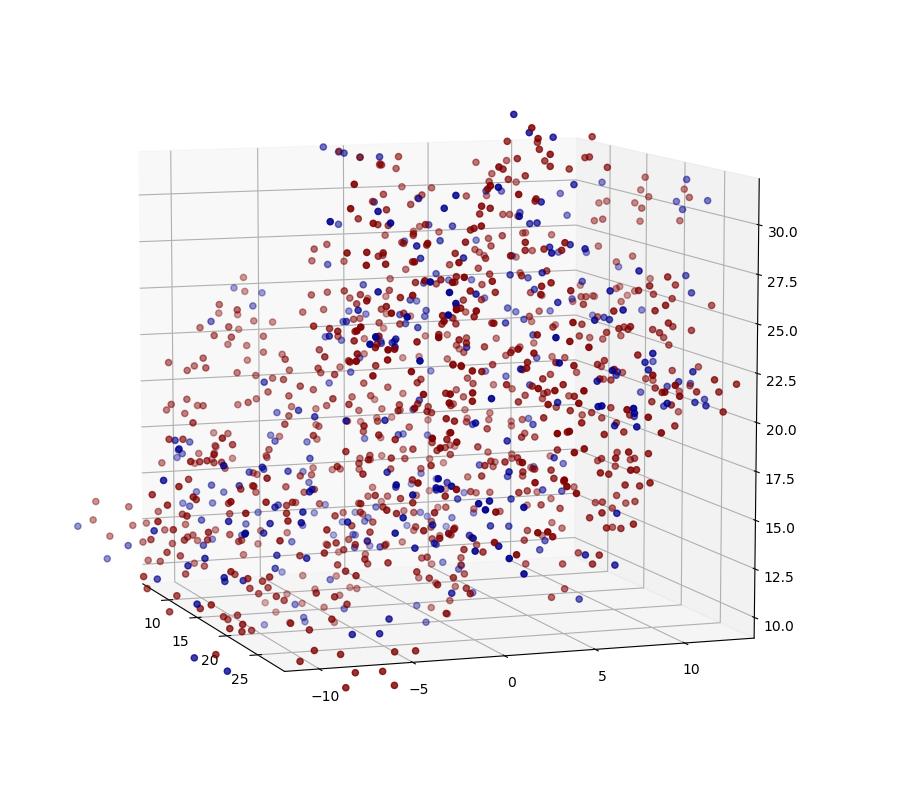

<IPython.core.display.Javascript object>


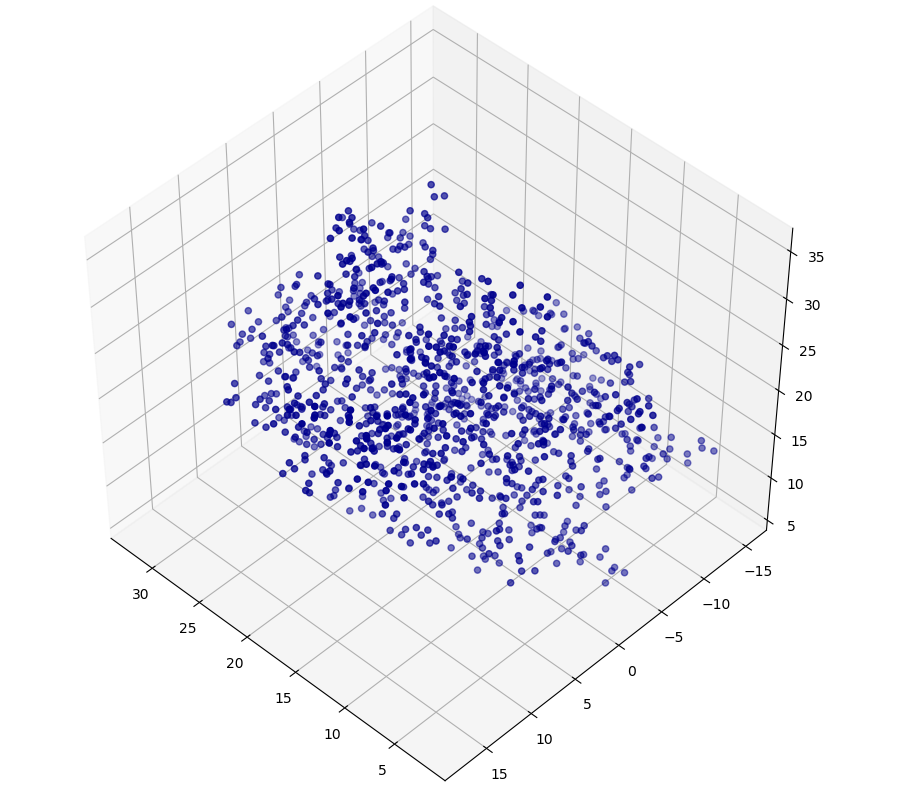

In [6]:
%matplotlib notebook
print("Color: ", edge_color)

xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]

#lbl = [0] * len(labels)
#lbl[684] = 1
fig = plt.figure(figsize=(9, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=scalarMap.to_rgba(lbl))

lbl_zero = np.zeros(len(lbl))
fig = plt.figure(figsize=(9, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=scalarMap.to_rgba(lbl_zero))
# fig.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, ys, c=labels)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(ys, zs, c=labels)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, zs, c=labels)
# plt.show()

# xs = dt[:, 0]
# ys = dt[:, 1]
# zs = dt[:, 2]

# #lbl = [0] * len(labels)
# #lbl[684] = 1
# fig = plt.figure(figsize=(9, 8))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax.scatter(xs, ys, zs, c=lbl)
# # fig.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, ys,  c=lbl)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(ys, zs,  c=lbl)
# plt.show()

# plt.figure(figsize=(14, 9))
# plt.scatter(xs, zs,  c=lbl)
# plt.show()

# # Black removed and is used for noise instead.
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# plt.figure(figsize=(14, 9))
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = dt[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)

#     xy = dt[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

In [4]:
from output import *
from energy import *

atoms = rd('atoms.txt', 1, 9)

N = 300  # 10000 # число итераций
l = len(atoms) # число атомов в изучаемом белке
L = 3 # сколько шагов делаем вдоль каждого орта с учетом знака
S = 0
r = 10 # размер окрестности атома, по которой честно суммируем
M = 1000 # параметр, отвечающий за частоту вывода и сохранения информации
h = [0.02, 0.02, 0.02]  # размеры шагов по ортам в ангстремах

mas_orig = []
tt_orig = []
time_start = millis()

for k in range(0,N):
	num = pyrandom.randrange(0, l)
	atoms_old = [atoms[num][1], atoms[num][2], atoms[num][3]]
	record = [0,0,0]
	if k/M == int(k/M):
		time_now = millis()
		tm = (time_now - time_start)/60000
		print("################################")
		print("Число итераций {}; Энергия {}; Время (мин) {}".format(k, S, tm))
		print("################################\n")
	nghb_d = nghb_dihedrals(dihedrals, num)
	nghb_a = nghb_angles(angles, num)
	nghb_b = nghb_bonds(bonds, num)
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1]
	[Cx,Cy,Cz] = coef_nb(atoms,num,nghbc)
	DE_elst = E_elst(atoms, neighbours, two_bonds_neigh, three_bonds_neigh,num) - E_elst_m(atoms, neighbours, two_bonds_neigh, three_bonds_neigh,num,nghb_nb)

	E_old = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full = True)
	E_record = E_old

	for px in range(-L,L+1):
		for py in range(-L,L+1):
			for pz in range(-L,L+1):
				# print("Record: ", [px, py, pz])
				atoms[num][1] = atoms_old[0] + px*h[0]
				atoms[num][2] = atoms_old[1] + py*h[1]
				atoms[num][3] = atoms_old[2] + pz*h[2]
				E_new = DE_elst + Cx*px*h[0] + Cy*py*h[1] + Cz*pz*h[2] + \
						E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=False)
				if E_new < E_record: #  "-0.2" чтобы не учитвать погрешности в аппроксимации
					record = [px, py, pz]
					print("Prev value: ", atoms_old, " new: ", [atoms[num][1], atoms[num][2], atoms[num][3]])
					print("\nE_new: ", E_new, "\tE_old: ", E_old, "\tDE_elst: ", DE_elst)
					E_record = E_new
	
	atoms[num][1] = atoms_old[0] + record[0]*h[0]
	atoms[num][2] = atoms_old[1] + record[1]*h[1]
	atoms[num][3] = atoms_old[2] + record[2]*h[2]
	S = S + E_old - E_record
	mas_orig.append(S)
	time_now = millis()
	ttm = (time_now - time_start)/60000
	tt_orig.append(ttm)
print(S)

################################
Число итераций 0; Энергия 0; Время (мин) 0.0
################################

Prev value:  [6.228, -8.083, 13.315]  new:  [6.247999999999999, -8.123, 13.315]

E_new:  45.37226508329539 	E_old:  45.4045268024572 	DE_elst:  -62.60479908799172
Prev value:  [6.228, -8.083, 13.315]  new:  [6.247999999999999, -8.123, 13.334999999999999]

E_new:  45.29935443300408 	E_old:  45.4045268024572 	DE_elst:  -62.60479908799172
Prev value:  [21.948, -10.311, 16.061]  new:  [21.968, -10.311, 16.061]

E_new:  -89.20928679063648 	E_old:  -89.16088562674187 	DE_elst:  -29.436179296492597
Prev value:  [20.182, 7.841, 12.104]  new:  [20.122, 7.881, 12.104]

E_new:  -321.18086434027725 	E_old:  -320.78266244945775 	DE_elst:  165.06077449352273
Prev value:  [20.182, 7.841, 12.104]  new:  [20.122, 7.881, 12.123999999999999]

E_new:  -321.9320578463801 	E_old:  -320.78266244945775 	DE_elst:  165.06077449352273
Prev value:  [20.182, 7.841, 12.104]  new:  [20.122, 7.901, 12.104]


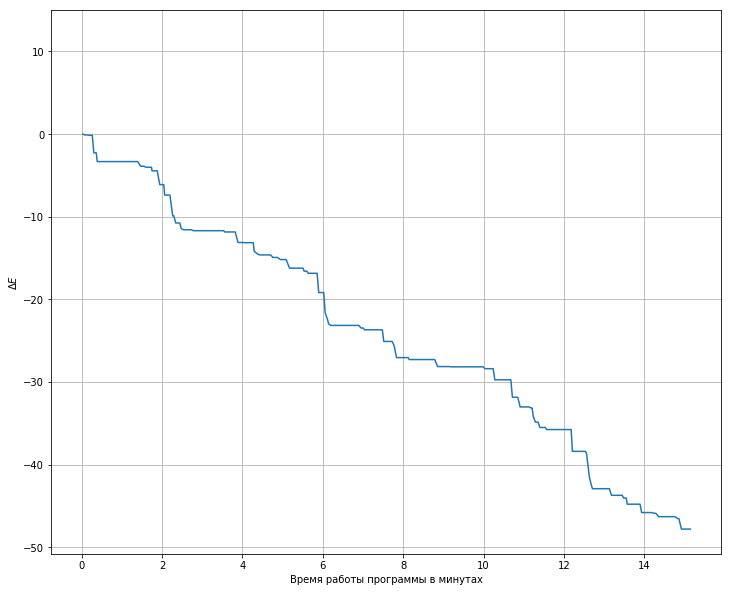

In [23]:
import matplotlib.pyplot as plt

# mmas = - np.array(mas)
mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
# tt, mmas, 'b',
plt.plot( tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

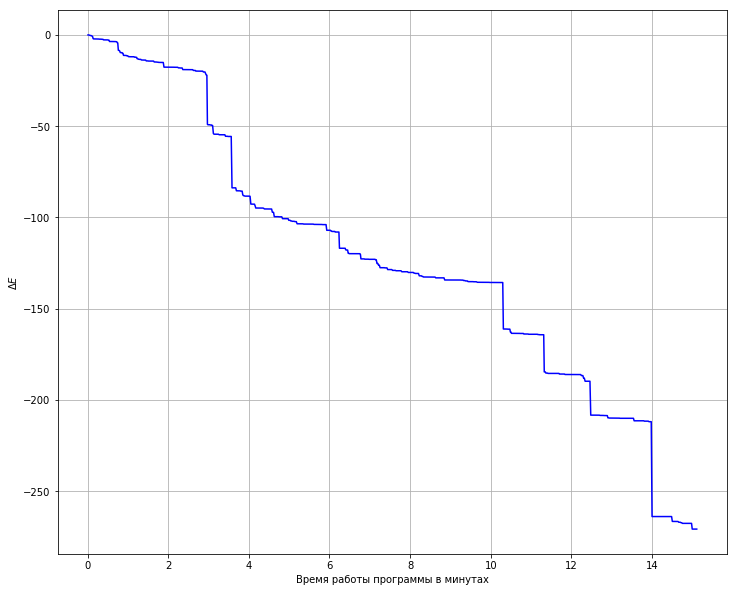

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

mmas = - np.array(mas)
# mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
plt.plot(tt, mmas, 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

#tta = [pd.to_datetime(d) for d in tta]
plt.figure(figsize=(12,10))
plt.plot(tta, mmas, 'b')#, tt_orig, mmas_orig, 'r')
# plt.xticks([1])
plt.yticks([i/60000 for i in range(tta[0], tta[-1])])
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

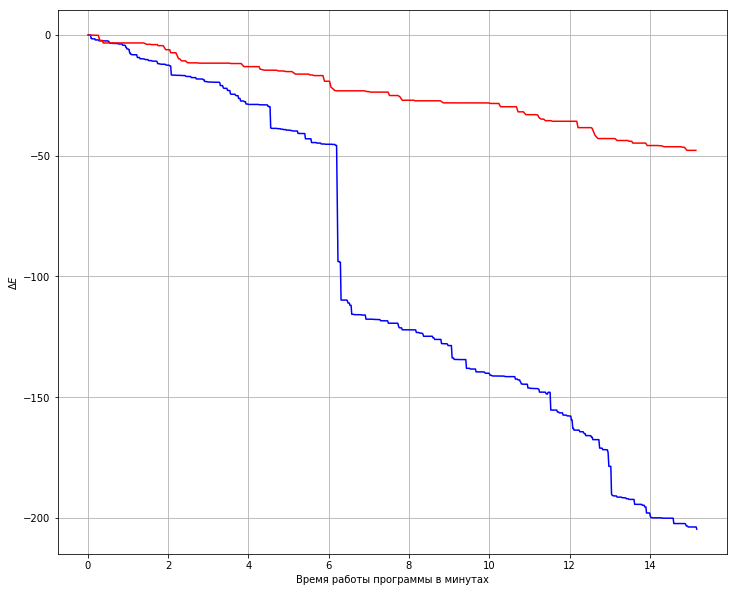

In [14]:
import matplotlib.pyplot as plt

mmas = - np.array(mas)
mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
plt.plot(tt, mmas, 'b', tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

Energy:  -32.55971244386966


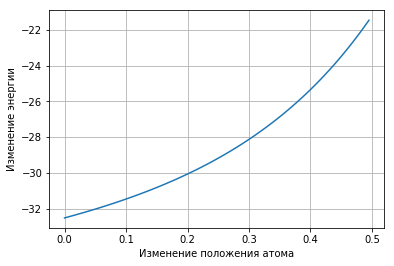

-21.47003065706592


In [13]:
num = 280
coor = 2
h = 0.005
M = 100
mmm = []
ccc = []

print("Energy: ", E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))
for k in range(0, M):
    atoms[num][coor] = atoms[num][coor] + h
    EE = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, 
           num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True) 
    # E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm)
    mmm.append(EE)
    ccc.append(k*h)  

import matplotlib.pyplot as plt
plt.plot(ccc, mmm)
plt.ylabel(r"Изменение энергии")
plt.xlabel(r"Изменение положения атома")
plt.grid(True)
plt.show()
    
print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))